In [1]:
import socket
import json
import cv2
import base64
import numpy as np

class Server:
    def __init__(self, address='0.0.0.0', port=2000):
        self.socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM, 0)
        self.socket.bind((address, port))

    def __del__(self):
        self.close()

    def close(self):
        try:
            self.socket.shutdown(socket.SHUT_RDWR)
            self.socket.close()
        except:
            pass

    def process_data(self, data):
        result = {}

        for k, v in data.items():
            if k.startswith('image') and v is not None and len(v) > 0:
                img_dec = base64.b64decode(v)
                img_dec = np.frombuffer(img_dec, dtype=np.uint8)
                img = cv2.imdecode(img_dec, flags=cv2.IMREAD_COLOR)
                result[k] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                result[k] = v

        return result

    def wait_for_connection(self):
        self.socket.listen(1)
        self.conn, _ = self.socket.accept()

    def wait_for_data(self):
        buf = ""

        while True:
            msg = self.conn.recv(4096).decode('utf-8')
            lines = msg.split('\n')
            buf += lines[0]
            if len(lines) > 1:
                print(buf)
                return json.loads(buf)

In [2]:
import matplotlib.pyplot as plt

server = Server()
server.wait_for_connection()


In [3]:
while True:
    msg = server.conn.recv(4096).decode('utf-8')
    print(msg, end='')

{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "NOT_INITIALIZED", "points": []}
{"state": "

KeyboardInterrupt: 

In [8]:
s = """{"state": "OK", "points": [0.105, -0.217, 1.13, 0.396, 0.543, 1.34, 0.0426, 0.0761, 1.17, 0.0385, -0.311, 1.18, -0.534, -0.124, 1.18, -0.632, -0.0692, 1.18, -0.368, -0.178, 1.19, -0.129, -0.176, 1.21, 0.365, 0.115, 1.25, 0.346, 0.403, 1.28, 0.413, 0.498, 1.26, -0.545, 0.0427, 1.14, -0.282, -0.0175, 1.19, 0.146, 0.315, 1.22, -0.0654, -0.141, 1.14, 0.141, -0.39, 1.1, 0.0555, -0.042, 1.16, -0.362, -0.212, 1.21, 0.0387, 0.0371, 1.25, -0.426, 0.161, 1.19, 0.256, -0.169, 1.16, 0.335, 0.455, 1.23, -0.635, -0.307, 1.17, -0.55, -0.271, 0.981, 0.398, -0.000297, 1.1, 0.427, -0.111, 1.2, -0.522, -0.22, 1.21, -0.656, -0.245, 1.17, 0.101, -0.0989, 1.15, 0.0329, -0.0719, 1.18, -0.503, 0.0604, 1.19, -0.498, 0.0207, 1.13, -0.408, -0.363, 1.5, -0.319, 0.0259, 0.99, -0.644, -0.303, 1.09, -0.00478, -0.231, 1.17, -0.507, -0.167, 1.19, -0.619, 0.0134, 1.07, 0.232, 0.205, 1.28, 0.149, 0.457, 1.24, 0.0939, 0.0536, 0.17, -0.443, 0.0543, 1.2, -0.238, 0.418, 1.19, 0.356, 0.408, 1.34, -0.625, -0.167, 1.12, 0.128, -0.323, 1.14, 0.279, -0.169, 1.2, 0.325, -0.11, 1.17, 0.345, 0.464, 1.28, 0.0762, -0.121, 1.21, 0.149, 0.19, 1.21, -0.131, -0.176, 1.22, -0.0877, -0.191, 1.17, -0.684, 0.0146, 1.18, -0.392, 0.15, 1.1, -0.424, 0.151, 1.2, 0.221, 0.199, 1.24, -0.064, -0.147, 1.15, -0.423, 0.344, 1.2, -0.524, 0.0619, 1.24, -0.243, 0.082, 1.26, -0.656, -0.245, 1.17, -0.118, 0.0769, 1.19, -0.547, -0.269, 0.98, -0.657, -0.27, 1.17, 0.411, -0.104, 1.13, 0.0166, 0.0396, 1.19, -0.631, -0.0689, 1.18, 0.38, 0.287, 1.3, 0.32, 0.208, 1.23, 0.147, 0.453, 1.23, 0.102, -0.142, 1.15, 0.394, 0.274, 0.74, 0.637, 0.0117, 1.23, 0.0332, -0.03, 1.18, -0.404, -0.359, 1.49, 0.139, 0.351, 1.23, 0.0685, 0.00867, 1.14, 0.102, -0.121, 1.14, -0.368, -0.177, 1.19, -0.241, 0.426, 1.22, 0.0416, 0.0754, 1.17, -0.114, 0.0843, 1.27, 0.0473, 0.0758, 1.49, 0.245, -0.194, 1.2, -0.657, -0.302, 1.21, -0.643, -0.26, 1.17, 0.0826, -0.074, 1.16, -0.299, -0.293, 1.24, 0.413, -0.00292, 1.28, -0.00707, -0.277, 1.36, 0.134, -0.347, 1.13, -0.0461, -0.135, 1.14, -0.0653, -0.147, 1.15, 0.283, -0.173, 1.22, -0.22, 0.217, 1.18, -0.534, 0.0532, 1.18, -0.428, 0.162, 1.19, 0.341, 0.4, 1.27, 0.338, 0.389, 1.28, 0.177, -0.0802, 1.15, 0.423, -0.0021, 1.17, 0.351, 0.468, 1.29, 0.0971, 0.0203, 1.15, 0.549, -0.107, 1.22, 0.0444, -0.111, 1.17, -0.645, -0.0712, 1.18, 0.32, 0.0307, 1.2, 0.0165, 0.0389, 1.16, -0.251, 0.19, 1.19, 0.0963, -0.188, 1.07, -0.653, -0.328, 1.17, -0.244, -0.012, 1.16, -0.656, -0.244, 1.17, -0.19, -0.00913, 1.16, -0.0889, -0.191, 1.17, 0.127, -0.323, 1.13, 0.48, -0.00338, 1.25, 0.0306, -0.0296, 1.16, 0.057, -0.044, 1.16, -0.339, -0.297, 1.25, 0.0316, -0.0704, 1.17, -0.522, -0.221, 1.21, -0.657, -0.273, 1.17, -0.136, -0.183, 1.24, 0.325, -0.111, 1.18, -0.53, -0.127, 1.18, -0.536, -0.185, 1.25, -0.363, -0.211, 1.21, 0.624, -0.0621, 1.22, 0.26, -0.183, 1.2, 0.117, -0.268, 1.16, 0.047, -0.378, 1.13, -0.429, 0.105, 1.19, 0.394, 0.298, 1.35, 0.145, 0.19, 1.2, 0.316, 0.208, 1.23, 0.147, 0.455, 1.24, -0.243, 0.42, 1.2, 0.209, 0.201, 1.2, -0.636, -0.242, 1.17, -0.427, 0.165, 1.19, -0.0251, -0.303, 1.12, 0.0454, -0.113, 1.18, 0.414, -0.111, 1.21, -0.636, -0.281, 1.16, -0.477, -0.237, 1.22, -0.528, -0.24, 1.23, -0.429, 0.106, 1.19, -0.502, 0.0624, 1.19, -0.429, 0.106, 1.19, 0.0676, 0.00742, 1.13, -0.339, -0.296, 1.25, 0.586, 0.0127, 1.14, 0.274, -0.167, 1.19, -0.44, 0.397, 1.18, 0.336, 0.392, 1.25, 0.333, 0.105, 1.25, 0.015, 0.0373, 1.18, 0.0716, -0.119, 1.17, 0.148, 0.454, 1.24, -0.49, 0.0984, 1.18, 0.548, -0.0515, 1.08, -0.0864, -0.188, 1.15, -0.147, -0.217, 1.26, -0.3, -0.00933, 1.15, 0.0473, -0.38, 1.14, -0.134, -0.179, 1.21, -0.0015, -0.238, 1.14, -0.529, -0.127, 1.17, -0.367, -0.18, 1.19, -0.14, -0.334, 1.23, -0.253, 0.189, 1.18, 0.464, 0.55, 1.42, 0.35, 0.485, 1.28, 0.0397, 0.0729, 1.16, 0.152, 0.2, 1.25, 0.00927, 0.188, 1.27, 0.329, 0.215, 1.27, 0.13, -0.325, 1.13, -0.244, 0.418, 1.21, 0.429, -0.307, 1.32, -0.366, -0.183, 1.2, 0.328, 0.372, 1.24, 0.166, 0.218, 1.34, 0.149, 0.192, 1.2, 0.0478, -0.118, 1.21, 0.081, 0.015, 1.1, -0.0418, -0.143, 1.15, -0.521, -0.218, 1.21, -0.644, -0.326, 1.16, 0.267, -0.213, 1.3, 0.144, -0.364, 1.26, -0.533, 0.0514, 1.18, 0.353, 0.466, 1.3, 0.00383, 0.0294, 1.12, 0.0192, 0.056, 1.2, -0.654, -0.276, 1.17, -0.423, 0.151, 1.2, -0.505, 0.0252, 1.15, -0.112, 0.0787, 1.2, -0.161, 0.0738, 1.15, -0.244, -0.0138, 1.16, -0.3, -0.0108, 1.15, -0.145, -0.2, 1.32, -0.528, -0.131, 1.17, -0.517, -0.179, 1.21, 0.273, -0.199, 1.27, 0.128, -0.0859, 1.15, 0.41, -0.37, 1.48, -0.442, 0.399, 1.2, -0.199, 0.2, 1.17, -0.5, 0.0621, 1.18, -0.401, 0.25, 1.2, 0.238, 0.464, 1.28, 0.344, 0.221, 1.33, 0.33, 0.0294, 1.24, 0.153, 0.459, 1.27, 0.341, -0.116, 1.23, 0.402, -0.109, 1.17, -0.639, -0.0708, 1.18, 0.13, -0.0883, 1.15, -0.189, -0.00938, 1.16, -0.139, -0.184, 1.22, -0.143, -0.209, 1.22, -0.421, 0.359, 1.19, -0.502, 0.0651, 1.16, -0.361, -0.206, 1.2, -0.00271, -0.279, 0.911, -0.000385, -0.374, 1.19, -0.0188, -0.333, 1.16, 0.413, -0.3, 1.29, 0.397, 0.231, 0.785, 0.338, 0.386, 1.28, -0.162, -0.00944, 1.16, 0.339, 0.475, 1.25, 0.345, 0.462, 1.28, -0.43, 0.107, 1.18, -0.497, 0.1, 1.2, -0.218, 0.22, 1.19, 0.133, -0.279, 1.14, 0.322, -0.106, 1.16, -0.0677, -0.156, 1.16, -0.496, -0.21, 1.16, 0.0671, 0.00258, 1.14, 0.144, 0.194, 1.19, -0.53, 0.0404, 1.11, -0.299, -0.0111, 1.15, -0.534, -0.134, 1.19, -0.382, 0.17, 1.2, 0.143, 0.447, 1.23, 0.345, 0.0319, 1.3, 0.0373, 0.0711, 1.16, 0.325, 0.215, 1.26, -0.0391, -0.114, 1.2, 0.0725, -0.127, 1.19, -0.165, -0.00882, 1.14, -0.247, -0.0118, 1.12, -0.25, -0.013, 1.17, 0.0662, -0.122, 1.16, 0.033, 0.0731, 1.17, 0.0341, 0.0674, 1.16, 0.00766, 0.0278, 1.16, -0.488, 0.0226, 1.12, -0.536, 0.0582, 1.17, 0.0569, -0.0301, 1.14, -0.332, -0.299, 1.25, -0.139, -0.183, 1.21, -0.0583, -0.127, 1.13, -0.523, -0.141, 1.17, -0.49, -0.216, 1.2, -0.435, 0.398, 1.17, 0.339, 0.458, 1.27, -0.384, 0.17, 1.2, -0.425, 0.168, 1.18, 0.233, 0.455, 1.27, 0.308, 0.209, 1.22, 0.312, 0.0323, 1.16, 0.148, 0.452, 1.24, 0.382, 0.448, 1.3, -0.431, 0.106, 1.18, -0.542, -0.373, 1.37, -0.52, -0.252, 1.2, -0.248, 0.412, 1.19, -0.31, -0.293, 1.23, 0.00518, 0.0274, 1.13, 0.346, 0.0331, 1.28, -0.494, 0.102, 1.21, -0.531, 0.0609, 1.16, -0.5, -0.21, 1.17, 0.3, -0.1, 1.08, 0.0736, -0.0992, 1.16, -0.511, 0.0365, 1.07, 0.207, 0.198, 1.2, -0.0284, -0.0862, 0.996, 0.137, -0.361, 1.13, 0.0813, 0.0521, 0.148, -0.43, 0.104, 1.19, 0.0802, -0.101, 1.16, -0.0288, -0.189, 1.15, 0.284, -0.0014, 1.12, -0.16, -0.00944, 1.17, 0.0354, -0.106, 1.14, 0.145, 0.000658, 1.15, 0.123, -0.0813, 1.16, -0.277, -0.0158, 1.16, -0.301, -0.00782, 1.15, 0.0848, -0.0744, 1.16, 0.591, 0.0105, 1.15, 0.22, 0.00382, 0.99, 0.104, -0.202, 1.15, 0.025, -0.0266, 1.16, -0.49, 0.1, 1.19, -0.0854, -0.194, 1.17, 0.0341, -0.0689, 1.2, 0.0658, 0.00716, 1.14, -0.689, 0.0134, 1.19, -0.416, 0.394, 1.2, -0.424, 0.36, 1.2, 0.132, -0.0884, 1.15, -0.42, -0.424, 1.57, 0.0582, -0.0435, 1.17, -0.349, -0.236, 1.22, 0.104, -0.183, 1.15, 0.209, -0.321, 1.25, 0.216, 0.393, 1.21, 0.215, 0.207, 1.22, 0.356, 0.483, 1.29, -0.36, -0.208, 1.21, -0.531, -0.1, 1.16, -0.018, 0.0402, 1.15, -1.2, -0.303, 1.08, -0.143, -0.27, 1.22, -0.731, -0.121, 1.17, -0.392, -0.543, 1.25, -0.519, -0.313, 1.25, -0.247, 0.0753, 1.21, -0.533, -0.52, 1.19, -0.697, -0.325, 1.14, 0.114, -0.245, 1.15, 0.313, -0.00199, 1.23, 0.211, -0.306, 1.23, 0.129, 0.331, 1.19, -0.542, 0.0409, 1.17, 0.456, -0.109, 1.21, -0.681, 0.0137, 1.18, -0.405, -0.236, 1.22, -0.655, -0.26, 1.15, 0.261, -0.00183, 1.4, 0.244, -0.386, 1.23, 0.181, -0.182, 1.21, -0.496, 0.0222, 1.13, -0.946, -0.445, 1.11, -0.533, 0.0532, 1.18, -0.426, 0.171, 1.2, 0.388, -0.315, 1.3, -0.0986, 0.0794, 1.2, 0.0693, 0.0102, 1.15, -0.637, -0.327, 1.15, -0.449, 0.0524, 1.19, 0.373, 0.122, 1.29, -0.243, -0.0125, 1.15, -0.695, -0.325, 1.15, -0.367, -0.185, 1.2, -0.507, 0.033, 1.14, 0.143, 0.00038, 1.05, -0.303, -0.294, 1.24, 0.0486, -0.0244, 1.15, -0.483, -0.219, 1.2, 0.393, 0.000866, 1.2, 0.0423, -0.00902, 1.16, 0.12, -0.281, 1.14, 0.203, 0.00413, 1.2, -0.153, -0.126, 1.18, -0.646, -0.321, 1.15, 0.291, -0.177, 1.2, 0.293, -0.179, 1.22, 0.101, -0.179, 1.13, 0.395, -0.202, 1.27, 0.408, -0.227, 1.18, -0.423, 0.39, 1.21, 0.121, -0.0848, 1.15, -0.591, 0.325, 1.19, -0.0536, 0.0372, 1.13, 0.126, -0.297, 1.14, -0.206, 0.215, 1.24, 0.446, 0.00324, 1.2, -0.138, -0.335, 1.23, 0.322, -0.275, 1.16, 0.137, 0.395, 1.23, -0.336, -0.297, 1.25, 0.457, 0.547, 1.4, 0.213, 0.202, 1.22, 0.12, -0.314, 1.07, -0.645, -0.261, 1.16, -0.515, -0.301, 1.32, 0.311, 0.00548, 1.2, 0.125, -0.0848, 1.16, -0.536, 0.0378, 1.12, 0.258, -0.194, 1.22, -0.689, 0.0133, 1.19, -0.526, 0.0503, 1.2, -0.3, -0.00811, 1.15, 0.234, 0.467, 1.27, -0.52, -0.349, 1.25, -0.521, -0.25, 1.2, -0.424, 0.339, 1.19, -0.158, -0.00561, 1.15, 0.0906, 0.22, 1.2, -0.525, -0.359, 1.24, -0.388, -0.393, 1.31, -0.525, 0.297, 1.2, -0.437, 0.404, 1.19, -0.521, 0.294, 1.18, -0.54, 0.0401, 1.13, 0.285, -0.398, 1.38, 0.431, -0.115, 1.25, -0.144, -0.275, 1.25, 0.459, -0.266, 1.32, -0.23, 0.374, 1.2, -0.539, 0.0387, 1.13, 0.01, 0.0302, 1.15, -0.0287, 0.0396, 1.15, -0.641, -0.259, 1.17, 0.451, 0.53, 1.38, 0.248, -0.43, 1.29, 0.141, 0.399, 1.24, -0.638, -0.259, 1.17, -0.65, -0.281, 1.17, -0.155, -0.00321, 1.14, 0.232, -0.00334, 1.27, 0.209, 0.203, 1.19, -0.329, -0.323, 1.23, 0.078, -0.098, 1.16, 0.0268, 0.0238, 1.14, -0.65, -0.308, 1.17, -0.496, 0.0227, 1.13, 0.0863, 0.205, 1.18, -0.0423, -0.141, 1.14, -0.145, -0.213, 1.24, -0.349, -0.235, 1.22, -0.0609, 0.0361, 1.17, -0.377, -0.00889, 1.15, 0.471, -0.125, 1.33, -0.523, 0.281, 1.2, -0.54, 0.0388, 1.13, -0.187, -0.00795, 1.15, 0.458, 0.295, 1.32, 0.23, 0.453, 1.24, 0.00125, -0.247, 1.17, 0.386, 0.446, 1.31, -0.528, -0.133, 1.17, 0.259, -0.306, 1.22, 0.0413, -0.0064, 1.14, 0.235, -0.18, 1.16, 0.0788, 0.167, 1.2, 0.225, -0.33, 1.3, -0.521, -0.22, 1.21, -0.948, -0.447, 1.12, -0.74, -0.456, 1.12, -0.777, 0.0109, 1.17, -0.691, -0.324, 1.15, -0.49, 0.0948, 1.22, -1.27, -0.137, 1.09, -0.827, -0.0194, 1.2, -0.367, -0.29, 1.23, -0.349, -0.55, 1.26, -1.57, -0.4, 1.2, -0.528, -0.112, 1.12, -0.377, -0.0111, 1.15, -0.0527, 0.0367, 1.14, -0.428, 0.261, 1.19, -1.19, -0.304, 1.07, -0.349, -0.236, 1.22, -0.645, -0.321, 1.15, -0.366, -0.295, 1.25, -1.79, -0.758, 1.01, -1.72, -0.648, 1.02, -0.406, -0.106, 0.534, -1.78, -0.265, 1.13, -0.402, -0.101, 0.511, -1.87, -0.576, 1.01, -0.525, -0.312, 1.27, -0.38, -0.115, 0.414, -1.73, -0.182, 1.17, -0.396, -0.604, 1.29, -0.137, -0.179, 1.2, -0.38, -0.139, 0.492, -0.366, -0.295, 1.24, -1.28, -0.142, 1.09, 0.00912, -0.261, 1.15, 0.0498, -0.0254, 1.17, -0.534, -0.526, 1.22, -0.383, -0.236, 1.22, -0.521, 0.244, 1.19, -0.394, 0.169, 1.19, -0.429, 0.262, 1.2, -0.889, 0.0129, 1.12, -0.622, -0.467, 1.19, -0.275, -0.0164, 1.15, -0.243, -0.0101, 1.15, -0.0353, -0.159, 1.23, 0.0903, -0.445, 1.4, 0.127, -0.04, 1.06, -0.298, -0.304, 1.32, -0.636, -0.309, 1.16, -1.65, 0.0574, 1.22, -0.48, -0.223, 1.21, 0.218, 0.405, 1.25, -0.426, 0.165, 1.2, -0.524, -0.318, 1.27, 0.126, -0.319, 1.13, 0.169, -0.298, 1.17, -1.03, -0.439, 1.1, -0.419, 0.178, 1.2, -0.346, -0.547, 1.25, -0.477, -0.22, 1.2, 0.222, -0.195, 1.19, -0.522, -0.311, 1.21, -0.532, -0.59, 1.26, -0.695, -0.326, 1.16, 0.147, 0.361, 1.21, -0.641, -0.329, 1.17, -0.474, -0.234, 1.21, -0.885, -0.397, 1.14, -0.393, -0.593, 1.26, -1.72, -0.323, 1.13, -0.449, 0.0523, 1.19, -0.731, -0.123, 1.15, 0.0451, -0.11, 1.17, -0.487, 0.0958, 1.19, -1.2, -0.304, 1.08, -0.691, 0.0123, 1.18, -0.889, -0.397, 1.13, -1.86, -0.165, 1.14, -0.0131, 0.0676, 1.32, -0.374, -0.299, 1.24, -1.28, -0.14, 1.1, -0.385, -0.547, 1.26, 0.232, -0.0816, 1.22, -0.644, -0.284, 1.16, -1.32, -0.533, 1.03, -0.37, -0.296, 1.24, -0.19, -0.00926, 1.17, -0.484, -0.63, 1.27, -0.43, 0.261, 1.2, -0.533, -0.541, 1.17, -0.523, -0.304, 1.23, -1.5, -0.302, 1.2, -1.68, 0.0291, 1.2, -1.86, -0.164, 1.14, -1.69, 0.0947, 1.25, -1.76, -0.407, 1.04, -1.5, -0.443, 1.17, -1.77, -0.436, 1.08, -1.51, -0.748, 1.09, -1.84, -0.143, 1.08, -1.04, -0.587, 1.07, -1.74, -0.184, 1.17, -1.88, -0.576, 1.02, -1.7, -0.215, 1.15, -1.56, -0.281, 1.27, -1.72, -0.0062, 1.24, -1.35, -0.0719, 1.09, -0.531, -0.526, 1.21, -1.51, -0.0737, 1.27, -0.892, -0.393, 1.12, -1.48, -0.441, 1.13, -1.71, -0.311, 1.14, -0.655, -0.27, 1.16, -1.5, -0.463, 1.17, -1.31, -0.533, 1.03, -0.93, -0.618, 1.08, -1.58, -0.676, 1.11, -1.79, -0.566, 1.05, -1.83, -0.541, 1.03, -1.55, 0.0522, 1.27, -1.91, -0.168, 1.19, -1.74, -0.105, 1.13, -1.77, -0.184, 1.17, -1.73, -0.159, 1.11, -1.73, 0.0309, 1.21, -1.78, -0.554, 1.04, -1.7, -0.216, 1.16, -1.73, 0.0468, 1.2, -1.7, -0.319, 1.14, -1.93, -0.348, 1.07, -1.14, -0.426, 1.06, -1.72, 0.0307, 1.25, -1.54, -0.627, 1.12, -1.71, -0.493, 1.1, -1.51, -0.321, 1.18, -0.594, 0.196, 1.2, -1.5, -0.0572, 1.25, -1.69, 0.0289, 1.21, -1.16, -0.108, 1.11, -1.21, 0.0239, 1.13, -0.653, -0.326, 1.15, -1.52, 0.0439, 1.23, -1.5, -0.776, 1.1, -1.63, -0.484, 1.12, -1.57, -0.382, 1.2, -1.75, 0.0574, 1.23, -1.69, -0.308, 1.12, -1.73, 0.0253, 1.2, -0.821, -0.0244, 1.15, -1.49, -0.258, 1.2, -1.95, -0.752, 1.02, -1.7, 0.0293, 1.23, -1.52, -0.327, 1.19, -0.598, 0.00197, 1.18, 0.127, -0.073, 1.15, 0.0415, -0.123, 1.27, -0.863, -0.367, 1.04, -0.342, -0.451, 1.21, -0.585, -0.592, 1.12, -0.538, -0.546, 1.27, -0.465, -0.611, 1.24, -1.85, -0.241, 1.1, -0.533, -0.0962, 1.15, -0.373, -0.012, 1.15, -0.301, 0.0328, 1.12, -1.46, -0.29, 1.11, -0.495, 0.0205, 1.14, -1.12, 0.0184, 1.1, -1.2, -0.383, 1.07, -1.28, 0.186, 1.13, -0.911, -0.317, 1.12, -0.389, -0.54, 1.24, -0.387, -0.534, 1.26, -1.33, -0.06, 1.07, -1.16, -0.11, 1.11, -0.102, -0.125, 1.19, -0.988, -0.316, 1.12, -0.259, -0.0189, 1.16, -0.523, -0.587, 1.25, -1.53, 0.0506, 1.25, -0.357, -0.794, 1.1, -1.05, -0.11, 1.15, -0.311, -0.65, 1.25, -0.691, -0.0249, 0.541, -0.538, -0.553, 1.14, -0.338, -0.666, 1.29, -1.02, -0.11, 1.15, -0.308, -0.65, 1.25, -0.657, -0.191, 1.17, -0.445, -0.636, 1.25, -0.658, -0.191, 1.17, -0.045, -0.26, 1.21, -0.543, -0.376, 1.17, -0.473, -0.783, 1.22, -1.25, -0.94, 0.968, -0.143, -0.212, 1.24, -0.535, -0.821, 1.13, -0.148, 0.0324, 1.14, -0.501, -0.734, 1.28, -0.334, -0.366, 1.24, -0.536, -0.822, 1.13, -0.144, 0.0549, 1.25, -0.363, -0.174, 1.17, -0.533, -0.828, 1.14, -1.75, -0.376, 1.09, -1.7, -0.31, 1.13, -1.12, 0.021, 1.14, -1.76, -0.666, 1.07, -1.91, -0.17, 1.2, -1.52, -0.617, 1.1, -0.528, -0.58, 1.23, -0.462, -0.63, 1.3, -0.532, -0.524, 1.21, -0.424, 0.343, 1.2, -0.941, -0.442, 1.11, -1.73, 0.0947, 1.22, -1.55, -0.4, 1.18, -0.523, -0.357, 1.25, -1.2, -0.384, 1.07, -1.56, -0.398, 1.19, -1.72, 0.0268, 1.24, -1.68, -0.00565, 1.22, -0.343, -0.00896, 1.15, -1.07, -0.0314, 1.16, -1.54, -0.395, 1.16, -1.52, 0.0481, 1.22, -1.21, 0.0236, 1.13, -1.75, -0.836, 1.04, -1.02, 0.0259, 1.33, -0.393, 0.0259, 1.12, -0.351, 0.0428, 1.18, 0.224, -0.00175, 1.32, -0.288, -0.494, 1.35, -0.328, -0.58, 1.31, 0.0175, -0.0221, 1.14, -1.5, -0.412, 1.17, -0.351, -0.526, 1.21, -1.5, -0.301, 1.2, -0.846, -0.354, 1.12, -0.651, -0.319, 1.16, -0.645, -0.0629, 1.18, -1.27, -0.14, 1.09, -1.72, -0.324, 1.14, -1.58, -0.692, 1.12, -1.19, -0.382, 1.06, -1.61, -0.703, 1.11, -1.74, -0.183, 1.18, -1.7, -0.311, 1.13, -1.64, -0.495, 1.13, -1.51, -0.476, 1.18, -1.51, -0.226, 1.21, -0.643, -0.0751, 1.2, -1.8, -0.415, 1.11, -1.72, -0.314, 1.17, -1.73, -0.83, 1.03, -1.28, -0.24, 1.09, -0.271, 0.0482, 1.16, -1.66, 0.0855, 1.21, -0.54, -0.0633, 1.11, -1.34, -0.0639, 1.09, -0.319, -0.108, 1.17, -1.2, 0.0226, 1.12, -0.994, -0.388, 1.1, -1.15, -0.432, 1.09, -0.692, 0.0144, 1.17, -1.2, 0.0206, 1.13, -1.72, -0.495, 1.11, -1.76, -0.0914, 1.16, -1.74, 0.0476, 1.29, -1.88, -0.237, 1.16, -1.78, -0.245, 1.12, -1.2, -0.304, 1.08, -0.739, -0.45, 1.12, -1.58, -0.672, 1.11, -1.5, -0.765, 1.11, -1.27, -0.519, 1.04, -1.55, -0.63, 1.13, -1.52, -0.648, 1.11, -0.883, -0.4, 1.15, -1.52, -0.104, 1.22, -1.91, -0.149, 1.07, -1.75, -0.177, 1.14, -1.49, -0.261, 1.21, -1.78, -0.149, 1.01, -1.27, -0.325, 1.06, -1.27, -0.237, 1.07, -1.33, -0.0649, 1.07, -0.827, -0.0157, 1.22, -1.5, -0.559, 1.14, -1.73, -0.65, 1.06, -1.68, 0.0681, 1.27, -1.84, -0.168, 1.12, -1.25, -0.513, 1.03, -1.75, -0.326, 1.16, -1.76, -0.16, 1.15, -1.05, -0.594, 1.08, -1.49, -0.439, 1.16, -1.5, -0.578, 1.15, -1.77, -0.434, 1.08, -1.65, 0.0599, 1.22, -1.21, 0.0232, 1.13, -1.27, -0.134, 1.09, -1.27, -0.239, 1.08, -0.912, -0.2, 1.15, -0.658, -0.24, 1.17, -1.78, -0.578, 1.04, -1.19, 0.0337, 1.13, -1.79, -0.56, 1.04, -1.19, -0.385, 1.06, -0.492, -0.632, 1.28, -0.387, -0.128, 0.463, -0.143, -0.332, 1.23, -0.527, 0.0488, 1.17, -0.382, -0.547, 1.27, -0.447, -0.729, 1.26, -0.208, -0.0873, 0.259, -1.2, -0.386, 1.06, 0.0394, -0.301, 1.07, -0.15, -0.123, 1.18, -0.326, -0.577, 1.31, -0.526, 0.168, 1.2, -0.294, -0.439, 1.27, -1.03, -0.321, 1.16, -0.567, -0.58, 1.08, -0.116, -0.271, 1.3, -0.519, -0.571, 1.22, -0.139, -0.312, 1.3, -0.269, 0.044, 1.15, -0.3, -0.0215, 1.16, -0.729, -0.117, 1.16, -0.343, -0.538, 1.25, -0.589, 5.66e-05, 0.691, -0.529, -0.795, 1.14, -0.28, 0.0414, 1.11, -1.04, -0.109, 1.13, -0.984, 0.0203, 1.16, -0.985, -0.111, 1.2, -1.06, -0.32, 1.17, -1.2, -0.304, 1.07, -1.52, -0.326, 1.18, -1.7, 0.0897, 1.18, -1.76, -0.0937, 1.17, -1.56, -0.339, 1.24, -1.54, -0.574, 1.14, -1.33, -0.299, 1.08, -1.58, -0.68, 1.11, -1.2, 0.0232, 1.12, -1.7, -0.22, 1.14, -1.7, -0.0131, 1.2, -1.28, -0.234, 1.08, -1.2, -0.0606, 1.12, -1.31, -0.545, 1.01, -1.51, -0.103, 1.22, -1.85, -0.247, 1.11, -1.52, -0.107, 1.23, -1.71, -0.649, 1.04, -1.02, -0.433, 1.09, -1.09, 0.0324, 1.65, 0.0507, -0.101, 1.17, -0.729, -0.117, 1.16, -0.125, -0.28, 1.31, -1.21, 0.0243, 1.13, -0.5, 0.0667, 1.21, -1.52, -0.744, 1.1, -1.5, -0.278, 1.18, -1.62, -0.484, 1.11, -1.1, -0.3, 1.03, -1.71, -0.491, 1.1, -1.71, 0.0935, 1.19, -1.07, -0.0329, 1.15, -1.5, -0.766, 1.09, -1.72, -0.493, 1.11, -1.74, -0.174, 1.12, -1.37, -0.074, 1.13, -1.32, -0.519, 1.04, -1.3, -0.531, 1.01, -1.78, -0.0246, 1.17, -1.5, -0.473, 1.17, -1.53, -0.0808, 1.26, -1.75, -0.487, 1.09, -1.85, -0.248, 1.11, -0.139, -0.21, 1.23, -0.65, -0.0705, 1.21, -0.398, -0.138, 0.485, -1.74, -0.655, 1.04, -1.61, -0.709, 1.11, -1.5, -0.276, 1.18, -1.86, -0.579, 1, -0.483, -0.614, 1.23, -1.92, -0.148, 1.07, -1.65, -0.489, 1.14, -1.31, -0.303, 1.04, -1.66, -0.506, 1.16, -1.27, -0.138, 1.09, -1.56, -0.673, 1.09, -1.28, -0.227, 1.08, -1.88, -0.502, 0.984, -1.67, -0.843, 1.01, -1.74, -0.836, 1.04, -1.78, -0.267, 1.14, -1.78, -0.266, 1.13, -1.75, -0.485, 1.09, -1.65, -0.501, 1.15, -1.31, -0.546, 1.02, -0.346, -0.55, 1.26, -1.14, -0.424, 1.05, -1.93, -0.425, 1.03, -1.52, 0.151, 1.31, -1.66, 0.0892, 1.21, -1.89, -0.595, 1.04, -1.74, -0.00696, 1.19, -1.53, 0.0484, 1.24, -1.53, -0.617, 1.1, -1.67, -0.0199, 1.18, -1.92, -0.348, 1.06, -1.78, -0.575, 1.04, -1.71, -0.314, 1.15, -1.73, 0.106, 1.22, -1.86, -0.592, 0.998, -1.83, 0.0983, 1.24, -1.51, -0.785, 1.12, -1.56, -0.23, 1.24, -1.68, -0.00496, 1.21, -0.655, -0.244, 1.16, -0.651, -0.306, 1.15, -0.649, -0.302, 1.15, -1.78, -0.677, 1.09, -1.95, -0.741, 1.01, -1.69, -0.0121, 1.21, -0.848, -0.72, 1.05, -1.49, -0.0617, 1.27, -1.61, -0.481, 1.1, -1.75, -0.486, 1.09, -1.74, -0.508, 1.07, -1.56, -0.342, 1.23, -1.5, -0.595, 1.12, -1.87, -0.256, 1.18, -0.654, -0.258, 1.16, -0.623, -0.147, 1.14, -0.634, -0.247, 1.17, -0.479, -0.62, 1.25, -0.338, -0.567, 1.27, -0.552, -0.619, 1.26, -0.297, -0.29, 1.23, -1.95, -0.142, 1.2, -1.48, -0.0637, 1.24, -0.924, -0.61, 1.06, -1.68, -0.849, 1.03, -1.66, -0.684, 1.06, -1.74, -0.321, 1.13, -1.94, -0.349, 1.08, -1.8, -0.417, 1.1, -1.5, -0.572, 1.14, -1.5, -0.0178, 1.27, -1.75, -0.161, 1.13, -1.14, -0.426, 1.06, -1.51, -0.0164, 1.25, -1.8, -0.422, 1.09, -1.5, -0.591, 1.13, -1.26, -0.511, 1.03, -1.7, -0.177, 1.14, -1.32, -0.538, 1.05, -1.84, -0.147, 1.09, -1.7, 0.0933, 1.26, -1.28, -0.237, 1.08, -1.74, -0.323, 1.15, -0.349, -0.564, 1.25, -0.495, -0.629, 1.23, -0.535, -0.588, 1.2, -0.634, -0.319, 1.16, -0.632, -0.112, 1.18, -0.388, -0.551, 1.26, -0.348, -0.596, 1.26, -0.495, -0.639, 1.3, -1.85, -0.248, 1.11, -1.5, -0.0577, 1.24, -1.53, -0.327, 1.17, -1.74, 0.0297, 1.21, -1.9, -0.166, 1.18, -1.2, -0.383, 1.05, -1.97, 0.0813, 1.15, -1.91, -0.344, 1.05, -1.91, -0.144, 1.16, -1.68, -0.00924, 1.21, -1.49, -0.279, 1.19, -1.15, -0.427, 1.07, -1.95, -0.353, 1.09, -1.93, -0.153, 1.1, -1.92, -0.149, 1.08, -0.888, -0.396, 1.13, -1.76, -0.18, 1.16, -0.337, -0.577, 1.36, 0.17, -0.0797, 1.17, -0.0364, -0.169, 1.14, -0.518, -0.313, 1.18, -0.638, -0.00146, 0.633, -0.343, -0.567, 1.33, -1.93, -0.148, 1.09, -1.51, -0.108, 1.19, -1.27, -0.521, 1.04, -1.74, -0.661, 1.08, -1.74, -0.184, 1.17, -1.79, -0.422, 1.09, -1.78, -0.436, 1.09, -1.06, -0.0342, 1.14, -0.33, -0.587, 1.32, 0.0343, -0.407, 1.07, -0.837, -0.309, 1.09, -0.224, 0.0208, 1.14, -0.142, -0.127, 1.23, 0.127, -0.424, 1.02, 0.0808, -0.437, 1.38, -0.645, -0.0928, 1.19, -0.544, -0.561, 1.15, -0.317, -0.105, 1.16, -0.887, -0.383, 1.09, -0.108, -0.234, 1.27, -0.532, -0.799, 1.15, -0.932, -0.529, 1.05, -0.386, -0.617, 1.27, -0.0506, -0.264, 1.18, -0.987, -0.423, 1.06, -1.03, -0.287, 1.02, -0.523, 0.132, 1.18, -1.06, -0.0337, 1.13, 0.0716, -0.295, 1.31, 1.15, 0.0127, 3.31, -0.145, -0.205, 1.23, -0.59, 0.183, 1.19, -0.903, -0.324, 1.16, -0.268, 0.0411, 1.79, 0.088, 0.00324, 1.11, -0.775, -0.22, 0.751, -0.514, -0.309, 1.17, -0.294, -0.554, 1.28, -0.148, -0.203, 1.22, -0.647, -0.0988, 1.17, -0.403, -0.602, 1.26, -0.676, -0.15, 1.26, -0.467, -0.626, 1.31, -0.338, -0.356, 1.23, -0.535, -0.542, 1.25, -0.0996, -0.207, 1.14, -0.462, -0.616, 1.26, -0.345, -0.599, 1.27, -0.502, -0.724, 1.25, -0.526, -0.583, 1.23, 0.0399, -0.303, 1.06, -0.634, -0.288, 1.16, -0.545, -0.403, 1.16, -0.649, -0.287, 1.17, -0.51, -0.352, 1.29, -0.328, 0.0502, 1.15, -0.636, -0.321, 1.13, -0.832, -0.0235, 1.19, -0.179, 0.0207, 0.917, -0.209, 0.0463, 1.12, -0.859, -0.372, 1.05, -0.643, -0.286, 1.15, -0.636, -0.243, 1.16, 0.123, -0.164, 1.16, -0.298, -0.0195, 1.15, -0.516, -0.175, 1.2, -0.307, -0.0152, 0.659, -0.985, 0.0185, 1.13, 0.00628, -0.24, 1.12, 0.0624, 0.0752, 1.27, 0.0735, -0.298, 1.3, -0.636, -0.27, 1.15, -0.187, 0.0411, 1.19, -0.135, 0.0348, 1.24, -0.206, 0.0473, 1.14, 0.101, -0.158, 1.12, -0.348, -0.614, 1.29, -0.139, -0.275, 1.26, -0.388, -0.598, 1.29], "pose": [-0.26003, -0.02457, -0.00092242]}"""

In [10]:
len(s)

22053

In [9]:
json.loads(s)

{'state': 'OK',
 'points': [0.105,
  -0.217,
  1.13,
  0.396,
  0.543,
  1.34,
  0.0426,
  0.0761,
  1.17,
  0.0385,
  -0.311,
  1.18,
  -0.534,
  -0.124,
  1.18,
  -0.632,
  -0.0692,
  1.18,
  -0.368,
  -0.178,
  1.19,
  -0.129,
  -0.176,
  1.21,
  0.365,
  0.115,
  1.25,
  0.346,
  0.403,
  1.28,
  0.413,
  0.498,
  1.26,
  -0.545,
  0.0427,
  1.14,
  -0.282,
  -0.0175,
  1.19,
  0.146,
  0.315,
  1.22,
  -0.0654,
  -0.141,
  1.14,
  0.141,
  -0.39,
  1.1,
  0.0555,
  -0.042,
  1.16,
  -0.362,
  -0.212,
  1.21,
  0.0387,
  0.0371,
  1.25,
  -0.426,
  0.161,
  1.19,
  0.256,
  -0.169,
  1.16,
  0.335,
  0.455,
  1.23,
  -0.635,
  -0.307,
  1.17,
  -0.55,
  -0.271,
  0.981,
  0.398,
  -0.000297,
  1.1,
  0.427,
  -0.111,
  1.2,
  -0.522,
  -0.22,
  1.21,
  -0.656,
  -0.245,
  1.17,
  0.101,
  -0.0989,
  1.15,
  0.0329,
  -0.0719,
  1.18,
  -0.503,
  0.0604,
  1.19,
  -0.498,
  0.0207,
  1.13,
  -0.408,
  -0.363,
  1.5,
  -0.319,
  0.0259,
  0.99,
  -0.644,
  -0.303,
  1.09,
  -0.00478,

In [5]:
data = server.wait_for_data()
for i in range(4):
    plt.subplot(2,2,i+1)
    img = data.get(f'image{i+1}', None)
    if img is not None and isinstance(img, np.ndarray):
        plt.imshow(img)

C6g9CeKtxeGb6aUwRrhdvJxz9a6hbG5mG2zty284X5c/lWrpfw48XavblYbN45D1JTpSm5PqXzSbvbQ4ceH/ALJH5c0hKdSo9fXP+e1Jb6GrzAxEbccjOT2r1a1+BWqPH5upNhlAOCo5FPl8GeGfC6effSKSntUxUnLV/foROtHSz1PMYvCkt64WKxPOPn29eBWnb/DHUHLSSLtQjrwMCui1Lx74f08sum2JYoP4V5JrndU8c69qwMtjbMi5+XIq1T5UuaX6g5VJ6xj95P8A8IdpGnQqt4QxXBO4feqaKTRFiEEJQjtgDiuPvm8S3MjT3UzZLcoD1/CrOmmC1si13M5OehHStHGna9ioKpJu7+46C9itRiVQVB96yLm+t4smP5jzu3dqz77xErRfZozkDO3Pasp75zyXz9BjNLlumi2nsizqt3DI5CQBc8gCqGdpzSuxfknkmkKgLy341UIpIIpJAXD9ODTncMflGPamZCjGKaCDwAfzq7FcqF3nd8pp2R60jAAcDn0pOf4uKBikqTg0HJ6cj0pCCRnI+tAZqYxASpxil2juePpijcCwIFKSAM0ABGMYppHzYJ/OlLjoKQFTgEUAG7H3f1peicGk3AjBHHtShwD04oATd8uOc0A88k0uGUcCgHcct2oAUMCcCkIB/ix7GjcCwOKUgEZz+NACBtowTx7Ub8n+VAYLxnNKCGGAKAAA44agnHOP1oDAHGPzpWKgUmJinbjJOKNy9Vppw44pQCeFFKxNu4m8ZySKGOeAcUpUBQMU0/Mehx601ZlKwbiowetIxOeT+tPjieQ/u42JHoKu2PhrVNQP7uBgCON3ehySApKF7Ln8elLHDM4+SNmHsK6zSPh7OJFWeJiTyM11GneALeKIKttjHXPUdsms3OT2RLlGL1POrPw3f3YDrHtUjgnvW1Z/DS5mRJ5JDk9UCV6Pp/g61WHy2UjAyVxWrp+kWyouEIwT8p71Lcov3n1MnUi9EzitL+Hl

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

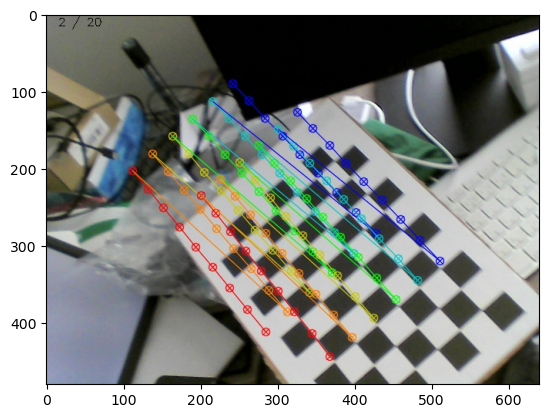

In [10]:
s = """{"state": "CALIBRATION", "points": [], "image1": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDJFsHYbV5zmmNEsZAk5yep7Cpw7xruhTOByPWoBIGRpZGOYyecnmuf7Tk16BGXJqec6/8AtFadoM+u3ifC/wATXfh7w1cSxa34wsvsB06BYI1e5kUNdLcTLBl0kEULsJIZY1VnQrXozQokHmxqd2eT1zXiPxR/aA+BHj7XdY+COvfGnwlo+jWwksPG0upeJbW3nuty4l0yBXcMuVbbPcf8swxiiPn75LT2DR9Z0/XtNttZ0TVYLyyvII57S9tJVkimidQySIy5VlZSCCCQQQRWU6UUuT5l8zbux3yxsyAEH1btXLeA/F+o+N9S1/UIYbddEsdWk0zSJQrebdy2zGO8mYkjaouRJbrGUBzaPIHdJkCRfFvxPrVrbWvgTwPefZ/EfiY3Ftpd95SyjS0WJml1GSNgd8cPyAArseea3hZoxNvXa8N+GND8GeGdM8HeF7D7Lpuk6fDZafbeYz+VBEgRE3OSzYVQMsSTjkmueXLts2JNNWK3jvxlpngDwjf+L9Yt7ieKwgLpaWiBri7lJCx28KsQJJpZCkUceQXd1UcsKx/CXxTl1/xKPB3ib4e654Z1KexlvLC21uSyl+2QRSRJMyNZ3M6r5bTwAiQoT5w2hgr7dnx5458IfDTwdqHjzx54gg0vSdMtzLe3twTtRc4AAGSzFiFVVBZmYKoJIB85+FvxS+E/xP8AiBbeLrv4s+E7rxJPYT2fh3wxpXie0uZ9Ps3Mc0yOIJW+0XD/AGeKSUqWjiEKpFuCyT3ByOTbStoJSaaNXTf2gLLWbbTPELfDPxJZ+GdantI9L8WXBsDaXK3ciR2cgijumulWZ5YVXdAGTzQZFjCuV75RuYrtPAxlu9fONl4u+H3jD9mPwv8AssWXjexbx2bDTfDr6Pp+tiPUNE1Sw2C4vCsTq4+xPaS3KncqT/ZkRHPnRlvo9C8XyBicDispqpG1l10E23qxjgRS7iwOFIAxxURKsojLDOAT6U6a4UqfNTJz8xUUxpkVCwDYzjOB3qWqipN287jbmpJoZIkK5Yg5Jxj+VRSZBCknap5/+vQxBUEMSAcH1pPOjZmQD6mnTpQUU0r9xtSTI543iy205OCAaUTIF3NAOF4yKS4njVx5Y3AdM/1qKSRgcovzYyXIrFRc4u/yK9pK1mRT7QGaGLnr81RqzlPMk4wMdak81UztAOB93FQDZsdtpxg4UVcoQtbqTHV2uSYeVDgjDDsvSoZCEJWF2+7yccZpVdlG1iRgZ5OM1DIWaRiPl9AOcVlNJysthqznoE+QmJV5bocVXkgSZNmTwOfUVK0oCbCoO4HJznFVZbl45BE4yGHDDtVxhaWnUKjlKWrI7iCTaVjXOUIyTXyr+3d8Gk1jRz4nsoB5kR3OAOckV9VT3E4i3ouegGe+a5X4h+GrHxd4dudNu4MiZGBJwRmrfPzXfQq8px5WflLdW4tZTBICGUkEE1ETnluSa7/9of4by/D3xtcWawOkbOSpZe1ef4wOtexSmqkFJGVraMBnvRRRWoBRRRS9ReoEmiiinYdgoo5zRSEFHGc4pCcc0oIPIpjDNBJ7CiikIKAoJopASRyKYxT6A0DI5FFIwDHAzj3pbhbuOVXKAlTyeAKCW6EUKCxwPSk6UdRCgrzwfY5pNx3UUH3osgsg560UKVIyQfzoxnoKBhSjKfdOD7UlNDEnFMB7Zz8wpKMjpQTSEGRRRRTGHOetFFAx3oAUY7jtSEgnijkUEk0hWFFGx1AbHUcUAZFJ7YpCFALHA5JoOV6EigKQA7KcHoadGgY8qcZ60tA0ERQzc0hABGDmnOR/Cv1zSKdp5A565ouJakkkieWAFPI5z3+lPjA2cLn6DvUXmBX5QN68fjUxdwiqI2G7pgDn2qWugWBGjhXAQkngH/Pep4mIzJ5Z+YY259KhtxGNplY57qTg9aS481ZVKKc547jtUNKTsNrQmnGcYAz0yRTygWMBFI3DnvmoEYSIBKCrNwCKki8xjiUH5OBk1LTsLViwm2hO7yjvH97oRViNi+WRcEkc498VE0W5Q2zP+9TkkWNRI8WcHhiah+8FiW7tooJDGCcg8DHX/OaeAI9h2gAZGWHT0qKS4HGUIZeNxPP/AOumx3scy+TFFuPIyB/9aotJob8jRgS3bMqvhj+f0NOWe1WNlJyMYIbsazRbalI5SGCQH+83TPNaFh4bvJmJuudy44HU1lKEUrtlKWuhDG9tZR8OS/Ucfp0p8X2+6hbybMIMcE8Vs6T4Ogjfz3RiV6BjW3HottEFby8Z/ujFS5weq+8l3ZzNp4VvrxQLiQ7QOe2a1bDwpGkJVohxwFx1H1roo7S3iGzynAUfNirkFiJMCGLI6ggc1XLOevQ0Xun64iU+XvVSOp2nkmoWBcExxN84+YHpQbplO8gAD7wqI3QcbQhUMfzraU1NX6/gSxzGQRqqKB3wKjecM2SuMH5gB+tRyecnzFiQTjJNMIcR5BPJ5rPnXL76I72MPT/BSR/ELUviFqmpfap5rCKw0q2MOE062UmSUISzHzJpSDI67FdLe1UoTBvfbdiwD7D1wCKaHCtz39KaHZXwOOKykpcnNH5fqWvMSVmX5l496jaVRl249x3onkXaCy8joM1XeSMhkXlm5wBTaTSlJfcCT5rskJR5GRj29fY1HLJtZoieAPlJo8xMqSq8ccjrVa8mDnCElc8etKDjKXk2NWbsx4ZTHkAD5hj3qNt/PdCfuntURMmMqvHpnpTGnCMUdSeeKXPypp6r8Ai5R1fQfPN+92KjKOvPSml1QZIzk9fWo3uNoLOBjOMt6Vman4r0fS5sahcpGo45OMe/Nc0JuMeRPfsJNyehpS3CeYAYyBj7wPFRMY5G8veQV9+9VLPW9M1VDNpt4sq56qc4pzSlWCs6ncOM1UZXhy/aQJKy1HSzlWGDnB5GCKhklaR8v1NI84DlcDjpkVH9oU/KrcEelU7uzepVOLm3fQSeS4ZuW+6cAkdPekMvzeWzHJ+7zTmCGEksD6ZqrLc+aSIwpGPlPuKuM4qPLYpJJWYq3IfgbgWXIHpTTJiNo2XJPbPtzVSW8+zDbtwT98sOn0quZVfMpkLZzjPeqgnGN3sx3jayJWnmVvLZsEDtxUD5lkZV3MSpJwOBTXcmNgX3AngAc1Unu3R/MRuowcmnCe66EK7Pnj9tv4SjxL4fOt2dj+9gQkgDnA718QyxSQyGKVCrKcEMMV+pXjHT7LXdLm066j3ieIqSe1fnz+0r8Lbr4deOZ9kJ+zzMWU4wOuK3ws405cnR7epU1dXPOSOf60UUV6BmFB4xz1ooPPWjcQH60UUUxhRRRQAHp1xRkdOKQ4PGaWgAoooAJoAKQttHHWlGM80hCnk/zoAcQMA8e1N5z7UpzRnNIApcEDP9aTjvS7yV2YHHtQGonGaPrS5yMUmRQgAADgUHGeKKKBCleMgfhSUg60tCHYBnuaKKKGJgfb9aQjPeloppWGFIAepNKTiigAoo4opCD3FBxnigcHIFFLcBQwAIYE+mTSiRlG0Himk+goI570JLqLQXDH1IoZSuAR1FJkjoaXhe+fWjVBqh2c4wzZzyRTg4UDaDweDUYODmldgTk/oKkQ95WYiSaEdxgCgNJOwAbA7DNNVoySXB9hQxkYAlT16gUJDbuTlA52MT8v8AEf8A9VSNeW6oAF5+nei10nU58PHEOOMEircXhlhIGuC4APze9YynTTs2Cu9CkL6d0wkJJHoalW31O6jwYiqE8YXrW7Z6XaI4Z4wV7ZHSry20flH7OgAH8IH9K55V1F/CPl1MKw8KTXLLNcFiucZPNbVt4dsYGEgjUkHjFWLaNkBZ/wC9jGOT7Vox6a0xGxRtPQAVlOcpztcaV3YigsbXA3g8nOe9XLe1t2y/ksMnKkdqs2mjokyxzPgP9xByzH0AFfQv7MX/AATZ/a//AGrZIz8C/wBnvxDq1s8hVNUu7JrazDBthHmSABsHOduSMV24bKMdiI80IPl7vRfeS5RjueCWWlzSIXKccZ46/lV4aLK6GWRdqj1Xp9cV+wf7MP8AwadfHjxfb2us/tHfGqy8KW0gDXWkaNZLPcDPVfNckZH+7X35+zT/AMG33/BNz9n2aDWda8E6p431WJQDeeLNRM8ZPc+QAIgfcKK9KGT4OhL/AGmuvSK5n9+34i9q3okfzjfBj9mP44/Hi9XSfgv8F/FHi64LKgXQNFlnRXJ4VpAAi9vvMK+8/wBlr/g2O/4KEfGg22q/FtfD/wAMtJdszLrDm7vtmeQIY8Kje5Yiv6H/AIe/CP4YfCbRovD/AMNfAelaJZwRhIoNNskiCqBgD5R0wK6KumNfLcJ/u1BNrrPX8NvzBe0b1Z/PArqPnJyO4zSK5ALshOe/aoTKEAHUew5oLsw+Vjgdq8GcXGLd9WEVZWuSpPI6EY3A9MjOKaT2YY9800sy4PmEDP3SeKZI4G4svHqa5JVuV8vf8x6paISV/LHDfjTZJi6fLGWJHSlaUMSAfaoHdFXIIyTxzya0i7JLr+Q7tA5WRjvGBjqeMmq9zdSRkRqevU0k7MRuaUniomzgtIx9ua5ZRSfM9n0FzOKWgrTGUFihODycYFV5bpJJMKhDKw6E4HFOWYCJi+5ee/FQTO0Tbk+Yse35ZNaRlKn7j17FXuBvGy0ueehHY/So7i4QQ5l5I/unmm3DAOWki6feJqveXSmI4ix6DGc1lKPu3S9dSUrPUq3V/De3H9m/2tFbEAYaU4/AV5h8R7jWdKvpdNvYDtU8O/IIPoa5L9oXx34i+HmqDWHtne2d/mByBgdwe1ePeN/2rYtUtQiyyYIwilzkH+tdeHp06MVLf/P1MKiqOatsdSvxe1P4V+PY7xLiWOzuJwJoi+QQT1H0r6d8G+M9P8ZaRFrGm3CSxuuQynNfm/4t8f33i6Rp76Y8fc+avYP2Rf2h5/DF+vg/xHqTJbS8RMx4DZ6H2xn9KqpB1WpR0kvxNKXMo3lufavmKW/e/wAVR3FxHCuS5+XnAA5FULPU01K2W4SZGUgHcG6jimm7E8LA4AYYBwc4z0FcTm5O0XqjoTfLYtXV0HIMbEDuw6ZqF7gRP5iyDGeijiqryjYVAGAPvYxUK3CyfMCQR1z0xWiTbbeyJe9iaeZTIZHIIJyc9DmoJ5PLPmKTgDhfbiq8kqsSfM3DqAOxqJrtRGQoJPf2pJtJKX3DunEkMnmKVA+brknNVJ5pFfa7k55wFqOS6IJZjg5qGe+VxtLEEDlhW0bVNGtBp82g+4uAIuI1bqGLDpXhX7WXwth8a+FZNQghPmwoWBx756/hXs8t5u/iwpzkDvWb4hsINSsHs3jDI6EP9CDWduTbfuLqfmjeWc2n3UllcLh42KsPeo69N/aa+Gtx4M8aTX0NqRBM5O5Rxjsf8+leZZB6V61OaqQUhSjyuwUd+tAGKK0EFFJjnOTS0AFB5oooARTx0paKKAEIz3/KloooAKCAeDQRniigBAuOR0oGSOacE3DOaTIzjNIAwO9HINByBnBpSxPXv3xSAQjFFBOTmg1QBRQfrQAfTNACdSCDS0UZ56UAFFHfpQABwKACiiigAoFFFLUWoA4ooooAKKOlFCBCjP3qSjPbFKAzfKAT6CkriVxPwoqRbW4dwgjOSM81atNEknP7x8e1S5xjuGxTjjeUhEUk9sCpIbG4mYARkZOOa2rTR7aycBmYuepAqysCI6yiLcM44XgVzSxKv7o0mZtl4f3Pl+Rjv/hV6HSoIiN0ecHgelTi6tYeYY2J6nAqUSLKoYYBH8JPaud1Zy1YJC7oYItkY4+lSqNx2luCOVbkVF9pt0CqwAbse2abNPAkgeWUAr6His7Weg9iaVZFIWJO/XHFW7VJLgCMR4fHBXist/ENsxKxDJz1NaehakjzKGXJ69adptJNBpY7D4X/AAa8d/FLWl0fwno0tzM2SAMAZA9WIAJ96+w/2If+CY+m/Fj4yaX4L/aI1a/8P2Eko823gQLLOTyFLkHap5HHXrmvOP2HvEll4e+IWlzO2wfbIi4IHPzgc5+v5V+g3xVuptIXTfHGkXDRXVvOpkkXgv8AMT2/yK+iyjDUIYum60f3ctL9U+j7HLUq1GpQho7XR+n37H3/AARf/wCCef7NWl2GveBvgnpd/qZiD/2pqSC5lYnnO98k/ga+uNG8P6F4ds10/QdItrOFRhYraEIB+VfJ3/BMb9ruD4zfDW08Ka/qay6lYoEWQkgtx0Of89PWvruNxIu4EV2ZtRxmFxDo1ZuSWzvo13McDiY4hNSVpLf5DqKq6zf22maZNfXb4jjTJP8An3rh/Dnxy8O6zNLaQOWliJ3qjYzj0B6/nXHRwlevTc4LRbm1XEKlPlsd/LMkK7mqq+vWCbs3CcHBAcE/pXFa98TYljDLNLCh4OdowfTmvPPEvxx0bTpWIkkd8H5kIGT9cV0QwUIQvVZjOrWqNcj36H4sSFy4ZRxnHFKs4iAVEPXknmoDKGYEkrjAx/8AWqM3K7ztbkH5uK+cbvp0O2zWxZaSQvvDArjofWmPIZFDeYR65PBqu80QQJJlQTximqYlHlo5LZyeen61hUj7t3t0G7dNyR5wgZmYDjHI5FQtKHQEN82cDimTz+QCjKAe+R0qAzgttRjnHPHSppwq82g7NlnzkEO3eNwbj1NV5Z5d5XPGO9RXDqyhVbBByxz0qCaZgpzg4GOKUGpQXO9ew92kmLLP5xWND8uecH+dMnmkxIM+wOaiUDblWxk5xTHkZnIVwTnrmhyipcqWwKNkP89tpV+46k896gnlVIzk544A71FLdM2dy4AOAADUc1wqRcy4I44XvQ6bV3u2LfRnK/FrwVp3xC8Lz6Te2YcTRkISRx1/Kvzq+O3w31n4XeJp9K1BX8gOdjFeMZ4+lfppczIyHJwGXkN2P+eleLftR/AnR/id4SmuoLfdewKWjIwDxz17/SppONF36dSb82vY+BbDWIogIpvmX+Eg9q2bLUpYJF1Cyk2SREEc9ea57xT4dv8Awtqs2mXcDRtG5GGGKND1KZJliMnXG7IzXoSp2jzxK1TPuH9lb9oK18Y6YPDmv3jLdwoBGWA+fv1r3M30WQEkOCOvB5r89fg7qM+neL7bUrOV4tsnJGR7f1r7p8G6pFqmkQXMsm7MYPHc965JRUaqqLZ7rzBJI23umdyBIcdCBUTStExU5wB1FRGURsdvU8/SoJrtjn5ieehH86dF7pLQu/W5LKzZ3IwH9Kiad44id+WI5we9QS3KzKVeQY9F6ioZZGU+XE2Bjg561bi3BKQ93dj3dmHksx9c5qCR1jQhs5PHFJM8jqHMwG09CarzXOSSHJIXIxUqLlJdibXCclULbuO2TVS5nKLtRugwyntSSXEz7kkY4PbFQSO0YLYzkdMVpzWVpLQDy79pP4cweMfCM9xbwFriNGZdq5LAA8fnXxdeWk2n3kljcIVeNiCDX6I6tBFdwNbygKrKcg+9fHf7S3w2Twtr7azaxlY5Xw2BxWlC9GXI3o9gd2tTy6iiiu0kKKKKYwooooACMjFFHOaOc9KAAADgUfWjOaMDOcUAICc7TS0YGc4pBkDGKAFzTSTuxjjtmlAwc8/nS9Tk5pAGTjGaKdJtz8rZpC5ZQNoGKL6CEzmjNIGBOBS57UWCwUnIPX6Up9AM0HHcUxhRRRQAUUUA57UAFBz60UUAFFFAz3oAKMUc56U6NFY5ckD1FJtIBpxnjNKiO5wq5qW3gSZWIY8DqKsWkWE2FgeeMdqiU+URHDp25N8z7fbPSrENpbRSjKkj+8cUvl5GzJ5OM5p8Fu8zeVCGYj1rBzlIBQw2ALkc8n/P41Zt2lkmVARtUYLgdeldF4M+DHj7x3dxWvhnw1eXUkjABYYCw59+lfR/wg/4JOftF/ECIXWoWkOkwZyTKDI+PZV6n2z360vYVJxvb7wPlMRyrKd034k9KlW8cWwLSAnuDxmu2/ak/Z1+In7NHjFvDnjPTpI1bJhuQh2Sj+jDuD6ivJn1C6dQnmkAHOATU/VpdRtNaG0+o28MDElQ3vVEeIJlbfGvJPPHUVmFmPVifrRg4zWscPBLUm7L1zrU83AOPYVUNzcH/lo34GmlSoo5DYHFaxhGOyESQXMqyj94eTg81uaBdNb3I8vuPmYntXPkg9uPpV/SL0pKFZRtUYOBWVaPNHQeh9D/AAF8TtouvWV2twRtuY8nORjIyPxBr9RLHUrb4g/AeG6t7ndJ9mjlJRs8rtY/59M1+O3gTxK1ncRNE7Da4K57YPU1+l/7DXxOs/EvwxfQb1xuhQqAGHTaF6V1UasnhHG/wu5z1vdqxl8j3H9iP9pHXPgl8RLTVNPvJGtXuFaVWcnKZ9jxwe+fSv3A+C3xo0H4veB7Pxhol/GRPAHeONs8+1fzwSN/Yniie3tyVKzfIw7jOQRX3z/wTZ/a0vfCt2ng3XNTzDMQqKz5OenUnntX0MMTSzDCexn8UNYvq11RwYvDeyqqtDRPf/M/Tnx3qcGpeHLqxG4h4+d3BJzwPzxXx1471rXfhd44nu7CRo1M2VAOQcA+3+fevoG98eWtzZq8d0x3gMjKuRjscng/nXk/xW8P6R4pgl+1rvZjlGDYb8vXNcKrexjywej6HTThGcLS+84PxJ8cdcu4fLnu5jIAMI0xbHTp6VyNzr+saxK05nmPy9ycgZ9BV+4+Hy2V35UUzNGD8oZMEitnRfDOm2SiW6mIGdxymMd64JVJOd0zWCpRSSR8AeLvhjq+hO1xbRPcRqcDCHcB74/nXI3SfZmMYGGzyvWvpqeyguFDSx7jwfm/CuO8YfCvRtbjkuYE8iZgMzqB831GQTXxlPMG2oVNF3PerYKLinB2fboeIiYyLjoVPBHY03zFQDDkHOMjjNbnifwBrvhyfeYWmjHDOgyBjufSucld1uQswIIPyjGK9SMo10vZSumebWpewk1LSwt15nG9uP4gOtRSRBZw0PHy8dgadK/IVGG7OcE54+lVXmyvzFic9e2P8il79OLjF/12Ii7rQkefAzGfmPXIqq8jHgPzghuetLJMcbWG7PQ+lRM+GPHu3vVU7SXKy4bag8o2ZVsHPJHeo5G8sHfzk8en59qilmTc3zkKBnp0qNr1iD8uV6/XioqQb0Tv+g018hz3Uch2iQkEdj0qG5lAUh5SMdVx1/z1qqb0yzmJCR83B6YFRXN+SfLKk54Ld+tRytTi46DVkmhl5IZHXzGBVeR2z/n1qnfIkuXzlSO3cVJcgLtMZJC9ielV/NKpwQd3OfStvs3RFtT5n/a2/Zon8TrL4v8ACmlrJKAWuoY1wzD+8MfeYenevm//AIUX46sUXVpNKmW1DYZypUj169Pxr9IWTz4x5zfKeDurDn0DR1E9q1kptrlWSQYxnPf/AD6VphpSo+49hP3T5w+AHgjwtq+myaZq0Q83aPLYjDK3c+/avVPAWvah4L1lvB2tzSbRk2zv91lzxz6/WvOvGWl3Pwj8ZvPp2Vt5Jt0TAcetdfc6xH400BL+xIN1CoKkdc8cVvKnyaJ+7L8yIT5436nrR1Hz9pDZ3DAYGo7q4CcAk5AyPfFcj8PPGI1ezFhqQ2TxcFTwRg4rp5ZoQdrSDgZ96x5Gml2NE0xXuUjXGwKe5JqGO8t5JirORgcEng1BczSSofs0oxjBycZFQKwiXfJFk54JNXdOVu4Fye4iCllk3E8DBqi0jbCmcDOQahmkK8o2c9jximTXOxNxxkdD70OSjFNalqPclkuP3JLMSd3Qd6rvfxopjkfgdBms3WdUawVnZm+UdhXLalr+oXLEpkAng57VlVnNP3kOMeZo6i/1i2SQg3IwCevp6V5l+0Bp2h+LfCsltcwqzgExyDqDg8fnVjVNR1GI75JcqDwWNc9rV7ca9nTzuKcjCnvVNNQUluOUVGbiz5gv7N9PvJLKQ8oxGfWoTnHFdz8YfAF14dvP7UQAo5w4B6GuHBB7130aiq000ZAM96KQEntS1qAmR60HOe9IeoHHFKSQue9AC0Um7jignbzj680ALRRjmkwCfpQAtBIHJprNg8CkLMTjpQA4HPanJgttLY9TSUHBO7H5UmrgKcdQT170lIuepo3DOcfjQlYBVO0bTznvRTd+Bz1pC5zxTAfRSb1oJwaAFoozxkc0UAFITj+lKCD0NFABRRn0ooAKekRdNwPOcYpoG44FTWUUjsUhiZiem0ZqG9BCTQpCSrOOeoHb8+tPhQOFELHnsxrc0T4aeL/E0gS002QhjwdvH51698Of2LfFmvSx3WqNsi7lVOR7YqbSegcvQ8Q03R728cWlrH88nA4xn6f57100Hwg8ZxQpcT6NeRRyE7ZJrV1DYPOCRz9a/V7/AIJD/wDBNb4b+KP2htE1Xxh4dj1H7A4ljju4gwVw2MkHvz+GK/Qn/gtD8DPglafCTTtcu/CMU+rR3MVtpUwzvhdt2AGHO3arnB49q662E9lCmpJuU+3TWxnGopVJR7H883wy/Yn8e+NzDdXSeRDKQUfYWyvrX1/+zV/wTS+GMDx33jC2N/cFgALkEoAO+3gGvY/AXhLTtJ01Y47VR6EoAT+nSvUPAKrb3SqG9ApxjHtVwwlWnU5WrfqS60b6HU/Cz9m34YeCoYU0bRYlKIArLEowB24Fe06Bp2m2Nvst4gqhcABf8K4vQLsiNCJT0xgGunstTSFCC524zhRXTOjDl8zL2r27nwV/wXI+Cf8Awkfwt/4THTbMPLYytJuA5ICnNfjoARkH1r+gv9v+203xR8EtT0q5tROHt3AXsR8oJz2wOnuRX4B+KdKbQfEV3pDPvMExXeBjdjvXDUTSs1t+J1QbcLlGgKT0oorIYowOv5UhIJzigdetFJJ3Ek7ig9iTU9lJ84UJ+VQbVJwMmtDStOkM+11BJHbtUVJRUQ0Z0Ph/UEWZUYY24PSvs7/gnb4p19vFZ0i3tme1mhLOy54fAwAMdwPUfdFfIXhDwddXmoKrqzh2+X37V+hP/BPL4aQ6TfxzTjBG0deMgEkn19KnAx55tR1MMVy+y13R6b8SrGSy8QpqBhKFwOeeeK6j4TeNbzw7qVvqdndyJJHMpU5PPPStT9oXwmbaO31FECqnLntyOK4Pw/qEDzKRIw5GUx1Nb05ypOMlpb8AlRi6aU9T9Tv2afjrbfEDwhFaXmofv7dBuLEfMe/fv+HSu613xLpsHyzXp3dhjqfzr89P2eviPq+gayhsbuRARnCn8/5V9KT+OdS1i3Wf7STkcsR8x4HHJ7VrUrc87x0vrYwpUmpcu6/Q9A8Q+P8ATokaKGTaD3UYyP8APtXFaz43v7ot5d0yjPYY49vSsO4vJZGzK7FiP4jVW6u413bpeh5z2rG7UjrjGMVojkbiAlTlBz1wc1SltGYc7sdK2p7Zg3nwMAM8DsaqT27qpk2Y9j2r87jNpuzPqKco8jW6Of1PSI7ndbyQCRHG1gVBBHpg9a4Lxp8JdKvw1xpyiCbHQJgH8q9QuoGRv3anOM9azrq2UsUcZyemelS6mIoxdSno/IrkpV4WqK9u584eKPDGpeG7gtf2bKnIDnO0n69+KxGlwflJ5HrxX0xq2j2eoW5tbiFXiIKlSOCDXmXjH4K2xTfoLmI8lYmX5fwr0cJnKqcsaytLv0PKq4GWsqb07Hl1xIWbaMHPvxVWaacOqgZycbSeB71oa7oGs6AXiv7J1KNg5HB+lZMs0TLvDbXwcAnpXtRnG3tIO/oedaUXqLdsm5lif5iRvGeB/SqV7OGQwcld3pgii5vZXTEWGH8RB4NVJ52KfMuAPvA5o5eaCUhyVth73UcLFly3bIHSobyQOu9ZCRnIAGCKrvNtczOwJxggiqt1qDqm5MEjhQau3uK2yHpctfaQoPHB/vDP51BJMgDFDx29fyqCW63wfM+SfXp+VVLm7kiyNoPHPOKUYSnqTqW3m3oY0J+X1qtcTI0TIx56ccc1VFxLEd+4YPbvUc05UE5A4yOOlVao5ctik2lrqef/ABn8Mtq2ltHIu7urbeQfT9K82+GXiWfwPrqwajcnYkmAG6YHbmvdNbgXWbVraZfvAqpA7+teB/GTwxe6TfNLDlcMdo6Bvxr06FV1KXLL7jkq3pTUktOv+Z6Z4m12xeeHxV4eRRMcfadjcMO5rf0DxPDr1qtxE7ZYfMpPQ188eDPiQdOJsdTOVztOT/n0rr9I+JkPhy+FxZ7pLaY8q3Y1nJcvu/16HSmj2N5iGPB/OmzXmQI3c46AnnFcInxggdBLDp8209dqk4/KoJ/jDHHIC2lTFT/FjFc8FNpJq4c8WrtneSyo5IVwQvJINRNOGPmgjHdRXDj4txSSYfRbhU7/AC1PH8V9DhcQ3Xmx5H3jGauMZzhcpNG9rVp9sO5zx1AHPNZkejRZLSxqO5LDmoz8SfDLkRnUBzwCVNVtf8aabFp73FjepJtGF2tnk1w1JcnxbHTTcPZ3uYfj6zWY/Z7LjAwQD/Sqmk6HLp+mPf3kYBX7u4deM1jWvi+W81NmnIMecncelJ8QPiZatYDS7CULnjHPB71pVqSdNQivmKVSLnzHE/E8HxaZrKBlwAdqk4GfavH18PanNrB0KC133GSFQMBnHOcn2r2DS9Daaf7fcXjHcxO3dkCuc8WeG4LPUp5lvBbG7tTGLiVsLGSQeT74x+NfTcHYDAZnxJhcvxUn7OpKz5XGDfVRjOScYym7QUpJxi2pSTSaOLETlCjKa3RxUnhS8MMsmn3trdtbqWuI4JDlAOp5AyPpWUDxmu+gt7ie4SRoZ7VrWfexcJnUSE68dXPPHIwx5zkngXUFjnjJ6V+oeKXBGWcJ08JWwcJQ9s6sWpXSfs+S0lGV5wfvuE1NtSlHnp/u5Rb48DiZ13JSe1vx/D+rPUTGMFv50pIC+v1pCC34UuPmyPxr8hPQAEEcnmkL44xQFYnLUpUk54/KgA4YdKXjrScA9etBB27eKADjrnpTSTjGOKco4xS0ANBPUGjJxxS7R/8AqpaAEyCuTTS240+m7VPI/KgADYXpSqB1HejIxmjnPWgBfrRR+NNY4HuaAHcDtRSKWZtoGfoK1NA8G+KPFMoh8P6JcXbltoWBNxz6YFAGYOmMCgHIzX0B8K/+Ccv7QnxG8m5l8NNYwuw3faiFOD6DnJ9jivp74R/8EW7djDqnjvV7lwgJkiEHlox/u9STWVStTp/EzWNGpJXS0Pzns9Nvr6RYbK1eRmOAFXNb2j/Czxfqr7I9OdQCAdwNfqrH+wJ8GPhZYGLS/D0EeyI7vkVmB9dxGRXjfjrwJ4U0bWmg06yRQjEg7eTXPDFe2qcsUaSw6gndnyP4W/Zj1u+ZJdQWRQTyEHavXPAH7M3h7T/nvEUMB3XOa9SttOiMYSG2wMcYFX7ewVJFYMcEHjHNdEacr3bOS2o3wZ4D8O6TGqwWiDaoGAowa9K8JxWsDCAR4HcIOD+VczotjhVEgycdB/Wuu0JYbaSOVJTk8lQMfWuulCK1sRUk4xcj9Ff+CJfhePUviXqXibylaKx01kVigILnnOe5H+elan/BZzxn9q8X+EPh99qkG6Ca6KA8OYwqD8vNP51rf8EQrGC20TxDqFtH5ZmEgYZ6lSUGP+Aj8815j/wVX1I61+1FpkIlI+xaJP5cZxwHuB/8SM/hXuYmCeZ0ofyxX5X/ADOGi+Z1H3PAdH09Ft8sh4HULXSeGoxCQyswA7AVgWTug8tXwMfdANbuiy/L/rOh/wAiuBuopOV9jVQkko309D0Hw/fKYwxuG2qcHpW4mtLDEQbg57lea4XT9TkWMIszAdsD/GrN3r0/k7WuCuOvNdG8Hf8A4I9J310Rx37St/FqvhS8tWZ8SRkA8jGB1yOnP64r8P8A9onw/LoXxJvBNndJMxb65z/Wv2c+NGsh9Gnl805VSRknt/k1+Tv7aHhV7XxfJqtum7zJ2JbGMe38q8nEyUankdNO3KrHhdFFFYlhinRgFwGGRnmkAJq7BaoyBQ+Djr3qJS5ELULW3heYpAC5HJwa6fwtojMyuyFmPbrVLQdHlgwy49+9d54O03MiOyHORwRXJKTnKyHsju/g54PS/wBQiaSAkKy/eB6199fsvWNv4dtIZ4NieWVL71yOvTH0r5P+DulPAiTGMfMcFT1H+c19MeBPFkGk6fkShSR82B1/+vXo4aMaey+4wcXJvU9S/aW+J+jy6E1jcXDqJAgEowCMHcAfy614rpHiki9juI7osjEZY9K4v9qT4hSy6U7pO5YEFcyEYYHPrXGfBH4sx+JtPTT5ZP8ASISN3PLjPX+VZ1eXRxNOVxjzXvc+0/hfrzLqNvcWsgAbGSBwD1r6l8N6zbLpiy+bu4GVI57V8QfCHxSuI2DgAON2G5+lfXHwuWDVNDguUu2XIICE9MEj+n8qyvy7maSb906681aWTcLfO4N1I/zioGhvL5sO5VSOSev4VpJZ2kS568c5FQTT7C0SkgH/APXWljR6LU+RPgp/wUS029WLQ/ipYorbRjUbRQoLcD5lJ+vQivo/wz418K+N9Ij1fw3rdveQOPleOTOPYjqCOlfkC+uySP5oY7SeNy9q7D4bfH/4jfDbU4r7wlrVxbtGwJVJSFP1HQ/SvhnRw9SN17km/ke1RqShpJ3/ADP1aniMq7QAQOmB+lUprRR91cH2r5u+B3/BRbQPECwaL8UNP+xTkBTewY2E8DLLn164r6P0PxL4c8XaWur6BrVveQsoKSQSbh69uh5rjnCvhkueOnR3umdVGrGorQ8tHuULi3aPJ2bfbNZl7ADu3kdcjmumuAqpvZeOnrWdf6dDKC8K8YyVHb3rip2Ts9zrhCN22cbq/hnS9ZLpeWscm4ckrz/9brXmPjr4KeWJLnQmJ2ksYWHI9MEfyr2m40xkXMT8n1HSsy9spc7ZefcjrWlKvXpTtDRr8fkZV8PTrbo+WdX0/UtKZhPayIAfmDLjvWbeTzAAunBH0xX05e+CtD1V3F/aIVZcEkc4/rXj3xg8HeGfB9w9xDep9nAz98cH+tfR4LNaWIqRhUjZnlYnBygrp3/A81lcBiwUkHr6VXmE8jn5SOflJyM0zU/iR4ctsWtsokGdwKqD/OsafxVqfiK+h03Src5kfHC5Ne1CMZSSsea3FOxdvb5LNCbiVdoPGTzVCPxDpE8pAv1XHWvoLwB+wfJ8SvCqajqWp3EMskG4lDwCQeCMcHjjkV8+ftF/sM+I/hvfefa+IbhFLERSnI2kdAf881pClGonBStIWsVrsOOqROSVOQR8rD/A1H5rXIJaU7gO/FeK3PiT4rfB/U418ShtT0veA06qSVHfnse/NemeGvGGl+K9MTVdHmV45FByCMj6+lYSg6STX3/1sNSTNPU9TisozJKw+VcCvM/iK0/jJHitoASB8pArf8Z6nLLP9lSXkEAqo61P4d0uC0thLOg3Sctnt9KuPPCF1uDV9D5y1HwjqWk6o3nxkKW+fI5FeufDCw8Gahob6Nr1qhkxlJmPIJ9KvfFPwmL2yfULCLcwHzKOhrwm68eeIPDerfYyWUq33s9Bmt5pYilpuZx9z3Ue9eH7PS9O1N9Cn2uob9y5H3h6V1tn4Ksbt18y2RA3qozXj3hTxe+s2sd9FMpni5Uhuc17D8LtcufEdl589wjXCcMvoe2RWMoxlLV+prbmRvN4K8L6da7nt49xA3EqOa4jxP4b0LVZyn2VMHOx9mADXceIIYIcfarjLKvzAdPxrmNS8S6JYo8DxhsA5CkfmTUQjFS6srmWxyOreC/Dljp5FxEGwvLEZrznXrHTrSRvsV453H/VB+BW38TfiWJZWtNN4U8ZI5HtXC22pTxk3ErMSx+9n1rJqbleberNKrhokilf3Twb4re/fdzgHsayYfCPifXn8+3LsUIOBk17p+z/APse69+0NbXvi+PWU0zR9OlC3M4tnmubhtpYrbxAASlQAW+YbVOTxX058Mv+Ccen6RaQaxH4lmvLORQSt3YeRcIeeCu5lx/tBufwr2ll+PdB11H3LX6Xst3be3yPmZ8VZBDNf7PlWtV5ow+GXKpyV4wc7cik1qo81z4R0C6/4R9xp2v2kkTr0LDI+teh+E/hHB8btFutL0W8snukQrFBNMqu+R7nmvqf4lfsTeDb6/gSwj2Mr4KKoJYdwTXeeDf+CdXwn1Xw/E1xYz6bfRgGLUNNCxzK3qSPvfj61yewhKHNJO59FNKE+Van5A+O/BviP4ceK7jw34gsZ7S5tJSAkgIIweCP8aZKsfiqJrq2ULqcalpoVGPtSjq6j++O69+o5yK+v/8Agpf+xB8T/hpcR+PotVfX9LjUqbxoCs8AHZwM5GOc8d6+K7eWWCRZYXZHRgyupwQR0INfT5FncMHCeGxcfa4arb2kL2d18M4N35KsLvllqrNwkpQlKLwqU3K0lpJbf5ej/rUaGBPSnDPeumj0fT9c09fEF3BIbt42Z7O1KqbgKcGUccd8gDqCRis/xF4cttNt0vrKeQqZNk9vLgvA+MhWI4JxntxjB5r6rN/DLP8ALMrlmlJxqYfkjUjJO0nSmrxk4vRSs7ypKUqkYpzcXSXtHhTxtKdTkej2+f8AXXbpvoZPGaKKQgkcV+dHYLSMuSKBnHNBPOBQAvAFGRjOaQqSc5/A0EZNAATilop0dvNcHbFGW9hSbS3AbRU5sLhTh9qcZG9tuR+NdP4H+BnxN+I86Q+EfC11eI5x50EZZB/wLp+tPpcEm9jkAuDkH8KX5mICKST0xX1R8OP+CUXx08Vql34hSPT7chW2hDLIQc8YGAv1ya+ofgV/wRys7a3S/wBasUvHjTd9nuVKl8dgVBwfrmsJV6cbpO9jWNGpLpb1PzS8LfDTx141uVsvDfhm7uXYjAjhJr3L4T/8E0Pjn4/u4jqdmLGF+f3kTE/lxX6r/BX9lb4SeGIDaaR4dhsb6zfZd2P2QK0WMcHuQfXvXtGk+DNC0tY4bHTERhgKIxgsay+sVJSaijeOHpqSU39x+efwa/4Ix+GtPMWoeJ7yW8yBvQj5QcckYHT/AAr6r+GP7Cnwx+HlrELDw5ap5agqy2gB/oc+9foH+z7+zR4I8VaOr+J9IDEjfKzHlRxwO/WvTX/Yz+CT4aSxdZR919hJHHpvrVYetL4pO/kiFVw9Ko0lp5nwx4S+H/hXR7NRZaNEhUYyUBOfyo8Q2X2RTFGTGPXtivu2+/YP+FGsaTKNA1to7wrheoz+Iz3r5O+M/wCz18Wfh9qV7o2ueHJ7i2iz5N/bQsyOnZjtzj396x+qw9o7b+f6G0cTTk731Plv4xhhbSnfkhSDn/PvXxj8TXuV8VvGjZBfjcvUelfZ/wAVbOVI5GiuEkTaQvqeK+Pvi/pctr4la43tjzOCwpKMqdezXzsOtGKg2te5lxTOIlcNtIAzxVy1ZXcO/II5qtaFfIXcc7l6Fas258onBPOcjPTivQjbY8xtR3NzSZmSJDG5bPqM49a6TSJwJFYPuGeuMEVyeiySIxd8Ff4a6LTWMWAz7T6+1bRk4tGdS7Wj3P1Q/wCCJM4bwlq+eXPmFsNkDOcfT6e9eN/8FH3jm/adJRySugRYY8cGaU/nxz9BXff8EP8AxIxbXtCeZFLCRkwx3MPLznH1z+Q9a4T/AIKaWj6b+1GB5LBJdCV0zwFHnMAMHv1r2cW5rM4yT+xp/wCAnFhLKM+6Z4fa3pDlMg/QVrabeggxLLjA6BTxXOQMwYS7wDk44rQtLsIRuk5PtiuOElNabm7bi+a3yOrg1JAmGnC49ajutXEKllck9sg1jx6ooUbGzjvjpVe+1eOVGDPz24xReo07rQa0k+zOV+J96J7GRpPmDD5uPavz6/bJ8P8A2pZruCLJAbnj1r7q+It95tvJbq+0gcEdx618gftKaU17aTAYbMjDge5ryq7965tScmk5HxC8MiSGNlIIJyKekKSDGSCOoNaOv2MljrEsKMcbun41Whg2sSuAcY61j7S8bo0vdhDZEtkDgc7RWrpNiJAsxJHPAAqKwtHdmG0rgccVt6VGBtVlLAnntWE25LUNjT0TTGeXAcbhjC16J4M0tFkDMOffpXLaHZjIUEdj0rv/AApaRmRY1P3Tg5P50RXNqF3ex6t4EZbaKPL42/dIPvXoMfieC3tzskwMcYzzXl2gXqW1uY0PAPpVu412YRFQ4yR0HWuqDaVrmUUm3co/GvW21DT5EmlLFm4yOPbFeL/Dnx63g/xzi4nKRvJhm9Bmu7+IeqyXlsUJYdmx34rw/wAVPNbagZduF3ZJH481yVajc+VrQq0ZJxZ+ifwd8S21zbxXNtMhE6q2S2a+yP2ePEgnsGtAwKlAcde/b8z+Vfl1+yB8Y01CyTQdUn3yx4EZznK9P0r7+/Zp8VOt7GqSEiWNVBbnBzn9ePyrVP3eW17dSG+XZf13PqR5w8YYN1GCSKqXNzGfuuQT93ikt5hPbrJxkr0PWqOqz7SHLgY6Y7U6TUl6Glmo3Z+Md14l0tJwZPLCYPG7Gay73x7Z2kxNrENwGQAeK23/AGUfinqEKS2Wm3F0rnIVXUHr2DEVb079nXUdEmSHxHYzRS91ljIzg47jsfwr5ZZc4tc0tj0JV5SXNbU4eb4i62T5mnWkgOe3QV3XwY/aN/aK+GmrrqfhC7mjQctbPuKsvfj/AOtXXaD8IvD1uiv9lVwB0cAjPvxXVWHhHTI0VfswYrxwvtXVRj7GDja6ffYycpztrsfQ/wABP+ChmmeMbO3074t6G2k3bALJdxDdET/eI6rX0Noev6D4nsPt/h/VIL22cZE9tKHHI4zjpxX58S6RpduHaRFQjrzj864e7/aO8ffAvxQt34D1udYw2JrcMTGw916H/wCvXJWyqlUbjS9yX4f8A66OOnRdpao/TvUprW3jyXUBRyzHiuB8Y/FLwt4ajZri9VmVTgA9TzgD1+lfJWjft++PviRHDpOp6CEkZRiezLLk8dVOcfh19K9S8C/C648fOusa3dzTvKuQm85B6KDn69K8tZZVws+bEtK19nc9Cnio1pWpfiXvEXxr1zxTK2n+Hbdtp4DAYz9azpfg54j+INs3/CT38qRyrzgjOeufTrXo+j/DXSvDIP2fT/LYcFW6n26Voz3TQokccYwBjbjirlifq65aEEn1b/MmWGjN89V31+R8ifEr4Rz/AA21P7LeTLNGWzHKFOCP8a6X9mTwU3jDx/b28cW5I23k46YP/wBevY/iZ4U0rxxor6fdW6mRfuHaMg4rtf2EP2ernw/dyajqdupkmlJV89RnHXHsa+iyjGyxTftX76/FHnYzDqk1KC0Ppj4b+FbXw74Yhs9pLCDkYxxzXmP7Ufg3w74h8L3VvqCRvvU87scj+vf8K9+vdPt9Os9yKFKIRkdCcfyr5Y/aS8ZyvqDWP2hVQklhjknPH04Ar67KsveLxijH5s+VzjHPC4aVQ+E/ip4DNrLc6LfQGeJiVRtmeO2T614p4Re9+HPjKXw2G22szZhVzwM85r7B+J9pa3GmySywZY8/zr5L+MNrbWuuxX0isrI/3t3UV6WeZHKlUc6cdLa/8Medw/nUMXT9nUdpLY0NavVOvRLMMCRxs46V2ltYk28e+QAYHOa4TxAsX9gW/iCxuk82FAxZiCeg4qbSfitp97psUs98gK8SBTwSO3NfFRTSvbVaH1lzv0s7F4mjkQOhGNxHWvn749fDWzS7bU9Ntig9Ateo2/xt8M2qbY5VlfbhVBBP+FYOu/EKw8WrcWkulB1dCArDH0+hrWMZKXNaytqROSdk9TxXwJqV74Wvle5ZtmfmyOlejy+KtT0wQ+IPCV60bH/WhDw3tXIav4duRqhiksnUA8o68Y7c133wk+G2veKJxo2iWjXEkoxFEmTk+nvWkYuUeZO7HsiRPjBqOtbYdTuDGx4cBiOaj8TawJdMxpjF3253KM5r0fwd/wAE5PjP8R9fEeoac2jQpJhzOCZe38IHA+pB46V9j/Ar/glZ4R8I20F74qje9lQA+ddMG59lwP8APrWjorlTk7W6II83U/OXwP8As1/Fj4u3iy6H4ZnET9JpEKrg9+RXZ/EP9gX4pfD7QU1q/wASqEDSxIhAXgkjJPJ+lfsB4R+BXgbwPZJb6TpMQKLgHaMflgV85/t/6rbabodxZwKsRUtEVTjDFR26Y4pxhKU+WEbeo5TjGN2cj/wTr8EafbfB+x06aww9rfy3EbRR/MWZVRjj1G0DJyccdq7Lxj4g+IH7NSXdv4hlvPEXgKRnltdXeIvqPh9T1S5AG65tVB+WYAyRgYcMo3hP2AbWOw+HCXE8h2COTd8u3B3ZAOfY5/E1c+MXjnVdc8aQaf4fujG8UnyyKeF57+v0r7vJc+hgKssDi6EatCatNbO1mlOErNwqQTajJXja6lCUXJP88xvBLnjZ5hhq/vycZqElePMpKoocys1TlUXPLSUubXmcF7MX4aWlt8QL9Nfs5oru0nRZLeeFg8cgOCGUjggjnI6ivZ7LRhY26QryFGGOOteK6F8LfHPwDuR8QPgtoSXukXjGXXfh+riNGLHLzaazYW3mzlvs7ERS5IBjblvVPBfxW8EfE3wl/wAJd4M1oTQLK0N3FNG0U9lcIcPBPEwDwyqeCjAEcdiDXNn3D0cJRWOy+p7fBtpKaVnBu9o1Y68knZ2d3GdnyybjOMfq8ozWlmdFxlFwqwdpwfxRkktOzVmmmtJRakm4tN8Z+034Q0Dxr8PdR8O6rYrKlxauu0jvj0r8LPj38Nn+F3xK1Hw0sJWCG4YRZXGBk44+mK/dH4heJo9QmNqWU44VQM9fWvzx/wCCrHwa8PSQ2njXTrEwX+5VkkRPlkGG68dsfrXydlF6Lc9hO58VaHrmnLp8Ub3Itr+2VktbuSIsiqTnoMndycHGAD681Nr0unarpEz6BskkWYTakEQru+XHmIp525Jz6E+lcyFZSVbscYqaxvbrTrpL20l2SRnKsB+YPqD0xX6tgfE7F1MnWS5jQg8PKCpyqQT9rFKHIqkU5+z9ooKMJvljKrSiqUppWlHilgoqp7SD13t07272/J62IWz2pFbPU1p6nYwXtodc0eILGCBd2w/5YMe4/wBg9j26HtnMCkAZH14r8/zfKsRlGKVKo1KMlzQnG/LUg72nFtJ2dmmmlKMlKE1GcZRXXCpGpG6+fkxxOBmgHIzU+naTqGqTC20+zklcnAVEJ/lXpHw6/ZB+NvxHnSPRPB90EbrLLGUCj15GSK8talnmGRnFPhtp7htsMTHAyTjj86+1vhP/AMEiPF2tKmpeN9ZMEeBvjjXBU+5Of5V9MfB7/gnJ8EPA5jafSUvZ4x1kG8uR36VLdhX00PzU+Cf7MfxU+OXjHTvB/gzw601xqN0kETTEpGpboWbBAHev15/ZH/4NMviL4ttrXxB8bviUIYZAGk0/RLcBQMdDKxyevavIVeXwz40k8WtrM/gTwXpeuz2eh6/oegJd3E9/anBjlRg+3fIjrCFTbIUKMQzKrft7/wAEcf2zPjl+0F4O8RfBz9p3Q9LsfGHgy2068tZ9MsxAb/SbyOQW8tygldFvA9vMs6Q/ulbaFLZr9Sx3h3nOR8M/2tN0pOKUpxvJyim4xsrxUJShKUY1YwlJ03KKnZs4VjqUq6hrbv8A1rbt3Pnzw/8A8Guv7GXgDwi+rJ4fXUNZtow0d1qJWZhtGMAbdoHtz7nNecS/sbfDj4R6hLosGgQxNbyFGKRgDj2xX7LazdWdnpk019Iqx+WQ27vxX54/tJ6JaP8AFfU7nT7gSW9zP5kQA4A6AdPQCvzet7bFxlObPRpVpUpabnhemfD6zSZI7SyWNFICCJAoI98da7rw/wCGoNNgUxxKDwCQvSrthpsenx+Z5oLZyMLT5L3y/lD4GenvXAqEF0HUrTqPU4f4r/BqPxco8SeHZzY67arm3uojtEuP4Hx1Hv2rlvh98QLmPxGNI8S+GGfUbGQC+tD+7fAxmRfX26jmvabW5N1H5UmAc+lcp8Vfg7F45tU1bRdQbTtaszvstSg+Vgf7jEdVPQ80KlGEk7aJhCrJR5WfTPwh+K/hiDw3FPpjmFjtDRzx4cAcbSMfr3rqn+MERzi9QYY7VUgFRxyTXxn8FfjfNP4gX4S/FZho/iCEhYnmBWO8HZgenODz0P1r2aawuoJNsmpHA5Zc8e1e7hYUX89uv3Hn1Y1FOzXz8jtPGnxO8Rx3aXnh7XHicscsh6fTIrR+Gviz4oeO9bTTE8SFpsfLNcRBsH+YFedFR1knLcd2617f+yj4YS5u5NUaIAgEAnPatlTpyvzq6XdDktmtzlvj38OPhzqTSeCv2p/hFp+r6ffxFV16wgVZEB43LKMOrD6jp+Fflt/wVc/4JW/En9l7wnP+1j8BtduPiF8F4YGl154rYy6x4URckzzqg/0u0A4Z1USQ4DOrIWdP1g/bc1pLs/2HJdSbBEVZFbB7dPTmvFv2Tv2q5fhV8U/+FM+N7yK50TV28uIypuVt3DI4PGcHr0IODXnRwdSpG9Gylq+X7Ml+j9DSMqlB861XU/D7QLqzv9Mg1PTLqK5tZ4RJBcQsGSRGGVYHoQRzU8aH7RxIDx0Nfd3/AAV5/wCCU3hr9j74g3Px7/Zw0iKy+GPjEtdXHh20ixFoOps+6TyAvC20wcMIwB5bq2CQ4C/DIigtrjcsgYf3c1m6cJUVWitHo/J9maOzV47F62tZrZEdJRnrwK1ba5jlUIGwQOSTxWIt2wn2lRjBxmrkDhlwjEd846VEdr9upC5m9j7Y/wCCR3xVg8G/Go6TJcOjXkBXcGP3ScMozxzmvUv+CtukSWfxe8N+LxENl7o1xCNvRSskZGf/AB6vhT9mf4mT/DL4yaPr6XIRY7kJJu6YJ5/lX6Tft4+HU+LH7OWi/EnTcTNYxiYSDnhkIYZ7dz+Fe1WqQksPXve3uv8AT8GctKLpYmUWvi1X9fcfC1vqA43uDziryXEYXaZAMdPauce6JY4YjHQelW7a/aQKzvxnsDkVxThUjNt6JGs+beWxupesDhJBleOnSqt/drtOGwx71UN7HE+N+c9TniqWp3RVVKSjOecD9KcpJRXNfUpNKPK9TmvH1wWgcxvhgecjg8Gvm34z2qT2EoYnIY44r6A8bXheEwr1zkjPX9K8M+Jtu01s7li3zEEGuKtGN/U2jfl1PjH4jaNJaa28m3gyHOF9+tYen2SK3P8AF0yP5V6V8U9KSO5aYJxuOD7iuCsbVg5OAPmJwAeK8ubSbSLViays5YpTuIO0jB9R71vabbW4lDspYn+HFUbO2DKdqnr1JrX0oIihQuWXn6Vk+ZyVh3XQ6PQYsgE5U7gQD2rrNCZlfh8FfTv71y+iSOArOevA46V0dmXhxJ94Z4x610U4uldvYWyOtg1COGMRq+SMA8859afc6i0cTO0xOTyO9c99okUHBxznI5/GnzXtwpVA2Rkl1Bq7ppOJCjFJ6blTxRcrcwkxtjfkjnp+deX+MYC5IHPzcn0rv9XuFbeGbOTxnnmuJ8SwShnbdyx447Vy1rtK6LSXQqfC3xpfeCfFEN5Z3BCiUbsDhh0xX6T/ALJ3xZstZtLTUVcOGCZXcNwYZOB2/Ovywu7iS2nCwupYNzu7A9+K+m/2OvjRNoN/DpV7cER5AUsx61dOTdn1X5GFem5Ruj9gNF+INj/ZSyG6WT5ByOQT0JzWVq/jhNVleO2ckrgDsPw9a8Q+F/iXWfFkMUMUUrF0G1B1PavoT4ZfCO6nhW5voC5ZQemcnjI74xXSo05NSYJysrvofIXiH4y/D3wZDu1K+iBQ/NyPlHbNcVrn7YnwEkSS21O/ilOzLIIi+e+OFNfHNx4/n8V3b3Or6nJJv6h3JAz2x260tt8NrfxXIP7JEiZOd4PArxKmGoXXtG9NXY6Pfl6n1Unxw/Zq8SIbnQ/GiWkz8iCWznjAP4xhR+eKwvEHxZ0mzY2ug30VyxGQbdw2a8p0T9ku/wBQsUL6o8TEAqxiJ4x+Fct4s+HXxN+A+rR66VNzZJJjfyU/EHGBTj9VcnGNRt+f+djZqcYar7j0jxf4s+IWr2bXEVtLBEFyGx1/H1rg/CthrWueIks9TZ7hpXGVbJNdzpP7Reh+OvDEWk6dpotp1ULLG4By2OoIA4PpXp/7PnwJvNQnTxLe2HyyvuRWT7qjnd9P15rOrUqUE41Eo6d9S6NGNSSs/U6D4H/B63VomexQdGzs/wDre9fc37M/wr0yxeK61WIKzp8pkTdtx049feuQ/Z/+BUmoXlvPPZusUZVgGjxuI6cdhx+vSvrXwz8N7HSrOJY4zE+wAjHH5dhWWBwyrWlU/wCHO3E1KWHhyQ3scd8ZPgVp114ffXPDNr++iXdKiIPnGM59q+ZtbtJ7G6dZYiuTgg9VNfeMMljaxraXLoAx2APjBPoM/jXgH7TXwRewkn8XeGrYG1dt88SJ9zrk8dq68Zl0KkGnu+py4TGOM7Sd0fOF84MpI4JPNer/ALL/AMYLXwv4jTQvEMqiG4OIpJByGOBjPavLtWtpIJjE8ZGDjGOlaXw38GXniHxBEYdypG25n78eleJl8a2HxcYSj/nb/M9bF8tWg30tofYfxI8QW2m+HftwnXZNGxSQ9OnX2r4Z+MniNNT8SXEjzlVR8Bj34zXvPxY8V3nhfwc1jdXQKvFtG8Atx0H/ANevlnxmt3rJllhOT13AZzX79wVl8/ZyxB+McW42UcRHDxem5zHjjWontDAs27IySpr5n+Pdo91pshRsESZWQL/9avoHWNBuEti5kzzyG615P8Z/D8cuiSZHzAj5VXtX0OcU4ug+bU8rLpWqqUZHkXgjw9dapo7q+ul4x1jJ6f4Vw/j/AMNXHhfUxcWmrmS3mYCWPJ+X1/Guqg8P61pZa5hklRc4G0kYrnvGWl6ndAC5lbypCBu29/6V+L47DTw2Jk+bR+R+nYWrCtHzRpeFvB+n3touqW2oAnaGzvz6Vq22pWGmlopplL56+tc1pHhjxF4ZsU1DTpmkgfBaPPOOOnrVu5trPxHCt5ZXAjuIusbdSR2x9e9ecrpPmleP4o62mmQeM/G+rWqH7Kysgzt3rk/hXvv/AASe8bv4i/aVstGv5FKy2kpkTYpH8IB9RyR0OcZrwjUrfRrrRzb6lAEmC4YE9CK9d/4JSCzs/wBrvSlDhFhtJ5g7dOABzxyfmzj2PpXfl8IVMQ48ulv0FJO2nkfuhqXgLTNB0uCTTbJIoSgxxnjHX+dctdavKbuSC3MEEMbMFubnJDso5AxjGPfr2r2SPSIdS8JQQNyTACufTHFeP+KPCt/ZXs+nXlk1zYvK8kMUM21kZucknHQ9MdK+V4slmdLD0I4RzUHNc7hFydtN1H31G123C0uZQTfK5H594h4jiOhgaLyvms5e/wAik/RTcE6kab15pU05qShvBzTLC/lvbWcXlr5ckKbmTn5lIJDAEZGcdDyK+NP217m11LUJI5gpDTGQ+YcnOSO/XgfmK+r5tU1Lw3FNb+KTJIbiALbXoIOQoOEfA4bnr0P8/g79srxmJtblhS5AMCSAD3zgD+f517fD0cVLLIvFVfaSTkudrlbSk+XmjZcs+RwcotJq6bWprwFntTOsgUMZOTxNKUoVIzioVY+8+T2kFblbp8ruvdlumzqvg38T9J8LfDg6faahGJljc7FwpJJOOO/FdP8AAPw7deMvEZ8SagHkUvvLN6buvP4V8afsz33j/wAf+P5tHjleWyEn7xiuNgJ9e9fo98NdAtPBfhOGNIkSTysKFHIHofU8V7jqSg3K+sj7qMU7Lojote1azsrE2u5SMYKgV4p8Wvh9qd54jm+J/wAItXt9G8VpGkeqTTEiz1WFB8sd7GvMgAyqzL+9TOASPkPd+IdSULJcXM4CDJ3GuNu/iLoaX8b3NzPbMr5kSFVZbjjHzZx24xyBk45r6XhXOZ5NUm4zSUrJxklKMov4oyjL3ZJ2jzRktUtLSUWvzLxBy/PZYvD43KoScoxnGTi2r/C4Kooe/KKvU5Gr+zqSUpe45p818NvHOmfEfWptC1SwuNG8QWduk2oaBqEgaaME482NwAs8BYHbKnHQMFbKih+1l+znpvxo+E2oaHAkf2yOEvbFuPmx64rrfHvgfwb8VNBsdWsTPY6jpbb9G1nS3CXmkykYOxiOUboyMCjjhga5O2+J/jvw5qUPw++MqQWmpXTeVo2uWyFLHWx22ZJ8m4wPmgY5PJjLr93rzXIcDnEp4rJVaSXNOhdtpbudFu7qUlq3F/vaUb86lGEqh9RwxmdTFZRTeITU43jJSd5Qkn8FT++la7V4yupRlKMk3+NHxG8D6v4E8W3vhvU7Rop7W5dHiZSCMH09Kr+HvA3inxTdJZ6JpM08jnCrFGWJP0FfsHP/AMExPhZ+0P4zPj3xg7RXrHdcwxyiNJh2LYyc/T+tfQXwh/YW+BHwp8q003wlYRLGADKIgTj1yRk18XOMYNq935H03PHufin4M/Yw+NsVhP4u1DRJNOsrS2klu2v0wGiVcspjOCwI7dPfpXpnw+/YBvr/AMT23w8vvDt2nirVBFPoOjS2zmK9gdSxmMwYBIowreYTgrtwA7FVP7R+Ofg78D/EPg++8J6r4esp4r2yktmbLFlSRChCnIK8HoK+Tb/9kD4x6fp58LR+IvDGp6lHe2s+l/FS6e6h1nTI7ddsSRQJlAEUsojWRY33OZAWdif2/wAL854YjklfBZvKkmp80PbQjNRuo3lDnTioe7/tEI2rVY8io+8nKPmYxVZVVKlfbWz3+7r26J3ueS+Bv+CYWiJ8HNH/AGhvgPf21p4k06SaPWfCOuoZ7aS6t5miniQyBiv7yMld55UjO3PHtP7NHxv+F/jppfhxcfD0eF/GulYTVtAvYlVt4Gd8WR80ZByMZ4Ocmuy/Zy1tfhvoMX7OvjeNbLxBo0MtxHOznyteheVme/gJ6lnkJli+9E7Y+6yMzP2gPgV4F+MFnHqli0mleJdPG7R/EOnARz2zg5AJA+dM9VPvX5lxZluFwPEmKp0of7POcpUmtvZSk3CUXrzRcbW1dtm7pnTh6050Vd6r8/M7ePwte6lj7a+2HtGhI49zV600Xw/of70NGr8ZVU5P1OK8V+Cn7RvjiPW1+B3x9EeneLYEIsr1cJb63CvHmwnu3qp+bnkevsNvC8/zsM/UV87ODj6dLdTpi2/iVmeF+O/2aPFB8daxrnhzT/Dfivw9rFxdzw+EfFbzwwaXc3SBbi5iaMSCR3O4lmUNGGYRld7Z9y/4JT/H7xB/wTe+ON14d/aC1RtbsfiNFYafp/i0Su0UUlujJb6TIzncjJukMMjf6/cykhwqNdt9Oa5nEMERLMeE7/WuqtPgJ4Y+J3ha/wDCHj/QYNR0vU7cwXtrcodrqeeo5VgcMrLgqQCCCAa/UMJ4pZricu/srOEqmFqRjTqcqSqcsWnGUdVHmjJKUtI+2etWTnapHjlgKTfNDffy/r8ummh95fHj9rbS/EelDTfAOox3Kyx5DoThcjvx/nFfO9/PLdXDXt/cGaRzl5H5J/wrxT4WeNfFX7PPi2z/AGd/j3r02o2GoO0fw8+IF83OrKoLf2dfN0TUI0BKvwt1GhcYkWRa7jwv8dPg18SdaufD3w++LHh3XL+0ybiz0nWIZ5UUHBYqjE4B4J6A8da+VzfJczwakqMHUw6XPGrBScJQbaUr293VOLUrSjNShJKUWl0UZwtZuz6p73/r8DonkLuQ2MHoMVE0aSPjIJx0qaIR4CvhcngkVZhsN7YYfNj5WHSvlTZvWxXtbaTIVDgjnHc1rQx7gQRTo9O/jKZYdTirKKQScA5HTFALY4X4ufBrRfiZpabn+x6naktYahEMNE/bOMbl9R/UCsf4VfHvUvD+qp8Hfji62GrWxEdnqjjbBdIeE5PAJx96vUgokbLAdPSuV+LXwd8NfFbw62kazEqXEYLWt7Fw8JPf3H+z0pxqSo3fT+tUX7s1yT2/I7jyLpZRsBzjKLjqe31r6o/Z40tfDXgZtRuIzGGt+dw74Bz+OK/Nf4X/AB58ZfAHxPD8KvjdbzXVhAwOm6mxLny88cnlo8Y+XqvTpivp/wAQft4+HdD8AeRpms2+5ogIIYiTkAYAr0vrd8JZO7fU8/GyjgY8037vfoVv2o/G8eq+M5YDMG2AgjdnvXxf8XfFv9ifEax1yLcslndK5YcEc4Oa6jxb8btW8X63Nq09ziSVjhQfu+nTrXNa1q/h3xiyxeL9OikK4C3Kgq3149K5FipUasJR+yfKR4woQruMo3g9mv8AI/QP4y6ZB+0b/wAE89R0XXII7mW58NP9l8zDBZAuFP1BxX8/3iFobXUpVtyCqyFDjsw4I+oII+or9n/gZ+1J4Ts/grP8Itc1OOGNNOeGxu5icPhMBW4yDnHI49a/In44/DfxN4M8X6k2o+H3to59RuZoioymx5ndcHHPDVcJKdWtFLR6r+u572U5tg8bSUYzV10ej+45C0udpJYA8Yxuwa1YpwoAU5DDuuawYFjUbi4BwQeOlW7a9lijAV93tXOr/CexeXQdqV5LY3H2iCTYUYHKdc1+pn/BM744aH+1P+zve/BTxDdRvqUFm0UcMh+dlAx09QeePWvy3vBFdQtvCh2B4/DvxW1+zF+0t4o/ZL+N2meP9Mv/ACrITiO/R2OwxlhyQPofzr0cHOFalLC1H8Wz7NbHPiKc5RVSG8f6Z758Z/h/qnwr+I2qeCtZt2jltLl0CumMruOD+WK5iG5WAFhIuCeBivtT9tP4deF/2v8A4D6T+2R8DHS7vdPsFbxFZWybnntdmS4A53xnB9SAw64r4Xt9QhurdLu2uI5YZVDJJGwIYHoQe9UqlScHzaSjpJeff0YRkq6U1qma0upkKCADjqcdKoahrQz875wOABjH496rfbEJIJZTnFU9QlbPyryDjB/n7VzpJwfM9SuTmne2xheKLwlCJSuGJIwcHNeU+OHMkDpGBkk8Edc16dr9yhR45B2wRjODj1rzbxVDEFbLYHI57/nXE/M3jdLV3Pnj4kaUrCQFA3Jzj615XPA8c5VVICt06Zr274h2MAZ2GRwRtxjFeSazZR216yqSxJOM1wSp+zn6lPYj085TBX6D3rb0u2iUoHIz3OeKyraNkxLIq4AAwBwDWtp7JLtZQSAecVMeZO4G9ZMqSrIDgD0NbVjOpwVIAI5yKwbRXkfHoOTV6zeWKNgGUjJwc/5/yK0p3kuVi9DZS4IkYPhlY8YNSzXw2skYCrzx14rMR/l3RyZAHAHenq8joN4Gf7orSVOKp8rGrNaEV3iWJySACTgAda5bXLeRmkAQYbGAf6V1V5BNM6rHEuGODgY5/Cup+HHwC8T/ABL1FbeCxkKE/KVTOfT+dZSw7m1qB5D4b+GGqeLr5LTTLJmZ2+YheB9TX17+yV+wbr+s39rfXVo2GZXaV0IUDI6D619J/so/sA2dhp0E2pWQzn53aPhmwMgcckeo4r7j+F/wN0Twjp6CCwRQAAdqZ4Hpnp+HrWnIqEHpdmMpc8XFHnnwP/Zy0zwtpEdvLCrEoA7tHwc4yMEfqK9r0/Q4NMiEUSLwO6Dp7Vt2uiw26BYEVQo+XC4q3FYR5GQDz6cn9KqnBp3bCyjFJM/lQ0ibxHPfx+Vauw38HZnA/rX1L+znYasbZJWsGk3Bdykc9/X8avWF78HdLiQx+BZi6SE+YLUKST6Aj+QrqfAnxg+Geh3CrHpc1vbox8wiAkr74NeVONStD4GjdThF2Tuev+DvCguESV4WQEYAxwapfG1vDem+FJrPU7eKZXQrIjICDx39RwK0fCnxx+Feo2ITTPEUBlEZKREEH6c8Z68ZrzD4kahd/EvxD/ZGlzl0eTnae3fiuarSs1GUbdTeUk7WZ82aNqOneDfilDqsOl7LD7SGMZ7gHqDjFfq/+yX4d8M/E/wvY6l4eAkR1TfhPu5XPAx3r5tuv2IfDniv4bNbT6YTfQwb4p4/vggZzxx2PH869m/4I8ePtN8HeI9T+DXjBEF1FPiEsx7ZAAz2GW/P2rOFPD5zTkoX5oa+qOyHtMud39pfcz9Afhv8M4PDukrMLcA7RgAEce1b+q6rFp1hJdSkZUZIA5PtWrcatDBa7o1G1lwOg2+leWeLviDp0+pnRb2TyopCVjfPyk+hr3sLStBJI8upUnUneZQi+LFh4p1aTTLeYeZA/wC9jPBU5x+PPFdtDfW+p+HpbHXArp5RG5l4Ye/vXkdt8JbtfFi+KNMmKDfuZlIw44zj16f1re+I/jT/AIRzRPIMgErJsjjBwcfT8K1ryp+ytHd9OoQjokjwv4veFtMsPE8kelAbXc/usfd79uMf57V2Hwi06w8O6dLfXeFbjDOBj/P+NR+CvA+p+NtXGr38TSl2+UMp5Oc9P84rQ+O1i3gTwXPPpx2yxRg/LwMHI9+mK5sBl7qYlOSTk3ZP+uxeNxTw+EcXujxH9q34lSXeptp9ncBkTgADAxnmvLdK8QJeWhXPXsR19frXEfFD4iapeeIZopiSscpCsR97BxitbwLrel65arAHCuflx0Oa/obKMHHAZdCg18z8fx03i6kqsluS69eEzNHuUZHHFeS/FdktVdfM8xe+P/1V7X4i0FbK1+1uVZe+09R6189/tAeI7WxuSiuFztC4Oc1z5pOKwzlYyy+EHiIqLuY0tnp8+iGeIrz0G3nNc3e6DYajbG1khHXrViG/iudOjMV8p4BdScY6VYtbnTFiInvEDDou4V+KZlL6xXdn1P1DA0nQpXkc9aWc+kKNKlbdET+7JAxVbxl4RsLbT/7Wt5GhuQuVdOB7VqeMfFun6SURLZXwO4Hesr4e6ofjZ8XvDHwgju0sx4g1+005riRMiNZZVQtjI3EA8AEE9BzXjV5QwmHniKr5VBOT9Iq7f3Hoxbm0keQ+MPGF/JcmzncK6nBI/ir6h/4JMaZEP2lNFu7xAPOhkTzSuSCcED8gfyPrXtdh8Pvgxr/hrUvij4A/Z58LR/BvwzJqNh4r8J6v4JluvEF7e28iJmDUn/elXEqSG5EifY1MoaNikfm53wD+Cun/AAR/4KG2Xh7wNbmDwxdKl5o9rOztLZwXVqlxHAxcly0avsLNy2M4GcV87wfxlh+Is2eCjRlSmlJ62duVxUoSttUXNFtLmi4yTjNl1fZWnGNSMpRaUknqm0mr9VdNNXs7Wdj9vfDtuzaDbwH7ogADA5wcVynxA8OmdXuoUGQpPHsOa7XwbGW8NWsijCtApXIA7Dn3qPXdNFxC4IHIPav0CnGXI7GTlH4WfM3xc8SxaL4Rubi5RSYxnbIucgZ/z+NfAX7Snh/wn8c9Lu/FHgbV4bHUVuVtpVuZQsKXJ+7bXLHiBpMHybg4jkI8t9jjLfZH/BQyTVfA3ga71LT4yI/LJcA8D1+tfDf7Efw/8QfE74yX/iKd2OkyJLBqdq6ZivoHGTDIhyGQ/L1+6wVhyoI8jMlLK8NWzeil+7i3Ui/hqQgm+V9prV05q7jJtawlOMvz/jXJ40YPiHBT9lisPCTcl/y8px9505r7Se8b35Zaq12dF+wH8JfE7X91Zar4els7yzuGhuLeeIpJHICMqwI69a+xNY8D69pdosxuEESqd29vl9fSmeAvB9/4A1caboVtBbxQQrBaW7xYeKNEwIizZ3YAwCx79scbfxu+I2m3fhWKOxlEUlyuJAeGjbjKn3B/SuTKc8oZ9KVTCU2oLR81rxkrKdOaWqnB6OycJfZk2pxhlwZ4h0OJ69TA4mg6GIgno2uWbjZVFF789KTUakLPkbSUpr3jxLx/ql1ev/Zdhlip/hGcmqXhD4H6hrx+16pGVc8oe4H0rv8A4b/D/wDtWddZvgGjDZAxw1elRCw0yFYURDt67QK96S5Zcq1Z+iuSSuzhfCHwesfD64iJyy4bjr9fWsL45+F/B2r+EpfB/jrw5Be2FwwW9t5Y8qy43BgRyp6MrDDKRkEEA16LrPiWSzt2liAQAcbhXitz4/n1vxvqFrrlqJLGO1Z5VBJ8z51UDGOMEg7u2K9XKa+IeKpxjNxlF80Zp2lCS1TTWqtbpqt1qrP5LiTmymlLN8NG8klGcF/y+i2ko9lUTdqcnZXfJJqL5o2vhx8RNW/Z10mH/hYk0/iTwDIQll422F7/AEA5+WPUQBma3xgC7HK4xMMfva9in8ZJqllHqWkXkU9tNEslvPDIrpIjAEMrDIIIOQehri7fVtN02yt9Ps4P3Vyu0ReV+7KkdCPoa8b1Gx8ZfAq5n1j4Lae+oeFpJ2m1LwHC/NnuOXl03ccJySxtSQjHPl7CcN9djsDg89mnUcKOMd0m7QpVn/e2hSqu6tJWpVE7y9nNN1OHhPinD8SU5uFNxUVF901JyXutpSfLKEoTTinGUWlzKzPfb3xECp+03oyOCo5JrGvfEzmTy7dAM8Fyua4zwb8RPD3xI0SDxJ4U1dLu0mYruClWikXho5EIDRup4KMAwPBFa8cz7ym8HHOcA4r4XE0cRhMROhXg6dSDtKMk001o009U12Z9zGUXFcpnfEfwFpnxP0qK21PUJ7S9s7gXOkatZELcafcDhZYmIIzgkFSCrqSrAqSKoax8brP4eQ3tv8RdA1CyXTLpUlv4YFkjurPaC1+iodzRxkqJgqlodwZhsIc9RbyRsQnf1Ncd+0dq9voXw0/4S1dCsrvV9N1G2Xw9c3owLK7mlW3SYsCCFUSncMgOuVJw1fc8C5lhcdmFHJ8wjKdOpOMadpcrhKcknyy+ypO17qUU7y5Xqn+d+IHDmY517CthoRnGmp80G1rzctpJS9xtJSjeWsVNyheSRe+LPwZ8DftA+C7a6TUkEgVbvQde0y4BMDkZSWJ0yGUg9uGBp3wB8aePtQuZfhj8S9Kkj8QacuFu9v7jUYRhVnRu2eMqeQTXy2mnfGTwv4j1Lw38D/iA2k+OvCgeTxF4XtL1G0rVYABI97YWzEQRysJFMloyrtaUMm0/f/QX9jjVvAH7QHwm0T4ueGZ7O5+02yfb44pQ8tnd7VMtvJwCroxxggcEEDDAn2PETw3xPCWGhmmHxEcRhKzWqTjKDlHmpykvhUasbypzjJqdpK0WrHscHYynLL1l9S8auH92UZO7Su+VJttyio2Sk2+ZK797mS7LwF8OM4uJYxk/ecjofSvRLHS47C38qFVG0YBKDNWrO1itIhHBEFAPAA4qVYy6EMMeo71+QW0PsT5l/wCCkNl4U8RfC3w34S+Ll+bHwJqfjayh8b6gDsFtZhJXjZpePJU3CwAyAgjIHIYivlXxba6/p3hDTLT4zaNfaJfeHtOSf9nnVIPB8Njc+JrtbzFu14IyWW6Mfk4smEYdJnleN5MLH+lPjP4eeE/iBok/hTx54Y07WtMuMC4sNTs0ngkAORuRwQSCARxwea8y/wCHen7KL2M9rdfD65uQbcw6a994gvbhtIBbcHsjLK32SRX+ZZItrqehA4r948PfE7IeGsipZfmEav7uo5r2cYSWu8ouUouE5r91VupxqUEoJRmozXl4vBVK1VyhbVdb/wBea7M9TstNufIia6jCyPGplUchWxzg49a0re0MK+WTkYryr4ZfEnxl8N/GNp+z7+0BqgutRuty+CvGjRLHF4lhRSxglCgLFqMaAl4hhZlUyxAASRxewRoWTIUcHuOor8bzbK8RlWJUJtSjJc0Jxu4Tg27Sg3Z2ummmlKMk4TUZxlFehSmpq/8ASGIh+8rD86eyFgAVwQPmwKkCtnHGAPzp6oPu5H1NeWaEKQZALDFSDYpPIzT/AC9rc4pShI+7QFzlPip8J/DPxX8OSaD4jtweC1tdIv723fsyn+nevlnxj4H8XfC/VP8AhDfFcm4KrNYXsa4jukHcehGeR29cYr7SER4OM9sCsL4h/Dnw58SPD7+HvEVvuTO+CZMeZBJjh0PY/wAxxWFSldXiFSFLEUXQrK8Huv8AI+LLbV4PMMUk5jZTht2eDSz68kDbHlSRQv3j61qfG74PeKPh1qZsNWi3CTd/Z2oxJ+7nA5APo3qPy4rw/WviPPo+qSaJqiNBPHg8ggOD0KnuPpXHCo5VXGejsfneccM18tXtaS56b2a3Xkz23SPFIUAJORxwM4qfWrjTvEFmbLW7SG7iI6SoCSPxrwG3+L09ldhZLhNncZ7V0dr8a9EMYiN4okA6Bqft5SUYrqfOQweJpyco7vsSePP2X/BPiJZL3wuw0+4POzGYyfpjivJPGvwG8eeBC13Npb3Vtk/v7aNnUdeuBx+Neia18dZtPLTWUySleNirgioNG/abmu7hbHVrSJM8DsGHPBz1q4VcTTfLFprz3PosFmua0Gnbmj5niYtbiOTErbGHA3cfh7Vk+JtFTVLGW3kUBiO4zX0xq/g74bfFCFdQ+wJazkblmtMLg+4xg1wHi/8AZ71vRwbrRZft0JzhUGHUeuO/4V2Qrwmk07M+mwuf4Ku+WT5ZeZ0v/BK//gofrf7JPxLi+EPxL1Vn8KavL5MUt2u6KEtx5b+isejEHHA6dPoD9vz9k+z+Gcq/tK/BJVvfhv4iuPN1BYPnOgXUhJIYAYEDEjDZGwnpg5X8+fiH8Opb+Fra8tnjkBIDY2kH+hr6U/4Jrf8ABULxD8BtVX9m39pGe31jwbqqfYopdXjDxNG3ytDNu4wR0Y++a9hzljbVqbXtIrVdJr/Psdk37D97T96D3t080c08sanM+WHXIPueapXN7b+W6wMTnpk/zr6H/bE/Yi074QaG3x+/ZwvX1n4XXY824sogZLjwyXy2DjJe1yeG6xjrlR8vzLe3KwwrNBcpJG4yrqeGB6GuWbVWHMn5W6p9mdcOWUU4PTyMvWJsFwfqx9K4fxOY3ibJxgdq6zV7tZQWfHBOCPX/AD/KuN8QTodwkCsAeAOc1zSTTszaOmh5N49sXnV3OSVJwT6V5H4islhnyVwd3ynNe2eM1LRu652Dg4ANeV+LtNMspYKCAevFc01zaPYrTY5uNssLcEevTmtWxldWy3AB4GMZrNWBbe4ErEcdOc1o2IeWQSdz0I6VzRet+hLcr7G3ZBFbr97mrcc1uGXzACB2B6e9Z9oxU7AVz3AH9atRuzssCgdeppwneSTK6XL0Uw8wpHgrgY5GTV/S9Ju9VnW2s42ck9hmrPg/wPrHia/Sz0m08wuQGJcAD35r7T/ZO/YGutXmtdU1SzEzSEMd8A2LnpyRn+X0rrhGXIiZTjHRs8l/Z4/Y98ReP76Ga5tSUJyuIsg8+/6niv0N/Zw/Yx0fwjZW7HT0Mixj70IAHP3sdvbNev8AwQ/Zo8OeBtMhih0+MuiBd3lDrj07V7Fpnh6CxgCxW6oN33cGk5x5bRRhfnepy/hXwBpuh2yLFBFhRgAJjaPw/wA+1dIljtLYAAzknFXRZeSrlwCeOgxTrdI7jdGrjgY/+vSk1dXK5UkmU0tWd9owRjjHSoPEWi6pLprXGjyslzGMxgDrzWtPZXkaB4gMLyDSreSNFgx5fphe9Clde70KjJNeR+R8vwy8KMA8XhuxXaAFK2yKevfjNVdT+HXg23s5LrU9CtdqjLI9urA/hivRtA8MXmqAxyQFUJGWAz+dcp+0M+leFfBty0l8seFYFjwen+fyrxa1FuTTf3dbnS3JK/Q+WvjwfgnBA8vh6SOy1CMnCQSkb8EjGM/r7da8++Fp+IeqeIopvAetSR3oOI42bO/np071wvjfVrrxN41nnUOyvMTkemf/ANVfWP8AwTd+Adz448bQ680W+GNwCxHGQeR/n0FdsKTWik369DKn70lJHtHwG/aO+OfwQjtW/aJ/Z7vp9CuAEk1mzsy3lsflzkAqM5wQSORxVX4h/HH9nfwz8etI+Ovwl1L7F5tyg1q2ltmgdSRjLIR9ORxxX6X/AAw8HaX4d8Lw6RPpKMvlKCkqAgjaB0P86+Wv+CmP7DnwS8XeEZPiZo3hqHR9chQj7RZDy/N7/OBw3J79OcVpgcPhMPiY1XBxe14vT5xKxtapVfxXS77/AHn0Fo/xi8PeOvhzY+INC1mC5huLZSzQyqwbpggjNcVJpM/ijUQhV3DMCGJPy4P86+Af2YPhp+0ReaPPF8BfixLZ3FsR/wASy9l/dSAc4Hytjj1HevefDX7Uf7U/7MjAftK/BW7u9NY7X1PTdsvHHzfIcfyr0p0o0KjhTmm+zdnrr1MVPm96zt959ipqsXg7wwILybcIoCAz4yAAeP615DI+pfErxbviDFA/G48bR3rxX4l/8FPvgN41tY7bR9ZubNGGTa39tslU88MA2MA++emBUnwC/wCCl/wA8O66uk+M5SE835Lu3RiuM9SGHOPx6V5UfrE8XadNxl6bnTTnBQc20fbfgbwZZ+HdBWWRcvszz2wK+bv2z/iCljZPpUUwO5yW55YDrn869wX9p34L+NPBr6v4B+INhfK1uXMaTASKpGclTz7V8Z/G7xXD8SPEk6WE2+MSsIzuBAHAPT6V9/wdlsMXmfvx0jrt/mfHcTY+UMLyp/Gz588UW39r3Ul7LDzuLZHeuc0/xIvh/VMDCfPgnP6V7T4u+G62fhx7wBQNvIUd8Zz+lfOXiqC5uNaYRKyqJM8Mc5r9Rr1FTm3T2R8fg50qs3G+i0aPXdT+IB1Xw62ybcY0zktjPFfMXxn16PX9bexuX2EOQDkcnP8AKvVY4tR0zRS1wW2sv3iea8X8aWI1PxDJIfmLOSCDXy/EeMjDAuzs7dD18owkHj7K1jFu9H1uC3WGGZ8H7rL0NR2eiazpoN/e3jEBujPWvY67awTDTbsFZEGMN0xWR438UfYwtqkTbZQTGSuN/bjPWvxmderKvZ7H6IoJQ0Ri+J/FCSgrkkrwPrWDoGoa9o+v2XinQppbe+0+7jurS6ico0csbBlZWGCCCAcg54qIaTqVzfrczhjC7cg5rde2h0q3UqSMdRjr3qZuM04vVS0t+g1ZI+r/AAj/AMFIdM1fxvZfGXxH8E44PHOmaZPY26aP4lntdCkilZnbdpwViAzsZHRZQJJGMhw+CPpH4Hn4e/tB/EXRv2pvhhePI0t9DB4s8MXt6fP0a8AXmNz96EpGxQHhkDbcFHii/K7VdaW2UXNoCj+oPJr6w/4JMeLdWsP2hdKu7O7fydQjay1G2Z/3dzGxDeW69xuUODwVZFYcgY+Kp8DxyqvDH8PfusVTVkpSlKFSF+Z0WpSfLFvWLi4uEtU0m0eXm2WzzCr9aoz9liIqyna6a3UakVbnhdvS6lG7cJRbd/6B/AMAm8JafIF+VrRT83+cVoXFhvQgjGORmuD8AavrPgXRoYxFNe6MkQea0VS89jGek0WOZoMk7lHzIemRwO61bxBpS+HG1201CGe3kh3wzRSBlcYyCCOtfY8N8R4PPMPJ2dOtG/NTfxRadn2uk7q9k09JKMk4rLA5qsRVlhsTD2eIglzQbvo9pwlZc9OX2ZpLtJRmnFfHP/BTfS01fwM2hxD5ppdny8kHDHt15X/Oa5r9gT9luw8H/D9ZNStyn2pC0ki/K3I6g9M+9cj+1B8co/H37SGl/CyxvY2UytLdbpOVVe31JIH419ODx34b+FngKPT0ngjaKEbizgbCBg59wf5V9JiqVN5Q8NWimqt7rvF6NP1OupSoY6lUpVY81Npxkns01Zr5rRnk/wC0d/a3wr1q2uvDFh/bDS3CxTAzeW6RFuWbAO9/fjqT7GnrHwzv/iZoU15Ha+aFjDuD8rgEcMPTp7jg1wP7Rnj+bxitv4r8N+LvsjadOZpA+dtyOQVZfT6/nV3wv+2fYeJ/Cems9mFuIIzFLcWmASjH5v8AeGecE/lXyNHIKPCi/tHJoP2itGpBylJzpqyilzt2cEvcSajJXjJfDKHwGL4GyrKZvF5bQbbUVOHPNzlGCtF0pSk3TqUl/D5XFSV6ct4yh1Pw7vo/D2kHw9qsio1udqELgSD39D6iofEPxD0DRXbzL1AVPCIcue/SvMfGXxD8QWGttLc+VPb3KiSORP8AV3MR6MD1HTHGCCMdq53Xij2MniTSrh5rVRm4hc5ktSf72Oq+jjj1weK+qpV8JmlCOLwkrxkrtL81fW3dP3o632ue/lmcyo06UcXUU6dS3sq9rKd9o1FoqdW+myhOWkVGT9mtT4wftAyafp7Q6YFEkgIV3GcH0x2/GvPfhP4n1248QN4iuWSY7WR0mXKOpIyCO/b8a4Pxd4kPiLWvssbgqCBxXofgeGLTNNijkCjC8gDmuenVqUJqcHZp6H0OLwOFzDDzw+Jip05pxcXs09Gepad4vtId5+xShZ3zOz3G8qSMZTI689fwqKeN7OZESQSRyjdBMp4cHv7ehHY1ysOphUx1Hatvwp4ssdPvoI9TBe1W4SQ+sTAj5h/Udx+FdOMzGviMHP2i5pRUnC1lra/LorWk+vR67XPkamQx4ShWzHJKMpycf3lJylKVRQTUHGU3JqcFole0o+61zKLWX4t+A/iTT/FL+PPhbren6N4tmRftulXMrC11tQPljuVUELJjhJl+dc4O5flqXwL8U7XxVPeeH9W0yfRvEmlsE1rw7fSKZ7Rj0YFSVlib+GVCVb2IIHoT2NzFG2mm6kljnilki15ChjhRiG2BuoU9zkcsQOCTXmnx6+G1n408RR3kk11pWt6aqnR/EFoAtxAwRVYg8iSNiPmibKsOCARkeFwVxniuLOXBcQ1oThGDUa8E/a0HGSjCFWGkpYeUXaMJ81ajy+5OUY+xl8ZwFx7mOfcQvA1a1OfPTlUSiuW7jKKvBbxi1J3pzvVg4tzbjKMn2UGosnzFhj0AqxqPwxj+N3he+8B61HN9g1KAxSyW5CyRjI2yISCFZSAytg4IBrg/glrXiDV/HFn8KPi/bxaPrN4SNIv0DLY68FGW+zO2dswHLQMd6jJXeo3V9vfDD4VaV4bso0NuPlA6ryfzr6zG4PNeGsxpTvyzXLUp1IO8ZJP3ZwktGrrdaqScZJSi0v2uMoVotNeTT/Jny3pP/BLzxvrPhbT/AATN+0H/AGXpuh3s+oeHdV03wxEmtQ3kiMPMlvBL+8BZsykIrTgkMQcML/gDT/EumeLdRtdHGl/Db42eE9Pgt9YsxG/9geL7GNStsZY1G6W3dUZYLpB9otyHhbcY2jk+0ltUUgYGB3ryD9rL4dy+K9P07XND1ZNI1yyhnj0TWxaJL5c7NFItvMCQWt5jEEkUMhAwwdHVGX9IyLxEzrOsR9QzepGUJ3tL2cIqMpPmn7SEIWq06j1qRlGUublqQalG0/geOKLybLHnOBajXouKvJvkcJTjFqpbXljfmTWsWrrRyTv/AAF/ae8IfGqSXwjrOlXHhXxvpcStrvgjWmC3VtnOJYW4W6tmxlJ48qwxuCNlR6eYs5x3796+WbrSdD/aduotN19vEXhf4m+EvEYtdC8SKqQ3+j+WMs8RG6K4t5oiJCCZIrhJFDfMhRPS/hj8f/FXh7xvb/Ab9p7SrXRfFlwxXw54hslZNI8WooyWtWYnyLoDmSzclxy0ZlT5h4fEXCNJznWyuDjOKcqmHb5pQju6lGT1q0Lap61IRTc+aEXVfXwbxZ/rHhKkqqtOEuWXu8rjL+Sa5pcs9pNJtWlGzd0360bYhcMeM9BTiig48se/FS1zPxG+JWheANGlv9RuURkB++2AODzX51ofau4vxN+F3gv4w+DrrwJ460sXWn3e1lMUrRy28yMGjnhkQhoZo3AdJFIZWUEEEV4tdftY6v8Asta/Z/AH9om01jxR4k1Dj4e6n4e01ZLjxfAGClJIwUjt72LK+buKRSArJGQWaKPM+FX/AAUw+DXiT4xp8GfFusRWM13L5Wm6o7AQvKeBFIf4STnB+grj/wDgof4bGjfFW71/xl4Ai1Dw/wCNPBFrodr40vbe5ey8E3lvfPMNQnlthvi4mV4ihDPLCqF40JcfqPhzgMNnmaLI81i54eac4RTSmqi5dabbVm4q9Smn++hDkVqqpTh5+Jr8keeGkl+Xn+j6Pyuj374SftbfD/4n/Em6+CWr+Hde8KeObKwN/ceFPElgEnazDBftMckTSQyRFjgEPnIPy16qq5bgZr89f2T/ABNpuqftV+C/hDDrdh4gvPD/AIq1/WT8Yo5ZSPHCvYCM2/myk+bexJNGJYlLIkNqhjKqAK/QwZDdfzrk8TeFMDwlnVGhhVKMatJVLSv1nON4396MJKClGFT95C/JU96LRrg60q9NuXR2/L+tNOwhGe1Lwreg9Kg1TVrHSLNru+kVEUdW718nftff8FAdC+ENqRoWsxi85FnEgDHcO/X/ADivzhaux16n14GGSqLk47U3Bb5gM+nFfNP7BP8AwUS8EftYWT+C/Er2+l+MbVSUtNxWPUYh/HFn+MD7yZOPoRX00CXIGACPatKtKdGfLIUKikZPi3wR4f8AHuhz+HPE2nLcWs6cg8FG7MpHQjsa+G/2u/2ONS0kS2d7NJ5TAnRNeiHKN1CuOmexHGeo5r9AY1fGQfoap+LPDWheLtBn8PeJdOiurW4jKyxuPUdR6H3rz8XhViI3WjR1YfESpJreL3T6n4QfEHXPH/ws1z/hFPiJYyRSIcwXQGY5V7MrAfMP19RT9B16HxB++stQBY8kFu1fdn7cX7Dk2o+H59OniFzYMWOlaqyZa3fsknoe24df5/m74g+GHxI+E/iqbQ9Qsp7eWJsqCMh0zwynup9a4qc583JOyl+fn6+R4eb5HSpQ+s4T4Hv5HqlvPNp7kPLuB+8c8Gm3Nyl6hkhRQR0wfxrE8JyeJNbtBb6pp7BxwGUcNXbeG/BOpQMLi8gKrzw3NbyjaN29T5N8tLVs6T4VeL7qKSOylmKbQACxwP8APtXq9rrnmrtWRQQOSa8pGlaXpj/a4jggbiCefpitS18f6ci7ZXKFTgEdCK524Seu55uJpRrz5oLVdjqvFWmeF/EUTRa3p0TOw/1oGGH4jr+NeLfFX9nC316xlOg38UgGWWMth1PXr37elehvrX9uSYtZDnOcnvU8Ph+QDfdXpQHqadPEVsPJSjLlaO7A4/F4Npczt2exD+wT/wAFIvix+x74si+EXx7gudR8JXZMC3V9HvSKJvlKyZyHQg9ete5ftbfsV+FbjwpN+07+x1bpqvgu9zd694XtG3yaLuG5ri2C/wCst88lOqZyMjivAPHMnw2u9DksvFqWd1GqEfvlRimBjK55B+nNXf2SP24b79kPxnAvhjxFLe+FrmTbdaXcTFkhHdl3c4xkFe+favchjoY2fOko1Vo/5Z+T7Psz2cLmbVR2jZdV/keUancJPALi3mV4nXejI2Qw9jXLa1dmMZ2gknkivun9q79jrwB8fPAdz+1r+xJp1tMJka98V+BdMxhmb5pLq0RRxISSzx8bzlh82d3wRrN5FJD9ptpQyNnaDwQQeQR1BB6jtipcoVL20a3T3X9dGfTUqsa0eaD0Zyfie4jkRi2AAc4Nee+KLLzYCUAzk8r613Ws3CSq25sbRk7vWuP1pUaMsrHOcAA8VzzhdaGq1OHlsnaQow5DZq7Zxsp2ZwB3qS7t2t3LHknnFWtKszdSIsIO4kALjr71hZ83L3G1dD4bZt5IkJIOM4r0X4P/AAV1/wCJGpRx2dnIEZwokC9T6dfTvXZfs8fsmeIvibqkHn6fNtLjA2EDH8+1fpp+yN+w1pPhC0tr2809WMQyileh474+v6V0U6MYPmk7mPtIr3UeXfse/sCwWNra32p6erbQCztGAZT1544Ht3r72+Gvwg0rwpZxpFZopCj+AZ//AF10vg3wDZeH7OK3WzRSkYwAOtdNHZJHllXAz8oq23LbYmMY813qyjFYJARHHD/u8VL9nbOGGD2qa8uIbOJmmkUDdhXLUxJ4rmIyQOrZ9Dx+lQ26cdDXci8gtksOB14rlPGGn+K9AuT4i8JbJmBzPaueG9h1wfwrqnmezUmVuDwCO1V909xOHQYjB5z1aolzXv8A0yE/e1MzQfH9t4m08Lb2b284A8+KVMFG5yPfFa2n6bPcSb4TkYyxJ4qW58L2GoWrSfY4Yptg2yxoFZvTJHWqfg/VPEFv4lTwlq+mP9nkIS0vIkJQEno5xx+PGaqC5p2ireX+Rm00rt6Hwlr9vpPgHSmN04QrFliVz05PTOa+P/2hr25+Kd7c6QZ5BaSNh5EfGOex9v6V7n8Y/E/iHxrqE9nGs0VtG4L4OA/GcV5zF8P7a8YJ55WRm5UkHmvMnUWFS5373btfqdsIOrC/Q8h+Hv7JXg+9ilmuSzb8hQwGU+hr6Z/Ye07/AIZ58XJpc7+fpk7HAl5ZGbaN3AHZQKo+G/Cq6DZCOJwy553Yrd0iMQXfnxkdeOetec8wlhqjd+ZPuddGnGpLla0P0i8E6jpfiHS4tVsJkkjkjVlKnI57VzP7TXgWy8b/AAvv9NlhDHyjtyPYn+n614f+zR8f7nwjPDoGuzF7KZ9u4Akw+49q+nPFEltrngy4nsZFlintSyMj8MMdM16+HxUatBSW3fszjxGHdNtNXTPz9/Yd8BaXpPj3V7Z51hFrJj944AJBYfgea+g/j14w0Oz8Oy6NqKRTl0KlSoIHpn9OK+T9T8b6v8J/2kNVsdOnSKOSUHaz9QRgnA7ZBx610fj/AOJd54tv4LQXJlmuXVFQdBn6VOfSU8TT680UvnsLLac50U2tFo/vOA+IP7Anhb9oe1vdc8K6XJp2qKrFJrGPiTPqmee/QfjzXwN8ZfhT4w+C/ju78D+KJWF1akj5CQMH2PI+hr98v2TvhfDpXhaDVLuIEsgJ3jqSP8/nR+1H+yL+zx8a/D9zcfEjwFY3NwY8R34jCzocHGGHPevRwVGVF8s23H8U/K5OJqU1O8bH4Xfsz6t4q1zx/Z+HIdbvEhncKUjmYEHPB4Pbrn2r708A/DubwjcxnVNVe7QZCPMBuz784ryfxN+wjpPwe+MK+I/hV4xkxZXQkjtr1AwYf3SwHBHsDmvbZ9bvf7Ot59ThjjmQKZtnClu+PSvucvwef4etTqUpPklv3s/U+OzbM8nxOBqUZ6T6ev8AwTK+PniSDSfDTRwKNqryqtgN2/HrXzbYaZDq1/LdSqMZzk17P8cZYfE9ggsrkpMmQ6gjGCK810nwrqdrat5cJYAkkkda+/8AZKOGSfuu+p8RgP3FNy6nMfEfW7LT9BeOTCBEPzf0rxC2vo7u7kmifjd8or0r45wyCJ4JmKkEZXHbH/168Vv9T/4RtmeL5t4+ZR2r894uxkHy0ou/ex9xw3h1KTqSR638ANK8OW3izXviNqXgWy8S3XhTwtcapp+g6hbiaC9mEkcQEiH7yoJWfAwcqMZ5FfRKfDrxl4l0yFvHC3/xB8O+MNc/s7WdM1eOxnf4aSvaK4jmEYPlXilwFkxFGqxkMnmyCOP40+EXxS8dfDvxha/EL4e6+2n6rZB/s9wsKSbFdSrZWQMpypI5FetfD79vnxJ8EPE76/4T+EHg60sdanCeONMsrCQL4gtSrJJA4lkdUBDsw2rgOckFSyn+Z+OOGeIcdj54vL4RnaK5bys019lNtezs/fjKDblN8lS1NO/7tw1xFlmX5bHD1JODUryVrxknveyfNdPkkpK0IrngpTdl4cdGs47mSJJFkRHIVwThgO9cd42nljuhaW0hx0NfUP7R/wCzh4UuvCLftG/sjyz6t4JvbF9Qu9ALmS80WFWVZXUElpbeJ2CSEkyW5KiXcjxTzfPXhPwVfePtRTbE3+szuCdOlfeZDneBzzCLEYZtNO0oyVpwkt4zj9mS7bdU2mmfB47BYjBV3RqqzXzTT1TT2aa1TWjTuinY+EYZNMS71BcgLwDX0l/wTfs9Msfjz4eu7KQhxdEqACBjaT+P/wBYVHon7Pel6r4T/sq6lcOY8CTZg5/KmfB7Sdd/Z08eW/iOI5aymDwSKvBAP6V9NhpTpz5mc2rdj+gDT4oNW8JaJayX62hFpNKLxuAAEGEz/dIJyOMgCvKPjf4jsfA/hzVPEGkTxaLZmwmk1KyeR1t49kRZrjJ+57qAcj/aJr5n0/8A4Kj6Zb/Cm0uIo4Z3tkBjQvkqw9VHI9M5xXyD+0B/wVvk+MniG/8AgR8VdPi0vwF4mt2sNbv9GikkvrGRnRor5d0h80ROiloAAJIy6fe2sPxbivgfPMVxLUzjCwi488J80X+8ioQjG8Vvz07OUIQvGum6dXRQaxzHAYLNcJGnUcoVIXcJxspQk+qbTTT2nGScWtJRkm0eUfFP4ufHXwj+1jceIL6Oa0uppFmtmLCSG5tXOY5YnXKyxuvKupII+hr6YHx48ffFHSrO11K4aG3gjG6NSfmOO5z+leM/CfwP4m+GN2/7P/7QFtDrehWTC78Na1p0on+zwzASR3unTHHmWsykOYj8rHPCSAketX/hC88GC2EVxFd2F3GX07VLUExXKjjv91h0ZDhlPUdK/VsHxNPHTpU6zjzSV6c4/BUja/NC92nbV023KOtnKK5jwctx2IwuIWW5mlCs78rXwVbK7cL3tKyvKm25R1cXOC5yz4s1K4uvDM+nyzMUeIjCnGDXE/B7XLqzuJ9EmkBEbHaAen+ea6bUbw3GntAQQSpyR3+leIQ+JLrwj8UJbZ7xkjuGwqt6kivXXPJvXc+iUVF3Psr4c6lp83hm3stfh+1Nfau9vpDSWvnLZzeWMsV/iViy5X/Z3Y4rI+LOuHwp4d1Oe1igtfEug2kF1d3tpa+XbzwyyKnlbT8kgIdSWIw3KgEDJ4Xwv8cT4I8O3Nnfact7YXi5mUTtHMmVKkxSDOwsDg8HI4PFZv8Awu3w18aNHf4HGzk0G1ZYxo+sXd6Zm81GZlgun2jFuxbjAxGwDHK5x+QYzKOIsr4llmVGM1SVSM3KElZR5k5yUU+f4bxnSjFqo/3t+dNS/Ac74Y4hwXE9XHexlPCyqxnNxlFx9m5J1HyX53H2bcKtBQcasv31+dNSZ4T0HQPiXcN4r8JaeLHU0Qte6CpJRyOTJbE8lT1MRyy/wlh03rTV44yYy2McMrcVmfC34c6/P8QbL4avNLpF8lyVu52HzWixgvJKQCM7UUtweQOOor3W7+Dfw08eag1hc6rqmmyfZYHtPHk6wf2brDyvsTEakHe5BAVW3gq+8Ao1fe51xtw5l1SMa8n7SUVP3FzRcG7KStu5P4YQ5pT15Iaa/sWV4bF4FRdKoquDkvck5c0oX1S5tfaU2tVNvmhvJzi+aHlKasxj4kIAHepYdXZQE3HHYHvWJqmh+IfDniW68LanaSRXlldvBPC3UMhwe/Tj1IxXaeEPBk18UkZP3zf8s3wMD8a+ghUp1aSqQd4tJp9Gns0e8rSV0bngW7hu9AhttVi883F+0WnB4TIts+0Ekr/ECWHy9sZr0rwz4SvfEelQ6f4mtYpHhIVLmKLCfKudoA/ugD5sDjjGADVz4MfArV9XhCvAsUc77gDg4PTPUYyODzyK9w0H4SXngBovFNlt1GeDIudOihCgxEAExAn/AFgHqfmGRxnNepiY4bM8BCFOp7OvBPkk1f3rWUZX92UJbS5mvc9zT3ZR/n3izgXPP7dq4ynSkoqrGrGrBxfsve5pVIRjJVU1G8alGC/ey/fKaqXUsXR/gZ8JviV4Gu/hd8RPC1vcwyRK02mTkq6AHMdzDKhDBgcFJkIZGAIKkVh2PxE+IH7H9zb+F/2hNcvPEnw+eZYNH+KM6BrnSAxAjg1oKANvRVv1AQnHnCNj5j9xrd3oUKWY0SfzoLhfP0W9t5RG+myFgpVmI+WIk42sMAgqRwMbei+LV1S+l+Hnj3SrYXssLxSjKyWt6hUbkwf4ircxkHg9waz4c43y6oquUYym5qErVsO+a9Ko18dCq4uzcY82zvFJV6bUPd+ryHxAweIxf9nZlVX1hOEFUim6c5TV4RlOMVBymlzQcWozi7pUpt0o9NazQ3cCXdrOksUqB45ImDK6kZDAjqCO9PltorqJreeJXR1KujrkMO4I714Nc/D/AOI/7Hl1P4j+B+jah4p+GjOZdT+HFu3m32gDOXm0csf3kPUtYE8Y/cFc+U3sHwz+JfgX4weDLL4hfDPxPa6vo+oRlra8tmPUHDIynDRyKQVaNgGVgVYAgivWzTIpYCgsdg6ntsLJ2VRKzjJq/JUjd+zqWT0u4ys3TlOKbP1CM41E6c1r1Xdfqv6Z81ft0eBPGF58XPh3of7N0+m+GfGcWn6zqv8Aa084t7a9sLVIGk02UY2sJZGhYSkM1uYt67ck14V4C8f2Hxr0vR9f0vxPqur/AA21XXtM0bx34A8WeIpdVunvbycQpc2s0u+Sya3ea2mSaCYtceZvTywgY/af7Vn7Jvg79qzwvYaP4h8RX+j3+j3Mk+m6lp0cT53xlJLe4jkUi4tZBgSwEhZQAGOK+Z/2jPgp47+FvisftHeJvj1pdz408PWNvDaado/h1dG0vUrWFWxFehJJHlfaxMUmdtu5BCOo21+48FcbcL0+FcNgsZiYwxNOMopyjPm5nUnKPvqMotNTXJUcoSwk4OpDmlO6+LzTIa+DxCxuVU4wnFJOKtGFSG/JJLZp3cZJNpt3vFzjL0vxJ+0D47/YnMfgb43eIp/Ffg2RvJ8P/EW5O6801ScR2+rhQN2OFW+UBXwPOVGPmP8ADX7cn/BQXW/H91deGPAett9lLmOS6hfII56HvzjkenfNdb+1B8Y9W+Nvw5svH/iTxlqWieG9Zhhjn0610Vru+jmlLKFuUSRVSI7SUYMRKD8o6Z+O/jx8EPEfwK1y20++1K31LTr+JpbKe2VwY9rFWidHAMUqHAeEklCQDX5vjsnWbVZxrwhQx8dGrxjSrNvRq3u0qj6fDSq9PZzsqu+Uca5BmeIhh8PVblLmSjKMk1KCTnHma5ZOF/eUZSa3u1quYh8QXst2Lma5kZmbdv8AMO7PXIPXOa/Tj/glr/wU4tfEsWn/ALNH7Q3iNWuyFtvC/iK9fH2gY+W1nJ4LgcK3fjPPX8t4mikiEySLtx8pFX9L1C5sJ0ktJWUo4YSKcFSOQQc8EV+fzdfC4meGxUHGUW1KMk1KMk7NWeqaejT9GfYOEKiUo/Jn9C3xi+Bngr41+AW8AeJIJrJbe4iu9E1TSpBBd6NfRHdBeWkgH7qWNuVI4IJVgyMynjvhR8e/EOiahffBH9oVrS38e6FaefFe28flWviewBCpqVqv8JJws0AJMEhxyjxu3zh/wTW/4KK+M/E/w5f4efHTS7m+XRrdY9H8TxqzPKgHCXIwfujA80HnuAeT59/wU1/bC8N+KbCw0bwzfL/b2lXgu9C1qyk2y6c+CrOjd0dWZGQ/LIpIPHT6HAYujKh/ZOaSfsJPmhUs5OjN2TmktXCVkqsFq0lJJzjFPD3uZygveWjXdf1sd/8At3f8FBrLwPa3Hhzw1fR3F/KhSOKN/ljHPzHnOOMcV+aPxG+KHiL4ha7LruvXpuJpXJGTkgZyF+lc14r+JHiXxtqVxq2u3Hn3LndcytLgMc4yuf4aoWV0kyiZS3XkMMHNXxJwDxXwnh51cwoJRjJQk4zhPllJc0VJRk3Hnj70XJLmWxVHE4es1yvXfqdP4K8e+IfBHiez8W+GdauLG/sJlmsru2lKvBIvRlP55ByCOCDX7C/8E3/+Cjmk/tV6FF8OPiZcW1n4+sLcbnT5INYiAx5seekuBlo+3UcV+LZXcvm9CeMeldf8JNZ8X6N4nstU8F315a6pbXKS6dcWDMJI5gw2lce/boQcHIr5TD14zXsZ6rp3T/yNalPmfNHc/oriyyjJ5OQAex/pUqrgbSMnua8W/Yw+NPxP+Kfwy08fGfQorfX4rdBNe264S844cpk7G9R/Kvb41UgnuetFalOhNwkVG/LqZ+saBpniDSJ9E1mwiuLW5jKTW8yZVweoIr44/a1/Y40iwmjvdSsTfeH2lJs75B/pGnO3/LNmx930PQnGea+2THu6VDqWl6frFhNpWq2UdxbzxlJoZVBV1PUGuDFYWniI6rU1p1pUfNPRryPzz8MfsFPrOjnUvh94s0y/2k7re/RoZYuvykjdzx6AVx/xU/Zu+OHw9tpLyTwNPc26HBksx5wz64XnHuRX1V8bf2f/ABR8K2l8Y/C69n/sxUYuA+ZLNs8K2B80X+11HGfUeQW37cvxG+H2onRfHFjDP5XAzByR6jOc/XPpWNKM2rOzfZ6M8TMslyyKVZXUe/b13PknUdK8WtfSW99pk1qysVdJ4WRgfoRx/wDWrW0X4aSXcaTXlxncBkqTj619h237U37OvxTVbT4h/D3TZGYYM7RKSwJznPUe/NaE3wB/Zb+JgEvgnxjLpU0n3LeO6Qqffaw9e+aqpTurctn33X3njyy72jbw80z5IOmaR4S09p5bhQEzukzXh3xz/ael0PzLLRJ1KgEcDn+Yr7Q+Pn/BNP4ra3pjXnw08Z6fqsYBb7JJJsZuOx7n8K+U/Gn/AAS3+PGnXD3PxB+HurpHkEy2rR3CYzyMxuW6ewxXPCkpSclJPy/4cijldWPv4iOi+Z8szfEDxh441H95ftHC78KDx16mvT/BHg+3jsC+oXxfuQx6V6Jpf7FWkeFp1jvIriN0OTFLG5bGeOoGPxro4P2fdHghLLfSIxPKKBg/4GnVdRe7yu3TQuVeiotLT5C/sbftn+LP2SPipHHZ6xK+hXMoN3b78iHLAblGOc5HHpXu/wDwUL/Y+8HfFjwDdftw/soWNvJbXEP2zxx4W06H7zEAve26IM+ZjLOg+/yw+bO75u1v4K+B4h9qu7xopFGFYsB+te3/ALBX7VMvwM8dQ/Di41xdR0DUpvJltpiG8sscEdgVOfoD9a7adb6yoyh/FWmq0kuzOzA4r2KTWqe/+Z8C6/4u0iOIzR3kbo33WDZyK4HxD8S9KiBihccHuetfa/8AwVd/4J+eCPhv4pm+M3witZLLQNfuWuLmxtceTbzOcsyAfdVickdASSOtfIHwt/Yt8afETXwmno81m8n+sz7j86TlKo1ypr9H2PoFON99zk9A1TWvHOopaaLbO5JA+Va+x/2P/wBgbxN4+v7fVtWs9ys6nGzcFGef8+te+fsWf8Eu7DRzbX+o6EPM2glpVGT/AJ9ucV+jnwY/Z08P+BdOt7e00yPEaAEBAF4/nW8FCD03E5tz02PN/wBmr9kDw54CsIEGmKGQZYlOST3P5V9L+HPCdlplmFtYUQgYBCYz9a0NN0K3tEXESjAHIOea0URUTAPQcZrOalPVgoJ2tsV0ttkeXIPvUckqKpXcM59etRXWvaf/AGidEknCTFdyqw+8BjOD+NLcWjTKpV9oGeDxihzhtsPla22KmrW8N5A1vOMo4IPOeoNeeafc+NPhn4he1aCTU9DumxHs5kszn/x5f5V3t3Puia1jIYjIV+lGk6Q7yBJHLgj5yxyKjnabb2/Pz9QbtuU49RGpyJtfJboin6dq27DRfKQPLjJOdtUvEfguPULKQaLOLS425ilj4Kt2Pv8Aj61geC/iVf2+qr4I+IcAstTAxa3W7MV0AcZycYNZxcpRtDXy6kSva7Z2tzKyqWcDgfexUPhDU7WTX/s0yowOACQCVyRyKZq6sbKQtOIwo6rzk/nXE+F/EN1H8QIbURsUaQBHYkc59aug5VKit0M60L02z4B8QX+hajJIllOjyIcyxjqAfauQuNJ3XInVSi7uo7V4be/ELxZpmtLr+n38jOpzKpOd/wBfxr2v4ZfEbRfiHo6XFtMEnVP30D/eQ9/8ivjsbFu9anquvkfUYWMKdPkZpwadNGcEnp2rTsLVCyxhyMcZNPZdvyHj3BqSHbGwAUsCK81VpS0aOlezW3Q19JuGt5hhmXB4bua9l+Hv7UN/4I8Mz+Htaj8+DySLdyMmPj2I/XNeJWlyud4JB6GqXie/Nppc8rNt/dHLg9OOtVh8wqUJtbp/cKrSo1oWbuj58/ao/aB8Px/HabxJE3koQIy2MY2rxnv+delfsRNqHx++J0V7FK01naYO8fd3e1fFf7UVzfeKviaujWSsZ5blUGGHzlgOB+lfrV/wSW/ZjT4YfCzTb68sP3z2okmZhyWIznmvvcHRWJpRxFT7Ksj51SlSUoRfus+wPBvh+Dwz4cg0+OMLsiAIzXnv7RnjeHQvDs0ImwQhA+bpnv8A59K9S1O5js7VnZ+g6n1r5E/az8dfb5nsEkxuwSAcA9eP519RkmBljcbCD26nzOdZhHB4Wc+ttDwPVNVkv/EU1zcyq+6Qktnqcmmawn2y1ZGfAHNc3quptp2oBsEZbAGe9b8GopNpf2qZFBx65r9pxFJUqUWtkfkeLhKrBVVve79Tgtft4jeFJpDtUcHPNYd3400zQWa3ndSVXhQOlaHj7WYoyxCYXJ3H17V4h4+197t5ri0m3W9vJu1CMxl2eHB4CjkknIGOhIORjNfG8X51UyfJ3WhbmbSXNdpX721be0UmryaV1c/UvCfhHD8ccTQy7GOap8sptU3FTko2uk5Jxioq86kmnyUoTnZ8tny/x/8AGRu9RN5NZulvIcRXAXKMccDcOM+2c14nrU39p322Mkp1J9K9v+OHw5gvfgrefFr4c3k9/wCDLq3tUSxkgP2zQ78yDK3IHUN84S4HyyAhRtIC14B4MumudQ+zXkhVlPAJxmvxPAcQyz/DVMQ3rGTi1ZppqzalFtuMle0ldq+zasz9d404Oy7gvH0MLgnLkqUo1LSak1eUo3jJKPNTmo89OThCUoSi5Ri9DoNDs5NBg8wzExuctkdCawPF3iBbqcwW8wPPBU5rq/EU0cVr9nhO5mXsMVr/AAQ/Zd1fxrq8OsahE5gLllVxgH25rtoxlNXezPjr2Ou/YY8X/FHwJ4g+yRapqFt4fvbxLkz2R/0nSb5VKR6hbbsgyBGaOSJsx3ELvFICrKV+wNL/AGONA8U3d14r8B+DrTTdbjiF3qeh6FAfsGoo3IvNOBz5Ub4LG1PMZyEyAUTk/h/8J9I8CaZHAkahgOUHQf4/jX0b4dt559C0zSp5JbPQ7e0tZ9M1GwuXjmS73ZfDIDxuLbieEwDnOBX5zxpSq5BmFHNcsXLWqO01a6mo2+wmvaSs/gTUnHmnCSlC0/t+HsHT4hwdTCYqdvZK8JbWvf3ZN6Rp315npGTUbWnePkWi/DT7TP8AYHs3jZHIeORCCp9CPWuo8Z/sdWni74c3F1ZXMIu0iZgqOcrgcYyeT6ivdtN0O9+JXkal4q06Cw8RxmRHSE4hvUDfKQSflk54PR+vB64nicX2myNpkbvG4JRkxgqemD6HtX2XCfEFPijAKXKqddX5oKXOtJOKlCaSU6cnF8s4qz1i7SjJL5TPMBUyXMJ0Zpu1rXVnqk7NdGr7Oz8lex+Of7QF/wDEr4JeKrzwzJqVxDGHIZFOFkGTzz1rzL4eWOs/EbxaJbkyMS2eRwa/Uz9sX/gn1efHP4f3fiPw/pkg1SCNpoHCH95gZK/l3r4U+B/w9T4e+NZNE8TWH2e5tpWjdHHKvmvqK1CfI2rtx37nn0pua13Z9h/svW+l+JfhnZfBH4hamlvPZl28Ga3dNhbCWRtzWcrHpbSscg/8spDv6M+eh0jWde8AXeoeDfFHhySa0iuSmsaNcgrsdflLgjPlSDoHH0ORweG8PW8dxFCkcyojEAMD0GepxX2nLqGt6zeTeHtMvdV0KbwrfraWK2kkAk8ZxxWYIh/e/wCsuAqL8+GUJKAVLbFr8b4tzajwrW5XRVSjXUpyjKbgqU4uH7yDjGUlzymm+Ve5P99eK9pI3xOV4PO8I8PiY3Wne91qmmmnGUWrxkmpJpcrTSPmHxZ4ZSxsF8UeFb97/RZ32i5ZcS2znnyp1H3H9D91hypPIHzj+0XYS6bqNt4hsjgiYbjnGe/X8K+t/jJ4ll8L+L9K8beHPC1no7eI/DsV1q3htbULajMkkbRtF/ccRhsH5gWzwcY85+I3wQ0T4r6DL4i8D6XO9tGQ99pExLz6e3qp/wCW0Oejjlf4h0J+qyHO8VVwdCeLT5Z6Rm7aSvyunUcfd5uZWjUj7lR7crcYy+WeNxeQ1lhMynz03pCu0ldv4Y1UrKM3oozSUJv3bQm4xl4TZfE5vEmlxWcHmBgApBHX3Fdb4NsIrQidwBIwzlquyfBa58MQAXHhiaKeJhslWBgrHHHUYrX0H4f+JdTjWVNNkUk8HpX388txUKSqcuh6sMyoSqqknd+R658APHlhrPivSrXxbD5l9YRPZ2tySP8AT7OSNonspCxA37GPlOxwGwrfLt2+2aFb/C1YIvDWo6tat4ZtGhGj6HPo0q3lhcrJ8zzvjDMSWMjbjnOEUKNh8F8B/DyXSoFl1CD5xyQw717/AKHaHU44LCGCJ9UWygluL27t96zoR0J5+YAgburY65r8K484dyzAYyOKqzqRpzW0JKPsnGV/aJuE+SKc2uaCU4ObSvTnPk+B4qzXD8IYZ0alPnwlZuVlKUHh5JxvVjOKvGlzOLfKnKnUakk4Sl7O/rnwqPiXV7uXxM0dxqk1089pcog2PE53BVbPIw2VySMEYOOvVfBj4D/b5fOnjil2PhyRzGc/dweQfr612Hw48Cz6xpx0e6haN7KNZLaeIZMSsWJXGfu5yQueMnB5rutM0LbIkelSJpXiGGEeW5y1vqUQ9e7p/wCPxk+nX6zgji+WZYanlOc0/Y14Lkpza5Y1Ixbgk0m1GSceVpN2atG6cUsOH87zPLaMMTCEnSrSkuWSjFuak1OKs+SliOZO9O6o1/4lJ05upBb/AIY8Kad4cslt7JP4cFiOvtWr5cYXB4x3I61Q8OeJrfV5X0u/tGsdStlButPlbLAdN6HpIhPRh9Dg8VrFe4wcepr9DlQqUJcjVmv6+a7dz9LweYYXMaCxGHlzRfqmmtGmnZxknpKLSlF3TSZ57438M6to+q3OteHNIE1lqkHl61FDbq7gbhmVFJ5fGe2MjJGeaz9HsdM1uXT9FuYmbQDdSvpmoyxmN5pSOE3DBDAlir8FivqK9QMQC5Yc57V5Z40txZ65q15IZU8PWt/Auq6ZbXAR5ZnUN5yD1yy5QY3EFuTXyc+AqmZZzLMcHiXCvBqcU/hbU4y9lzLVQnO0tpSU7PmcEoH4Px7wfg8gxyzjDvmp1Z3lSl8Cs3Xmm0tMPOUJVK65ZTU7Ti5JOlPq7HWdT8H3SaT4xuftFpI4Sy1kjAJPSOfHCv2D/db2PB4P4k/s/eMPCvjS5+PH7LOp2mj+KLt/N8S+F75imj+LVAx/pAUE292B9y8jBbosqypgL0Pw71fVri/Xwz4u1Fb7TdX083GlLdzJMxjyf3bsAd7FTkjkDaQM9t3Go/DaM+b517oA6NzJPpq+/eSEevLIPUDj9GyTPq9OrKphbKrrCrRkk4y2cqc4fDe9mraP3alGV/Zyf2PDHFFPFZQsZKM/q0W4y9prVw8kk7VHdudJxalGrfmUJRlUvFynHH+CH7QPhH4222o6VbafeaJ4m0KZYPFPg/W41i1DSZiMrvUEiSJxzHPGWilXlWOCBzP7Z37JPhv9qz4XXHhKa5+w6vAvm6RqSk4SVclUcZ+ZCcfQgEciuh+NH7PmgfGk6f4+8I+J5vDXjPSYCfC/jvRVR5rZW+byZFPyXdo5xvt5MowOQUcK4yvhV+0LrZ8ZwfAT9o/Q7Pwx8QHgd9Me2kY6V4oijHz3GmyvyWA+aS1c+dEDyHTEh9HFZPhcyoSx2TJrkTdSi3edKyu5Re9Skt+b46auqislVn+kU6q0cndO1mtn2+f4Pp2PzN1KDxV8D/GbB5tIsfiTpWl2GieKPDfiXW5NPsktLZhi5t3bYtx5iorJIhIgy5Cs5+XyD9p7RvB9j8PtBt/hFrb634Ys9a1E3mrm5M5tNQnZGazdiAeEjDLJgCYFmXOCa/WX/goH+wH4U/bI+HxuNOS307xrpMRbQdaVPvgZJt5f70bdPbORzX41zP8AET9m34qar8OfG3gtfP8AnsfGHhXUXZbfULdSGChhyDkh4p1+aNhuH8QPt5FX/wBd1/YuMkoVFCbhVb0ioR9pJTv9hqD2fuyei5XZfmr4FlkGZ/2zl9SVSUJX9k7LnXLKEY810r04zkqN0lq1Ucm+dedyaZPvE2nYLN95Ozf4H3r2n9kT9ljV/wBpDxO+nW80kFrYSR/2kiY86PcflUL23AEhjwQODWj8OP2W9N8S+J9D+JXgTxGdX8Bap4i0+wSK4nUX8Ut1Msf2adB92WIvGTsyJVZXT5W4/VDw/wD8E8/Cun+HNM8Q+Atak8H+ONEt9vh/xLp1srmEdTBcwthbq2Yj5oXP+0jI+HHrcTZDHJqlHAZ/WUp2cadflftKThZexxMFzOcYJxs4uc6cJRUZTUPYR+5yrNMNmuGWJwfwveL0aezVnZxkndSi7apppbm5+zD+yP4O+EvhaztjoMEbW8a+RH5Qwv4Hjn9a+Wf+CqP/AATFjOiXf7Qv7OXhxjHbxmTxL4UsEA+QEs11bIP48klox97JI5r7M+C/7QOq6r4nX4GfHvwta+EviNDA8kWnwzl9O8QQRj5rzS5nwZo8EM8LYmhzh1I2u3q4iU5SVQQeoPNfmOa5ZmOT432eIVpfFFpqUZRe0oSV4zi7aSTa07pnr0pwnG8T+ZS50q4jURzwv+6GIGij3BuerY6f7pxjvU2nfKJROoSYvlk/u+n1z61+oX/BUX/gllb2Uep/tIfs0eGgIG3XHirwrYxjKEnc93bKOpJJLxgc9R6V+dPh74Z+JPH+v2uieELX7Rf3D4tmA+U9yHPZfXPQ+9fqWP8AEeHG+XSyfH0o4f2jbVWN2qcnJTacbNqhUqLnqaznGo/aQ91So1OWOD+rT9pB3t0/D70tF0to+6peEfCOt+LtXh0PSdNlubq4kCQwxrksf6e5r9Hv+Cff/BONNFaHxl4zslur+Zcwoyfu4F9s/wDoXfFJ/wAEtf2Q/A+qR3uo63aOnizRrhbbxRpepRgXGmyEbkBUfehdMPHIuVkUkg8MB+kXhnwtpnhuwjtLCHGFA3HqeK/KMdgMZk2MnhcRDlqR0ez8001dOMk1KMotxlFqUW00zqhVVRXi9CDwX4O0fwlpcen6ZaqgjTB2qAK2ti9Rx9Kd5ZTgrik5zXFuy9ehMmSoJwaNhY7ccZ4NRxkk4LYGKmthztPOexoSHZi/YoLhGhkRSrAhlPOQRyMV8o/tmfsY2uq6XP4l8HWI/s5VZp4IYwZLBj0ZFA+aLruHVc8cdPrZYxCDk9TwPSiWBJVMYUYbIIJzng1zV8PGstS6VXklqrrqnsz8Kfijp3jH4VeJpdG1ligXLRvt+WRM8MM/5FcLrn7THiTwldLPoOvT28yjAeCUrn6jpX6vftufsH+DviTolzr2k6C726q0lxa2akTWTnrNARztzyydK/Ij9p39lrx38GPFpivd+oaJdux03V4Qdkg/uSD/AJZyD+70OMiuOnOrRkot2f4M4cRk0UnXw3wLddV/wD2H4Rf8FTPjZ4UWKyvtXa6jXAJmY5I/A4r6f+GH/BX/AE29SOHxjpBkwRukIzt9Twc/pX5k6don2cKTHznHIrRlvJrFlWOds+hNXPE0XdVYXPJ+sV6UuVS326n7A+H/ANuP9jz4rW8cfi3SdKkeYHKXECZJ7nkqw59fWrx8D/8ABP8A+ILF7AaLbyShi32SfG31JCEjd+tfif4w+Jk+lQPG9yxb+HccYOa83uv2jPiVpWqLN4f8YajalCArW14ygDPseK0ozw9SSUW4o76UqlWS54p/I/dTxf8A8E2f2UfiC73WgeNZLVHxjy9TZEb/AGSS+f61yfhv/gkd8APBPiqLxVp3jxJZ7dwyxT65JMEYYOcM+V9q/Kz4TftT/tN+I72DS9B8e6xLO8gJc3TSP/305OBz7V90/s02P7Umr29vdeK/H+r3JlA8uG6uWxCO+Md+ce+K76UKsGpRrfgVTp0qcuXkPrT4u/A7w18RPhzN8NtXvILy3WPy4iJN4JHQk9fxFZ37Of7EWieEI4ftWkREIP3Uap8oHHr1/wDrV2v7OPwV8Qo8d1r+rz3JZ/MYSNyGbr7nv3r6e0Pwja6bEiiJSwXBBAwKdS8bq976/M64WUVG1rHNeBPhpYaFZLDaWmxAoGxeeR/Su0t7CK2UJHGBgDj2q3BapH9xQPXNQ6vc/YrZ544wdoJwO/rWVkaOwOFCZyDxwDVSe43Eqkgz/dDVn6f4mtNfsmudPuFbY21wrglGB7jt+NV7uY2bmcvgk881Dm1oF21cy/HnhuHxRYOgvJbW5Vg0FzC+GjYdCPX6d6oeG9f8eLZHRPGtrG1xBwL+2U4uRzhiD90+3P1raaCS/kDlWOSMKOuf8a37K0S2thLdqASuG3Y4FS05qz2/L0JcrtGD4ae01mZokk2tG22RDwx444710K2gtz/o64XHTPf865bx94K1bUXj8U/DvVxZ6tZjdGuf3dwBk+W49D0z1GeKvfDX4j2/jeJ9L1ixGm65Zj/T9LlYZXnG9f7y57isaknKPNFbb+XmDdpeRvR3EZfyWdd2MhR6Vl+OfBPhzxxpX9na1bfMOYJ0OJIW/vK3UGneJLdZJ86dcES4Gc5AH+FMsrqS2kih1G5aSSRsFyMD6+1JXkouL6kudtzE0jwh410e1/sfWdU/tO3QgW0zEBtuMAtz96tTTvACDUIdTuCBKrHC7exBGCc4rsIEitoQjOD3Bzwfxou0WGBp1647V0K7lcnSaP574bqGT78g56803Rte1zwVrUfiHw7dbXVh5sLNhJVyMqcdOlY41b7RF5MSqCAMgnmrKX8aKqgbmxyWr4RTqRdn16eR78pR5bH0t8Mvibpnj/SY5vMWO5UfvoA4JU118UoEeVX2znpXx9oHiXXPBOuR+JPDd0QyACa3JISVf7p/xr6R+FnxM0r4gaCl7DMizqMTW+4bo29xXHi6MVHnitFuuxvRrwneEmlL8/8AgnZCeMAMzEY/GvO/jx8QX8JeHZZraVt2wl9oyQuD/wDWrsNd1SKwtWYEE465/WvnH9o7xw76bOjSIy4PAz81aZdhZ4ipaK90yxFaVKlZx1OY/Y/+Htj8fv2kofEfiO7jihguQ8UM/wDEw4A/TPvX7wfB3wjYeB/Bdpp0KKCtuuQCCBx7GvwY/Y8nutM8SNrlvcGNvNPOcYHr9c4/Wv1M/ZU/bFljtYfBfja/Lps2wXMhyQQO/PP+fx/RKCtTjQp9Oh4U01BtvfqfSPxX8QQ6RoM0pkAAQ5ycdvb8a/P/AON/jU6p4puJlmynnHbz0r6J/aq+N1mnh+Q6ZqEciumI1WQHPvweO9fFnjHxINYeWc53kk7xxgmv1fgjBKFOWLmvJH5fxTiZ18XGhHZbmT8Q/Fen21uGYZctwA+PzNXfCHiv+29O8hEAx0XdmvIPG2palLq4sgwZC2ehzn1J9a9D+HUR0bR11CZVA2d+OP8AIr6bFV6dODvqzgjhKMcKpSd7mH8e/Edn4f0aRbnIYqfm649vxr4v8Y+LtcufEh1XTbu4jkRjtlhkKlfoRzXuX7VXxV0/VdSOmWbqB6Ad+Bn9K8h07SbdrI384Qlx27V+ZcS5lzUnTa0en+Z9fwnhJ4WqsRG8ZRd4tNpp9Gmtmuhq/CL4/wDjH4W+Kx4kXVpL+2vbc2ms6fqGJ4b21bh4pI3ysiYJ+U8Hnp1HR/Ej9nLwn4p0+5+K/wCz8JDpaRrc6r4fEjS3GkIxx5sZPzT2m7gOcvEfkl5Ad/FteWS21lTaxM6M+CM8ivof9mm78TeGza674fu5rWWzkMtnMnWIkYdSDwyOuQyEFWHBB7/kOZZTWw1f+0sutGpZKUdo1IrZSS6x+zJLmS2UleEv3nI87ocR4P8AsPPJ8125Ua0neVOpLVwc5P8Ah1HraT5Iz95uClOpGn8FfgfLq0kN7rQDFSDtkb+Yr6Q0Cx03wfp6QWliA6KPnC88CpLLRvCvjGwl8VfDvT4bC+hjM2seHbcHYmB809t6xd2j5aPnqnK1LfUxrkX2WKQA8DcOa9nKc3wWc0r0370fijdXi/OzaafSSvGS1TZ8vn/DGe8NYr2OYYecE9pShKKel/tJNO28WlJdUhLzxVeyzjywdpOSc8V1HgP4z+PfB7LZWGqmS1ByLecLIkfuoYHb68YrmptGu7Jf9LtgydQ+KWG7t7WRSICFHU16eJwuDx9NUsVTjUhfaUVJX9Gt133PAw2NxmBq+0w1SUJbXi3F+mj2Pq34PftFWWpH+z/FGkW7SzoEjPCB27AH+Enp6Zr0Xw5r3w5+J2pi1vLNFvkOwSTriUFeNj55JHTJ54wa+MtN8Q6a0PkqjHC9mII/KvRvC2uxeLJbe/0/UZodes4xslV8Peoo7/3pVA+rAdyOfmswyfL8uqRrU70KKu4zho8PN7yS29jN29pBrli/fa5XKVP3I16+fQtU97Eq1r6+2S+y3v7SK+B7zXu/EoqX6HeB/gTZaj4LTU9B1DbsXD2joNkh9sZ54wQeK/Pn/gqr/wAE7bG9t5/j38EtEjGrWrbvEmjQLteQYJMyqD82MEnvXs/gT9qr4l6BoY0/UtZu7OyuFXy9Zjs2cRNkYd1IO5D0JHzY5BONp4r4vfG74s/2vJp3jLUDLLcL5sN5C25LmJs4kSUffRvrjqCMggerkmdyr4mWGr1Ie3jf4XeFRLdw37rnpt89NtXvFwnPxsRha+F5b05RTs9VZq+339GtH99vgD4UeL7u6iGiaksiyJwd+cjGRg+9fT3g34s/EPXbfSk8Q+E9H1yfQ0jTQtS1SxYS2SJ9xAYnQOF6jcCc85Na/hX9nn4Y+Ntbm8V3OhfZ764fc8to3lhm65K4wfevVNJ+F+i6BaLa2lvuYDmR1GfwrpzXJsoznl+t0VJxbtumuZWfLJWaTWjSfvLR3RNKvUirx0ON1Hwfa/Hmd/GHiJFPi+3tVTVIlX5NThjXAuIkGAsiqMPGOCFDqB8wre+G3gfR9AuxNbWTB4IywPILduv4/jXY/Dz4PS3PiqLxDucC1YSRyRNhlcYKkV3/AI08N6bb2cmp6JZKZAQ91Ci4IXoXUY6DuB0zXyea4F5FktTKqP8AutVckFflVJt29i5fYp1E3ClP/l02obezS7sFLA18ZB46EZ07++pRU4yVt5Qek0nrKD0mk092cRq3gSx1XRw+oaXB5Uu5YZFQAKw+nQ98GvGL7Sv7C1Oa2ktBhWPysPf2r22fxt/wjYC3Fo1xY3HyXcDMRuX/AGfRh1BHINYmvfCseKLpdV0W4e4tJSGivo0BYr12TKOjgdGHDAdjkD5bhLOs34DzGrl2eRmqFezpSlJSUZK/OrRlOMWrpSSfNKyqpOLmqXPxj7GhGljsL++w1Oc/aVIqbnRjLlcPac6VSpSTU/f1dGLUXzQi5Q8v0Hw3q3ijVlsdMs2bzGAwBgda+m/hN8B9RttJgFxexK8UYUvNb79w7A8jpk/TpW58F/gdo2h6VDfbUl81MrKnJYcc5H9K9WtrS3tYltoIljjQYRUHFfpuPyzLc+oU3XjzJNSi1Jpp20cZRaez6OzR4ma5Pk2f4WksRHnUWpwlGUotO2kozg09U+js0+xyfh3RE+F919lu5DLYXzIBfMADBLgAI/pGf4T/AAk4PUGtHX9Jt9T3wTB4reOZX+0RcSW8vUOh6r1Gce/Ymt670+O/tntLmBZIpUKOjqCGUjBBFc2ttd+FtVh0a/lE1jcMF0+e4Y4L9oZG/vAfdJ4YDH3hz+X8ccP4jK8moYPAU28NGpo4t3pKaknCbT550Z1HFyinzvWMXf2fL4eXZblXC+HeU14J5bU92KlqqcpS+CTd/cnJtwnJ+5N8rdnBKjLBLq11a6H4yn+z36EtoWvQII3dun0ViMZjPysOx6DV0XxJfWeqJ4W8ZRJBfN/x6XUfEF+o6lCfuuO8Z5HUEjmrM/h+1kRtP1+2jntblPLVCTiIk5Az1HOMN2I+lZ+o20WnWR8NeO1+3aVOwW21OY4eJs/KsrDG1gcbZRjnGcHk/S8B8QZngso+qZ+pckHbmnJyqUW7Ne0btenJtypzbtyNRq8lSLb8/NcHjuF8d9Zo1L0na1STfK0tFDEvV6K0YYpJyjZKtzJXq9MY2JBPT61yXjPwfawayvjuy1pbK8hUArcQrLA5AIDbMgh8EjeDkDimXni3UPhopsPF9697YAbbPVSMyL6Rzgd+wkHDd8Hr8aft1f8ABSCw8CQy+EfCFzDPqbhlRA2RED/ExB4r9SgsRg6vNSlpJNJ7prqtfxT1R6845VxTh/q+LptTpSjJwbcalOavyyTi0+/LOMnGWtm9UfSnh+fwVBqN/Pa+IYNTTAOsRWwWK40o7y63UEaklYwxywHIxu5GRXU6b8QvEdxbMt3e6db+TBvtpru3kJ1NQ5UOgQ8E8DYMnJ4GDivxM8Ffth/GvwF8Xrf4xeHPGUn9qwTlpFmBMF1GT80EqA8xt6DkYGK/UT9lr9pPwl+0P8ME8b+G55misSsZs1vQkvh67Zh/rAesbN0kPy49A2B+f+IVPOa+JoY7K+eVXllGo6cZPns4unGap+9pefs3FWcrQk4xlJv8g40yTNOBJ08RkanDDSjPn5FOSi1aS9pKLdRw1nKD1car5ZTVCpPk948PvrWmWkviDwvoTpDHcumseGBKCYH6s9ueAGIIYx/dbPGG62PiD8OvhR+0b8Pz4c8YaTHqulyyrNbyrI8NxYXUZyk0MikSW1xG3IdSrqe4rR+HUtzA1/pXiJ1XWGuTcXaKPklRgFSSL1TCgexBBxxUviHwve6dqL+LvBs8dvfMB9ss5TiC/Udnx91wOkg5HQgjgfWcHZ3jMXlmHxdStKGJj/y8+CalF2XtFGyjUVve5bcsrq1rNfbcLTzPC8P0cVSTq02mqlJqKnBxk03GCtGM1b97QSUVK/slFrkqePaP8XPiL+ynqEPgf9qjxCda8GXFylv4c+LTwrH5G5tsVrrSoAsEuSEW9UCGUkbxC5w/nn/BSD9kT9mn9pqbT/FPjjxWnh3X9MGIPEUKxukkZ6R3CsMSxZwSMjPPOCa9L/aP/ak+HHhT4b6j/wAJhb2yWT2kkGq6dqsCurgqVeBkOVkDA4xyGB7g1+PPxl/ae8SXtzc+Dfh1rOo2/gaO4LaXoc8xc2KYwI4WbLeQP4YmJCDhcABR+nZbjquOzWnjsvmsHmdJ3VlGNOq2rPlTXJTqSTfuNexqptQ5JcsKn3eGxOHxuEVWjL2lGXVa28n10as0/ei1Z6p2/R/QP+CfHxQ+G9mn7QeifGDw5rGu6LZWk1joNn4chtNI1e1tG81PPbfKxuBjfBOCBC3y4aNmFfQPgL9ou9+Imk3Gt+GbnR2uLHUm0+48Oskwu3uUYq8eTgo2VbquFHLHHNfnp/wTa/4KdReB9Ni/Zv8Aj/rvn+DNTja10fXZG+bR3cbVjf8A6YZPBx8h9un3P4u+FPxcsfEFj8ZvhlZpceIrUedfSaMbM2niWzFuiRxlnaJhOojjCSO5UhnRsKUaLqrZrU4jvhc9cI1qN405ShGio2SXspwjGKSvHlvZSg3q+V3h+X8a0M+yzNKeJymNVRqK9T2UZT55K6Uny3/eRjy+z5v3dS3JVfLGDj6T48+F3w1/al+F9tpnj/QJNnnLdafdWl00N9o1/ExC3FrcJh4Z43BxImO4OVYg8D4e+NPxE/Z38TWvwq/az1GO+0a9nS38KfFtIFhtb52ICWeqIuEsrwnAWUYt58/L5b/uj3/7NnxD8J/Ef4XWur+Gb+SSZJpl1W2uoWiuLa781xNFLE4DxusgdSjAMpRlYBlYDe+JP/CF3vg+/wBD8f6PZ6jpV/aPBfadqFussNzEww0bowIZSOCCMV83HMf7KrVcnzSjKeHjOXuPSpSlezlSk78stFzRacKiS51zKEofo3DuKrZpkWFxkpp1JQjzva8re8mls1K6a3i010aNLUb6w0m2a5vpERADwT972r5F0D4N/sY6R+0RdSeGNG0XQNb8SXZcWcaKkV5NncwQ54Ykk7ehJb1r55/aS/bA8R/sd/afhN8MPF0niPwk8Lroem6tdPcX3hlARthWYktc2gHCLITLEAAGdAAvxP4o+L/i7x14jHi7U/FV3LfmUSwXyTkNC2QQ0fZcYGPoK83MsieXOGLo1faYWbajVirdNYTjduFRL4oNv+aDnBxnL241HV93Z9V/XTz/AFP23+PvwJj0Kzj/AGhPhF4gsPDPjfwVpkrR6rqEnl2Wr6agMsum6ljrbNgssnL28mJU/jSTy/wj/wAFSfE/jj4dX3xz0D9mzy/CWh3tpZa9p2o+MYIPEMdzOqFY4dPMf71nLqIYzIr3O9SgBO0eX/sef8FAbT9sb4Ka9+xl8fvE8On+Ldd8MXWk6F4kxhdSMsDRqsgZgPOGc4JAcDnGcVman4U/aDi+JOj/ABy8Q/s/eJNP+OvhE6bp3hjwdpngiK78OalYwQPA5uNSj/deZIs0hF15kf2QMkSoQJGk/XfDzLeH+I8lnQzqNOtUou1JznKDjTdny+5KMvZylz81WXNTwms5RftFGXm4idWjU9y67211+fXbTeXyP0F+EPxS8K/HD4ZaL8VvBQn/ALN1uyFzbx3aqs0OThopVVmCSowZHTJKspB5FdA6Hk44HavD/wDgnTeWafs3W3hjULj7P4m0vWtRPjTQJYPJl0TVLi6luprNogcKi+cPLdcJLGUlTKuDXpfxL+KmhfD/AEqa81C9iXy0JO48ivyHijLqGTcR4vBUL+zp1JxhfdxUnyu+l042ae0k7rRnp4ZylQjJ9UTeNvHOkeDNOe6vrlA4XIDMMKPU+leU/CL9vX4P+Ofi+/wS1XxJZWmrSg/2bK04EdzIM/uTz8jkDKjJ3YI6ivhb9uf/AIKOax4kvbrwR8PtRCqGK3F2r/KoxjA/vN79B718W/8ACc6tPrK6rPdyPOs4lWfzDvSRWDK6tnIYMAQeoIHpXi0/ZqXv7Psay5nHTQ/o/hJCkSHp1HpUzHKgAda+D/8AgmR/wVDh+LFvZ/Aj9oDW4l8QxxrHoHiKY+WNTxx5M5JwJgcAHowPrnP3bEW8471z+P8AninUpuk7PVPZ9zOnPmjtZ9RTEWYqGB9Mj2r52/a4/ZA8MePPD2oalo/haK7tLpGOtaMEzv4z58I6hwQPlHXr16/R4Cg7gf0oMe47yvPUN6VyV8PTxEbSR0Uqs6cuZH4BftPfs0eKvgv4hkutOsZ7zRJWY2WoopIX/YlAHysPyP14r548R+LV04hLuQg5+Y57Zr+gr9p79kXTPH2m3nibwNpUK3sis2oaUEHlXmeS6qRjzPbo31r8cf8AgoP+xZeeFLmXxr4P8NTx25mKX8FnGdtu/cshGU5PYY9ga8ZwnSnGjU/8C/R/59Sa+V4fE3r0tLbx/wAvI8l8DfBnwH+0VajS7Hxwmlam52wrKodZGx0IyO+OR0qvF/wTX+OvhrxxDoWreHVudPueYNYsmMsEvI4yBwfr6VsfspfsQ/E/xb4ht9Xgku7e1WVZBtJQkggjnHrjt/Ov2A/Zs+AOs6X4StdP8SzGdEALLONxHA9ep68/WvYp4OVKMZprlvqmvyZw06iT5EtO/Y+af2Lf+CcOheBLODUNQ0VGmwHknmUHnA4GfevtHwb8HtH0kRW9nYxIFwDiMZPPUn/61d9o/g6z0u0W2t4FVU+6u0flx2rf0TQ42mUJGoC4/h610OXN0sbwi4rXc3fh14Yi0u1jdEUE9V4z2zn0rsXMMKEkY96p6NapaRAEYwMZOKwviB8RNO8F3Fr/AG7KILO6k8tbtjhFc9FY9s+/vUX96xskbtxqCRR7nKgDv6VnXOpQtFuIDIw6g1Tv5xdwecZMArlTnINZC3NxKxhRyFOQSOQazUozBrQw/EfgjW7HxIvjX4YawIp3GNR0t2Bgu1z3/uuOcEfjWobrUhZHUryylDIv71GGSnf8a2tF0mRGEyvsG4ZdhkH/ADzWvcT28KkTIDGw4yOtRay11/MiytcpeHp9ImsU1PTbxZ43H+uVs49var9ybeW1JeQbT1yOK871rwf4l+FuozeOPhxDJf6Tdtu1jw+xyAe8sWOjdcjvXWeDvFvhXxf4eXXNB1JZreY4eJjh4m7o6nlWHQg80naHvLVfl6/59QjJJlrT7X7DctLDf7onPKSduvfNZ/iX4d+GfHOoQ6sjmz1a0yLPU7Y7ZFB6qSOqnjg1Yjsp7kuySsqD7qg8/TntVvw5f2Dak+m3svlXEQz5DHaxHrTSXxK6aJb1Vh2k+FdZt9ianIhKjDShs7/etbWPDmk67pDaXcxMhdMeah+YNjrzV6C5guJTEGBwPug8Us93ZwXIhkZVOcDJpJqpZ7fgEtN9jzrSPEms+AtUi8DfEqVpNPlfZpmtEcAdkkPY9K7u6ii0+wbz7rdGy5VwQRj1FM8QadoevafJo2u2cdzDONrxyDqP89Kw7H4bax4dtTp1jqkt7p6HNvBdybmg54Az1A9K0+Jdn+D8/UySUZKXT+vwP56h4e1SFfOZSpXGMd6nFvNEyTzrkYyRVn/hLLVo2MUit9T3rMvPEiTo1u3PqQa8qWSQlrKXoN5sorRXuWRPYKxQ3Shj/CWrR8JeJdX8E6ymt+HrhSr8TRBshx/n+deU+LLC9h3X8FzIysTj5/8APvWDaeKPEFg+bW+kTB/vVKySDldSNIZrzST5bfM+rPGnx71G408NaafJhlAZQASPXkV89fGv4uvq6mxFo6Mx6t1HtWMnxl8UaIuZLhLlccrKmR0rltT+I8XiHxDFe6jpUb4YeYmMBhWmHy+jl6UYpO++prUr1MQk0z0f4G/Ep9ARYZZ1j3KcM3QmvUP+Gi9b8M30cttrWxeDmNsCuc8AeF/2XviZpMK39xfeH9QIxLJBL+7GOejBhjgjt1pPF/7KF3GrS+BfiHaavbg4jjkBjk5xnIBYdzyPT8K9XDY3C06i9reL81p9+xyVMszLFTXsU3foj3/wH+0JcfFCw/s/VdXLybOrSg1d1rQrmzkklhJkWReg/h+nrXzf8O/hH8TPA2vxXDysIw2PMRifUf1719R6HH4jtfDNtc+J7UBHiDCYKcEc85NfoWUcU4ehywlNOL6Hz2ZcFZu6k60YNeTPLLzTJn8RLNcx/dky24fWovit8XNO8M+GjplhKBKVxlT0GD/9aqP7Qfxe8OeGbZlsp42lIIUIck/l/nivm+51rxD4+1F7yd28sMWAyfXpXrZlmdDFUF7Pc8PD5diJT5asbcvcl1KC78X6jLfXxYhz94nmsq4TUfDyvYOS8JPyMxNdRp2p2Vpb/YLtRGwHINZ+sXi6ziyghDs7YBA5zX5hmcqlTFW3PucBTjGjeIvwd8A3PjXxSgkg3Qh+SybgT6V9ceFfhXa+HfDEv2Oz2ztbkR5AHODg+3Nc3+yJ8Frqw0wate2v7s8k7MZzjv8AgK921O2RcQR5GOAPSuKVKNa9JvdWdt1f9T1MLjvqGLpYmKTcJRkk1o+Vp2a7O2vkeRWE8+iXcXibw5fT2sFrNG/mQzbJY5B/GoHIwcZ7nBOMV6N4e0rSPibZpr2lWEVj4jKmS406GMJFqQHPnQKOFlxy0Q4bkoBytXrfwRp+oXq3P9jxPLx+8MALH8a6TwZ8LtP8G+I7H/hKLdk0S/nVLC+Vz/oF0x+WJ8HARzwjfwt8pxla+Pnw9iMvxUcUqqhKKajNLRXadpx0/dSas4J+43zKSb5o/umccd5R4g5TPAYbCy9unGo4zneVSEISi1CevPioqXN7aUYutTgqXs0qcadTlLVl1CFbVrZmYHDJtP8Ah/nFXU+FR1GITJYnP90Divou++FHge8uU1GUp9pc4nm2gs54BYjPJ9T17nJ5qzqXw+tNPs/M0yFZF7kdenWvo8szOni5Sozj7OtG3PBvvtKLsuaDs7Ssu0lGScV+GYrLZ4JKvSnz0pX5ZfnGS15Zr7UbvvFyi1J/NcfwYvreQT2yuMD7meldJ8OPAd5pvi+0urtCWhLPbqxxmYKSmf8AgWOK9NazxMVZMc4OatW2iQzOJFysi8qy8EflXVm+EqZlldbCp8rqQlFPtzJr8LlZbi4YHMKGKkubknGVu/K07GZY2OoS3v8AbsBJ1x4411C188mNVzhnCdNxGNy8hck4z0TQxpkk0/hHxDbNeaGLuR7UAgy2bFvvwsemeMqflbvg4I6aPTr13Qw35R8jMojUsQOxPU/jVvTfAemS3DlW2M3zKmeAfQV+ZZPwnPKMe6eaqMYVFGNKUJSfJOPwxUmouCj7yw6V7KUoSlKUlz/d8R51huIcvisDzOdJuc1NRTcX8U0k3zSejrO6u1GUYqEXy5mo2fhP4UWS6z4h1yzh06cH7Jfs21Ljj7qjqX7FMFs9ulL4e+Lnw68V3n9j6XrYjvWG6KzvreS2llXGdyJKqlxjnK5x3rlv2gLXRvCGp+H7zx/p9xqHhtmu4vsVtcmMrfvGot5FbIEcgw+2UkBDyTisCbwvf3+saJJe6+useLbe702driHUo5VsbPgTFNqplG+YSHarMzKD8hiLexU4nx+T5lHAY9qXvRjGpy2U7q6UrO0KjVkly8k5X5XH4I/WcPeGeSZ3whTzKpOoqlSFSaalBRhyTcPhcXKcIWU68ueDpwnBxVS7Pe/CHj+TwnM7KwaJm/eRNnB/+vWo/jDTte8Sxajp0pyN8ggDDcxVGbb+OMY9DXnWuzQ2wa3hcBmOBzWx8Mfh74i1fWoNWildBHKHjKjlSOQT/hX12f4KWa5LicHTaUqtOcE3teUWle3TXW2p+IYeLVVTa0uvwOz02xu/Eaw6nLbNJbXMUayaBcRoYoASfn29QpAyowDk5JwAD1nhv4VN4R09NW0FHkeMlns+B50ROcDtvHBHbPB68dR4d8AWsEBnvcGeYZneNQpY+v1res5JER7CZR9ojQlD0Ei9mH9R2r8byHgypgsRVwOc0lTo10lTcWnapHWKvquaC5lSqSXPWi5KsuZJT9+jmcsNUU6GvSSe0ovdPbR9bfC0pRaaTXHWmp2eiP8A8JB4dvoGhuF827055RGk4JwZEyf3UuQQVOAx4ODzXXaLrWl+ILJdR02XehYq6lSGjYHlGU8qw7g15paRPY2cmraTFJOLiInxS7WYkNo/mfM6ZP3wC2UGQAAxHQHa8L6TaWol1TwPdmErdNHaTS/8e96g/wCWb468k7X6g5AyBtrg4R4yzjJcfTwmIgp4aavpLWLb0cbtpp/DJ3Ufa/upN1+aVbm4q4EfBsamYZJzVMPzvnoW1j/NKnsoTu+b2T92tB+2h7KV41e6LKnAXg+9Z/jGOyHhLUDf2K3ECWjvJE38W0ZHPY5GQex57U7w94gt9dSS3eB7a9tm23llP/rIWPT2ZT2YcEfiKvzW8V3bSWlwgZJUKOrKCGB4PFfvNaph84ymp9VkpRqRkk2rq9mrSi10ekoyV07qSvdHyFWphs+ySp9UlGUasJRTaurtOLUoy7PSUJK6acZK90eYRJry3sPhTWfEF3LrF3HC9hfLqAEAiKk/vI+hI2njBMnHI5Na9x8RLTS/As194nijm8qOSO4JwyOqsYySD2JHvwRVt/hPMunPoFv4jI0+SdJWaW0VrpWXGCsuRyAAAcZAGOleMftBeDPiXoj6Tc6Fq3+gaDLJceIdOFoJRq2mpE7OqIc7jLxE4O4q0gODkV+IYbLM54WxcsyxcZU1ClP45qcaqTUlQm4uTk3FTdOtJKbbUXF8so1PyzgTLeIMgzpYPNqc4YevGUI8841E6jlFwi2m3KSjz/vanLKtFqnKPNCLl85/tK/tlx+Nrm++CPwW8aRW/iCNf+JTbXk4EU7dBbRyscCb+4rnDfd3AlQfinxHqFh8dJ7nw746lj8OfEK1lMP2y+X7PbatKp2mC6BAFtc5BAlICOeJNrfOfp3xJonwZl8GaV8Ytc+Dmj3Pwn8T/YrDRvDFp4Wkg1yy1GSV4pDJqCYk8tGikYTlnNxhYgmd7r85/E2Hw142+JWvfBH4q+JLez8UeHdWn0rQ/Htx8sV+sMhjjg1E5Y4woVbk5ePhZNyjcn1/CnHHLWq4anhprDQvzU37zpuLSnGNtX7JtKcEn7Nu1OdWF4U/s844cq8PuGIw8n7CHwuCvUw6etorX2uGlbWi/eha9NWUFS8Z1nQNc8H6zceHPEmnXFjf2sxjurS5iKPGw7FT7c/Q16Z+yZ+0/wCOP2XvirD8Q/BZFxEUNtq+lXBzDqNqxG+J1PByOhIOD9TlNR1GWS8HwQ/ab0u603UtHxbaV4neHzLrTF6pFMB/x92mCCpBLIpzGWU7Dm6d+zn8TR8QLfwBbaMtxcXSrNZ3tpIJbS5t2Py3EUq8PGfUdDwQCCB+p4VqpCGLwc+enKzTTvo9Ve2ln0ktGtVrdL18tzilmEVhcWoqpKN4uL5qdWH89KX2otNc0fihdXvFxnL9jfh18XbH4heDdL8f6Drl3pfh4QiTRJTAJrvT5JYEkW0n6sEwxCg5yFAPQYxvj5+2rcfB34cXOoePpIbe5jJihMIx57beFOCcv6hcCuE/Zt/ZL+J9t8NdPsrDU0tNSSxjgub64A23CxIyJuQgj5UbbkYJGM8ivE/2gNP1LUvHHiP4efHbT59P0Dw5pc9z4n0Qpvuyi/8AHvrGmygfPkt5br0QblZWDgmeKFgsuo1M2wTUpWj7Wml71TVJOC3deN7a/wAVWh0hOH4RhYcUcC55/aFSnV+rKbjUim5QlFx5Icq1he6gsMo2aivY1pKUqfJ81/F39uPxB8UvF93H470SPVfC90fKn0ORgjIATiaKQZMUy5OGHByQwYEivL/iV8L4tG06L4geA9abXPCl7Lst9TVNstnNjP2W7jBPkzAdOSkg+ZCRkD3bxN+zx8HNXvf+EW1rwxpnh/8At+Ux/DLXNA8QzXJ1vMW9JJ0m3hIMsiu+EcSOEVWCsR88+AvH/ir4V6xNeaZHDJBMDb6rpN/F5ltfxZ+aGaM/eGRweGU8qVIBrwuH+Lcv4koypKEoqCVua10pX1TjKUZK6lGUb3jNNaNNP9PyLOsPn9SrjsjhKnUXLKpTnyqFZSulJShKcY1E4yg5ptqUXTqxbjHk5uKK4tJTeaUwRicywvwr+v0Pv+dfop/wST/4KgL4Nnsv2Z/jrq0raEziDw7rd5Ll9NdiNtrMT/yzzwjZPYe5+MvFfw78O+L9AuPiT8E45306BPN1vw7cS+Zd6J6tnrcW2TxMBlQQJApwzdb+y7+xV8QP2iL0alo8kul26Apb6ibYsJCexXI3pnGRkZ7EHmv1LB5hRzamsDnkrOyUMQk5NJaRVW2tSmrWUkva017qU4xjSX12CxmHzCi6lC8ZRdp05aShLdpro+u7jNNSi3GSk/1C/bM8Wa38EvjRoPij9nSGZPFHjLSNRn8UR2HlPBc2Frbxqt+IpMo97GzwJHkATovluT5cJT4t/am/4KBfHj4da3D4S0T4xX/jLQtW06Gf+2Nf0CC1kR5VOGtXtljWRN2QwdSEb5ASUcL0n7QXwU/aH8SfDux+HlrrF94b+J3g3S7s6f4Yku5JB4h0holW5k0i7Zs3EZVUZ4TieHaMgDDt8s/A7R0+Jem6j8Hfio9vp3hjTrebVLfVQGMvhu4jKq0iqQCYpGKRyQYwSVcbWQk/rGCpcO4Ph6jg819jUrqm4S5oxlOceefs5U6r1mvZ8qoToy9nBxlGs3FRS+ZzWVXIK1TNqCfsbp1YK+uy9pGK3mtpQtzVVZRvNJS8+8XeMtZ8UazPqus3sk89xKWd5WJyT71zzBrSY3WnKOTmW2JwGPqvof0P619Gaz+yr4J1G5v/AA/p6a/oOo2kxh0G71q5t7m28SS+T5qx2/lhD8y4YSAtGoZAxDMAfn54NxLAgEHGNvIweRX4dh8ZmvDdeSlFSp1PdnTldwmk9Yzjo009YyXLODtOnKMrSPeyPiXJ+KYSeDk7w5W77pTTcZJq8WpJPZuzTjJJpoueHvEDQXUOraXdyQzQSq0bxsVkhkU5DDurA4Ir9bf+CXP/AAUzh+OGlWfwH+PWs29v4vs4imk6xK2yPV4VHyISTxOF68/NgkYzivyHi0S6u7gT6aWW6AAXam4P/skDkj9R2r7H/wCCcv7L8fxE+KDaV48g+weIdNto7y38PXymOb7OSALyMnHnJuO3cmQjcNhjivRrZThcdgZ4zK25UI6zpyd6tDZXbSXPTu7KrFJXsqkYNw5/anUlH3Z/F0a6/wCT8vuufob+10sHgjWk+P3wd16z0jx5pln9nuxcSFLTxFp6EsbG9AGcAljFcAF4HYkbkeSN/wA5v2uv+CkfiD452Unh/wAH/bdMgPyalHO6iWKUY3QgoSCAeNwJBHK5BzX0z/wU3/Zj/aL8LfB4+OPAGuX3iDQbGAf2/p0QLXtsgGPMBU5ljHcY3DHfmvy11+1VmOs2DoG253Zwki88N/Q9vzFYYHEUc7wsMuxsl7SPu0av8vanU6+zb+GWrpt9YXStwlT/AHkfmv1Xn+ZLd6hNfTm4lkJLck+9FoUSfMw4HOfWsNNfmmga7iscRIwDq0g8zJ/2f5DvW1p00V7bxzQxkq65IJAPpg+4rn4k4I4p4YoqtmWH5IqfI2pwnyz5VLklySlyy5XfllZ216FUsRRrStB+e3Q3dC1q5sLkPbzOqowKMGIIYHIYHsQcEehFfqT/AMEwv+CoUfju2sv2fP2jtfzqscSxaB4ouOl4AMCG4btLngN0Yeh6/llpWk3l/cJZafG0jO21IkQszE9AAOSSa+7f2Bv2B/EGoahZ+N/GFs6sQjQWuzPljOQT7+1eFhJQleNX4PxT7oK6Tinez6H6wrycA5A75H58U8DAxmsfwRod54d0KDS726klMUQVWkOSB6Z9q2wFzx+tZWS0TuXFu1mhqjBJBxXkH7SX7LXh/wCKlnL4i8O6VAurFP8ASbZ8eVfL3Ug8BvQ+teyAB13L260pXeANvBPFYV6McRDlkawnKnLmjofHHwF+FHw10TXG8P2ulJYX9sxV7KVArqQeVA9vT34r6G07QrS0iCxQKoAxkdhVb42/s8WXxDZfGPhQ/YfEVmN1vcI5QXGOdjkd/Ru30rL+E/xBu9eEnhLxjA1pr1h8l3azrtZscbgP1985rKlekuRvbvr/AEip06M/fgtep1J05XIKdOO3WtjRIILVN7RrkccmoXhZ7V/sbqJghKBume1YXhzx/pOv6td+G1uFh1Owx9tsZDh0B6MB3U+tdDaS0MdE72OpvNehRxbxyDcV+Uk96xvEceh+KdKn8LeKbVLi0uk2SRSjhs+nofeq2qGFpMwvlj97BostOe7cE/Mw5Ge3vU251qyjE8I/Dbxz8PT/AMI7ba9NrGghf9Ae5kBmth2jb++PQ+1aura/p/w91C3u/G4Nvp1y4ijuj91HJGN3oDzXU2sosLQ24mUuvUEdP8az9cttD8X6dceGfENhHd2d1GY7m1mXKuD7evcGsZuaqcz1/r8yXe17mx9stNqYZBG65jYD5WB6YI4xS30dtCgiuSzK3G/0rx+01jxH+zBdw6B4ye41j4d3UoSx1hnLT6GxOBHMepi54ftjmvU7zWNN1WzB0i6S5glTKTRtlSp9Kpx+Fx1i+vn59mJOJZtpbfT2FuHMhY4Cnnj3BqjF8KvDz61L4o8NILK9uR/pSRHbHNz1ZR39+vJFRLp0+lac1/BG7qnzSN1IX29TXUeHtb0LUNKTUdBvY57dxjzkbnI6g55yD2ptS5r3Fq9GT6PoA0seYRucjrnOK5z4o/DKfxrbxaloepyaZrVjKJbDUYuzD+Fx/Eh7iuxiv7UxNIsgyv3vag3FrNGxWT7vJ5pc0lK6eq8iYSuuWx558NPia2s60/gf4g2qaL4ptY8tbMf3V8ucebCx6g9SOozzXX6+ba5QQ27YcE7nHY1meMfAPhf4jRww6vCyT2km+x1CBts1u3qjdefToa1tC8EatBaCy1DVBOY1wly33nGOM+ppuz95ad1/l5eRDU1LXUg0LQ5pV8uNmYnq7D/OK34YIrKNbaYMzbRvctwK5T/hYb/DzxHD4Q8ZQeRYXbkWWp5+QuedrHqD19uDXcmKG6UMgUnHykjg/j3FaSk0lfZ/iFJW93sfyux+IZNwbzTlSe/Wr9pr5Kh3wWz0659s1Sbwdc2U6SSyeZk/Ls/Cr8WmRWrKptGyFycDj/Gs5YqDjeOp00MllNKUrIV9ftXtpLaUHBXBH5cVyeoWbyHzcFUJ6Z7V1UXh281R2jtrVm5HA6/pUWtaPa2duba9tnSXbwcH/wDVWE8RVjrZ6noU8owlGDc2tDznxIVQLa2j5JJDA9a6Hwj8HbvUtOTVYHV8jmPv1r1z9nf9gT4mftA3S6/oli8ViXOJZ0I38449R719c+Dv+CSviXRNMVtd8aWlkqj5ogxyPcEqR+tZyTvzVJqLFReEVa70itj4W0DwXPZjzMPESMEdOldXo3iTV9FkS2juHwUwDnrX1z4y/Yf+GngK3ddQ+JJuXMZIg2qOfwXIP6V4+f2WdX8SeKxpfgxzcQu+Fm2HkenTrmtY0VUVou6fk7FTzKal7nyMPw18Vb3SYPOvZY5gv3kcDr9a1PEv7Weq6l4Vl8O6Vohy0ZjVuSAMEcelfS/wf/4JQ6R4v0yGXxve3kB2jc8UzA5+ilc/54r0y1/4JH/BXQpEubTW7+VifmjnIfB9ien6/Sr+qYaM7N3ZGM4gzeeFdOFpX72/M/KC5+EHi74j30usz3xL7y5hlfBI5PfA/wA9K0tC8BahpbJplvpjlzkEonJ96/YHQf8AgmN8ASxGo6fK6sR8jFT0BH8AXnnr1rp7H/gmt+zXZRCO10GSI4+8HDZ+pZSfyPevSpY2pBv3r/I+PxlHMa8fdik/XT8j8aJv2ddb8RyC5eJ4yOu+Mjv05r1X4B/saS32uR3+o24dUPyKRuJOOvPA/Gv0/wBZ/wCCfX7P0FuFt9MuFlB+WWGUIQPbj1HWsW3+AXhD4ZZj05fMUHEbMMle/BPfivMaqSrc/P8Aejjw2Fz+NVRnKKguzPFNE+Gcfh/S00u3twgVcDavanQ/C9Xl+1Phhu5BXOK9X1FNJMzW4wT0AbnH+FP8OWFu83kzr8hJxgV0UKfIn3/M+jVNuSdR3OF8P+CrKG5UyaepOQCSgrc8S2Wk3WhXHhvU9MiuLS7hMVzBIvDqRgj/AOv1HFdreaNaqCYiuMcGuc1vSXMm3jHr3rSShOm4yV7/AHW6nXQrTw1VVaDcZxaaadmmndNNbNPVNbHkKfEKb4eTHwV8QNdllWKPdo2pyq0kl7ACB5bBQS0yZAJA+cYbrux2HgX4raJ4seTSLDXALuIfvLe4DRS46fPG4DAdBvxjtmvOvjfo+mR+PIbXWYpvtV9pSR+FLmO6EC2t8sxZpPMPEeB5bFj95VKgMcCq/wAP55rz4s2Oi6k73Hi3T7m6fxFqMdwrw3Fl5eI/LKgAR7mjxHwVYMWBJJr4LF1qs8fHDJ8rhNRhOz548zty3vZ3VnyNNTpq8nzJM/o6HBmT5nwjPP2pKtUoTrVYxcFRm4Rb9pGny8yp86dKpUjOLp4qXJSpum3GPstzBIZ/niYHurdRWnplrjHHGMdaihkhZPLuD8y8I5H3fb6fyp8l89qDGcEgZ2jv719PgMxq1Kv1TFpQrLWy+GaX24X6bc0X70G0ndOMpfz3isvp06P1vDNyovS7+KD/AJZ20vvaS0mtVZqUY30EcDllj6d6ka9jVlaINnqSO1Y8muW/lYdSuRj5j1qqNaignVlcn6V6uKw1HHUJUKy5otW+Xr07prVPVanJh6tbDV41qTtKOqf+fRruno1o9Drhc6fqlm+n6zZJPBMhSeOVQyspzkEHgj2Ncn4k+E/gjT9He08B6bbaNemUT2d5ploiSQzqCFfAADjDMpU8FWZTwxFX7LVp74IIYGcyy7DsPK8df1ru/hv4IbVdWsYr643ia4eKWMr8yFVLHI7dB+Y61+W1uJqM8xeSZjh41ocyp88muacJS9nzOHLa8ZtRklKMp/xIQ5U1H9Xy/LMxwOXrOMsxc6D0qunG/s1OEedK/NaScU5R5oSjFfu5yba5uC+DVkvj7WzovjO2j0zW7GSOPU7IkmMs2fLmiJ5MMuCUJ7hkJ3KRX1N4T8G6Z4bsFht4F3bRk4rh/jL8CU1jRrfxv4Djt7TxR4egkazkuCRBqNqcNLp9zjrDJtBDdYpFSReQQ3LfB79s7wn4q8ET+M7Dw34k1DwzYvFFNrH2ASPaSFA0kEgVi0phyAzKCzAgqr5BPoYbM8TwhjPqOa1HPDP+FWk7uK09yt3S0Sq7bKpZtSleP4afHGXvO+H8PyyTUa9GOkYVZPT2d3tV1dOF+bScY3cLy95Cqo2gcVBfWQuoxiQpIjboZR1Q/wBR6jvUPhbxNoHjXw5Y+LvC2oreabqdqlxY3SIyiWJxlWAYAjIPcZrRaPAAHXvX3WJweFzTByoVUpU5rv8ANNNapp2cZJpppNNNJn5VOnWweIlTqRcZxbTTVmmtGmns1s0/RnOf8Id4W1eeSS80kQ3OcXcdvM8Sy5OcsFIDg9cnmoI7W38D3n9lS2y/2FfSkRHHy2UzH7h9I3J4P8LHHQjGrrsNxLdwR2Eojn2ORJnGVA+7+P6VQMlvfWjmQM9hKRDd29zIH37hz9B796/GMwzbLsozOeXVMLF14ScfbKEV7WDjGU/aRUUpxjCa+sq6WqqUouo1CH0eGzLG1qKp4qrKdBrWDk3y9E4XfuyVvcfrGXuN3Ne0EPJHcm+e2uIBix1VBl4f9iTs6HuDwfY4NWNA8QzXN0dB8RWq2mpou7y1YmO4Uf8ALSIn7y+o6r0PYmpomrjRJP8AhG9d1BJrZo2bTNRmcETRAcxuTxvQd/4l56g0XUXhnxFYtaQajHd2kLh0ns7gGawf+F1YcgD1/DkV71PGzyCs8ThZqMHpOlOXvQcUrqe7cErctdJuEOVz9pQ5ZUvj864WzLA4qeZZUrydnLdUa8XpFt2fs6unKp2vdclSMuVKPRgBhjbWd4m8M2fiWwFvLhJoTvtZwuTE+Me2VI4K9wfxqppXiC90m7h0LxdMjNOQlhqka7Yrs9lPZJCO3Rv4fQdGF2pwrA+mK+/csq4oyypha8OanJcs6ct1dbSSemlnGSdmrThJq0jysNjcDn+GnTlFpppThLSdOSs0pJPSS0lGUXZ6Tpya5ZP4E/as0K5/ZF8Vap+0h4b+Ed34ii1NrKy8caVc648lnZ20Lq0U0Nq0bLjbGPKfIWFl4T76n83f2jvhdqngzxovjK116TXfD3i8y6n4b8SyAk6hE0h8xZeTsuI3JSWMnKuM8qys37z/ABs8M6f4l0KLTDpMFzeX8ps44bhN0U8TgmSKUHrGVUn2YKRg818V+I/2GfAk9hrnwYuvB/2fwVqM0d5BcWEs73mhasAytMY5S0ajClWMZHmIyqVO1WT8jVTLfD3NnTo0qk5xUY1JJuftKMUuW3NLmVahD3nCmnGVJOTirx9n83/r9DJ8z/sTNuaco/DWSiouNk/f1j+8jF81VQjJKC9taEHKMfh/9nrw/q/7RdnafB7x9o11d21nH5WgeJII991o/cQn/nvbEn/VE5TJaMjlW/R79jP9h+L4e+BI9Ns9ZjlksJneP7anmRic4LDb1QNxnGD0POK7r9kb9iDwP8F9Aj8qzQtG2BIGDGTHU5xnn3x16V7tqng+Xzl1rwvLHaajEgUFgfKuUHSOUDqPRvvL1HcH9Tw9SeWNZhkzVShUSlKEWmpKWrnSvpeW8oP3ZvX3Z8zl05xkLw/PLC03Ok3zSop8sozvf2tCV1yVLttxTUZt8ycZuTnB4H1rS5428NyaZ/ZmpWaA3OmyMCQv/PRG6SRk9GH0IB4rnPjz8BtA+LOmrrK6PbNren20kVjczLjzomwWtnYDPluyqSORlRkHkHo5LbQ/iLaeXdw3Oma5pkmQUYC4sZCPvKcYeNsdeUccEZ4Eui+J7+31FPCXjq3jt9QfP2G9iG231EDumfuSDvGTnuCw5HtyoZZxJlcp0HzQmndJyjJW3aek4uLWu06clrrG5xrGYLNsseX5s1WwtdOnGrrFSvp7OolyulWT937Kc1aPJUtTX5bfEXXvDnww8Ta/p3jSy15LnTdbCGHVrKN18BXElsYIL+3VCWksXOxQqfIojCkB1VW+H/GvgDxJ4H8YXPg/xRYot3buCHjkDxTxsAyTRuOHjdSGVhwVINfuV+2z+xppP7QWkJ478Gm003x1olnLHYX1xFvttTtmUiSxvE/5awSDgg9DggggEfJPw+/Ym8GajY6ZZePNEkmbSn+0+H4Lyfe+lRyFS+npKQDdwrKzGMsCRn5RknPzuC4Ww+Qc+YYBNw91V46XilflqU1FJWim/aQirtXqRvLmU/jFPL/CDM23zVMPiF5OcVSXyXuc2u3tVK/8eL+seB/sDfsW/Ezxz410/wCIrveaXb2z77JLc7ZJ8jnd/sEZBU8MCQeMiv1H+Efwr0H4BwQf214ftYNMmIEF/bQhYrOQ8BZVHCIezj5R0O3gnd/Zq8EeEtP8FxTaTpCQzwt5E0LOH8vaAVAIGCCpU5GfvV6jNZW9zA1vPGkiOpWRGXKsDxgjuMcV9jGuqa9lJKVN66NP/t6MldaqzTV01bdH6VGlheI8NSznK6yjOUU4Ts7Sjvy1Ivlco3b918soNvlcZXOM+M/wJ+HPx78HDwd8Q9IaeKG4S80zUbO4a3vNMu05ju7WeMh4JkJyroRwSDlSQfzN/bG/ZX8QfsvfEDVfHXxe8MXeu+EvE1o1jq3i3w3ZRRf2nuZWja6hXEdnqIkWP5wBBcjJQRynyj+nUtjqvwvkFzpME1/4c/5bWCgvPpo/vRd5Ih3j+8o5XI+UbF/png74jeFp9M1jT9P1vRdYsmhurS6hSe2u7dxtZHVgVdWBIINfR5XnDwFGOHxcfb4S7aW0qcnvKm3fkk1pODvCorcybUJxblQz/C1cvxUXRr296Ketrq06clbmjezhNJOMrKSjJOJ+K2k/FL4OT6lYQeKfiDoN9Jp15u+HTWmiXFrDoLeUUjiu2kHFuHWPcCXcOpctyxr5zv8AwD410bxndeDfEGiXEerw3RintNu6RpTzxjhgQQQQSCCCCQc19r/8FGv+CQ/iH9n67u/jb+zJpmo6/wCBZGaXWfC6lri/0IYz5kJPzXFuBgHOZEUAkuAWTf8A2fPg14Z8BfCfwl8bviRfaf4qWOWGx0O5t5ommu4Zd3lWsEjHa5Uq2zecKu9WKRrui9XMMjr5zGlLCyVWE5NUqkU1zSt/Cqxbbp1UlopNqy0lOk41DwcuyelwJUniqUpVKM0lVUuW9NRcmqkFCMY8l5SdVKN226nxc0ZR/sBf8E4dQ1G6tvG3xB0nfPuVoLRwCsZ9T79efyr9APFP7Gfwv8beDLDRtQhutL1nR5DceHfFOiTCDUtFuiuPOt5QOMjh0YNHIuVdWU4rx/wh+3PN8EX8J2/xq+AlroeheM+NI1Lw14ut9UuNOQTJC8uoQGOE20EbuiyzgskTusbYY4r7EVF8sFTnjg5rxcxyjifgvF0MVNeycub2c4ThOL5XyTSlCUouzbjOLfWzVmfd4fEUcZSvGSknZ/J6q35png/gP45+Nvhz4qsP2f8A9stNPttY1SY2PhXx5aW/laL4vyDthZWJFlfsoO60clZCCYGcZRPhX/gq5/wSnufhx/an7Qv7OPh95PDl8JJfEvh20iydPkOc3MCj/lmTyyD1yO9fqP8AEf4beAvi94I1D4cfE7wrZ65oeqQeTf6dqEO+OVc5B9VYEBlYYZWAZSCAa8Qm8VfEf9jDPhn4139/43+DU0flWvji8U3Op+FkPHkauACbuzxwL4AvGOLgEfv678LGjnmMp43KIqjj4NS9irKFWSaadBbKbau6Gzf8H4o0Y63lSi4VNY9+3r5ef39z8DJ7LUnnjv5dNlW+RUEMMduGidQMZLjjJz1/h6etb/w38J6x4rkh0jSbaS4u3nKNaxpllctkrjtjOc9Mc9K/Q3/goD/wSjOi63H8eP2R4odT8Ia+4uLzRLGdZVs2lG5bi2K8PA+QcKTjII4zR+zp/wAE0Pih4I062+NPw8sLfUvGGljzbnw/qUiw2mu2wwXshIR+4mxzFOchZMBwY2bH1maca0eO8uWUYylDCNOHJK/uxlBTUaEuZXhQ9+bhKUpyhOTlVnKLbhkqH1R+1i+by73tr5vT5rZd9j9gn/gnJNBfWfi7xvpxlvXTMaMvEQPpn8eeO9fo/wCAvhzongfS47DTLGJHVdu5FwB9K5r9mHx/8Lvip8MLfxl8LknhUTvZavpuo2/kX+k30J2z2N3CfmgnibhkPqGUsrKx9Kg2g7WNfkmPw2JwWLnhcRBwnBtOLVmmt013OmnaXvXvci2lAVb1pQrEcDv3qw0SyE/L34HrQYsLsdse4OeK5DZkf3TweDU2XyrAcDoAKRwkf+tcYHHJxT12r369NwNC2E7p6Doy2cZz68/0rhPjT8Fo/iHbJrvh67Nh4gsQTY36nBf/AKZvjqp9+ld6pSRSF5PfIxSlCWyTmplG6uVGTjK6Pn/wT8aNUj1l/AHxKtDpmv2pCkTYVLj0I9z27H65FbHjL4ZaZ8S9QtfGPh/VZNI8S6aMWmr2x2mRO8Mo6SR+zA46iuw+NPwK8P8Axh0ob5RZavbDdp2pRqdyMOivjlkz2/KuA+GPiTxH4S1xvh18S9Mkt9WgOIth4uYs8SITw6n1HPTIFcr54STWlu36f5GkoRqK8fmv8jttE8Ka/c2Hlau0UN2q4eSNsozf3hx070nhjxtpp1y78C3sYt9ZtYvMe1kODLHnAdP7w+lbVzqrtGs0QIA54BFc1468B6d8VLK2mi1SXTNb09y+ja1bKPNtpMfdbj95GeMqevtTinJeRlax0huLW8RpCQJEHI9TVIXWlXEpe4/dSJnBIxn8q5rwZ8S9Qi1RvA3xT0RtO8TWvCyxRYttSQcedC2eh7qTkZrp49FTV9QFyyZkY/Kq5xTcJN67eX6CT5tC9CbbWYpdM1S3ilsp4yksE6hhIDxgg9etWvDXwq8MeFLdYPD8T29qADHanlUHoM9Pp2rH1fXtK+G+r28fjO4S3tb2QRWt83+pRz0Vm7HtXb20yyN5MsgVgMgHuPb1qnCSs07J/d/w5MlF7kiBYofssajyiMbSOted+JPAvib4X61cfED4WQtc2lyfN17wyWOyYd5of7j4zkDAYmvQ5riGBtsuFYHnOf8ACop9Wht5FMUgYkZAXnIqrcmsfu7jlFOPLYzfCHjDwl4v0WPX/DuoB4ZAd8EoIlgbvG6nkEelDxGa7GyciPfkRjoafa/DHw9ea6fFGjM9jdyHdcpEcRzEgjLL3PJqz4i8Jaktgbvw1eodSh+eBZM7HI/h/GlaEHzXt69CIqVuVmvo+ixoFmulA4BVO4PvWqLdlY849BXD/DX4sw+Mmm0LVbRrDX9PfbqOkXBxIQP40z95TXYz3jXNs01jICQPxB+lD5k7P+l5CTio69CDxF4Z0Hxhpk2geIbSKe2nUhhImcccH2Nef6Ve+L/gdqCeHtet7jWPDUvy2GoKxeWyP9yTj7vo359q7U+JW2/Y5rY+aP4s4A9cjHJ/KtHQrl7z/QdQiE8cpyylfue/ShR5E3bmT6fquzJm02fgX4L/AGS/CrRrqXi74jabDBGRukMyALnoOTwTg9cV2dv4Q/Yr+GVrLL4r8c6PdSRDcY5LxGx6N/Fj/PpXhkP/AATj+MtzGJYfGWnySDIKiB+nHTcwrodB/wCCU3xI1uUHxB8RtPt4igygs2Jz9QzdPTFczp0OX95VsvJWO763XeqZpfFT9s79mjwZYy6b8OPBsGpyEYDR4aNj/e+Ykj+XtXingnx9pfxh8dLrHirw8VjjlLRW1pbkKOuBgDJ9K+rvAn/BJb4b6TcQ3nibXZrxgvzRIxVSfXBX/H6V778Of2Ovg38P4E/svw/D5sY4YoGP61UMPhKfvRbk+j6mMqk5t80jivhb8efEvhnw/D4c+Gfw4kUR267Z5LXAiP8AdG4dPwrr7fw7+0h8QVF14u8Wx2ET4ZoraEKCCPxP+e1er6fpek6HbrFYWENuoXgQoF/lTZ7x5z5SLwxx07VrBU4rmjH5vX89DCpdys9jgvD/AOz14atLgT6pNLqEzA7mn+Zc+pyPmP1r1j4e/DHRNFVDaaXBCi8KRCAT3z0/z+FR+HLAOA8gODznvXTReItI0eMC+v0hCj5jIwBArWpWe83/AF6FKMIRutDr9I8uxthHAuI8DbVxX8x9xIOAcDHU15F4q/aj+GnhOFvP1lJGT7qoc5+oFeX69/wUd0S0mlh0HSWfaCN+FXB56bsn8h+NYupFJux59bH4DCpqpUXofYGnyKhCvj296mutUgj2mS48sHOM9z6DivgDVP8AgoN8VfEU/wBh0S5tYEJGC1oCwI54Ix+ua9D+BHxE+Lvj7UPtviPxDK4dcFdpAXnjg5B4Pf09q2p3kt0jzaefYatXVOhFt/d+Z9L+J9dMcQkiuC2OmTXAeJdQkvlNvJLlWHTFaN/JILbbJIxbHJJrnb0HaWjByc8YqlY9alUnUm3axwXiOwuNKvTOGLI2fmI6UzTPEFtFJ8lwPlHKk10mqaPc6tC0FwAuRxkdK4PWvCF9pFw8zBtgPXHBHrTvfdm8qnM9tPuOut9cnvHVoJMqwwfarMlpczrs8snPXiuZ8AXtuNSS0uGKbzwzdK9estJ0yKJZknQocDcTnJ7ilVlKnZNG1O0qZ5trvhOx1XT5NO1nSobq3kUCSC5hDo3fkEYNcT4j+F2nQ6dBJ4B0qz0XVNLkabTLiG2CIXIG6OUKBvjcAK3fow5UV7nqf9nLE6xhQQDx/KvPfEl1DYyOyshJOM+tclWjhsUrTjq1v1XXR7qz1Vtnqeplmc5vks4PC15KKfM4ttwldcrUoP3ZKUW4yUk1KLcXdOxwul/EGLxBo73k1q9le2khg1PTZWBe1nAGVJH3geCrDhlII61r+DdYbX2FpcwlkyTGwzmP8fT1FebfEj+0pPEP/CW+G4w1/Agju7UEBb+AHOw/7a5JRuxJB4Y1u+Fvi/4C0i0tL7/hJLSMXSZjjnnWNxzggqxyCGBBB7givOxNOhi6H1fGy5Zx96E0+V3WinF7KSvaS21aacJWf0tTLq0pLNMgpSnRqXjOklKp7OVuaVKa1k4NJypTbu4q/N7WlNx7vxHpv2aHeBnHQiqPhfw9qniW/wDsOnRsSDyxzgD3rp/COm3vxGCxadZb4pOhJ/UGva/gr8NNB02F0uoNl5attubN1w8ZPIY+qnqGHBH6XhMyxWHrLAY+yqv4ZJWjUS1du00leUL7XlG8U+XwMRgKFWk8bgrumvii9ZQb017xb0U+9lK0mubK+GPwAhj05LrUTJE5UN50TYYHtgEY/Ou0HgFvBl4vjHQRcX15EhW8ik2lriDjKoAAA67QV9eQeox21vawRxiMDaBntxTjEVbKrkdjiufG8MZVj6rxE4KNa6kprRqcVaM7fC5xSsnJO8fcd4to2wXEWaYKmqCnzUrOLg9nBu8oX3UW3eya973laSTOP+J2ky/E/wCCviHQvCWpKJda8P3UFjcZIUNJEyrnAyOTg8ZHPevjHVvF+g6H4ns/i7deD7fR7jS7rSrTXfgvcxXMN/rfkRNGt+0JxHJPEWDwoQylIgzPvKqv21fpL4G1KTxDaxE6Pdy51SFF/wCPVz1uFH90/wAY/wCBf3s75jt5mjvViSQhcRShQSFPPB9DXHVwk87k6GIahXppKa5eaLvflnFN/BL3tG2vipzu4s/Q+EuN6XAuGqRjh5V8NXbcWqns5JPlVSlNqMldqMPeSjODUatKUHJHj37NHiTWdH+DGgeK9es7NNF12BtQt5NPU7dOW4laVEl5OQVdSzjOJC2eCCPX0kWRQ8eCGGQyngivIbq1h/Ze8bMlwmPht4t1IiRGGYfDWqTtg57R2dy7f7sUzdll+Xsb+9b4XOHim87Q5Wx9nZsyWBPde7Re3Ve3HTjwVavwpQ9lVvLCwspdZUPPvKg9096Wqf7tNUvJ4twlDPs1lmGFSTxLlUptaKonK8qbV3y4im3yzje1TScW3OEqu7r8FjLa+be3Xk+UCwfj05BB6j1FfOP7SP7Zfwx+GGoR+Hdd8X21jcagwtre+ZcRwyEYSSRVyRGCQGbnapzg4wfNv2+P+CiulfCu0u/Cnhe4E+tEbUtkYEQ5HDPz05Bx1I6da/Lz4j/E/wATfEvxTceLPFGpy3V5cNlnlYnA9FB+6Pp7V35nwZw5n9R4+rBqcuWSnGTV5QX7ufLfkm4X0coyTWjTTsfn0K1eguTtpZr713R+hP7On7VHxPk+JPi34c/tEwXSrpGrWz3Vik4J02F1lDXqkkhoEzE5fPllHD5KkV9keHdZXW9R0zWLqSJdY8+1GnxWsKLHcWjj55AVJD5G7POE24AHU/kJ8Dvir4p+LOl6d8LrTxrLpHj/AEa2+zfD/XTc+UNVtwdw0K6Yna6k5+zmTKhj5J+V02fS3/BOb9vPWbr4g/8ACif2gJrfStXN0Y/DOr3Fmtt9kvEYobGaNQoQNkjGBzuHBUV8HjeHs8zrO69dqn9Yg6cpwTlFzjGKjGdOLTUmnFzoNziqdR1Izc2lJfo+ScT5Xg8np4GtzLScU7JxTlJt3d+ZRkny1koycoKPLazT/SnU9Etvsktnc2AutOuBi5s2TO0ddyj6847dRzVG11i88GiNNYu5L3RJMC31Zm3Pa54CznuvYSdujf3jpeFvEcGvWDSywGC5gbZe2rkFoX64z3UjkN0IINcZ8Y/jJ4J+Fen3F9rHiS00+3mylxJeECBXI+8f7o55PSvp6+CWCp08zyZv2NtoxbdNX1Sho50k781DSdN8zo8slyP8hzvIq9XGOcZexxlPRT3UlvyVEmlOm73Tut+aEot8xY+OnjPw7oXhr7Rca0tpPbSLPbXa4PlOoPPvlSR+NfBvxE/4Kc/Cbw746i8O6a91cQyTfZ77U7eANbxDJzI2HL3GG5YcEgkgkgA+f/tf/tDat8U/EGp/s+3+oXHg2/ikV9Fl1C4UWGrxOuVi84HbCkgIaKYMYmB2naCHr4l8Zad4i8K+I7rw74p0e4sNQspjFdWl1FteNh/CQfzB6EEY60Vso4e4uqOrik41pQV1GaalD7NSnKzUovT3opOStCqrLkXwOYcLcP8AGGNqQzOlKhi1HlnFS3Sek4Nq0o3t78VFyVqddWXs1/QF8K/ibZfFDwbZePrNo4ILm1hlu7SyvQ4kDblE0Tr9+NsZU8blxnB4HcaDd3QuVimmaSGeAy24Zw7RgHGC3fr+HTmvxz/4J1/8FG9W/Z8lsPhh44ign0CK7kbTtUkkYTae8hyY2Y7gbYtksoXKs5cZIwf1q+FvjTQPF3h2Dx5odwJbW5UJeRcbrKQ/Nj5cjacg5BIIIYEqQa+BweX5/wAP8Ye3xPNGkqkqlSaklT5Jz1qcqfM6bUuSdGzhh5/7RKTclJfpWGzChKMcur1E8SqafwuPPaycoXutJWulJuPNGL0lFy6XxL4Zt9c8u9tZns9Qtgfsl/CoLIT/AAsOjoe6ng+xwazo73SPFNjP4M+IOkQwXgjLSQM58udR0mgfrgHB7Mh69iehu7mKyszd3Mqxoo5djxXyp+2/+298P/hFoJgvLqGS6jYtZxI371pB3XByPTPTB54NfteIweKw+KeNyx2qv4o3tGpbZt/ZmloprpZSUko8vy+aZJKc6mJwSi5TVqlOVvZ1la1pKzUZ20U7O6tGalFR5er+MX7Qcnwr0a78M3OqPrIWF30+WMBru5RVLeUyj/WvgHBUZYDlcjn5d+B//BRL4S+L/FsHhnxTrNxprOVttC/tBmglsL9nXY6yqGjaI4C/vCGBBGMPx8n/ALR3xI8X/tAk/HLwN4nvruDTNs2paG85F34ekyP32EOJYd2CtwoBUkK4U4LcVDrPhf48RG28UXVppHjRhiHVpisdnrvby7r+GG4Pab7jk/vNrfOfo8j4gw2NjKdKNqt7ShJcrUl0aT92dn0fJOLvFtNc3w+Y5Pgc4wkXXnV+r0uaMlo62Hb5W4VYyU/aQTUJxnaU6bUKsZTg1Uh+z3hHxD4o8L6tqGl6nrkFlE10txrdxpkMcnlmQnbNECP9SQYwxwSpPQZwfRvAHibxDeaodH8QjzYLm0NzpN3JbiOWeIMATIoOFJ3KQAAcHkA8V+av7An7YOs2/iDTf2Vfj/fNY65Yzi28Pax4hAO2ZNvl2twWQnO1Qqs25ZFwGIYK5/QX4aXMvhPxTLbeLP3WxPscMIclNN3yFkUEkloJeNkmcArsODX47PBcRZRxK8RJVIYX2s76y9lThKfu+78EaTi1GMUvaUqus2qTTXwHD0OI+DOKaODrzqrBOpL2dV1HKlKnOTceazdOzhqkkpxqXqN+x5lT9UWFR1wPT2rjfEOj3PgG4n8ZeEDGIJnMmqaI7hYrg95YieIpe5/hfvg/NXS61r+n6BZtdXtwEVR909Sewr4h/b5/4KLaJ8LdLm8O+EriO81WXcsFuHysZHVnPPAOMkZ7Dqa/WaVepRnpqno09n6/57rdNM/o3MMro5nCPO3GcHeE46Tg+8XZryaacZK8ZJxbT6f9s3/goH4Q+EHh0XdrdyNczxZtrBBid26bcHGOQc5IHBJPFfI3wS+NmrfGfxXp3jH9njw7b2nxI0DxdD4jf4WSX0MGh+M5VikilurUy7UstQWKWXzCgAl2q5Uvhq+bLn9oXUfHmp3Gm/HUz69pN/MZDNDtW60qRgN0tox6DgFomOyTAzg4cYviLwx4i+Emsab4t8N+JjdaZNMLjw14s0Z2jVnQggjGGhnQ43RNhlOeoIJ+q4b4hxfC2NeMwNpwkuWpTndwlF6OFSKacoO7SlFxknZxlCfKzz6OKqyrRwGZpRrP4Jx0hUtreN78s7K8qbbdruLnFNr7y0TxJpvxT+Hvi/wd8ONN1j/hK/FHh8ab8ZJfE/w3/s19EkS6aZrWGJFYo8EU0oht8vhFQvKzbXX9AfBfxktLq50jw9qmnQiPUrOF9M1DTtSW7geN1/dmR+CpbbhSc7yDjpXw/wDsqftW3n7ZMOkanaXK6B8Z/Dfkxatfaelun/CVaZEG4dJFIuU2PMrQlSyNMzxkFQ1d94K+M958GdUg8P8AxP0K68OLJLBq/iXwmsCXc8TQXKpJqunlRFNNaNgtIgiEi5AEayZFx+j53LD8fYGMsFC3K3JU+ZSqKc4xi7csY80EqcVStHljBKnJQfK5fkGaZvxBwfxHPC0JShhlOPLHkj7NRcVJ2ck5ckpuSk4yjHDWUmnTdo/cGzn5fzqlrWpadpthLJqRjMW3Do+CGB7H1BqpJ4+8LTeGbfxdpOuWt5p17ZrdWV9aTrJDcQuoZJEdSQyMpBDDIIIIPNfEP7e3/BRTSfh9YXPhnwtfR3OqyriK2ikH7tem4+g9T+Ar8ImpUpuMlaS6dVY/oOKXQ5L9p749WP7Cepzwfs+avG/hDVLuSW7+GDSkx6XK53PcaUT/AKhSxLPaHEJJJj8okh/Xf+Caf/BS34eftUBvhf4mistI8WxRtJZhFWGLVIwRnYP4ZVzgoeeM96/JD4gfEvxT8R/E134o8V6pJc3VyxLO5+VR2VR/CB6fnWJ4fvvEvhHxLB4y8D6zPpmqWcyTRT28xjyyHKnK8hhjhhz2IIyK+2o5jlnE0fY5vJU8U/hxDvab6Rr21b7VrOV9KqlFqdPGdKdJXpbdu3p/l93n+9Hxx+EXjH4d+OLn9rL9nCyj/wCEmhtEXxz4ReYQWvjTT4VOEcn5YdQhTP2e5OMj9xKfLZWi5Tw//wAFUvgp4x8CzfGvwZ8LPiDqXw5scDWviBbeHkFjppChpfMiaUXDLDyJWSJgpHy7wQT5D+yp/wAFA4f+Chn7MHjP9mXxRqsGhfFW58GX+nwRXBEa6iz2zosybQSQSwDbcnqR2x4zc+PPDGh+N9O+Of8AwgFp4b1LQNT0G1179l+/s7+LU/FlxawNEupta/6qS8jZle1TZIjrbxvLJ5rIsX6nwdwZR4jwdXCZ/QlPFYZxhDldpOk1F04ykn70ZptYeu70aSVqrlRdL2fm1cW6clKm7J7+vX/grd9Nb3/U34f+PvCfxP8ABWl/EbwHrCahout2Ed5pN8kbIJ4JF3I4DgMMg5wQDz0rVurq2tbUzTyBQo5JNeCf8E3dR0eD9ibwz4ni1KzFrq1xqWpwWdpNvXTluNQuJhYnPKyQb/JdCSUkjdc8Vyf7Zn7cHhH4QeHp2k1VFlY7YIEfLs2DgAep9f8A9dfh3E2XUsl4ixmX023GjVqU03u1CTir20vprbS+x61ByrUoyfVJnT/tTfth+EfhF4aubm61aOLy8jBbLSt2UAc/lXgX7Jf/AAV/0bV/ie/w9+OEiWuhajcrHoeuNEE+wMcAJNg/NGTjDYyp68c1+eXx6/aJ8bfHDxPN4g8RXz/ZxIfs1luJSEZPOOm71P5Vw2l6jLbTtMXJQ88jt6V5FKtQpz5aivffuvTzNJRTVkz+ky3aKSCO5tpVkilQPHJGcq6nowPpUo6c9+lflr/wTH/4KhS/DW4sPgR8fNbmuPDFw6w6NrUxZ5NKkJ4SQnJaEnoTyv06fqTbTW11bx3lldRzQTRCSGaJtyyKeQQR1Bq6lNU5pXvF7P8ArqZwmr8r3HCM43ccelc98Q/hronxH0oWl+PJuoSWsr+IYkt345BHUeo710uMJnPX0FKik/MwAPqBWMops1TlF3R4dZ+O/EXgzWB4C+J0CRXiHFrqQXbFeR9Fb03Y611tlqdu7AWcHzEZY5GK6r4kfDbwz8U/DT+HfEsRBAzbXkXEtu/Z1P8AToa8T0nV/Enwg8SD4Y/E2Xy7ef8A5AmvBSYp/wDZY44+h5H06c3vQk7L/g+n+R0OKrQvH4u3fzX+R7Amk6N4psY7fWrNJzDho5WB3Rtn+FhyPwq7Bb2elr5VhCQQMb2bJ/WuR8B/FfQ/FN1feF0U2uqaX/x+2Ui4YxknbMnJyjY4OfrXSWmpedueNMleVO3IanHRXS0OXTcm1jRNE8ZaNc+GfFenR3VndIVkjkH6j0PvXB+H9b139n7XIPA3xDvZb7wjdNs8PeJJMs9k/a3uDjOMcK3fvXbQ+IrCZjC6bHB6t0q3AdM8SWs2i6/psVxZzLtaKaIOrehqo1JXas7dV+q8xSjFq/Ydq2oWmqwKljKJI2XcLiN+GHbaRTtA0VLkebEykHIMzEfzqbw74A8PeGolsLa4lFpn93Azk7BzhV44H19BWD4913X/AIQalDrrWkt74UuH2380ALPp+ekhXuvXJHSqjaT5Yde4XejPQbWK3giaK1wQPvOTyaju4lyGIPvis7RfEsGoWkOq6bdW19Z3Sh7e5tyCGX2NR+INWubAi6if92R8u4DPXoR/nrUqV9Ggvc574m/CS3+IMlvr2h6i2leI9PYPperQsV+b+5Lj76H0Ocdag8H/ABL8ZXzHwr8QvDQ0vWoGEc8nWOfB270Ixwev+cVu22q3uqSoxTao52lfvHtiuw8y31m0W61jTUaZTujYxqDStKEbSV1+K9PLyMnJX03Ri6Nop1Mtuby06mUjjOaz5/G9t8MPE9v4e8Wr5NhqLeXb6u7ZQSE5CucfL7c10cd4PLwkYVVHCgVW1nSdE8aaRN4d8S2CXVpMuyRJEBweox6EetXzJNOS06rqNQvHXc/L/SrMxgrs5J4JPU10OnLcLIIzCCVwCVPXNe3fBP4e/sofFrS4dW+H/wASF1QTBWaFbpVePocFT8yivV9P/Zl+E8Ow/wBmyOMZx5vytwBkjuaTqYV1OSrF3XRqxMYzas9j5es7adcBQcN/EO59KtxF3QLE+cHoK+tLH4IfDWCMIvhu2+X+LYNx+pxn9aup8IvhmqeS3hSx+ZfuiMZP9a0c6aTtF/gNQk97M+QUsL65ICxN14PY0y+vtD8NW73utX8cYUZI3Y6da9u/aD+BWoab4euNa+GsqQSCM5tWXK56/KT0+hr8+/2h9F+KunJPdeINQuRsB8yLccD244P1rF1VOndO3rucOOx7wjX7tt+Wx33xN/bJ8OeGBJY6A6M6ggNnIz+WK8A8d/tQ/ETxlM6y620FsclVjODzz1/wxXmerXU80xkkLk7ucc/gataNoF9rUwt7Ozd2foqpn+VeYsTOLlypuXfc+OxGY43GzcZy93siXUPEWp6hJ50l00m4cuzZPfv1NVrO61B5SoJ6nHPBH+Ner/Dr9k34g+L3WRdLkihbBMmw/wBf/r19L/Bz/gntodjFFf8AiQq2ByjAZ/lUxhXrr97Kw6GU42vJNR0fc+aPgD8LdS8ZeJrdLu2k8tmBYhSB+Jr7/wDhT8I7HwjpEEYgCOYhkkYycZzgVLp/wX8GfD+yiXRNNiR1U5YIMj0q/aeMbyyUWrMroOAp7CvRw9OlGPLH8T6LLckjgneTvJ7l7VtKjOFIT8DiqUnh+1jTcAmR2A/+tUzeJbOYH7RgFunNV7nxLpMEZb7ag9RnpWzneXKke/CEU7mXqukIR8uFYD0rnbu2WRjFcRKy9PmANaXiPxzo9nH5gukOM59D/jWFB4t0jVgTaTqT1IyM+macWkvIvlS1Mu98EaReXOYQLeT+Fk42/hVDxL4Z8Z29oJLXU/NVACvl5QZ+metaup6z9nQzRMPlHygnGayLr4lTwqIAikn1NaqVWPw/iR7One60OT1Kb4tI2wNcsq871yTgY6kf1rltU1Txj9oZb+SVtzfMWyefWvVR4sgnsywVQdpwM85rzbxt4ltXvfLEq7t+DntVxxHNU1gvuF7Lljo2Yo8Patcr9pjBZmHyjPU4rg/BXw+1q40u68V6Tp93eWCxF/iHdR6Wtw2kDzsSSqrdZVUuzRANtRQ7LjAPu/w/utMj1O1n1OJZLRXBlHqK+ktG/ZT/AGb/ABrZR+JU8J7RfRD7adK1GezjvlJyfPSB0WUk4JLAk4wSRxXz+fYHEZg6bptXV0r3Vr21TSdtrPTWLaTT1P1jwt43yrg+GJpZhCcqdZ0m1GMZpqm5e7OMpRuryVSm1K0asKcpRnFOL5r9gfwZ4X03wJrsHg6b7f4ctPEs8PhjUM71uLYJEWKvz5iiZpVDZOcEcYxXt+t+Go9Wlj1HT5zZ6jbKRbXapnA7o4/jQ91P1GDg15r4U0+3/ZQ8bw+AFto4vhz4l1Fv+EauVXC6BqcrEtYSH/n3ncloX/gkJiPDR17Ki7x8yYI/2arCYLDYrLPqeJjrGyaV1ytO8XBrVJaOEk01ZbSWnlca4yt/rRPOcJNypYn36c3Zuaa5Z+1VrOq3dV4tWc3JrmhKMpZHhrxL/adxLomrWi2uq2qg3FmXyHXoJYyfvofXqDwQDWnICpyFIxVPxL4Ys9dgjkeV7a6t3L2V9AB5lu/TI9QRwVPDDgiqei+JLsagfDniaGODUgpZGQHy7xB1kiz+qdVz3GCVh8XicvrxwuOfMpO0Kmyl2jO2kanTS0Z7xSb5F81XwmHx1J4nBKzSvOnu495RvrKHreUNpXS5nqyhFhcyrlNpyjDORj9a8jtbq/0qKzF/qN39m1aIt4egs9V8lbJjLgRyc/dG5fnIOB8uOgr2Hb8xVSCPTFcdc/Ch4UvrLSdaijs9UBW6gu7FZjGu4nbEcrsUEkhegJyOa+a49yLNs1lh62XwcnBTWjineXI1dTajKL5WtX7knGolJwSPoeDM4yvLY16WNmoxm4PVSei5k7OKbi1zJ6L34qVNuKk2S6VpqeNfCOseBfiFFb6vGHm0/UfMhXyryJkGQVHAyr4I68V8EftyfH/4yfs0xzfs/wBx4k+2iytlk0LXrqUtMdNcssSz45eaPaY9/wDGArHktX3z4Ith4Mu28DahKztNJJPYX0py16p5ZWPeRBwfVQCO4Hyv+2R8LtB8SeP/ABT8NvinodnpuleNNS0+/wBO+I+sWcrWmlrFaiF7QOoCmdjGQqMypslZmZiAjbYHF4rDZJh6rb9tTfs6ik+aUd37Ocne8rcqVSWkrqpdxl733HB2WZVnfEONyvGR58JUh7amoqyc1KEfbU4xtLlUXUlUoUvflCMqUYqpCDh8HQ+MfC37UeiWvwz+Puu2ukeLSpj8F/EVuIbzH3bO/CjJQk7VlxuXOeTuWbwD4nfDfx58HvG138P/AIjeHptN1O0b54pBlZFP3ZI2HyujDlXUkEdK7L48fDjVfAd3eaDe3X2yF9QL2N9Cp8iaFAyK8RKjcjYO04HC44IrtPhH8b/h98evBNp+zf8AtY3bRx2y+V4M8ffKbrRJDwIZmYjzLcnAIdgvYsnyyxebhZ5jw9hf7QwcXVwUm3OlFO9PXWdGO7inf2lFJK6c6SV+SXl+I3D2XYDimeVwvTxEYxfvyT5m1pGclopSVp05Nt8s4wqylOLqS+eYpXjkDISpByCvb6Hsa+yPA/wg8L/tJfCnSfj38S7fWb74g/2XdSf8I74avo4L/wAXWdpLHCuo7nVsTxnzEk2gySiISAbgxfwP4g/sj/GT4ZfExfhpqvhtrye7O7Sb603G11CHdtEsblRwD95SAyHIZQRiv00/YV/Y8/4RvwB4V1zxl4fE3iXw1Zz2em6qIRmG2mlaZlUMfvhpJFDHorHAzzWvF9TFZpk2EzfIpuTU7qpTu3ySjK6fJ7/s5TUFV5E5xS5ox54Rt+XUoSw9edKurNaNPRpp9n1Wu/odVpfxj8afCH4TaL4i8UW+tultaLaape3ccctzpsKxgrHftCcSsn/PWNfk+YMAc18Aftm/En9p/wCPvjbUtMHgHXZtJ0aYhYdMspZ4pMjcspeMFXVkYOuCcqwav2F0vwbptpBPo2s6JA0F9bvEkMkalZc8lWxwGPb2zXw/+1J+zzBGukaxBdStHo80a+Fra2vprCKK+MTKNNupIhhYmkjTa25ZAX2BgJMj5LKOLc6yXCKvUi5VKjqOpCpHlnFwUHzezvF3anrd60VHETbkqjqfa5Nk+F4joyp15WdJwjCS6qXN7spWasnH3NLub9krqUOT8/vh/wDGPwr4q8NRfAz9pGK6fw/E7LoHia3g82/8LzMclkXgz2jNzLbE9y8ZV8h97xzo76U9h8Gv2k7mF4kslbwL8S9MzcxPZHPlZkUZu7E9v+WsBDKACrRVlftkprd58QNE1/x3ZJaeK77w1by+KbRECGO73yKu5BgRsYViJUAdc85zWT8JfjHpWm6M/wAI/jHo1zrngW9nMjW0DKL3RbhuDe2DtwkgwN8R/dzAbXwQrp9asJPGYCnmuEg1z3nKnCSbjPVSqYebSV5atxaVOvF3lFOUub4Hibh7CVsZLCVZtTpO9Oqly1IO2js+bldnacHzR3hNTjdHN+O/h54r+Feu/wDCO+JrREkaJZ7O7glEtvewNyk8Eq/LLEw5DD3BwQQPtf8A4JHfti/Evwt4ml+FeoWU2raPFaO0ckp+W1hBBMEhP8GWJQ8lSSvKt8nnPwo/Zi+IfiC+s/hLqEcHjf4Zamsl54a8Xae2z7GGODLal8tbzhsCezkGNw+YfckP3l+yd+xN4V+CnhOVPB+k/bNXtZEa8trtlimulJzls9iOQw4+XArfF5vLHZK3PWsk5UakIt8zjpJxg/e9pGPN7TDy96VpU7SXNb8w4oxePp5bLCYuLjjafv0alOLlzOO86UVduooczlh7ydSPNGLqQcmrvxi/ah1nxT4B8Raf8JrZZdb0O1lmGgTs4cqEZwinZlnAViI+rKuRkKcfkD8WPip4v+K3iufxX4y1mW6vJCTtYnZEP7qKfuiv2D/aA/ZwfxnNonxO8I6frUPiDwlcSanC/kPZwxXBGChxwYmBAYDcQoySQWB+QPiL+z58BL/xPqt/4c+DvhnUNT0jUFHxji1PxFd6dB4aLWqyy3dlHCw/0RnErLhXcPiNY9rKq/D8OceVuGebAY2FSdNRThZU/wB3rZx524QdOTcVT25Jy+rJycYnd4c5/mXE1CtSx11Woxp8zajaTlz+9GUElK6jeaUbQleF5ShNnxH4S8beJfAniO28WeD9ZlsdQtXzDPEQcg8MjKQQ6MMhlYFWBIIIJFd1qfg7wx8b7Cfxf8ItEj03xBBC02ueCbbOyTaCXudPB5aPALNb8vHyV3IPkr/tL/C74ffDrxfpup/CPWNQvvCXiPRYtT8Pz6qU+1CNneORJgihQ6yxuMDPG3Jya4HRr7WNH1iDV9A1Ce1vLWZZba6tpCkkLqcqysOVIIyD2r9TjClnmHp5pgJOnVa0ck1dJu9OrHR6SurfFCV+Vq8r/S5rk1SriVi8JNU8TBWUt4zjvyVErc0NW09JQbbg1eSl6D4S+KGgeNNKtPAXxdvZoxZoIdC8W26FrrTAPuxS7fmntweg+/F/AcfIf0c/Y/8A2rPGuo/DJfh1+0ksb6p4ctQnh/x9CTdWOr6e/Cx3Dr9+NxgGTsQD8rjbXyX8G/2YU/bE+z/EHxToM2g6pFODrt1ZWojtdcXvc7AB9nmPVyo2ScsAjZz+l/wP/Yx8P/D74cWdh4ce2hkhgDWkE0Xm20qMvKSJ/EjDupBGcgnofqsnzuhmFCeFx0eSslaUZa6NWu9LVKcldKVtVeMldOEfh6+Go4yhWwkKHnWwravFt39rh5e6veacotcsJyV/3VZVE/Dv2of2lfixffDO4tPhJCl9NHF5Yub2+jjS2hbKiQyyFUm2sPLJB3ZKlgN2a/MD4wH4i2Xiyf8A4WTpt/BqU5Lv9tjKmRSSNyHoydcFcqe1fo7+0X8Jrr4XeLL3xjFo1xJoemMRqXgqw01bj+y5HnIF1BtZDJbNDNKs8YDb1GCBur5//az+BHhe98JaN448b+LL+xt4rp444tK0T7c9lDcMvkQYV0KWqukphyAQrCPG8Enzc1ll/BtGNHEyl7Ko0qL1nJN/8uWoqUmrXlRqa80E4ztKMZVPz3hTxOzDJs2w+U5m+fC1HKFKfJUdW8VdU5JJuVSDtCa5FySfK22tfjJmLfu8fpXVfDT4k3fw/wDP0m70mDVtC1EgavoF8x8m6A6OpHMUq5ykq/Mp9QSpv/HD4Ga78DNdtbDVNSttQtdQhaWyvLZHXG1trRSo4BimQ4DxHJQkA1yMNu1wu6NRweAKMuzShjqFPGYKfNCWqa6rZ6P5pprumj96o1cn4pyiNWm1VoVVdNXWz3T0lGUZLRq0oyV1Zo9P+w634BvbH46/ADxbevp+mX0ctnqMZ23mh3BPyxXSLwMjKiQfu5RkDByo/TT4SftL/BL/AIKE/sz2el/tBaJJpXizS3ZrbULKYQXNtdxjb9tsZx/q5Ou5eVYFkdXQsp+Dv2Ef2Zvip488cQa/ogmsNMkiMd+00QdL2BvvQvEwKujDqGB9RggEfpx8IP2WPhb8ONCj+HXj/wAFxW+larGYtPnViIWkYY8tnPzRSj+Ak8/wndkV9dgsTXwvLicJJ060XzR5XaUWt3F72fWPbur28qpiauVP6pmj9pQl7sarStrpyVlsm9o1LKM37slGXL7T4b+Jf7Qnxa/Zo8K+Jvh18N/HFj4m0fTy9zqNhChV9I8xzuv4YedkDsS09uuVilbzUwkrhfinxZ4+uvFGvzavrWvJc311LvlkklBZye309AOK+uf+ClH7FPxe/YZ+ITfHH4a6pd6p4Uu5nbT9UeMzSWEjAg291nIkRslcsMMrbWzmvmO6+CTfFrT08cfALRIZNC1C52eIdIVkQ+H7rYXZfMlYD7I+CY5STsw0bEMoLfq2U5Hk/iXldTOsfJ0cRBuNSVOKSq2SfM48rUa/LflprlWJcWoyhUi/acH15cF1VhcRNfVJfw5zdlT/AOnU5N/D/wA+5vZfu5e9yOfJrOok8yFTkn5s96me5dHUrFweR83WtPVfhB8Qvh/odrceJ9AIs5zi01S1lS5tZlJO0CaIshbAztznHOKoLaksI84UdB71+LZ5lk8mzmvgFPn9lOUOa1lJJtKSXTmtdK733PscBmGEzPCxxGGqRnCXWLUl5q60ujS8M65rGjeIrDxN4W8QXelaxpdws+l6vp77JrWUHIIPdfVTwRxX65f8E+P+Cq/gn476Xa/Dn9pIWWg/EextzHZ6iyhLTxFGoyzW8hGI5gAC8BOcfMu4Z2/mZ+zV+zX44+NXii303RbN0svMHn3bJnAz0Udz79B3r9Tfgd/wTN+EGpfC4+BfiP4VW50+cK7YkZJlmGSs0cikPHKpyVkQgqehr6LLc6w9XLY5bnalOgr+zlG3taLercLtc1NvWVGTUZXbi6c5OY61Nqpz0/i/B+v+Z41+23+0tpX7KHxI1n4mfArUU+x+L52l8beB4GIiurzbj+17UD/U3JAVZwAFnUBmxIoL/AHxY+Nnin40+JpfGWuamtzJcqWTyT+7jQ8hU44HQnuT16Yr3v8A4KPfsH/Hf9kDxBL498Ra/qXjP4e3syQ2fjKfMt1ppJ2xwX4HCNztE6gRykjhHYRn5H1W2bw1NJqtgfM0+Vi1xHEc+Sx6yLj+E/xAfUd8+5mOS4nN8NRpSnGpiGuXD14/BiYxSSpNuzVaCsoKajO3LRmk/ZIVOrGk20rLqusX39Pw69y807hvmGMn5uP0p0M4L8sQvf2qss8c0KypIrI4Gxgcg9+Klt7dmUlBuAHI61+U1L06zjOLUlprudmnQ2NNvY4V8vfuH3SG5DA1+hX/AAS3/wCCker/AA7vbP4FfGfVbi/8N3hSLRr6V2kl0+UkKIyTktHyMDtX5+eGPCuq6/dxWNpal55HCwxxrksT24r9Bf2C/wDgn5exX1t428Z2W+6KhooHQFYB1z9eK9HBTjFctbWL3/4HmZV0pRvbXofqFb3dnqFtHe6fdpNDNGHiljPDKRwRU0aHPytgjqMVj+BvC8HhPQodHt5mdY16MeB7D0FbTIWO5QAcVnLlUny7FQcnFOW44Er1XJrG8deAPDnxH0NvDviOy8yInfFIvDwyDo6H+Ej/APXWzyFKkduM0oTkNnjGTxWc48yLTlGV1ufMnxD+G+r+DdesdM1/xC2j65ZZfwl41jjPkTrnH2e4UfeVuAynp1GDzXb/AAu+Ndh4meTwr4t0v+yvFlkn/Ex0sn5JhnAuIT/HE/UEdMjODxXq/ivw94f8ceHZ/C/iXT0u7SZcFGHzI3QMp7Eeorwi90iX4HeLrXR/iTYyan4aaf8A4lHiNFP2iwJ6RuV6jHbofTOc8qhKL5Onl+n6r7jaTVZX+118/wDgnpJt4769juLuAea74jXHf+VdlpGkW9jEZLorJMR8qJ0T/Gs6XR/Cfi3wr9l0nVAHnTfaahA+7B7MMdvauL+G/wAVvEeneL5Pgx8YreOy11AZNG1NAUt9VhHdCeN4HVev1rSnKNRNR6ffb+t+pzX11R6hIC/zMfp7UqeS8JtriNZYnQo8bgFWX0qlqEd7LbmFm8qUZKsOhPasay8Ta1Fctpt7aguvHmgDH1460/dqRcRto5u58J+NPgnqkmtfDO2OqeF7qXOoeH35eyck5kgP93/Zzx2zXVaRqCeLY476MPIsnSIoRg/3SCOvrmt/wpdXvm5BLK64kzwMZ6VsSLZRyu9laokjLgsF5IzTc9Umte/+f+ZmrGPqnhm8stJXUdLlU3kPzJbkD5vbAqt8NfiXpXxDsrmJT9m1GwkMd/psgIkgbOOQe3vWtMkqsSTnB698iuL8efDG61nU4/Hfge/TTvEtmube5GRHdJ/zylUfeB9eoxUXd7TenR9n/kKXPZOP/Dnd3olSEvaqpZeeR1rMtvFFpG3kXHEjSbdiqRg8cniuc8EfGK68TxNpHiTw/No/iC1JS8sZhmN8HG9DjBU/yrpdC8Opq2o7zgSuCFLdAcZoVNxl76/rv5k86t69D+bHwD8ZvGPgLUo9b8JeIrm0uoXHlzWs5Rh0Pbr+NfYX7PH/AAWo+N/gCaHR/iB9n8QWKIibbttkoHqGHU/XP4d/g/x98BPjp8Gr0w+KPC17CsTYaQQMyEcc5FYFp4xnjxHfwlXBxkL0+td1T65RaVVc8fPX7n/wSm6cpJX1P39/Z+/4Kg/sy/G2OC2m8UDQdSkYL9k1XCKTx0cfL+eOlfRWl69pes28d7pGowzwyAFJIJAyt9CO1fzO6P43uGSP+z9QZSrcMshr3j4B/wDBQj9oH4D3MC+FvHF19nj+Q2dy/mQFeP4Txnjr1rJfV6rfLLla6PVffuvxKbmul0fvXr0aX+lXFuyKQ0Z4bp0r80v22LzU4fFc/hy00uZfNyQDkoXxjAHpnJrr/gF/wXF8DeIYoNF+NPhVrKc4R7+wG5Ae5ZT2r17UNe/Zq/aGvoPGHgXxRpOrbm3bBcRmRT7xk7h164rKdOVJ/vYXi9LrVfeefmOFqY2ioU5crTPhj4U/sc+M/Hl2t1e2Twwu+TvX17dK+r/gz+xZ4I8ErFdahZK85UBjjn9etexaR4e0vS4Fi02zRVXgFV4A9q1I25LYAOOuea54Utbx0RngspwuFfNbmfmM0TwroGgWy2+nWEahcAEIM1W8V+K7Pwfbi6uCAgUkrnAPP6Vck1C2tP8AXTEMvcHFcT8TNniS1MBjO0KQJAPU8/yreMOV6Hq+8ihrfxv8NeIIt2nxTBQvCOCDkZz2/wA5rGk8QPfQC6tj6b1HPNVLDwTZ2kZV4S/Tk9f8K73w54W+Hl/pSwahay2cq4zPbkfMR/eBBH+etbNUYaxvczk+XW255B4o8c69bSeRanaehOwZ/Wudn8R69fHy5o9yPnPHWvWPFvw40iG/PlXcc8X8MkR4P4c1StfAFllZInHAGN2ev4ValStsWpNL3tDy/wD4R/UL+QERvEGPTPFbmhaMmigtcS8k8dia7W98KCCPfFsGRnG7p61iXWiTkkSOcAZy3SsuZSWjKVzF1OdnJaL5+wxzWNJoV/qMjyR25+XqSMGu1ttCMRWbaCcdDiluJUVcrEAe+KFdMdjjpfDt2untvB4XOcV4B8WdavtP1SREV02PyCOvvX1Rc39haWrTajMqKwPJOK+Yv2iPEXh691ZnsbXJDYHOcj1P86mFROpZobj7t0QeCPjpNp0P9naiUfphz198819M/sgftSQnV08HajfJ9mum/wBHLvjY39339vevhaNomlEmxQc9hitnw74quvDOpw31rcNG0UgfcG9K09xyv3JT5LI/YXxH4Y8L/EzwVfeC/GOlQ3+l6patb3trIflkRhzgg5BHUMMEEAggjNcR8IvGfiTwJ4sH7OnxW1ia71K3tHn8JeILs8+INOTg726G7gBVZV6uCsoGGbbxf7Fv7T+gfFXwtF4e1LUYxqdrHt2FwS6jHP4/41v/ALZ+max4p8I+FPBvg7UI9M8Rax40tIvD3iOUAnSLhElmM69NxMcbxbM/OJSCGGVPlY2cqKeIgvfhpb+dN/D6t/C+j8nK/wBvwjy5viFkOKlahWbkpv8A5cTUW/bLd8qiv30Um6lNWSdSNNx9oK/IWPI7CqGv+G9L8T2H2DUUZSjh4Z4W2ywyDo6N1Vh6/hyCRXxP4J+LHxQ0rT9U8UeCvHmtW+ufDiAy/FG11zxemp2Wtuly0TxWUcpbariNz54CeUdsIWRtxX7otnS6tYriNGAkQMAwIIyM85rPB4zCZ9h50atO8WldPVNO6/Bpp3WjXzO3jLgrMvD/ABlGp9YUm5SScdJRlBQlqk5K0oThOnJSalCSbs7xXPaLrWo6TfJ4Y8YOn2mTIsdRRNsV8MdMdElx1Tv1XjIG6UYyHav0FJrOh6Zr+ny6VqtqJoZeGU8EEchgRyCDggjkEZFYdlq+reEbyLw/4tuTPbzOE03Wn48w9oZ8cLJ2DdH9m4ONPFV8kkqOLk50XZRqPVx7Rqv8I1Hv8M/ftKp8zOhRziDq4aKjWWsqa0Uu8qa/GVNbfFD3bxhf13w7a+ItNOm3rurK6yW9xEcSW8q8rIp7EH8+QeCaoaDq0uqPceFfFMEY1K1QC4jKjy7mI9JkB6occj+Fsg9ieiI42lsE9MVzfxNhjtNEPiW2nMV/pp32EwXJZ2IXyj6q5wpH0PBANGcQ/s3mzaitacX7RdJ043b/AO34K7g3o9YOylzReUzWOcctqbTl+7fWE5WS/wC3ZaKaWq0kruPLLxP/AIKDfsP6D+1l8LZX0y0ht/FOkW7Po84IQ3Cjk2zN2DHlT/C2D0LA/j34f/Zj+IfiP4ky/DrTfDt4t7BcGG78+1ZBEysVIYdmBBBUng1+4WpfGbW9J086pqiacsqXDxXGhYdLiDb1Jc5UjGDnAByMcnFfJ3jj9qz4B+Fv2rh4m01baS8+54y01WUm5iQcXEYwP9KiUElessalfvKlcuTcU5VmVerPCKUoJKU4tNNK2lRbq6VlUg7TiuXnjF8ql9dU4fzHFYGjlOOaVZNrDTumm7tvDye/LOTboT+D2jkk3Cc50/Qf2Tv2W/Gnw/8Ag3pmg+JS3iC20oK9rDqQDzIAMfuWPIKj5VH90Bc4C4+oPA+peHtS0WNNERIkjTBgxyuOD1568HoQRg4NcVov7XX7Nd7cW+mWXxGjgspn8qz1a6sJ7fTpnA5RLqRFgPBH8fORgk11niXwndR3Y8WeCmVbwgPNbowCXgx1B6CTHRujDhuxXxa+Br5Ji6ua8O2q0pPmrYaLTUn1qUltGrbWUfhq/wCKzPIxuV5pCFPC57Qnh6zVqdSrCUOZLTkm5JXS2U/sfDL3bOG/cWMN/btaXK5DdMcFSOQQex965LXfhZ4N8UJc6H4l0pVnuImPnQOY1uh/z0IUhTICcnIznnpW74R8X2XiSAbP3dxuZHidSpDr95Sp5Vh3U8j3BBOhqVlFeW22VijKQ0cqnmNuxH+fWuvE0Mn4twlPN8vjCtKKs4yStNLV05qXwzV24SesW+tOc1L5+lXzPJMROjGc6U1o7Nxa+639eaR+Q3/BTH9iTxV4V8UT+KLQXN5qVpamR7iXLHVrCMYEwOP9fCoAkX+OMCQZKSV4f+yf+xf40/aC8QW8k1ncQaOXG+cRkGYeikjp74r9lfj7qPwy1XwskfxQa1t0sLoOuoSTBBDIvIdG6g45x9Qe9VP2c/Avwz8JSDT/AA5aWwW6jFzpM9vGFiuYWAbK44yARwONpBHGcY8P8WcN0MXDL6VRezm3GknePs5x0nQaaXwPSMU37OX7qXL+7T7cZSxGbYd4m37+CvU/vx/5+eb/AOfnVr95r+8arfsvfskeGfgj4Bg8O6ZZx2yIFeO1VNyJIOjsp6nsT1Nepajodr4kZIfNfTNasFJtLuEAlB7dpIj3U/jggGuhjCo5LEYIyvGMe1Q6lp0OoKpbMcqHdDNH96Nvb+o6GvZzjJHWc8ThYqUpWdSm3aNS1rSUlrCtGy5KiteyjLaE6fyWMweEzTCywmLhzQfXZprVNNWaaeqaalGSUotNGTofiKa5vf8AhGvFNqlnqqxkhEJ8m7UdZIWPUeqn5l75GCfnr9r39nG802S1+MXgfU9XtDpV813q+maDaQOmvx+U8X2S8SUhZkKM0aFyQnmMAAWBr6J1PTLDxRB/wjvie38u5Q+ZazwOUbcvSWJuquPTqPcHmlDrNxpcg8H/ABEEU0d2phs9TeMCC8yMeXKOiSEdvuvzt/uj4zOMsy/ibAwjjZawcoU60lZwlKylRxMGrJytFczVpe7KLhP2cp/N1sXnHD69hXqqzsqWIkrrmv7sK6Vrcz91Ti4xnflfJU5Of8PP2vbK0+LMekfGr4T6AbHwlYWMHh+XwwUPn+E7yLezWU4PJWRjLLHMeH3MvyshUdf+w1/wT+8V/GrW4fFnirSpoNJV1MMEkZDTnI5I6gDnjvx2r718a/sc/B60/aMuvF+hXkECeI7U2muaVPg2mrqWXCTqSB5qFVZJfvZVTncuW+ifgd4K+HfhLSv7J8Mm0ae2JjIilVhgdwR1HIz6HrivoeFs1wGT+zyat7kldU1J3ldK8qcpPWc0nzRm9a1NqprNVLe5g88w+ZwfO1TrxdqlNtc0ZK17bc0XdOMkrNSi9LpFX4Efs5eEvhJ4egtbTTIkmVQNgUYUAdOK6OXRNR+H0j6j4Xs3utIZi91o8Qy9uSctJbj07mLoeSuDwerQADjAz60uC3avqcxy+GYOM7uFSF+Sa3jffycXZc0XdSsrq6TWGZ5TTzJRqRk4VYXcKkbc0W7X30cXZc0HeMrK6uk1ynirwT4D+MnhyG5nEVzG6F7DUIFBeI98bgeMjDIwwcYI4r4p+PnwT8Z/s7+MbnxNciO40C+KKb681LyLXSUjXDSxludj7Ii8ZkUxGLzUDsQa+3tV8Nan4e1GbxL4KhUyTNv1DSWYLHeHu6E8RzY/i6N0b+8E1CDwR8W/Bt1peqWC3Vlcq0F7Z3Me2SBx1VlPKOp/+tkHJ8DH0VxDTp5XmknCpC7stadWDtzWTabg2oynTU4zhJRvJxalP8o4v4HwHG7lhsXGNDMUviStTxEY21T+LT3b2ftKTtGXtKLtV/D39sj4bad4A8MeGPDPga4uNU8Om+v7yPWpZ/OAnuGjf7Pv77YljcPwJRIHAI5rpv2JP2BPE3xp1O28SeJ9Mlh0zzVaCCTcrTjP3iOu30Hf9K+xfFH7EWhfC/WtT0m1jTUvBcs6yW+nSKrpYMXLhFHWNQ7FlX7qOzBCiytHX1X+zJ4Y+Htl4Pju/CsMImjAjuINgDW+OgHsRyD356EED1spwEOGYQwVSo6sZuUqVV/8vG25zjPZKrFttxsuaPvxStOFP0fDriGpgKsuFc0bhjablNOejrQnKU3NbrnTb5lFuLS5oNxvyy/AX9njwv8ACXw3bWVvpUcbxxKERUChcYxn/CvRNT0fTdZ06bStWsori2nj2TQTIGV1PYg1cVF8sbR3pGGEzt6+te0pTc+a+p+tzoUqtN05pSi9GnqmnumuqfY808d+ENJi8Jah8N/ivpA8R+AdVtmt53vU86SwRhjbNnl4h/DL95MYbI+avzo+PX7CN9+xVeva/DueG98Aaxq1xqWreba/aRfaU8AT7G8Sf6/bl1UdAZVcsoDMP1kMBlhw8aspGCD0xjvXmnxD+EGnR+GtQ0MaDLqfhe8DG80O3Yi405jnM9kwIK4Jz5QI9UwflP0eTZ7jMBVlKhUlCU7cyjJwVS2qvZpcye19HrrFu7/NOLuG8VLJ3hKb5sKmpLmj7SVG26tq507N8vxToyUZKNSEVCH47/ErRLPT/gLqWreGtPSz8C3ttYxeFtEksnjmstRE2ZWk3ZLSFBLmbJDqyqpUAKOf/ZS/ZI8VftA+JYAlnPDpQm/fXJXAlweQp646ZPSvqa5/4J5fFTSvjfdagnxEbxf4F1iIxRTX0jTm6syxK28qscq6MMhvlZXXI2kGvtL9lH4GeCvhjanwfJoK2Gp6fbo0dlIv+ttyflljP8SZ4OOVbhu2ebMKsMbU+sq7cVaSfxJ3bu+yu7W+zt2Ong6hPhuH1TE1FNYmXtKdWLvCd4RXK5ac1S0eZzeta8prXmSd+yl+yF4S+E/hu1lj0WOLYuEURAMcDr06+9e/W9pDZxCGOMIqjCheMCnWyrHHsjTGFwBipSAea8SUpSd2fosY8pS8QeHtB8X6DeeF/FOjW2o6ZqFvJbX+n3sCyw3MLgq8bowIZSCQQeoNfjp/wU5/4JZ65+yFc3fxq+BWl3Wq/C+5uGa+0hMzXPhtmycqx+aS24xydyZHJFfsuSE+YgnA6AVBq2jaT4k0i50XXNOhu7O8haK6tbiMOksbDBVgeCCK9fKc8xGVKVJwVWhUt7SlK/LO2zTWsKkfsVI2lG7TvCUoyKlNT1WjWz/rp5H8t8cNraWkVztguo7yDcxYMVsMvjPH3Vznjg5U84ya9D+Dng3X/F+qHw1okc9/Ml4YLdg25pRgHJ+m7k9ABX2R/wAFE/8Agi947+E3j+Xx7+ydpsl74T12d5L7QFvAjWcpOSis4IVG5AboucHA5Gl+wJ8Nvht+z1eJ4u8YwMPBr6jDp/inUtStTFffD/U5DhItTiYkx2UxI23X3EYgszROJE/o/jLOMr8S+D6tXKZyrVHPmVOVueLurRlFK0KqjelSVP8Ad4qN5N/Wkqc/GoQng66U1bTfp/w3V31j/h1Xsf7Av/BPF/D/ANn8UeLdPSXUGAZpCMiMei56Yr9BvBXgjR/CGmJZaZZopC4dwB/n8qn8N+HtI8PadFYaXbokSKApXuPrWqqvyqAdK/lmUnJ9j2Yxa1YGFEGT0NKhYD5CMAdakCkDpjHemtGcjB5PftSRZJEysAWGRjv/ACo2c/MevY0g2r8oI+vrRkHvSYktA4XnH41BrPh3Q/FmkzaHr+npc2lwhjmhmGQwP9feraFXUI7j6igghQEBwRnpScU1qO9tjxDUdE8Xfsv6ibmDzdV8G3Uw2sx+awzxgn+H69D35rufF/g34e/tFeAYNM1O/aNlcT6NrNq+2exuByrqw5GD1XoehBFdlqFla6jYy6XqdotxbzoVkil5Vl7gjvXg/iHw543/AGa/Fg8VeF45NQ8F3kwW6sjkvp7E4ByB93r83T1rjnCXtElpJ7P+uv5mzl7Va/F+Z1fgfV/jP4ZJ8CfGG2SeezIjtvEVoh8q/i6ByB9xumR/TmvRPDWg2+ox+ZP8iY5kYDLCp/CvibS/EegxajDLFcQuuYi0Q5Hup7/1q3M9xP8ANu4K5xmtvaznLVJPr0Xqc9mtGcp418c3nwk1mCHXrVh4evZNq6rHGSLV8niTHQe56ZPNb91q9zbvFcWjJJFKN0MiHcsinp+nerV1BZ6ppkug67ZR3dpcoUnt5QCrKcjB/Dv2ryuU6/8As2amljNazat8P7p8WU6fPPoz5OI27tF1x6YArJXbUet/lL/J/mS7o9Dv/E8tt+9vLUiMjqn8qjj1xb2VltQxCgEttx+Garf2hbeJrGO8tNjWciBkZTncCOvt9K0vD+jW1xCsyoiRKcCNeC2PX8aqLbjdqwnpG6Ztw6Z4V8V2yXWt6VGbiFV23ABD/ge5475q3bGzswYLOIKkeRGSeT+IqsJd5ASNEUDACjGaACcO3A7gVpGKS12Eou12fA/iLwV4a8V2r2evaTBcRyLgrJGDXzt8cP8AgmD8EviZFNqHh61k0m+blXtCAremQRX1CoTbvxnJxtNIwAPTqOOc19A6SknKDs+xh+7nv/Xofk78bf8Agm18dvhcjXnhXTm1e3jOQ1rgOFHOSP8ACvDdR/4TPwhdmy8UaJdW8kZwwlhKnjiv3PuLW3uFKTRBgRzuFeb/ABU/Zb+EXxUtXtfEvhG1k3qQZAuGFcdXDRqaSjr3RpGNWC0d/U/ITT/GttjYHw2OQ4rr/B/xc8YeGruK78PazNA6NlXhkKkflwD+FfSvx0/4JGaeBLq3wv8AEr2wQEiC6YFQvp9K87+HX7AHjrR9UWHxXq8OFIDGBhjj6nn6/pXG8NVpybUzRVYtao9n/Zv/AOCkn7Q2gCHSvEaf29ZKFQ/bCTIo6cuBk/jX2P4F/a50HxvpiyyabPZTuoJSTBBJA6MDyPfrXy78Nf2dbHwvax/Z7RTLjliMkn+nNeh6d8KdXch42aNtvy5HFVGlSq6TST7rT8iHNxfmz6GsPFD65J9oe5DK3IKHvW99oljshDNMHUjIUj7v414n4NsvEnhkoLnUmdWYblZiR+INegw+L0ltQJXycck9T61k48i5VqWpKSV9GdDB5G/JiBzxxUrW5hlAgbCnJ5H6Vl6FrWmyMrS3IGGGcnP51sXfiPTXjENnsZieSpH86jmlpoCp+7ZlS9t7sESl1kU9j1qnPezQrsijA9cj+VOvb8qwlL5APSl0+e1vnxIMc96bd1oPl6GZcXM8inb901BbxCRhwSWPUitvU7W2iGyNhhx7E1nPbtbx+cjHP0qLuUdC0ypqLWlvEVkwOOWzXnvjzxvpmhQsRON3PG7Bqf4seJta060l/s3BxHwnRic88/SvnLxX4u1rVb+Rb6VixJGD29quFOW7Y1KJreO/jreTM2mxXP8AGcnPGMfXGfwryrX55taL3nms25idx/z7VT8SWE95q6y+f+7V+VDYz+FS6jf2enWSRh8AjkdyaSaS91bibbtcorcxQqImj6dap6hqkPltIM9O3aq17qkSSsFlADDOSe1ZeqTD7OHjuAVJ5Gc5o5dbiUk9DvfgL8adc+EfjeDXNM1IoglBdRyMZ/X/AOvX6e6LN4D/AG1vgXBoeq6tfae/mxXEeoaNciG7tJ0OVkhkIbYeoyBnaxHevxnvLzUIEa4tjuwMqAa+mf8AgnP+2Vrvw48XReF/FUp+yTMEy7ZwMjr7jP4jAPrUVqUcTSdOSun+K6o9LK8fjMtx1PE4SbhVpyUoyW6ktn/w+h9pePv2EfiD4l0rSNR/4WRod5eeC7GODwxpdj4XTTYNSt45o5vsN80cjb4H8sLsVQqsfMwfmVvefhP8UtB+LfhBfEuhwS2lxBO9nrGkXihbnS7yPiW1mUfddD+DKVZSVYE6fhLxRpfinR4dW0u8WWOeMOrIcj8MVwPxX8E+I/h74tl/aI+EmizXuoLbJF4y8N2mN3iCxjB2yRr0N7AuTEesi5hJ5Qp5tPCUcsm6+Hi+V251dt2WzV7u8Vo11W2qSf3GI4jx/HdCGV5vViqtNyeHlywpwUptOdOaioxjGrJXjUa9yp8TUJylD1JC5BOOai1LT7DU7KXTtRtY5oJ1KyxSrlWB7EVR8D+NfC/xG8J6f468F61FqGlanbLPZXcWcOh7EHlWByCpAKsCCAQRWo7BVJI6CvXn7HE0mtJQkvVNP8GmvvPz6rTxOBxTp1E4VISs07xlGUXqmtGmmvVM5Rb+++Hc6Wmu3ElxojkLa6pIdz2RJwI5j3TsJD06N/eOT8dfiB4Z8M+DrptT1WOF4wsscpfASRGDL+oGR6Vi/tK/tIeCvgp4RvNQ8S3kSRx2xMkcg3b89FxznI7V+YHxy/axvf2uYLn4a+CtduNFvY2YaHpd3c7INZjPS2VmP7mfkhFY7ZM7Mq20N8xi8I8twdShiE5YGacW9b0k1Z3e7p66S+Kl1vT1p+/ha7zDEQr0LRxcGml9mq07qy2VTy2qdLT0n698bP2/fgr4i8ST2viP4lrJY3cqQ30umW87XCyeYo3KQnl+Sqj5sFiVztyw5+H/AImv4w0z49ahJ41jhW81C+lvLa4tpS9tOk+54ZoGzh4nDKVYHoe2DXn2tNqNrqU2navYTWtxbzNFcW08RR4XU4KspAKkEEEHkYruvh54h8O/EXw3F8F/iZrMNiYNx8HeJLtsJpkzHJtZ26/ZJWPX/li53j5TID4sMhpcNOrisLVnUp1YtVL2lJKVr1IKMY8zduaqmnKr8V3OPLP6PLeLauLzPCSrUoRqYepCpBJuMZOErqlNycuVfZpNWjT+Gyi7x+qf2Wv2pvC7+FZvhF+0LJqN94PtbS6a08OWsubeDVJYsxzGPZukhMgkKxjMcM8gk2nKMv6m/BOx8S6Z8H/C2n+NppJNWh8P2cepO8m9jMIVD7mydxznJ7nnvX8/Om6p48+FPjKXw14jjnsr7S7h7e8sb35ghwVaMjOGUg9uCDkHkGv12/4Jmft36L8ePh7F8NPiBrxTxPo9mDbXF3OGfULZQBgv/HNHwrHq67ZPveYF+gyrDvA1vrPOpU6iSTjsr2a/7dl/y7Suo6xT1jf6fjjiXB8dZF7HA0Zwr4WTnVjUd5yjqnNK75qkL2xU3ada0K0oLkqNfSvi/wAGvcXLeKPDjRw6gqj7RE0mxLxV6Bm/gkX+GTqOhypIrzv4w/tK6b4C+G2qeI7tXdtLs3mv1Ef76KNB87OgztC8ZYZXv0IrkP2zP28fh9+z74Xnll1QPciNha2sRDSTvjsAea/MfU/+ChvxF8T/ABNXxN41nuoNNe6Etq+lSj7ZpMgyouIHb5ZGCsVeF/3UqFkYchl8nOMgxuXY2ec5HZVX/EpvSFVb7dJ7tNa3bkt5xqfluFxlDMaEcJjpWcdIVP5e0Zd4dnvFaaxSUfqfUv2ndW+LtvafFHwhoM/xA0LUoLOz1D4e6UbSW40yZbnL310ku7aRsBgTG197GVlVdrXvh78Xdc/ZfvbXwL4r+Ks3iHRrkan4hufGcymdoGOpQwqoZSf30TPKbhMkIZcdDivkD4u/s/2fxPlPj74Fw2kWt31jLff2FoO5bLxDbKD511pKk7lkTnz9Ob97Cd2wMnyry/7I/wC0+3wT1eXwR48iW/8ABusSn7dZ3VqLldPnZdn2yOIkb8DAkiyBKigZDJGyflkOGXjsNVzLLKntHF3nh3HkqtcsoKPOm7ThFyjCpCEZTa99upBcvo4GvLJ85pxxa5OV/F8SXVS5dpR2ly3cZR292Wv7O+F/G+pX2j/8JL4Z125MmmWyz6ybrUhPDeqW4EKtnAYAnfxt4XBOcexxssqiUKeQCMivzO+AH7Xlr8Pvi3YfAL4tQ3NpbXx+3+F/El34g+32OpxTuJYgk7Rq72k21ipcsUYsrAFCtfo5oXjTRdZ8Pf28lwsKJkXEcrANDIo+ZG56j8iCCOCK++8PfruDcqeKk+SrCEqTcotTtfnlFQcoxkk4KaTvJr2jS5ml6HGdXLcyoU8RgeWXLKSnyqS5ea3Im5JSknaTi2vdX7u75U3e1K2sbm0YagdqKQyybtrRsOjA9iK8H/ak/aY0n4bfDXW726t/7WTTLYyXsFtFvkMIIHmtGOQoYrlh8qnBOBXn37dP/BRfwp8DNDn0zS71bnU5lK2lhAwL5PG5hn5Rznn9a/K7xz+1v8ZfEPxTi+Llj4yu7XV7SYvYyQSApAvOY9rZVkZSVdWBDqSGBBxX2GaZRKvN4vC8qq25ZKXwVY/yVFZ3Wr5Z2coNuylFzhP4D2dKrh5UK8eaErpppNWas1Z6NNaNPRrc+idA/ap8QftH+JtS8VeBtUu7Xxxouh3R8PeFrqcSW162QPPiJ+9MsRkBhfO7IZTwwX7T/ZW/ad8KfHnQZvBmt+INNTxX4Rhgiu7DR0Dql4CGf94RmUIdyqy5U7ZAS/U/lzNp9r8XVl+Mn7M4l8MeNNOge58R+CtGneIgBSZb7SsHcYSMtJa5Lwgkrviz5fpX7LH7cGr3fxA0K6+IHiOPStasdR8y41W2ght4fEMLoYmt7xlCbJlU/upiwi3KvmKCBIPxXizIsbmOFxVfBQbcYcsqc5S9rRaV4RfLd1KUZLnoyjL3Kj51KVLmS/E+IeB8yyfiSnmuGl7TCPljPmlNyhSuuaEkk3UoRV5QjfmpVJNy5qLlFfsrH4q1cRCdoYJJQ7LLpyhhKgXkkk8cDnOMHIxya6K1uUurZLqHlJUDKR6HpXhXwB/aR8I/Hu1vLbwXqNxH4p0x3h13S9WXyLqAFAVjliOAG24KshKNgsrEE49r02/0u10KCaK5AhSMKPM6ggYIPoQeor6bw1z/ADnMcdWoY2pUlHlUo+0jyt/DrFvVztJe2jFujCTp+yvGXNL9spYvLswwUa+DlGS2fLJSs2k7Oza2aad9U73aaLrXEMSNJcOAqjJJ6Cvnv9rX9pH4bfAnSpvHt/4gXTZ1QRXUkZybtOyNH/GR/CfvDpnBxWL+2j+3d4K+BHhmdTqcZu2VltrWOQGSVvTGf/1V+RP7RP7S3xB/aB8Wvrfi/U28iNz9ksY3JigU8A+7Y7+/HWv1TG4LD5jR9lVWzumnZxa2lFrVSXRr0ejaODH5Zhczw/sq62aaadpRktpRktYyXRrzWzaf0D8af29P2gPCfxe0r4reFdYtbjw3N+90N43Mlhq9vkCWGbKhkfBKvEwDRkjIIwW+yvgx8UtK+KHgeL49/CeO40/Q7j7Ouq+Hk1Rop43dtrqhQhjF5isgAJ55UEZUfkr8OvifceC4bnQte05db8NalIp1XQriQqkjDgTRMMmGdQTtlXnswZSVP0T8BP2m/FH7JcWmePPhksPirwV/aG+y1CdFS90+Vgd1jdhtyxOoLkAALJksjjLATl2YUoQeU5u9J29lVXuqU4tOOq0p1lbR2ab96CceenH8c8ROH8fnmFw2CxcL4iFS9KvDkjKS5ZKy5rRVRPllOi3GFdRfI4+9Cn+qPwp+LsVjqJtda8Uz3ukXdm1zZI+65m04LLs2TSKm5twIbJ4XgAkEMfWrDUNN1qzXUNJ1CG5gcEpNBIHRsccEda+avg3q2k+KvBqfFD4eeIZ547zTVuPEKyXcUEk8Ejq3l24I3qxQZZiQctgfMePa/g1Ppdx4avtR0CIw6PPqkr6VGRjZEAobA/hG8Ocf418Rw7xxmme5xDDYtU25Q5rwjKO28ldtSSfuVHaDjVdrSTUn5vhDxhxBiqlLKcy5Zc0ZTXxcyS3ablJSpxleE4+77GpKNKKcOVnXsQnBP5Vwvxg+N/hv4aaJPeXupxI0MZaR3kGEx61zH7R37T3gz4O+GrnUtV1mGBbeImSR5QB+HcmvyK/a7/by8Z/tD63PpmlXE1loomYRwsdjzKDwW54B64/xr9Ebbdkf0Mo3R9D+IP8AgqlYaH8dJL7wj+50prs/bNQRN0c7Z5Z4ujoeQxXDdxkrhvv34a/ETwF+1D8PdP8AHHgjX47bU7RRNaXdpIsj2MrDGR2khfkFTw65B2sPl/n6lu5JJQ457n5ule7/ALGX7a/xM/ZU8dQa14d1F7jSnbF/pDtlJVONxQEjDEAZGQGwOQQrL3YTHUqrjTqPlnHSM391pd4vbrZaarQ+QzbInQhUng6ftKM9alC9ru9+ei7r2dW/vWTjGU0pJwneb/cvwT4xuNbkm8P+JLNLHXbBR9us1clJEJws8JPLxNjg9VOVbBFdBFJHKN0TqwzjIORXzN4e/aI+GH7YfhTQPFPgHxdDpIFjez31xMzI1syRrut3PB8pskupwSEHfGeg8FassGt2XifRbCPw1dW+p2Fjd+FrZpk+2xzAAzyI+MjDFo+ONhLEk4HrTyV1KbqX5JWvy2ulrZWd9pdGr20u9m/iqPiU8Dj/AKhOKrQjLl9o5ck5JRUpc1Pk0qUk7TjJ03NqXs4XUoR96ZPzqhr3iCx8PWT3t7IFRVyMsAc/571B4r8X6Z4X057u8uFUgErk1+f3/BQD/gpH/wAIetz4O8BXcVxqkvy5B3Lbrz8zYP5DvXzUqivyrc/ZFFyeh3/7aX/BRXwt8IpDpVlqEdxqLAi2sYjucnpkjkBfcjFYnwL+IHwc/wCCiOkLrvhPUbHwL8adF0uSyN2bBJ7XW9OcESWN/aMQmo2EmSGgf5oyS8TRscn8r/FfjvXPGOvzeJdfv5Ly7uJC0s0rAnPoPQVvfC34peK/hh4qsfGngrWptO1OwnWa2u7d9jIQc4yOoPIIPBFetkub4nJccsRhZ8k9uZWas94yi7qcJLSUZJprRozrUo1I23P07/Zi/az8Q/sZ/E2L9kX9qjQ5/DPh2SVYfC82pX73MHhzc4SKGG9kAN7okjsqW9y+JrJ2W0ulUGCVvvVQCSMgHPIr4l+Cnxl/Zt/4K4/BCf4F/tCaBbp4otrZn2QOIbiNthT7ZZSkHZJtJV0+ZWDMjq8bMreYeBf2qv2rP2JPiP8A8O//ABd8UfC+o+G9G1600nQfjj400y9lttJjntRPbaRfJGUQXRjK+VI8wj2DBJCny/1mrkeC8VYzxuUxVDMqcXPEUnzOFSCsniKUvek5JtKpTfNUndSi6tTnlLzY1ZYN8s3eGyfVPs/0e3orH6XA544yR0xQ4CrlecDkGvmr9iv9trxr8efHOo/Cf4p+EdJgvItJbVfCfjHw89wmmeMdOS4NvLe2kFwvmRRJIY1DM7LKHEkRaNlY+tfFr4z6D8PtKnmmvolMcZLsz8Dj1/z1r8s4gyHMuGMylgcfFRmkno0009mmvuadpRknCajOMor0KNWFeHNHY0fiD8SNH8D6ZJcXt2qvGudoxke3NfJ+q/8ABWTwB4A+LcHg/X3W90p5tmpS2xBazBIG8MB82OpHoK+Vf23f+CjWt+N9Tu/BXw21ALbhitzqiMGx/soQeG9+314r48XXL9pjc/aS7liWLsctk859a8OlU5J81VXXY2lCUdGf0ceGfFWg+NPD9n4p8LavDf6bf26y2l5bsCsiEcdOh9q1IzsALNwR90mvxz/4J6f8FI/Fv7NmuQ+EvGF2+oeD7yVRf6c5y9of+e0PofVe/wDP9d/APjnwl8SPDFl428E61BqGl6hCHtbmCQNkHBwcdD7Gt6kYxjzRd4vb/J+ZhGTvyz3/ADNfDFSQo9wtEljZ3sL2l3ZpLFIhV0k5Bz1BB61YWJtuUAPtmnLCsRHOB6dKytzRszW2p5xfaHqPwduPtWj2LXHhyR8SQR/fsSSTkdynP4Y9K6ex1p7/AE8SwOsoaPMMynKuP6H2rpo1huEaC5VHWRSGUjjFee+KvD/iH4ZLJrngi1a90V3L3mlsxLW+f+WkPfb6rWNVSjHQtJSNOPxcgdrW8t2SUNhR1J9K1NB1KO5ZrXVrNJ4Zl2+U4yoBPcf561z/AIUOm+MIhrWkTLchgd0gYHy/9lgOjCuotra305RDEd0mB+8Ycj6VlCMWm7fL+tjF6ysaOiaf4Y8PyMmm6WiK4JSKM4RexwOa87+L0vjj4b6ovxJ8Gae+paWjA6voyEl1j7yIPYdQK7+3VVfG3PPGTzVgSoOGRXHcMuQfY1UueMk4r5PqChZaGB4K8eeGvHvhu38V+GtQE9tMgOCw3If7rDqCPQipr7X5bfLWyhsEk8V5x8QPhl4r+Euqz/Fb4HaWlzbszSeIPCwzsuE6tJCg6P32jr/PR8F/Efw98RNLGteEZ3BbAuLO4BEkDnqrKeRg8fhWmt+aCbi/vXk/LsxOLatI+aPOEbAjmnGbLEA9/WqYvI5FBjkGQeUZe/1py3CAjcRuxyQa+tqU3fRPQwcnHpoWvMUAknmo7iQBNuACemarvfhcqXOMfJkUgmMu0FskAZIPSuTkdSXMwm5NXv8AIzPEfmXsDQeScsuM44I9K5qH4cwXsokuLZjnqRxiu7MaOm2bDA880kt1a2ynDAsalxpxWi3CDnGNjlNP8C/2GVFvKxU/eWRs9+1WdU11NJtWLwbiBwAKt32rNM+7Zxg/MD0rMnuJZH8sKrqRyjgED0rGeHVVNvoWqmt2tTBT4oRrfLD9ijdc8RysRx9c123hDUdH8ZyrapZR2nmLzN9o4B7DofzrmPEHw0NzaG4ksItpXgJjI44I9K5RfC/jvw9dfb9B1CRY1OQhbg/UZrJUsNOXKpWfnsRGLlHllv3PTfiJ4D8b+AYW1ywgTU7PblpLVi2we69R9QMVyPh34qTTMyW9u3mo+HUttYH1560af4o+Il/B9mmu7mNthXZBcNgZ4JGDxn05rhfHa+JNGvpNS1G5kDsc+YFCMfckYyffr71i6TWkmrhC0JWvv/W57Fo3xHfVWFlcwCObJ4YgD9cV0umTX0LeaMANyDnr718qL431K/3SjWJGkToGlOTj/wDVTYvjH440Sci213UV3H5lacsmR7MSDWfsfeaRbnKLu1ofW1zcNEBNPMrEEnrWZrPjmy02BisQYKpLZY+noOa8N0D9pvVL2HyfEEJzwGkVefy6Vu2vjSz8TRFrO5DZHzDfyKwnCcE7o2VSDlZHK/GT4y25u3Vp9gJxwa+fviF8U4riZpNNQFieHBwDXt/j/wCBK+PpZLqPxDDavxshmU/NxjAI6fjXjWufBA6Pfy2N3exMyn7wIOTQpQbUb6oV9eVnF6J4qv8AU9TC6hxk/LhuD9fSug8U+Hby/wBLF7b4IC8rntT7L4bR21yrtdRjHQpjNdYIEh0owYR8Lgc4NKWjVhp8z0PGWS13eReW7oQTk9qbDLEjlIlWRXOPLkHB9q2fEujyi5cs6cZ2gN1Nc1Mk+m3Imlj2gckdaItt6jWquy7qFppAgk2o0LY5jVuB9K86PjzU/CniozWj5ELAo2ORjn8RVzxv45mtpBDA2R7HNc1p13Ya1dZ1RiG7uBQlZ81ytj9YP+CY37Zdj4y8NWnhvW9QjikICvBJKfkfvtLfwnP5195W8kc0YkjYMrDIYHIIr8IP2ftUuvh1r1p4l8O6oJYEOJYGwRjPPIPX0r9bP2Pf2jdN+J3hS30m8v4jcrCDFmbLMvT8cEEH6VEnyS5o7dTqf+0Uub7S3813OR+PPxQ8T/sqfGC+t/gzp9q+j+IbFdY8aRX9pLLZeGJpLlIRq3lwkOY5f3nnRp/FH5vBL7+t+Df7UPjDxD8VU+FXjaHRNY0++luYND8e+GfNisb+7gQSS2axvv3SIm5mkSQxZVkB3qyh37TPwX+LXiHxcfHnwo/0vTtX0JdH8caFbamtpfajZJMzotpK6+XE5EkqO7MG8tiEKthh5v8ACnwX4++E/wAcPCWnfEjw/feF/hdHrl8/w80rVr+G5m03U7iEJHZzyxM6pC4e5MCsSwc7C2Sgb5WdTH4PM7R5lTcl091JvXX4eVp3b+KM9F7r0/orCYTg7ibgVVK3sqmNjh6jbc0q8506bcfdX7x1YSiowik6NTDpym/bR97tf2+/2QLD9pP4UXtvpMYj1i3iL2z4P73APynHUYzivxB+JPgjxH4E8U3PhnXdOmtbuymaOaJ1I2kd/wDCv6RmUMpVhkEc8V+f3/BWL/gnvbeOrCf49fDXR9mqWkX/ABM7e3jGLiPruI65HPTvX3FOpeHsZvR7eT/yfU/mdpqfMj85YfE2h/tBWUPh34i6pb6f4zgiWHSfFd1IEi1ZVG1La/c8CQABUuj2wsuRh1878SeHtc8K6/d+FPE+jTWGpWEpju7S4jKyRuOxB/MHuMEcGpdZ0S4sr6S0MeGjJUhhggjqOa94/Z0+G+u/ta6fb/DjxfpF5Lc6PAE0LxjDBvntIlP/AB5Tg/8AHxBjOwn5oTwModg+VeDxPD07UYOWH+1BJt0/71NLVwXWmtUtaafwP6GNalna5a8lGv0m9FU8pvZS7VHo/tvXnWN8JPB+o/tWabbfDa/tpl8V6FZf8SPXGjLR3dkgGbO5bsyDJhkbjAMRIGwr9wfs8f8ABOux8FeBra01fxfdaFr14wfRPE9vFLiC8x8gTaQSp+6VIwVLcjg16v8Aso/sVeFvgP8AD218WaT4fGpyxzp9vit08ye4UcOv+8GwSDgDBr1Ey6bp8D6TZyWeoprNuIbZYHkK6E7zj938/wB2Mll+bAJZAMY2ivz3ibiTEcO46ph8vqQ+qzipxT1i+azvFrV05y92KpvmpT/eSfs3aP6PwtlaxsKWNqKUcXSlyuS0a5bq04y93mjHWXtE41ad6dnO/N+QX7Z/hv4w+F/izqGj/FKbUH1K0mNteRT8pHIOcKQACjKQ6MB8ysp7nHhOoyyry/AP8PpX6w/8FCPggvx1+IHi/wARLr7jX/Dd9pOgaD4Vs4Wa61uKW2M5eIIpZpgZpXUjKKkMm8KMmvzR+Knhm906NoL+y8u4t51VLnaM3aFeWPA5DKQQcFcEHkV+iYfO6mIxEcJVgm4tq99Wk+VS5bWvfSSTvf3uVRaOriDwwwUeHZZ/gazgpU4VHS5HyQlOmqsqUajlzWUG505ShySj+6VWdWErt+DvxqvPhqx0DWo7q98OXN3Hc3FnaXZhubG6T/V39lKObe6j4w44cDY4K9PXviV8M9F/aMltde0DV9NTxhrAZtF123jW00/xs4xuhlXOyw1cZG+IkRzsQQQzq0vzYLJlcREEFjx6V9A/sR/Bz4l/ErWbnwvp+gHUvC2psq69YXqsIZApwssbdY50JJSReQcg5VmU+VnHDlavinmWVPkxEd7WtPa902k27JNNqM0knKEo06tL8swmOo4igsHjX7i0jPdw8na7cL9Fdxbcop3lCdr9mbwl4q+MUMv7KXxQ8N38cGnX0smgancWj/aPC9/v/eRMCN32eV1xLD1RwJVAYMH+/wA+Av2ovhb8DZPO14ahFDp/2X+1bglngkRSInm2gmSNT8pkGWUc8gYr1f8AZ6+A+g+EWt5vE+lPqGv6dZxpPPfxj7fe2qqFjmeQ83BUALvzuOME5AFepyjT2EmrxW0V5DPLMv2DDAIoGPMAA44A3HHcd8V8JnXF2FyvCJQpqMptznBtxVKpFqLxFJ8kpP3pctaj7NzlKT56cW6iqa0KOLyzHNVIpq1n1jUg9eV2dnFpKUZp6WUou6i1+AfxxvPiQ3xF1WP4qS3UmuR3bpqBu3y2/OeMcbMYKkcEEEE5yeGnmyQVGD3FfrD/AMFFf2Ifhn8QdbtfGNtDO1/a2gZ00JUifUYyjGO3LyZRHLAhHbjqvVgV+Bfix+zn4a0D4eSfETwldarpl5ZpBNq3g/XvLku7O2lcpHcl027UZtoEboJMMGI2sCfq8h8Q8uzenShi4OnXuoTivegqnM4rlkm+aEpJ8s1eKfuSlzaHoYzhHHRwrxuF96g4ucbu0+VK75lZLmit1o5R9+MeV3PIvDmta34W1q18SeHdVubDULGdJ7O9s5zHLBIpyrq6kFWBAIIr2G60jwx+1rbya34LsLXR/ilGhk1PQbWNYbTxXgZa5s0GFhvupe2GFm5eIB8xnxqGF2kHltzXpf7PH7PHj740+ObTSPCkVxA8cySS36qR5IBHIYdGz0r6rG5M8fWjXwsvZ4iHwztfTrGcbrmg+sW1b4ouMkpL5OE+RWlqn0/rqev/ALC3xi+Ldr8TNI0v7NqH9p6KPs2n69EhM9rApz9iugRma3DD5VPzwkkodpaNvvj43/td63pehQ6BPp39l69r0TW2l3E6smnSakEOyGaUAiDzcBQ74G4jOQGK9p+z1+yvZ+D9Ms/G/jrRlu9U8pF1fV44QtzfkKB584A/evwA0n3mxubJyT237UP7P3wu+LnwsvNP1rw/DOl1DHbxCJQRcB2VUQ4POCQVcfMhAI6YP53nuBdFzx2BXscRh/3lWjfSyv8AvsPLRNO8tHaFROVOoqc3M/M88yrF8HYmpxHklnRs3iMPtGpBXlKVO+kK0dZKL9ybvrFycn+Gnxy8efE3xn4+1Kb4pyXA1i1u5ILq0u4zGbV0Yhoth+5tII9eOa4Ga5JlZ9pyOxr9HvjN+yB4a8Y+Jp/h18WvAl5F4i0u0t7PR/E9pqytqniC3it2+V42ws13EkW5m2MJYSpVt6qjfGfxL/Y2+Pvw1GrX954PTUrPSJ5I9Qm0S/hvmtFXJ3zxwszwrtG7c6qBkZweK9fh7xHyTN6n1XEyWHxEbXhNxV29Pc96710cWlOMvclFTTS+n4f4lwfEylLB05qKSd5RVtdJQdnLlqU2nGpTlyzhLdWab8t+1SMVVhw3THSui+G/xM8S/DnW5L3SY4J7W8i8nUtLvY/Mtr+DOTFMmfmHcEYZTgqVIBHPIWeIYPIPpywrpfh54A8RfEHxBa+HvD+lS3FzcSYUBcgDuzeg/wD1V95UwdLGUZUa8FKMlZp9f+G79Nz2sXhMLj8NKhiIqUJKzT2f9brqnrufUX7Hvxb1T4NfEaz+KXwMtZ9d8GX11HH4s8A6mPtM2mSOQvmDP3lGBsuVA3BQkgVgpP358R/2vvh/4esn1fwVqiWD62VWbRLyURFr1lwpG7AjZzhTztY4Oc5J8g/4J/f8E5h4PgTxV4mQvfzwYknOR5UbdUXHb9T37CvYv2uP2HvA/wAaPhlJ8N/E0MNhqMJz4V8ZwRhCsv8ADa3WOACcAMfkY4+63X5zMcDRwCjTxTtqnDEpJzhLZRrPTnVny87fvRbhUalac/z/ABeWQymXLiHyx5k6eKsuenNK0VXejlFpuHtJO04twqtTanU/Kf8Aax/aV+Jnxv8AHl3D4yW4sIbO6kRNGmBU27qxX5wefM45B6YwPWvFrozvI02V2j+LsK9/+L/wp8ceJPEd98Kvibokth8VfDUflLuQj/hJbSNflAJ/1lyir8rdZUGw5dV3+CATxsbdsgDgkjBB9MV7GDx9avF0akVCrC3NFaqz2lF9YSs+V+Ti0pxlFfY5Tmc8bGdDERUMRTspwvda7Ti9OanOzcZWWzjJKcZRTkBeLcv6ip7KSSKVSoB7Ak9DVZkYzbBNgqOB0z7VatYDMdiSke+O1d1NNzbfU9n3VG3U9j/Za/aL8SfArxtFqlqZZtMuLmNtS0+KcISV4E0ZPCyqMEHodoB4r9VfAHxg8C/EDwxYfFi38b3F14ls4Vm0bUNQkX7NLCFbfAyAAxMQxDI2XU4dWZc5/Ob9iv8AYf8AF3xi1aDXdd0+aPTHYEI6YabB/QdvWv05tf2CPDWpfDB/D1jqlxouq/Zh9hvrR1AjdQSokQgiVcnGG7E19Nh8zlh8EqddvTRNJNpPdWe6fWOzXya+A4j4Ly3OcY8bQglXVm9XGM3H4HLl1VSG9Kqk50nZpSjeD+Rf+CgP/BQ7xDap/wAIX4I8+3u7618z7a3zIqEsp2sMK5DKw4yARz6V+dur65e6xqEuoaneSzyzyl7meQ5eVj1JPc19Z/G/4A6h4U8W6v8AA74i6BJplysstyljDG0n2SU9dR04n5p7ZwB59rkuoG5N20EfKvjXwdrfgPxDN4c1+BEmiwyyQvvimjYZSWNxw6MpDKw4IIrzcwwCoQVai7057Nfl39L69Hqmd/DXEksfWnl2MThiqS1Ukk5R250ldeUuVuN7OLcJQboKscY3RDOOR6j9aljuHkbG0Ff4sjkfhVUs+zywchTkHHSnRz4PlQp8zDkkV4jpq9n959itEmjufhT8QvFnwx8X2PjHwb4hn03UdOmWa1vbdsNGwOfXkHuO+a+1fhh8SfHf7ZPi7Xbi68GJ4u8IeJ5tM1T4q/CrR9ehsdR1a/s4lhS4iafZHJYsIbeSW3SVJnliXLGPejfCXhbQ9V1y6it7axaVpmVEjRSWLHoAB1NfoV/wT4/Ya8Y6Vcw+NdZee01GeEC2jt5Cv2Vc5DZXHze4PHSvu+EuKMfwtip4iioyvHl96+nvRknFxcZRlGUYyjOEoyjKKkmmjhxdJV0u9/67no/wXtfi38DPEdz8YP2hNVTS9H8NeEpvD/w18Oajr6ahqejaXJcLLIl/cIoinmURQRRujM/lRgStI+5z8hftoft7eJPjVrF14Z8I3ctvpAO2W7VyHuBkjavcJjPzd88cV7R/wVj+B/7Rvw20S28T6prN3rXg6QLFeXcCfPbSlj/rwD9zGACB9fWvz8v1kE5DjcO4I4IrzeJ8/wAbxLmP9oYiME9IqME1GKXZNt6tuTbbcpOUm22b0KcKEFGPzvv/AF+g9JGYESyEbuSS3amJJglmVcDABzTGfc4YgggfLg9DSlV2Bg2eRnmvkpyqcz5r6msrX0LltqLwsrnKnsy9q+s/+CeX/BQzxb+y74p/sbXru51HwnfOv9oaYz7vIJPM0Q4O7uV7/WvkSEK5EY+Yk9CeldN4R8NarrWpw6ZpNk0s0jAIiDJJ6V25dNqo6drxfTuZThGasz+hz4dfEfwX8WfB1j468Ca3DqGlajbiS3milyQe6tjow7g10MbxuuD2PX1r4W/4JkfDb4ufCPw1HZ3l/I1veoj3OnmdmhyQOQDwDnnIA7+tfb8Ykwu5FJ29MnA9DXdiKUKFbkjK679vJkUpuV0/+HLbSKjbQuR6jtUjCNx5ci5yCCo6VHHk5BXt1pwRx93B9BmueVmrPY2VjzP4g+B/EXgPVZPiJ8LoshiG1XSkPE685ZB68dP611fgLxxovjzQY9Z0nA3jEkZJDRn0YE5Bz2Nb7otwhSWMNlSCDiuD1/wHqvhbXT47+HcSeY5zqWnbiFuV/vKB/GPwzk1g6UlrF69P+CWpxlG0lqtjvAMMCDz7DrSyPHEu55Vx3LGsXQvF2k6zpK3dpMocHbLAxG+NvQinvLeao4wcJngbqik+da7oyk7WuW7PWZHvkRVBXePmHU+vFTa14Q+FmgyzeNzaR2N5NxOYQB5/fp0z71ieI/EPh/wTpT6nrV5GgSMllaQDNfB37bP/AAUb1C9u5fh/8IbtJ76UlJpkfCwryM5B9umc4P5KUvaVF7PfZsUacnJtm5JIATtBYDnBOM1GsxLKVGCAOCetQJMGYZ+hx0NOW4ZJTGpJ3DnmvtpaTszljzQfvalgOskiiUgE8HFS3FxBbAsOoAway5r8Q8gE88ZqCa/ndl3HIYcA9qhRTd07JEKNm/vNGbVWKbGk+9zgVUkvY5XCvJg49fSqs1wAmVKk98HpVeaRlZi/UDjNc8uRPmRbV1yyf9Mkmum38EqB1Aaqk9wiNy/OCWOeabcXUi5KsDleAaozXMuAzt9FqlaKs2V7kZWbNE+J9Xgt/s6XRKbcKrnPFNsfEkxb7PcbWDDtWRcTE8l+3Aqs1wRySNw5JHUVnOnQm/UlyUrwvudcur29s2Si5xycgVk+N9Ah8eaS8ES/vUBAH+enNYq6ixO1pPc1d0/UyH86K5w6nAGTya5FStql8yoJcvvI8J8ZfDXxL4eeZbWORnifjYfmA7/5FZWgN4tkuRFNAxORy6Z4r6F1uztNSuBc3QUMfvMw60l+ngqy03ylsofNZcbs5IP4ms5WkndXkwjzJLueQzQT6ba/a71URsZJxWNbeONTNw7aOwBBwChwe3pXV+P9Ds7kM1lePJ/sHjj8K88vhfaI7NHpZB28MOK5uXlv+RonzP3TV1j4m+KmtDb30jhidq5Y8n3rmpLlr26M2oam3Xkh+M+nvWPr3iDVJox9obbgncK5TV/FF5aRsiSl+5z6msW5NuysaJM7+78U+H9KQjBlY9SprmNU+I8xumNqHRcnhmrjW1y6umYuOvVc1TvdV3Eylz1wQxrPbRu7KSuanizxDqtyhuRGeDlSM15h4t+IPia2nKNOQoGCCcn+ddrf+MCbM2nBAGCMZGK5K5s9C1y6aCa3aOZzjGBjn+VEbOOwNPqco+rTa2pefIbPODUMFx9mud8ZY+69K1tZ8C6roF00lrbSGHHDY4q34X8CXd7OrX0TIjnP0oiuWW+hMr20NH4d+Jda0TVEksMvCzfvYT91vf2r7O/Zb+MN14T1K21XTL2SBFkDbVGdjf4dj7V82+HPBuk6cipFECp+9jrmu80DUG0VBFpymPA+UjuK3jyy0RzTxMqLtbU/ZT4IfFjRvif4Th1G2uEWfYDJEG6H0/z610nj3wH4W+Jvgy/8B+NdJS+0vVLcw3drJkZHUEMDlWUgMrDBVgCCCAa/Of8AYq/ag1XwTrsOm69c/wCjsyqXY4BB9ff0r9IPDXiPTvE+jQ6zYTrIk43Aq2cHv04rKpTUW6VRXT+5p9D1cPiatGpTxeGm4zi1JNO0oyTummtU09U1secfB/xx4n8JeK5P2dPi/qctzrdjbNP4Y8QXHA8R6ahA8wnp9qhyqTp1OVlA2v8AL6XqGmWeq2kthqFok0M6FJY26MD2Nc38ZfhVZ/Fnwuulx6vNpOsafcLe+HNftkDTaXfIDsmUHh15KPGflkR3Q8NXCeGP2zPAuj2Uvg/4yCXTfHWjXDWniLQdG026vtkkaK5u4hCjt9mkRllRmwQGKH5kYVwxrwy9+xxE7R+zJv8A8lbf2l06yWurUmfYV8mxHF9N5jk+Hc6//L+jTi24v/n9CEVpSm/iSXLSqe77sJ0onyB+1b/wSJufEHx0Xxb8OMW/h7VZ2kv7OOH5o5Mc7ewB7/p3r6y/ZR/Y78B/AHwzaW9ro0PnpCoUFBwR3OOp61634F+Inw++KWiL4l+Hni2w1iyJ2NcWUwbynwD5br96NwCMowDDPIFbHl889u/rXsrGyr4eKi013Wt16nxGIwlfA4iVCvBwnF2cZJpp9U09U/JnPa14b1LS9QbxV4JVBeED7bp8j7Ir9QMYJ6JKB91/wbI6XNLv/DnjvQ54haB45Q0N/ZXMeySN8YaOReoYf4EEgg1qlG4yO/NY2veF7ua8/wCEl8Lzx2urRoFZpP8AVXiDpFKB29GHzLnjIyD8zicDUwEp1sLDnpzu6lLSzv8AFKCeik7vng/dnvpNyc/aw+Np4yMKOInyVI2UKuultoztq4rTlkvehtrFJR8y8Tfs9eGtb+J1rruoeJ9Z0Pxfa2P2bQPGej3oWe6sVJY2kqSq8UhUnLZTc4AbPDY+T/8AgpP/AMEytPtPAF18Z/hjqWqane27Pc+LLnUpFmuZXZ2dr47EAK5bEqKB8qrIACjlvvXz9D+JOhzaTfRTWGoWUim4gchbiwuF5SRSOvqrj5WGfcV5n8bf2qfDPwa+H+oXnxGu7e1uLFTFdyscRXIxw8eeocfw9QcjtmvGy2ngaNanGjL3ZNuhU1upK/NTmn9uKTXvWnKClGfvQlKX3EuLeIoYSVDFSlOjGKp4ig2kpUrpxcJJNqnzNTglenSquNSEeWSivyh/Zg/4J+fET4y+MIJPEenzWmlo6OywkEzjg4Df3SMcjkg9q/W79mr9lnwZ8DvC1rY2mlQq8UaiOFUwsfH618i/8E//APgoP8Kn+LWofDy90CHRPDmq6k/9iPITs0l3kwqgnhbWRmGBz5DuFz5br5f6MJhgPTg9a+2jiZ1W6dSHJONuZevVd0+j+Ts00vhM6ydZbUhVoz9ph6t3Sna10tHGSu+WpB6VI3dnaUXKEoSlm+IvClp4ktY3Mr215bOZNPv4MeZbPjqOxU9GU8MODWBaJftq01lcf8S/Xghe5htpdsOpRjrLCWzg88qeVJ56hj2w57fjWf4h8OWPiWxFlfB0kjk8y1uoG2y28g6SI3Yj8QRkEEEivkOJ+EcHnkPbU42qpppp8rbSspRkvgqJaKeqcfcqKVN8qWX5lD2SwuKv7P7L3cL6uy6xb1cO/vRtK7fmnj/wEt9bPdaLbfatHv1SDWrGYqs0bo+VI3jajZJBJ6BjgjII/P3/AIKGfsza18NvDHiTXdA8G3J1vXrWAapesq5udMhlLmUBGI85dkIlweUXdt4Yr+llve6guqt4e8SGGHWjGRBciPFtrEIHPHZwPvJ1XORuU1xnxqvfAU3guex+IOnyNa6WDcxylv31iEHzc4O4KD15BU4PevyPL8swWTZrTg37KPOlTj8FJVYyU3SkrSlThUlaTpczUJ2qQ9rTcJR+uWfY3A4b6jiYRlTcWudXcnCScVUg7qMpRjeMZOKly81OTi+ZL8Yv2Xf2RfHX7QPiVILKylt9LjlVZrwA7pGyPlTjHrk//XI/YH9kj9i3wP8AATwraJBo0ayCMHy2ALs2fvMe57896j/Yw0L4Bx6RHf8Awzt7Oa1ukafRbi2iCRSRA4YBcfJIh4ZOwwRwePoMKWJ44zng1/Q+BzLD4/D81BOLWkoy0lGS3jJd15XTVpRbi038DjcDWwWI5JtNOzi1tKL2kn2fyad4tJpoIIxswARz8uOlc/4z8JSX2h3dhpYcW9wu6W3jUloZAwYSxDI+YMAxTOGx69eiUyKSR0J9aly33gM8dOetebneR4PPMI6Na8XZpSXxR5lZ27prSUXeMlo0cOIw9DGYWphsRHmp1IuMou9nFqzWmuqe61XRnhvjj4V6vq/hg6yIdKnvoPMltvEsU0ouZZXG0M4xmM9VO0/KGKgbcivi7WPh/qOn/EnVvEXhzRLTRLvR78z/AB2nn0CS3j8R2Rsy0lxalnZXtXYTb4E2s8jJK6H5Av6X3Gm3NnO+p6KoaSQ5urNmwtx7jsr+/Q9D6jwz9rv4AeH/AIz6Jo/i3wX41ufDHiDQtR86yliYCGRijJJDcQP8jqyMysrDBDEHIJB/Dsb4d4mtmtWnSqxp4idPltO/JUjHTmi7S547PlkvaUKtqs5VrU28uHslyvhvDuGEUnF2Wsr2te11oubWzqNOdRJKcnyq34r/AAq+DHir4ueMh4d8G6VJK0k+AWyUhQngswHp+dfqp+wN/wAE7vDHwvsP7c1Wzjkv12Le3skGJDxnYp9PYcDPvXo/7M37Fnwn+Feovcaf4YisGunN1HaIS8ZY/fEbEncinoCchSOT1r6UsLC2sbdILWEIiLhVHQV++5bmOGx2F9ph2017s4yVpQkt4SV3qu6bUk1KLcWm+qrCfPZvT8xmmaRYaNZx2Gm2qRRRrhVQYH/66XUNPs9StJbLULaOaCeMpNFKoZXUjkEHgirAFGwN8rD9a6pRjUi4yV09GmTOEJwcJJNPRp7NPofGn/BRL9gS2+NHgddf8M3j2muaGBN4b8RKxNxp5Uhvs8zj5ngOMCT70fGcgbh8ZeJ/CWka7r+tLo3g7RoNS8MXaH4jXGs+D/tT6yn2be11bDH33Mch8pSgJPmbwNzV+zDIpXawBBGCD3FfJv7Yn7BWn+LPsPxW+HLXsmr+G7uXUNM0+HUGtgspHKAxqQ0RAVSm0ttXAJBK1+R8acPZnhqdOrguaVCmp2irOVLm5Xa0muel7tlFv9y2qiUowjGP4d4g8K5zhadLEZapToUo1EoqzlS5uR2tJr2lH3Woxd3h5NVYqcacIQ/I745+DfCEHiPSfEPw48PTaZpHiPRotQtNKkmaR7Ql3iZCzHL5aMsDwMNgdM19CfsI/wDBP7Xvidrdp4w8YaQ0dgrhobWVMmQgjBYfyH417X8I/wBiNvjL8TNK+I/xP0MaZfT2sdquhQshsoJYsgiAj+Fhlth6Ev8Ae61+hvwx+FHhz4Z6TDYaRZIrJFt3ADA9QK+84TqxlklL2k+apHSScudx6pOf2/dcbT1VRWqJtSTf6LwVjp47hyiqk26kFyyTlzyi94xlP/l57jjapd+1i1UTakm834M/A7w38KtAtrKysI45YowFRUA2n1OO9d6qbFAJPTrmkKjJ3cc896VSeM9PX2r6Ldn1sYqKsjxj9tj9jDwd+1/8Om0i5vJNK8T6YfP8NeI7J9lzZXCkMuHH8O4DNflt8RPhF4g8f+ItW/Zw+Ofh4eHfiH4cLyaZrX2fbbX0RbO9gowqSE5yBt8wllAYssv7ZgZB9+9eD/t2fsi6P+058OLmPSNNEXiWO1Ntb6hbbFmkt3ZWeIsxAI3KjYJ524713ZZiXRxHsajTpT+KL0Xk7/Z1t73TfofFccZOsblbx2GUo4rD+9SqQi5Thqua0VrUi435qWqqfCveaa/G26/ZghmOtaR4U8VzXOq+HnMeo2WsaNJaLNIEZgkD7n8x2CkqmAXClhxXEeEvh9qXjHXYNK0bTZZLiVvkijU8n+gr631D4feOZvida+GfiZYGx1LwjeFvDVlFqcs9zeKI1QC5UjdltqEzMFOQy7WUrt+nP2Hv+CeOleEYI/EfiKy829nO6WSVQAozyMAcAdh05PXrXTm2AwNGUJUlZNvvqlazs22uq87X0vY83w9zriLNaNZZk3LlULNxilzPm54qUIxjNK0ZOy/dyk6bcnHmfF/sH/8ABO8aMlv4p8X2aT3jYZQy8QrjoPXvk/hX6GeCPCGj+DtOXTtPs0UqMNIOSfxqfw54b03wxYJp+m2qxqgwSFwWrSQhQQ4+mDXkzld6LQ/RlBKXN1KXizwn4e8deHbzwl4p0mG+02/gaK8tbhQVkQjGCD9a/HP/AIKQ/wDBNzX/ANkfxBcfEDwCs9/4Av7gPE23e+kux5jY9ohxg/w9OmK/ZuPGMdcVR8WeD/DPjnw7eeE/FmiQX+n38DRXdtcJlZFIxzURThK6+a7mibi7o/m/uoI42wV4I4ZT196giXaSSD9O1fX/APwUe/4Js+IP2Sdck8b/AA9tLnUPAF/I7Qzt88mkuWyI3IH+rAOAewHcdPnj4XfCHxN8TPEUGh+HtO+0SykbWAJVRnqSP8muaWDnUlzU3dP8CZTUFdsp/Dv4eaz461q30bRNPaWeZgECj6cn061+kX7C/wDwT0ttBjtvEviHS0mvpE3N9oQYjHXv0/Tt1NdV+w5/wT/0L4e6VBqus2BmvJVDTzyp1zzg8YCjsPXrmvtrw14f07w9aC0sYFCAckgfMfWu2CpUIctNavdmV5VJJp6Fbwn4H0/wrpiWWnWqBkX5n3Dn6e1bqs0oCkHAP3j/ADqRETAwMADpSNGdpYR89OKhtGvuofHu67FJ7HNOzySVAH1qJCq43L/D1z0qRnJQZ4yO1MLIUNGcZUE/XOKlgnUEqYxhjk1AscaISkS5HXFKrucKiAeuTSsnoJ2aOf8AH3wwN7ef8Jz8PlW31aKPN1Y79sV6o5PH97/Irh/EH7VHwy8H+G7i51V207UbUlLq11BWTyyoycEgZP07V67HcyowKsc+xNeQftSfsteEf2gNDuZb7Rraa+aFlKzxApccdG9DjoQQfrXLVpSUbJ6fiaU3Tvyz/wCGPzt/at/b28b/ALROvX3g34bXMtrpUUzRTXibkafB5C5/h9+QeMdK4P4b/CGDT5BqN9MzyOcs0hyc5716b4n/AGSj8JNea2i0+RY0lKtG6ZZCOMZwM1f03QBHEbdIflUdG/nXFUrqEVCHw9T0IUYU2oxs/M9BklO3AcgHHHvS7m5dmwCMA45FQm5iWfYQMN1yM49qbc3G+URwnCHGMjvz/hX6JOlKVtLXPnnJQaT1I7u4wpBk2kjp/KoZWDKGDnp07VJcLGAFnAOehqC4eKOLYvOOg69qlpKCi1qRFym9ehFPLMBkBjgfe6UwahE67G4OOSaAS4JZ9xHQYxiq03l7+MbQMgAc1EowdK1i4SU5t2JLhS65RtzDjHaqE24PuY9PbpUxnxLuZ8egFR3Do6ksxyeMmsaseSXM+w3eUdNSvMxOJVbjHIqrczEcplTn1qd+WyXHGcAnrVN2yQpyAQST+dT7NTXNf+v1Jbgk+UbI5j6ryRnpVeO6MUnysRgnORUjxGPnOM8+vFVptsiKc459KUJLXTyFJymnPoW7vW45bc28r4Yrxj1rhNSu7uCbKuSN3JPeuiuyrIYyAMHOcVkahCpOXGQfasvZJy93QanGUU7lO31EX3LsMk81raH4Zs9edrW9GAw+XK5rnriBbaQSQDBBq7p/jWPRd0rIxwOfQVzVcJOL/rQ2Uox91aHFfHT4aReG2JRQqMC2UbtxyRXjM1taLvR3UkHpntWt+1F+1xoemX7w6pcMqsCqqoJOB3+nFfNup/tjeBxctCkk4wfvKnP5Zrz5rlSUt+prCLWx7bcWlofnt5BjP0rOfQLrUZ/KhwcnJPpXG+DfjXp3i+yM2k6fM7YOEcAE/rVbUf2iT4evDC3hC6Mkbf8APQLn9D/KuSnN8/Ka7M7q/wDhLqTWxuUnAQk5CtyPfpRongPS7edPOl3OpGX7mqfgD4y674zj3X3h6W2jcZCmQtx652j+VddoV7YvK8cNp8/q/ah1GvdaGo3V0bVz4X0++0ECOMO8Y+VscnjvXFHRbyK+8hbdlAbgY6CtXWPGviTw5flrWwWS36MEzke9ael+K7DVoxqBVQSBuB6ilCpKMbvb1B2J9H8OTxRK0gYA85A4/OurttAjjt1uAcnsq96yLbxbZxxeUQANvr2qXR/GyTaiLOabaAdoHHFXCtK6SWpjUoxqNOS2O+8GWiWbrcImCuCSv1r7K/Yz/aHGl3Y8GazqH+iS7RGXPMbdh9P8a+Y/gt/wjs0zLqjpJbzxlWw3Kk9D/wDXpvjHxPbfDPxnHc6LqG2FZMxMr7sDceDjv059a2bjUfI92b0WoS1WnU/Vu3ljnRJFbKsAVPqK+GPFVh4oHxe8V2nwe1b+wvjDpOva1d67r9/rMFrDe6JMm61tR5yus7NGIPKBDLbNCXdlwqt7t+x/+0Xp3xH8LwaDqOpeZdwxDymMoYyACvV/G/ww+G/xPigh+IfgLR9bW1Ytbf2rp0c/lE4zt3g4zjnHXvXkZll9TMacYKVnB37fNP7MlbSSTtqut1+h8BcY4bgzG1516PtKdaNujXXScG0qtOSbUqTlFOShJt8nLLwf9gLX/AvjLVfGPi/4M6Pf6d4SuItLhms9TmZ5jrKQub15Cx3PKQ8IklJbzWG7ca+mNpOTn6Yrx/4ieCr79n3xL/wvb4S+Gw+jGCKDx74S0y3Ci5s4lCpf2sacC5t0ABQD99Cuz7yR16t4d17RPFmhWfijw5q8F9p+oW0dxZ3ls4aOeFwGV1I4IIINa5TB4ah9VqW543eismm27xXRa2t0at2bx8QcRSz3NFn2CUvq1ZQiuaXPOE6dOMHCrJ6ynaPMp7VIyUlZqUITsoxknPvTJbmGCBpp5Aqr95jRe3MFpA1xI+EVMsT2r49/by/4KJeG/gdpF14b8OXCXOtTREWVkHI2nGN7kA4HXivWSbeh8AdX+2t+2L8LfgJpY8T6tqZi1G2Qx2wsnBuLnPP2fbn5wcZ2ngHnIxmvhTxl8c7jx9ea38bPjLer4t+HGpXVhZaNpNhbh/s9w828yTRHLJcwBMGMnbIJQFZlf5vk/wCNHxu8dfF/xPN4p8ba293cyudoyQkakg7VU5wOPr6mpvgJ+0X4m+Aeu3d7p2mQapp2ppEmqaTdTSRrIEcOkkbIwMU6EEpKAShOQK+F4vyHEYvAVXgL883FzgpcvtOWUXeMv+XdW0bKoullLaEofX8MZ5h8HjaSx1uSKkoza5uTmi1Zx+3Tu7uD63cd5Rn9CeLfDA8G3uoeCfGGj6MfFw0fUNY8P67oHh9rC1is7csfJuEG1ZjKiOjIwxDkKWdmIX6B/ZK/bn+KnjrwsngHxF8a9a0vVdKs47TwbpuhaFbajJql0ZNqWdw9wu5nwyKjMyI0as7uGjcn5ot/iJ8PpfhJJ4O8BQXtt4F8QLNbz+KtQ1Jru+8MajcMjGCdNuYLaQx7XKkiVWLhi6vGfMdO8XeIvg947udC8R6Tc2OrWJEV0sRU7n+V47mKVSCpyI5I5EOCMEEqxB+L4Yeb1Izw83NTi5Wi3yt2aTfJFv2cdk6UW/ZzaqS0qXl+9ZDmHB1CNSnmLpezqOk05wjUUdJ3cZVVySnqm6lRJ1qKnSp2nTjyfuf+zP8AE7x98RfCWoaZ8WNHsLLxZ4c1qXTdft9K3i1MgVJUeIuSxRo5EOTjndjgCvRZpUSImQDPc5r5c/4Jg/HDwf8AEH4Q6pDeeKWv/FT6nLqviS9uwEfUVnOIrtVHAXZGkTKANjxlSOQzaH7aP7dXw/8A2ePCMtxd6kz3UiMtrZW7AzXDY4Cjrj37d6/XMuxEp4KHtG+ZaO/xJp2tK32ls/O5+Bcc4LDYHivE0sLGKp3Uo8iapyUoqSnSvr7Kd+alfX2bjfW50f7XP7SXwr+D/gC71HxjqkEcVqwkjnaYI6SgnY0Z6h84xjk5wOuK/O/x9/wUN+KHizXYvjB4FuG1zwtpuF8WeEryJYryBS5UXW7DYjYEAOAUBcxzIyMFf5j/AGj/ANpv4kftG+NZvEvi3VmECSE6fpUb5ithzjj+JsfxH8MVxHhTxr4r8D+IrfxT4S1ZrW9tmJEoUNuByGR1YFZEZSVZGBVgSCCDivH4h4cwudYafNTjKUlyyjK/LUj0jNrVNauFSPvU5O8bpyjLy8BmEKMFh8Rd0r3Vvig/5oX0105otpTSs7NRlH9H/grqXhf9mKKP9oT4eePNUtfhV4xltLm08MJoEstzoOozn5XIDf6PCOg++JVk2AvlHk++/Cvxv8N6tpatrLyQahGSl5aQW0kpDAZLgKCQh6/NgjkHkGvyx+DnxqbxJE3xc/Z+1DQU8YSeHNP07xX4O1jxBNY6fpVhaMQ1xCrbA6hUTEgk/wBGVmI3PICvv3wR+Pnhr4Uf8I1o/gjxDCmhalA1jpniGG7kugbrLI9vJL5Wwx5jBE8gUNJKrKuA2PwjAcU8ZZLnMKU5TqVL+ylGcYyk4xjeMXGPJKVWFnGnVlNrExvP3YQTf3eV5Dg8yo1MPimnSiuenOL5Vq7NuTUrU27Ka5XKE3FWUnJP9ANB17RfEVoNR0O/iuoSdpMMgO09cMOqn2PIrQcqW4B/CvOfgpe6Nq0+q6p4Thmg02RLdTHO+WN0EJmYk8lsFNzc7jzmp/jH8cvC/wAJ9AutV1vVYoBbwlixkACgDrmv6A4azmWd5JSxtTlvLmV4X5XyyceaN9eWVrq+tmfCZ/ldPJ83q4SHNaPLpK3MrxUuWVtLq9nbqa/xB+Iui+A9Ilv9TvIo1jj3ZdhgV+bP7Vv/AAVI8C+JPHd78MrE3jaPch7bUvEOksDPYyYwJIlJAm2n7yEjcoIDK2CPJP26/wDgo54m+N+pXHhP4e6tJb6IGZJ7tWIe7HTCn+FTzkjr0+vyBLqD3N355GVHBwMDNduPy/D5pQ9nXVrNSi07SjJbSi+jV/mm0002n5cJOk7o/Vn9gT9sfXvAmt6Z+zN+0J4rg1DS9bIufhf8QLWVpIL2POBGJH5JQ5Qo+HQ/u3G7r+gmg6y+oI9peIqXcIAmjU/KwPR1PdW6j05B6V/PL8GvjwngO1l+HnjnSpNb8G6ndrcXmlLN5c9jcrwl/ZSkH7PdJxhh8rgbHDLjH6wfsJ/tIeJ/iL8NrHw94l8dWWqpZ3AtfC3jmIiH+1oHjdltLiLczW93GECyIxxna6FgwNfDZrm+LyCax9WDlXbjBqCtHFxclGPKtoYmne/LflnDmafLf2HRGnGsuVPT/wBJ/wA0/wAPz+ycc9KT3rkND1u5eSDVtKvLgWf2iK3ura6uRKzSPxlSckAZByPvc8ACuo1PULTSrVrq6lARR1r6LhXivB8U4SValBx5becZRd7Tg7JuLakvejF3i9OXllLGvQlQlZsfdXdvaQtNcOFVRlia+bP2yv26PAvwB8KzXWo6rGkh+W3t0kHmTydlAz61xf7eX/BRHwl8ENGm0jS7xbnVJgVs9PgkBd2/vH0UdzX5KfGP40+O/jF4zuvGXjjWpLq4uJD5EIcmK1ToEjU/d9SR1PNfQyqqXp/WxMYpx5mfoV+x/wD8FJdN+KnxAvPh18RdKt7FdduB/ZZWdY1mlByuJMjybnIBRxhXPDc4Yff3wt+JUfiOM+G9auhJqMAbybho/LN3GpwxZP8AlnMmQJI+xIYfKwNfzr6Hey292Lg3TxmMhkKSFSpBBBBByDx1HNfpz/wTk/bKi/aCsoPg14+8S/2b4+0mJH8O+IbiQLFrMaD5I5TjHnoCVDYyVOCGUslfKZjk+Jy/EPNsiheSX7ygtFUjdtuF9FNO8uXa7cotOVRVPzXOshzPh/Hf2zkEOb/n7Qukqkbtv2d9Izu3JRdo8zcouLnVVX9IiGIzgikETEfL1BrgvCnxwn1NX8Oar4J1KTxFYbl1XTbOJCI9uP3oLOAVbIwATzxkjDHrPB/jPw945sZb7Qp3YQTmG6imiKPBKBkowPcZ7ZHvXqZVxRkecuMcLWTlJO0WnF3XxRs0vehtOKu4PSSR7+S8ZcOZ+4RwddOU07RacZXj8cbSS9+ntUiryg9JJGpEhBIPbpz1rP8AEuvab4dsG1DUJlUAHAzjNQ+K/F2meFbF729nA2pkDIH86/PT/goP/wAFLB4bFx4I+G12lzq8hKtIrbo7UHPzE9CcdB3P517lSbTSSPqYxcmesfGv9sj9mHwb8Y9Ph+J0UH2q6uBCdQtodz2iEH55WA4QYOSRgevNfXfhG78Oaj4as9R8Jz282nz26SWc9s4ZZEIyDkda/nI1rxjr3iHWZtd1vU7i8u7iYvPPcNlnJ65/zivuT/gl1/wUrufgvqFt8GPjPrEsvhK9mVNPvJn3f2TIeBz/AM8s447ZPbpeHw9Nw5YP3vwfkvMiekrrY/WSQMFGV49KYqszYP49sUlhqNnqljFqGm3Uc9vOgeGaNsq6kZBBHYjmp2QkEhc8UJjTTEjBBJI/E09HDLxnjpUZ3R9c8isbxZ4003wpZPf306KFUkqzDtQ2luAnxL03wR4g8H3nh3x3ptve6dewGO6s7pAySIeCCD9a+av2bP2Vf2dvBvjq70r4Z3tqssbNN9gkdPOjiLHp6rkYya8Z/b0/4KQ2/hHz/C3gy7W41R4yqxowxBngM2OnX9K+Hfht+1V8Wfh/8ULf4raD4unj1mOcO1y/zCRQcmN1P3kPQj+ozU4ecVVlebipaeQTh7l2rn756XptlptjHZ2MCqkaYABq/bHJwVOO+DXhn7FH7a3w/wD2u/AMV7pl3FY+I7KADWNEeQeZG3d0/vIecGvc4kYgeW2BgnPrzRrGbg1Zr+roiDjbQspOvIxg4+7nNTRlT8zDPpzVVFA+92GOBUschDdsY6Z6VW5VmSPEoX5Ex9Kr3WoWtlEz3Lqu1epPWk1bV7LTbFru7lAQAk7m5NfKf7Y37bHhX4SaDOz6iomYMtvAkmWc+g/z/KsHU6RC2uh9VaNrWl6yhuNPvI5V34fy3BIPPUCrcQAbcvIfkcdq/G34Uf8ABUz4veA/i/D4vx5umzTAXmlvMSkiHg9eMj6V+rXwB+P/AMPP2jvANr8Qfhzq0c8M0Y+1W28eZbSd1cdRgiuqVNwpKpo4vd9n2Zm58suVqx3eIwACOR3zS+YpjBOOuAB+NN3k/eXHqDTHbyv3gXv+VQtSXeSXQ8/+OfwL0b4n6PJLaRrb6kqYhnCcMP7jH09PSvizxv8AD/XfAviK40ubT2WSCQq8Mq/Mv+I9xX6L4LAbiB7mvN/j98CdE+LmjLNCn2bVbcH7FeoPmz/cb+8vsa48RQUlov8Agf8AAOrD4vktTqO6Z8dNAhbYDkjoe4pjxLHEAqAv9Oc1clQFQzY46g01oN+2RiM+hPNffXhZXbPMm4XTfUpXVqyyZRugGRjvVRrf5d2O+MVrTQqybWY8Dk1WntyqEkZGPSsH8DVyVyxXqZUsGMnaFHqOtVLiOE4PmEMB0A61pPEEjyT1ODntVS4tXmO1BgKOOKOROPL+JtTXLZPoZtzGoGFXLYypzwagZjs256HPWr9xblVG0dBjiq0luyjJwvtj9ayq029OnmTyPnbT3KWGkxhT9AaZLA57cDop7VakhMWD6jHNQlGwJDk4PU8VnGpL2mr90LOMWnuynKqtnIxj071DNGzkRpGRnvWgC+M7e/ANKQuMleR3I6UOKvorkycW+VO1uxjT6PJMd45HvWXf6SsWByBjt0rrd9uCT1b+dZmp8n7gYE5GRTpqo5JRv/XQUINQv0ONvbLC8H8a5Lx3MdH0Se/x91CE4z81eiapaBgFPyk+vevFf2p/FFv4a8CXDedtfHA9f88fnWlX+HdihCLkm3dn58ftbeMZ9d8bXBjugwRimUzhvevE7W1a61OOAsxLuOQPeu1+JeqXGr6vPcSJ99zjA6DOQPyqp8LfDEms+KEDRbgT6fpXyteo5VZWPQirI+i/2d/CzadpUMoh4K4b5eh9K900L4ZaN4gkR9R0yNyDuAeMH8OlY3wg8Dw2ui20ZQABR8p49Oa9u8L+GI9qbo2XB6KO9eW+e/n37FqLZkaV8PdIsrfy7WyjjzwVWMACmyeBLSKZpYYUDc7doxjmvRYPDIEagLyD3NPl8PIWA8kHj7w4rohSjGN09eobao8uufAqTRgTIDkZ27egrlfE3wv1OzV7/wAOoQwBJjPRsV7lJ4bw5Cq2fXHamjw0JMxIuCOpPamoSk7gtNT5Qv8AxleaVctZ6rC0bjqSOlZlz8Q7m2ffbTAEMcMG5/Svon4o/AjR/GunykRCO6VCI5kQcH39Rmvkj4v+FPHfwo1V7bVNLd4dzGKdV+VlB7GqvrZLX+tipzbSPS/C37TXjrws+NOvi8WeYrj5l/xFdYn7SGgeJ0W58UZtZeAWUlkz7DrXyf8A8LB1CWMstvtyflJPI9qrza9qV8x8+6KjOdvTFYLE8lRuUde4RVz9E/2ff2hLv4d+J7XXfCPiaG8t1kUyJFOHKDrng5U1+sf7OXxl8OfHD4fW/iTRbyN50jUXcKPko2OmPSv5itG8W634bvheWGpSwyhs+akhVsfUdvavtL/gnP8A8FU/Ef7PvxEsNK+IGqPd6JeTiGeYOA0AJx8w4BX+XNdFOXtfhevT/I2jFKPLJ6P8z93nXbgb8k9jxXjEjR/sk+MHuMtF8L/E2p/vE/5ZeFNVnf73/TOyuJG5H3YZnzwkp2eo+CPHvhb4m+E7Lxv4R1KK6sr2FJEmifIwRmrniDStE13Qb7RPFWnW95pt5ZyQ6ha3UIeKWFlIdXU8FSpIIPY069L6xBTg+Wcdm+j6p90+q+a1Sa9XJM1WW1p4fEwdTD1bRqQT1aXwzg9eWpBu9OXrGScJzjKea1S5haKVQUYYIYda/M3/AIK8/sNarZyN8d/ANo0loOdWgVCWQYHzcduBxxXqXgr41/Hvwro2naF4g+JPijQdG1aweT4Kw6boFtqU2uR/amSCwu3nUt9oWJoQNzohiO9pMozN9F/BzxF4l+PPw01vwf8AHjw3psPiHRtUm0nxLZaYrm1ZwiSJJCZCWKtHKh3HHO7HArjyzPqeKrJQjKMrdbWel7aO+q1V0rx1Wh9Xxj4YZtwng54qeIp1acZWvByva/LzWcVFpS/d1OSU1Tq3pyakj+e7UrV4LnMo3e/TvUDRIuWZTx2r64/4KTfsNaz+zb8SLnXvD9k0nhu/cy2sir/qGJyRn0+tfKUkMkB8zG5WbgE5r169KMUpw+F/1Y/N6Uoybiafw2+IniP4Z682ueHpIZY54TBqOmXsPm2uoW7Y3wTxnh0bjjgggMpDAEfQ+g/Dvw1+0/4Js9P+HJcXOlRhNGt72ffd6ICSx0y4k6z2bHcba5IzGxMUm3cDXkXwG/Z+8dfGzxdF4d8MaX951NzdNESkKE8fU+1frh+w/wD8E4fAnwT8OLqetafI11cQj7TKzASzE9SSMFR6Y6dgK+azvhmrj4rH4SapYmGsZdJNXtGaWtrNrm3SbWsXKMvosnz2GAi8Ji4+0w89JR6xTtdxvs7pO2zaT0klJeQfs1/8E8/jb4S+F8fjH4deMn0vxTZwSXFoxB8i7Lgb7VsnAjfA5IOCFbGVFfBH7UWsfFDWfiVfT/FO6un1RbiWKSO6hZGtyjbXh2MTsKkEMM9R6Yr9w7DU774B6j/YHioy3Xhy7ZjpF/CgLQS4LGFl4A3e2FzyMAsE+QP+Cuv7Ovw+8c6F/wALwXS5/DmtoYk1W2v7VR9vUgRR3MbJuHmpuRJFJBePHO6Nc+XgeNMsdbmx1qFVOMK1OW9Oe0ZKWzUvsO/72NuW8o8p9rh+E80z3CwynDL27acsHVj/AMvE23Kg18Su22la1Ks2pWhVlUj+UcwWAmRAHJznnvUaSu8xlROAMsM+1dHqPgLVNMkmhd4XkgXzLiFGbKqRneNwGVI71zYjRHZ1YkdOvvX1VPE4fETapT5rfrtpurrVd+h8Fm+QZ1kFSMcfRdPnvyt2cXyu0kpK8W4y92STvF6Ss9DW8J+Ldd8JeIrPxV4X1abT9RspRLa3Vu2HjYZ6HuDnBB4IODkEivX/AA1qut+N0uvGPwF1e88OeIni8zxJ4T0a7kgivUUHddWaoRkDlmgHMfLR/JkJ5D4Y8Lap4k1GPS9Ns2knnkCRrGCS5J4AxX6Nf8E8v+CYF2NWsviV8QIZY7y3IkRS2FtiSCMcfe9/c4rixuRU8xgq0bRnFWvJXjJJ35Jx+1G+3WL1jZ3vlgM3eX/uptuD1snaUXtzQfSVtH0ktJXVreh/scfHP4++Cvg/Yv470G/u9losM+rMjMWjAxG9zgHay8L5v9373TI+Kv29f2r/AIsfGTx/qPg7xGlxpOm6deNENHLkPIykjdKe47qBxgg5PFfspo/hXSfhDay+H9ZsIrnw3f4jbUXiG60Y8eXP6xMfuyfwk4bjDV8Mf8FQP+CdiX8B+I/w005muFQ/YwqZ85B/y6MR/EOsTdx+6PVNvk0cyo4LF1aypeyhp7Wn/wA+pv8A5ero6U9XKS9296loyVZHr4nBTx9GFNz55tfuqn/P2K/5dy7VIaKKeu0LyTpM/MCeUiQfaHzkcZNV5SDGEUKpHoOv0q5qmkz2s7wXELRyRuVdWUgggnIPpUEUIZ1hKYIPvg19P7OTfvPXqfKa3Io1mnQsVUkHrnpXsX7KX7VfjL9l/wAS3V/o+l2+raXqgiTVdHvLiSNJdjhlkjZT+6nXnZLhim4kA15INPuPPCjOzPboc9v1r2X9mb9lHxr+0F4igstHsHi09Zf9K1AjjHdY+Dlu3TA61x43J8DnuBngcVBTpTtzJ3XVPdWaaaTTTTTSadyo1JUpc6eqP1q/Zs/a4+G3xt8FWPxG0vxAT9nMUXk3xVH3qhzDcYACzLnKnlWABUnkL5B/wUf/AOCkcHwhs5fAnhBvtGuzqNloGGIEZcrK4zwvIx654717R+yn+wb4B+Evw+/sTUtMYw3dn5c8TEEz5HVgQQfXnPIr5g/4KFfsA6zPYxaXZs88cblPB+uzvhrbcxP9l3MrHm3dz+4lc/uZXEbNslVh+eww1Hw8zF8zk8JWledRtyfO/tzbbak9pbQmrSgoVE4VeqFRYyKdtVsvLy/rTzW35y+O/GniPxx4gu/FfiXW57y+1CYvPcTNuJHZV9FHQAViKC/Lkk9DnrV3X9J1Tw5q1z4f1qxntbyzuHhubW5jKSQyKcMjKQCrAggg9CKosCj7W57kV+lqcKiSsrdLbW6W8jjfxCqQ52qDzxgV0HgvxFrHhHWLbWtN1GW1u7OZZrS4t2KvE6kMHUjuCKw4iCwDIef4hWlp9nJOoKJhl5yT2rSnOdKsnFWY7RcT9ev2QP2kPBn7R/w10gat4007R/FFpbzT6prC3LfaXd1KtFIsbAqrtuYZI+UfKNzHH0D4d+IGmeFbbVfF93o0ei2klrawW9oQURxCjZlTcBmMhwFOASBkivzK/YE/ZB+Jfizxfp/j6CbUNHSzcPZzW2Y5pD7H+EHpgjmvc/8AgqH4W/a/+G/wkj13+25LvQpSsd/qFjE32mCM/L85HHsWAGBk46EfI4HgGGV5zHHQrr4nLl5OV35XCPNLmafLGTV1GMp6e0cnFH5bkPhzQybiP+0I104xk5JKmlJtwdOKlPmafJCTV4xjKpo6jnyxtwf7ff8AwUr1HX9Qvfh18KNTBYM8V9qqtuEPYovq3P0GPwr4F1fV77UbiW4uLx55ncvNPK+5nY9SSetMvTPu2xksmAVKsTkeoPv1zUH2Zoo2Ks6t35/zmvqa9SUG4PQ/VZyUtEOIkUKzSZDAZOc4Par2majNZXCSK/I/hA4YVnyebL+7dWOOcY6fpTrV5HlaM7lI7HrWNKf73mbtYyeup+j/APwSw/4KT/8ACCXFn8A/jd4hkl0S4kEeh6neS7jYsTxEzf8APP0z0z16V+oUFzBdQpc2kiyRSqGjlRgQynuCOtfzbaL/AGil4jqnXp/nvX6l/wDBPH9q79oPRvgufDvxC8JXmt6TaIP7E1FVP2uKL0desij+HA3Y7cZPr8ksRSddaNb67/8AB/MjlcX5H294/wDHukeDtOlvNQuo1ZEzh2AC1+Z//BQH/gpJO95c/Dv4Y6ilxelit1dI25LQHjJGRub0H9OvJ/t4f8FCPF/jjVLzwL4CM1rbcreX7ZV8ngqoPp3JH8q+L7y7kvbg3Ek7lmJLNIxJJ7knua4K8uTWoteiN+XkSfUdqWtXur38moX9w09zNIZLiWRiWck5yTUEc4VwqMDjnjtVeULBc71z8/enW8u0ksOvftXFKfPUvLcmV76npvwE+PXjr4CeP7D4g+BNYaz1CzmDK3JSVCRujkX+JCOCPxHSv2p/Yn/bT+H/AO158PV1TSCtnr9iirrOjSP+8ibtIv8AeQno3PTnmvwUjVypl6BR0J5r0j9nr49fEP4EePrH4gfDnV5LXULNwNu4+XMhxmORR95TxxntxXoYasq6VKeltn2/4BjODu5R3P6FFIOSOT9aoa94gstDs3ub2YRqiZyW614Z+zT+3p8OPj78M4PEt9jTNciixqOkyPuy4HLRnncp5I9OhxXzr+3l/wAFE7PwLbz+FvB7i41KbPlxLJlY+258dh/MfkqrxEKns5Rs/wCvwLgvabHZftv/ALf3hv4Y2M2l6ff+beOjrbWiS5dz6n+voK/Ln4ufGHxd8WfFsvifxZqDTSuWEESyEJCmc4Vfy55JxWP438d+JPHHiK58U+K9QlvLq5kLNK7EAD0UEnaPYVgCaWafCxZJPrXM6kVeKevf/I0b93l/pmjFdSACVcnnr6da95/Yr/bJ8efss/EWLxVol9JPYTuqanpjHKXSZ5OOzjjn04r59AxIdynIByO1WLK4aJtqEj5uHP8AKs8Piq2Hk+RXT3T6oxnFSjY/oW/Z/wDj14C/aK+H9t49+H2ppLEyj7ZaCQGS2furLnIGc4NdzEOSxJxn5RnOK/Cn9jT9sv4i/sufECHxH4e1CR7Zzi9sZCSlxHn7pGQPx61+zf7Ov7Rnw6/aZ+H1v468BaghZ0H26x3DfbyYBKkdv8K9mEYqnz09Y/k+z/RmK54S5ZaneZdmAxxgkkUq4Jy0I9AWGSKcY5pAJFQjDZBK5B7UkQZ8A/MR796OhVlzc3c+Bngj4ZeSecYyPp70xYJlkcSICD90gVdlk2gEbSQeuM4FV7iUP+8jkPy+lfZyakuZrQ5KkZSVk9Sq8bK2CvTqKryqzEqwIX61OyMRh2756UyXKqOcDp0rFqMWncpRV731RUuYQF5YZH+zVO4QoSEUn1wO1X51ZpA0rDAH6VAznYzFxkL944/Ks5aQ5uxEZ8s+d7LsZc1sSwUpuG0jrVZoJEOwp24UetaMrrJlfL56kgYqvc/JGffqB3rOpzVNDRc87LozOmQsSGiIGecduv8An8KrshMpXaDjpx2q9PFuUrE5OeG+tRfZpHYIiHI4YMOlKFFRWv8Aw4uZt2dmio0DbiQrev8AOmSW7PhSmcnPSr3yFcvgEUkoQBWCkZByce/WpTstuplUSno38jPe3KKFZT1+8eoqrdxKeI0DZ7Y7VqSxqYslgWPQDNVJowq5PQA5GOTWtFtat6GsEnfWyOf1WEhDJK2MDgZzmvib/goX8RhHZf2Ja3JTexAwOuCM/wAhX2f8QtUh0XQpr2VigVScngCvy9/a58bt4q8cTWyz70icowB5z/k1y5hUiqbdxUYJ1HZ6ng+tE3jEswLMe/Neu/steBFvdTiv7mAMqHJBGQOPp6/yryxIlublYjhiTgDFfV/7L3g02WlxysgYuw6DBxgV8hq23seio2Stqe7+APDzuiPtXbtAVdvXFeu+GdBkaIMyAHaMgGud+HnhqSKOMG3UEY3DrivUdD0qNefL7c1Sjyq+hS+NuxTtNLkB3suTjpUkmjN5bPsx6ZHetz7HChDLHg5qUWMcq7RgMRkCrkuV36BaOpyj2LL8jKck9hTP7Nblli5PrXUPpkW4jZ9Kg/stcMDEc56+tVHXRLb8gbTszl3sCCSYj9SK5fx78LvDfjrSpdK1zTI545R9xlGQfUHsa9Lm0oLB8y8k9MZqrLpMYbzSmQehoqRhNXb+YRaW5+cn7Uf7K/ij4TNN4l8Mac93pjSkqY+XhHP3hjke/wClfLutfELVI52tI4zGyOQwIIII/rX7T694X07V7SS0vbVJYpV2tG6BlYehzXxL+2D/AME4bK+W58bfCezZZvMaa506NeGGDkrx+hrKMYc3LV+//MXM09D4guPF+uampUSFcHnaataVqGoC8WVbiQ4IyxkPH+RT7vwTqGgarNpep20lvJFIUkhlUhlIOCCKuCMRbFTkjoAOlFV+xaUVYm5+xH/BDD9tjxN4c8Lx/Dnxl4ke/wBJL+XGl02WtiSOdx/hPp24r9btLu7HWLBLu1lEkcq5DA8EEV/K3+y/+0b4h/Z+8c2+u2TSyWLOBe2m7iRM849G9PWv32/4J1ftj+HPjN4JsLIa5FcRTW6NZyb+SvHytnkMORzVTqy9uqktmrf8OdSjGrQvF+9H8ix4q/YP+JFnYar4O0aXwx4n0q8tmt/Cmp+ILy7sr3wZF5/nxpZ+UJAdj7W80FJJGRFcsiBR337H1vqPw0n8RfAv4q6w1349j1OfWtT1OZdo8Q2szBItQhHTaFVIXQf6t48H76s3uoZXHYjFcT8a/hFJ8TdMsdb8MaqmkeLfDtw154T14oW+yzldrxSAcyW8y/u5Y/4lORhlUjz45RQwVRYnCK7XS+8eqXmvstt2+G6i3b9KqeI2ZcVYCWTZ7UiqVRp+1UbONVWUZzS/5dyslVjTjHm0rOM6sFzUP2kf2f8Awf8AtDfDXUPAfirTIpVuoSIZJEBMbY4PT6V+RUH/AATB+Mlt8dJ/hxrFjJFpdtdt5ep+TkSQ78KBx97BHX2684/Yf4KfFu2+LXh26GqaJJo/iPRrr7D4q8OXEgaTTrwKCQG/5aROpEkUo+WRGVhg5A6ebQtNmulvZLCIyqOJGQEj8SK97CYqm4c8PejLv3/RrZr5M/M8zy3G5Xjp4bER5akHZrRprdNNXUk004yTakmmm00zwf8AZG/Yr8B/s++GbWP+x4WukUFUKDcD6se5r39YFjUtGxJxjAPT2qPyVEmOnHyn3qW2Zlby2z044qpzlN3ZzRSRw3xigMT2GtXvhn+1rOO3ube5tWRisfmqu2V9oJVF2Hc2CRnIGa8G+P2lahp2g+GtV8L+Gr/4hx+GfFWn6vqMWiWUtzPJaRRSRG2CNkfIZN6LnbjfuGRlvrdow5yR0HWmRW8cIIjGMnJAGOa/Pc34Ghmmdyx8ayjzNN+4nJe6otKXMlaSivijJx15HHmlf9I4W8QqnDdGjB4f2ip3VudxjJNyeqSbTXNLWEo3unK/LG34t/tb/Abw1YXll8Qfhh4m0jVYdTV73UND8MJOYvDjvcFVsZPNAPlgyKiSOEJcMPLQMgr5c8H/AAz8SfEXxPB4d8LaS91PczYVEXGwZ5J/u4759MV/RL8RtH8C6z4J1Xw1470q2utO1W1eHULWeIAXKMuDnp2/i6jGQQQK+L/2QPht+zL4R/aI1/4Twa1pl7rDXbXGlakkqGXUIwuTbXHpdxqMnj96gEgGRIF+hyjCUslruFf3oSSUWlZRab916t2k5aO+j91WXKj2uNeKX4l5ZGrhKThXwzqVJxlPnlUhJQUqkWowjelGmlUjGKco/v5czVaapf8ABPn/AIJi6X4G0238bePLUTXpCtJPInCt2RAenr/WvvjQvD2leH7CPTNIs1iijACqo61Jp1tBa20dvawokca7Yo0XAUVcUAqOcEdeK+iqVZVH5dj8bUer3IZ4ILiFra5hSSKRSskci5VgRggg9RXCeLfC1h4c8P3XhvxFYtqXg67jKyRupeTSx268tCOx6x+6/d9BIUnd6nrikeNSpVh8p6hu4rxsyy2OOSqU5claN+Wdr2vvGS05oSsuaLavZNOMlGS9PA494W9OpHnpStzRvbbaUXryzWvLL1TTi5Rf5c/tVfstxeELq2+JHhzwp4bTTdQSTU/EUmoeHk1Ge/tRHljHgZ84bTuQFA7MHLqQ5r4a/aC8F+D9P8V6T4g+Hehy6XpHiPRYr+10maZ5XtCXeNkLOSWG6MsDwMNgcCv3D+KPwLi0zTbhtMnD6HcSiS8V7ESz6ZhmYSQbdreSCxygztBYgNlhXxr4u/4Jr3fxE/aQs9Z1q8t59JntYk06yswotikQ/wCWOBjyyMPtGSC7dvmP5Nwbh8yybiKGDzBypKMVFuUk4ttNRirfGpySdKpJRVO31aKT0l+n8VV8tzjIpYnCNVJOTkrRakkrXbv8LjF2qQi25/7xJtar5U/Y2/Yn8Y/HzW7e7vLJ4NJ3gGRl+afkcD0Hb36cda/X79mj9lHwb8DPC9pb2ehwpOkYCAxj5RjH8vrXRfBT4D+EPg74dt9O0nTYVuI1AZ0QYXgDA47V3oBXB9evtX7e6j5eSK0/M/HOXnd5DBGFICr24HpWV448GaH4+8M3PhjXLRJYZ0ZfnQMFyCDwQQwIJBUgggkHg1t7SehyQPSmMg9T9MVz4jDUMXQlRrRUoSVmmrpp7pp7pmsW4tNH5e/t9f8ABOnVPiT4mfWfAdvb2ni/T1jXUobuRli1axBCLdCQ5LyRLgHOXZAASzqpl+KPFX7K3irRfBOpfE3wX4v8P+LfD+iuqa3f6BfsTpzs21BJHMkbkMfusoYEDPFfux+0H8Oh8QPDMVqlxeWskWfs+o6dxNaShldJc4Pygr8wOQQTwcmvzy/aU8C6x4S1vxJ4n16CHQbZdI1jStN8IWk1v5PiS6v+Fv4EjCtJKSymcsoYGFCjFTsT8HebZ7wlxBLIsHUUsPCcVShP3p8soxl7NO3POLk5QpSjJqjyv2zcVCJ6nJTxFH2kt+r6evl59+h+fGhaTNqk4traLezNgRqpJJ9h619vfsF/8E59c8d63beNfHmj/wCjYD2tg8ecAYw754z6en16df8A8E+/+Ca9zf3tp46+I+j7rjG+K2kjBS2HXk45b16j0r9L/Avw+0HwFpCaRosCjagDyKMZ9h6Cv6FjGnhkraz/ACPHk5TaUXoVfhd8JvC/w10KPTtLsIhIihS6rjaPQcZ/GtzxT4a0PxroN14W8S6XFe2N5EY57adNyspBHeroiAU8HOaeFKklRj1rCSU7uWpSSWx+K3/BS7/gnlr37JvjiTxf4JsGm8DatM5spguP7PY5Plk4xtzwM9CR2r5GuC8KbpCd2/KDd1/xr+kX4mfDjwb8XPA9/wDD/wAeaQl5p+oQsksToDgkY3DI61+J3/BQL9hvxR+yB8Qvs0ttLc+HNTnY6Lqmw7R/0yY9AeuO3GKy5VWtGa95bPv5epcXZ3PmuLdgOrqueSPX/PNaekaJNqRGyLBY4Axkk/1qXRPCepaxqMdjaWbSyTSBI0GSWY9AB6198/sG/wDBOS+8R31j40+IWjszrhrSykX5UP8Aebg9Ov61NDCXblPRdTOc1C6scb+xF/wT11n4iahaeJ/HNi6229XhsnjJ345GRx7e1fqb8J/gj4c+HehQ2EWnRGSNAAEQYQela/w6+HGhfD7SY7LS7JFkRACyqM10jqeflOQOc10yqSmuS3uhFyvdnwF/wVG/4Jrn4gWd18fvgdogj1a3jL63pFvGMXiY++ij+MYH4V+Vep6fPp9/LaPCyvFIUlR1wUYdVPofav6UXhEqlnQ7GXB78HtX51/8FVf+CZT6/Fe/tG/s/eHd9/DE03iLw9bRjN4qgnfCMgLJ9eD0461y8lOK5J7dH29fI0crn5dCMk7mQkAjGe1BRYlIjAwexq3LaK7MQ5VASrhlwUcHaykdiCCCO2MU+x0l7lhEY2BbAUnnmuCeEdKfJ1Ym03cbptncTAKRkn26/wCFe8fstfsn+L/jH4jt/wDQXi0/G6ed0I4z0XHJ+o//AFdF+x7+xT4o+LmoxajrGnSw6crjG8bXlHXI4zj8j9K/Vn9nT9mHwx8JvD9vEdGRGECgIgGRgDA9q9Olh4YSLvv2OepUndRit+pxXwX/AGG/AunfDtPDev6XKltJBs/czGKVMj7wZeQ3uOhr85f+Cjn7DPj/APZQ8cXHid7691nwXq1x/wAS7WrqRpJbWRicQzuxyewU9K/a+O2iEapFEVCrjA/z+lc98VPhZ4L+MHgi++H/AI60OK/03UYGhuLeZAQQQeRnOCOoPUUp1KqblN3T3RtBcsbH857pcRSGMcKBkEc//qqS3UJ80pyw5BHWvoz9vj9gPxl+xv4uaW0hnv8Awbfz7dI1UhmaD0ilbBww5O4nnr34+dGgaGTHlbUAIzmvOrUpRfNDVPb/AII7iJcyFzvAwD2I/Kn27OzFlAUHnDMCajEEc86NyQRhsnrXafDP4Waz461qLTdI02SZ2YD5R159T9R+dXTo1K84wgteoOairso+DPB2t+IdShtdMsZpnnlCKET1OM+wr9P/APgnN8AfiL8LYINZtrye3nkjy8bKQjITnawPVfb39uKn7Ev7AsOhQW+t+IbASXTBXaQov7sZyQoI69s19zeF/B+m+FNOSxsoCpH3mzjp0AxXt0n9VpuEN2rP/I5ppYi3bc17E3ItEF7HhwOinge2anCdCuc+mOcVHC2UAOfbNMuLkQqJQcEZwTx+tYRstwja6Pg+4k8j5omBJOOSRUMcas4KnLH72BwPzqNpgWDSDIzwfSknaMp8jMO4Hp619s9IpPY45e0Uk1tsNl43bSRx+VQXM6xjbjPPpQ7gnYM5UDNQXF0j5BwAD97FYtOOktbA6kuXTT8Rbk+YACpAAzgDr+VU3PloH2kgjGaddXLGQKB0HHFV3m8pfM3fXIqOZyXKtDWjTvC6GSvK8xbdwe59ag83y/vYPzYx6064ulaEtGAxPcVAJGQnOw4BOc5pynLkacbIzj7t1Fjrh2WPeRg54NRLI5kBZSCRkk9D71FJK5yijJJHbvimtNM4AZuM8gVm0mr30Cn7zsuhYdoJDjYMg8YAwaiuMPzgDB6Z60hm8sKqgdepHPWllRCqscFh6VFoJX6G8lTUfNkEkbqBnOcdMVUuZMrlM8+oq3kKQcHA6Z6iq91KVhLsoAA6hea1kko267mbi1L3vwPEP2t/H0XhLwPcs0+0tC+Qp6DB/wD1/hX5afEXWjqWuT3asXZm5475619of8FEviMrTv4dtSSHKswPPAJP8zXw7rGbiR2Kndn9a+czOvfRq1zopWcrom8CaX/a+vQkQ5G8cEdea+8v2cfBTQ6fbokAJULkkcdB0r5W/Zm8By654gj/AHO75g2SMj1/pX6H/BXwdFY6ZEi2+0Zxtx9K8aKjJW7nSrnY+EfC72sMbGLOT028GuytrERxZiQcDnAzVrRNLZIUjSL5cdPQVrx6YoOQmQewHWujkj93QEnzGH9kfYN6ECnR25U4IH4Vqz2byDcIyAD6cVElgWblMe1PlTYFBLLnJXPPANJLaADC/Lxwcda0JLVlGx1IPpVeSNmfJB/Cp0b953GUXtCQCUyO5FVLi0CKYlUEZzgds1sGIjhWGMd6rXNo7AscDPp61UY2e2jGru9jDnsCiEnBHXp0NZuoaQJ0KSxjJGQSODXSyWMu4oVyMelRTaf8oYgZUdCvQVjztNqXcalK+h8s/tM/sQ+DfipZz63pGmrY6wEJS6Vvlc9cOO/1zXwB8VPhF4x+FOvzaL4n0iWGaIkKxQhWHqD3r9krzThIMSqeuCR3rzT42/s7eB/i74fl0nxFpSvIV/d3AGHjPqDTSk1ytXX5GbjaVz8hTcNAPMkcgjoB3r6Z/wCCc37VniH4FfFG1s5Ndnh0+6mUhVkwIpARhhng5AAx7CuN/ae/Y38ZfBjWJ7qK3kudLaT/AEa8jTKlfRvQ4rx2yll0i6yWZTHg9ec0lFQlfdMunUlTmpR3R/VV+yx+0BpPxj8E209veLJeJEDMu7np2HBGTmvWxhgAw6Ht61+Cv/BKL/gpFrXgnxNY+BfF+qrK6YS1e4mYPPGOSmc4ZgOnTjvxX7hfCz4l6H8S/C1r4i0e7SXzkBYAcg45B96qFT2UuXodVanGpD20NnuuzOb+N3w78ZaZr9t8fPgvYpL4r0e28jU9HaQJH4k00Es1k7HhZlJZ4JT9xyVPySPV/Sf2pf2fdW0HSdeufizoemDWYt9pZ6xqUVrcIwYo8ckUjBo3SRWjZT0dSvUV3d1LOtrJ9mUGUIfLVjjLY4Ffn14B8NavFpt94r+FNnd6zL4i0yQ/Hk3HhiG/fQ7s3hM01rHKeb1UaYm1VXUJGkjRlvKjfyMyxdXK8RGVCN1Uu2vNW1irq7d/e1skubo7/q/BHD+X8d5PUp5nVcJYV04U5rS8anO/Z1JuMkoxcH7FtOUpyVBX56fs/wBBVKTxb45FdGXKlcEEdiD3pFIUj5OnGTXiX7B8fh3TPhv4g8P/AA51J77wVpvi+7g8GX7ymQTWWyJn2SEkyoJ2mUOSScEcbQK9vOBHk+mCSa9nB4j61hY1WrXXe6+T6rs+q1PzfiTJ1kGeV8vU3NU3ZNx5JNNJrmhd8k0nacLvlleN3a49GBByKwfHfjzQvAmkTatrV8kSRRlm3HGMAn8u/wCFc58afjr4R+Dnhu71/wAR6zb20drGzu8zhVQAZySa/Iz9un/gpN42/aM1C68J+Erq40/wz5rBpUlZZb9eQMgEbYzzwevHSrlJtNxe2540YXVz07/goB/wVO1rxjeXXw9+C+pNDAC8d5re4YK8grABxnoNx6ehr46+GPxl8SeCfG1t4nstUuI7qO7Sc3cMhWZXVgyyo45WRWAZX5wRggqWU+f3sjM4kRhtYY2AYAHtToJGjbeH75GB3qZSpxpuG6a1T6r/AIJ14LG4rLsTDE4abhODTi1umtmfvf8AsH/tlaH+1T8PIxfXcEfifTbeM6rbIgjW6jOQl3EvZHIIZescgZDxtZvfi4VsAgjuVr+fH9nH49fEb4R6sNc8HeMrvSJ45WRLu3dg0YlQo6gjlUYY3Y7qrj5kUj9Lv2e/j54o1O70L4xfCfxf4gj8Et4h0vQPFXhjxX4mXVbq7v7sBGlgaTc8CRPKjblINx8xCIqgt4LzlYHFfV5pyinZS62sm/XkTXM9L6NJt8q/Wl4bf6z5JHP8vqwo+0jzOj9mE+ecIxUt4xrzpy9hHllytShUlGEFVl9wZ9FpJGRVLO2ABliTwPeo7q9t7SA3F04RV5LYr5V/bm/4KLeA/wBnXw9Nplrex3Wr3IZLHTIHDSysAevPAHUnpX0FSry6RV2fjKjd2R3v7Wn7Y/w3/Z08E3OueI9ejtlUFEBb55XI4RF6kn0618Kfs/8A/BUu28XfFqXQ/GMH9h6Rdaju0aZZABavu+WRs/LG2eQw+U7mVxg7l+L/ANoX9oL4i/H/AMaP4z+I+sNNMhb7HZRMfItVP9xT1bHBc8/SuF0+5PniSQkE9cV4ubZVg83wzp1172tpLeN9/VPS62emzSa9bK81r5RiFOlqna6eztt6NdHutejaf9H3wp+Itp4/0MSSmNL6CNftMcR+R1P3ZkzzsbB4PKsGU8jnrMOF4Tt0r8e/+CdX7f3ifwJr+mfDLxhrJa2jYR6JqF1KT5ZPBtZWJ5icBQpPKkKOgQp+qOh/HjwDq+kW+ppqEyGSINcwpaSyG0OcESFFIXB/MYPQ14eU8RPKpvLc9qRp1IK8KkmlCtDbmi3Zc0dFUjunaW0ke1mWQLMYLMMlg6lKbtKEU3KlPflaV3yvVwls1eO8TtEO0hiOabKu0bicEnkY6VX0/VtN1izTUdJv4bmGT/Vz28gZW9eQcVBrfiDT9AsXv9TnWONQTyetfcQq06lNVINOLV01qmu6PkJwnTm4zVmtGnuizeX1tp9sbm6lCon3icf1r5X/AGrf2mf2VvC/jDTYfi9DaPLLdCK1kVA0ysT9/ABO0dz0A6mvMv2/v+Cn2hfCxZvAngS4S91wqQIInLJbZ/icjgfQ88dq/LXxz8T/ABb8R/F114u8Y61Nf3t5Jullmcnb6KoJ+VR6VhJp1FUlolt3NFTSheT3P6I/hjJ4Ln8H2OpeCJ4biwuYFkguIGBWVSAQcjr2rqEgUksVwc5yG61+Q/8AwSs/4KPX3wX8Q2fwN+LGqmTwlqE4Sy1G4l3HTJmIAUknPlsf++SfTp+uWk6lZ6nYQ6hZXKSxTIHilRshlreTVOzTuns/0fmYLQs7Nozk9ePeg7Qcrnn3oUkk7ugNJKFUFgc88VSd0U2KdhBO3Bz69a4L9oz4F/D/APaD+F+ofD34kaZG9ncxkwzSRAtDKM7ZF9x/LNddrGsWul2jXN3KFUHg+/pXxt+3j/wUZ8L/AAX0t9A0K7F1q04K21lFJyP9pjngDjn+dZ1HF+716DSb1Ob/AGZf+CWWi/DTxu+sajfJrIilf7PdZDokWe4wNv6n3Nfcng7wlpfgzTF07SbQKQuHdVALf4V+OX7L/wDwU++Nvww+Mx8Z+K9ROpaPqlwqaxo+4lFj3YDR9w4H1B6fT9fvhb8U/Bfxf8HWPjvwJq8d5p1/AskUqNkpnqp9CDkH6VtUq1pJSqS5ltfs/P8AzM+SMajd7nVLtccRnJ685qZiVbcAef4mbiqgKodgOTnpUvmqFKKgAPc1Lv0KHSBJEbKMPl4xTLiNL4GKWLzBt5Trxx19ae4BYAoenc5qOa5VQ0khAAHzEnqMdazlyLVhc/N3/gqL/wAEx5o7+6/aD+APh8FJmMniPQoIwCTx/pCADg+vr0znBrxb9i79g7XviZrdtrfi7R5UtYp122kykFyMfeHXrxtP41+lv7Q37Svgf4V+Hri+1rUYRbwxl5PNK/MMe5HH8815z+xF+2V8Bvjj4su/Cej2NvpetKrNYq0m0XUeRuKK2CDnH508PiJwpytG9tn1Xy6kzi3E9r+DnwM8MfC7RIra209fNVAWCLwmBwMf06V6IqqdziMjPJx0/Kq8UgVMKh/2uKmjCtjAIJ5wfSiMnNc8ndhGMVqiRUCguifXPJP509iFUsVPTJPtSFDtJVST6AUPueTKg4PHHaqGzlPix8JfBHxm8EX3w/8AH2gxajpmoW7JNDKgYDI4YZHBHUH1r8Yf26P2CvGn7I/jdhEZdQ8KX8x/sjVdpzGMkiOQ7cAgAck8/oP3HFvyCM7QDkVy3xa+EHgT40eCrzwH4+0OK+sLtCGjlGdhxwy5ztI7EVEo2d0rp7r+uo1JJan4J/CX4PeIviBr0Ol6Npklw0jD7o+6M4ye1fp7+xP+wlpHgiyt9S1zT1e5aPzJWZM9+/t7c9Otek/Bn/gn34G+DGvSzaTF5tu0u6OWVBlR2BAGPXoO9fQWmaZp2iQJZWEQVEH3l/i/xrsk6FKKWHb23Zy1IyqSVyxoGh2GgWQsrG1VFXuoHNaY2SRDCkEDuevvVRboA89/XtVW61KOyhaeVuAMbj0ArnukrsuK5VZdCa/uYbPBO7OCTgj6f1ryT47/AB78PeAtEnvby/aNQhGzdgk+gOcc1n/Hr9ofRvA+iyzXF0qFUbC7sFuOnJxX5Z/tvftwa54jvZdN0a6kkmV3CRK7BFJ4GcYzwfb9eOCrWqVZKFJcz/E78Nh04889Io+upY5XIO8hSMlcUpP7vBcADqTQZCq5VSR2yarTNIGDKpG44YelfpTcql+yZ4qk3eW6ImmdZvLHXsc9RUMs8ixk4Oc889KlnfZIXbI+XGR6VSuZ3Ch48kk9OmaiNRT6GSvCdluJI6g+YrcEZGTVS9uGkQoSOB69adPkAblOeu3PAqtcqwJ8sNg8/MO9ZqNNTu2VCSScGJJIFQKrdeSKjS8+XBwcetMkwWw3Bx271GmWO9RnJ5BFJSi4tSldiglB67EjTSM+4L34x9KcZAjb2VemR3qJ5CrdcAjIGKjD7m3BuAeaz5VyKVrGyco2be/Ync+ZhywHtTnlK4GPm9qrs7EgL93HHFOwzjP8jUuL5E7aD/vJhOx27ixIJ7Vh+PdYi0Xw9cXjvhRExJzjtWuWY5znHpXi37YPxAHhLwBcC3nAlYFdme+D7/T/ACaiq5OnbZmDvUTi5anwV+1j46fxl8QLyWCRiFfy95cndg9R6emPavF3sZJbo24DN83QNXTeMNSl1TUJrm53bixLH1qP4deG5Ne8SxW4UyKXGQp46jivj69aU8Rbp1PSpxUY6H0z+xh8O1gihvbi3DF1GfkzxnP8x/OvuX4c+HxBaxs8eFwMAV43+zR8NH07RbRWtQGYAkYxs4HH1r6f8I6HFbIqvDwFAAx7Y/z9KlckpXS3Lg5rU0NKsIFiSEDbjuP5VeksNoyo5B44q1Bp8mAygYA9KtLbk4AOT6CmqfL8L9e4bGSNNjbJckMemBVeawJ3HZgg8k+lbUlo0b7mGM+1QyW2dzA8Ec1astthnN3cTclgqkdPeqk0OH2BSf7xHrW7LYrJOyuCATxmq15puyTeqZXJ6d6lKSSYtzHMJU8LnI4FKUBBUqM45FXLizXh1OSRyDVdlWMZAPJ5z2qWlJXW5XQpSRtydpA9agnjzGeOc81ozIjglBUMsQWPDjBPtVuySsgMiaJmYEKM44GKzr+2dW3yR/L0YYrfntkDZXj3qheRhZC8qkkdyKhS5VZitY4Txx4H0HxZpNxo+sadFcW86ESRSJkEV8EftgfsTnwDJceM/AsLPYli8tuBkxdSce3f2x6V+iutyW9rAWAIyOlfP37TPxX0Twz4duLe6MR3xtlX9ccCuaU5Rnp6W8v+APkcnY/MvR/FOs+AvFMGr6XI8VxZTh42I6MPbv7iv2q/4JGf8FENM8WaDZafqd4bcKFi1C2nlBEDgY3DvtPr2Ar8U/jHr+kar4omm0qJUjaQkqg4/wD1V3n7Ifxq8S/CPx3a+I9BnkBWQLNFuIWWP+6cfp1xWkorkuludGHreynaWsXuf1d+H9ct9bsI723YMkiAq4Ocg1w3iv8AZH/Z98Y63ca/qPgIWtxfZ/tQaNqFxYR6hltx+0R28iLMS3JZwWOOSRxXzv8A8E6P2xbT4h+E9M8P65KweeJTatOec4H7s98gdPUflX2bDNHMgdT2GQO1V7Ghiaap1oqSXdJ/menh8xzfh7EOrl+InRcl8UJSg2vPla6/cyl4X8I+FfBGhQ+GPBnhux0nTrYEQWGnWqQwx5OThEAAyck8ckk1Lq0F1LZSR2coSQr8jHsauAenXPBpCAeMV1qMYx5UrI8erVq16sqtWTlKTbbbu23u23q2+5+O3/BW3U/j3D8R28M+NruVdBO1rSCHIjmbJyHzw3YjtXxDeNIdzO7KQeBX78/tu/sleHP2nvhXeaJcWUS6lDEXsLgRAsrAZH+fevw2+OPwk8TfCLxxfeDvElg8NzZzspDIQHXJw4PcH9KpwhVpOMNGt/Nd/UycndXOGO/d5ruoUcY+tPUsU3RAA9OTx+FRHHzFvmU8lgOlT24GR1AOcKDXnWq8zRV2aWg63daNIzoquHAEgbI6dxjofQ9q+m/2DfjFc/D74uaP4y1Dw1qusaRoM8d7f6XbuXEkEYdVkZcYd4fNMke7ptKgjIK+RfAP9nPxv8cvF0Og+FdMd03L9qunjOyIE/q2O1frr+xL/wAE8fAvwQ8Lw6l4k0oXN1KgMq3CAmRuMlvyqamSYGvGVWsvedmmm/iXwytez5fNbabH3GQeJHEnDeHhgaNRTw6U4um4x/h1WnVgqnL7Smp2TfJJNSSkrNXPKv25v+Cq3hfwf4Oi074R3aatfalCXsjExWNIzj945IHTI+Xqc/XH5ZePfiT4s+JPi278Y+K9Zlu9RviWmmkJIRc8Igydqj0H1PNfoR/wVL/4J/QeAdWb4m/C7R/L8O6xOwW3gT93pl67ZNvjosUxyYz0WQmPgPGB+c2oaNPpd81tcxlSM4yOf6Y6VeGqRqUZSStOOkl2fdf3Xun8nqmjxc8yunl1aNXCy58NVXNTm93HZxlbRVIP3Zx7+9G8JQlKhK5X58lufTmlBO4S7h8wypXv9KHxk7mA9qdADGpQMNpH9awpScr23Z4nLHlTZe0DUjaajHOJ3RVcFirlW6joex96/WL9lv8AaD1K01tPB+u64LS119GuNGkspWhGqaXhHRC7LsiuArSKMsHwrZ2Ahq/JeHT5Z0zHCc9yO9fT/wCw18Fvjv408Q2kfhjX9X03RhdJJcJbXckcdwxx8qqCATjq3oCPavB4h4Uq8SToypz5fZ8y10tzcvvRmk3Frls9GpwcoSspNn03DnEtHh+nWjVg5Rqcr01Xu30cdFJPmutU4SUZrWJ+vvw98WeGfDvhDUdbtCLfSJdSll0e3YbcQ4UHCn7oLhzjHfvmvgn/AIKLf8FPxZve/DL4OaisuoqDFd6gh3R2QwRtDdGk9hnHfBNdr+3j4L/bA8A/s9S3um+LJ7mze3AuZYFYXkEOCCMhcHI4yBkDPOa/KnVfOM7IThQ7cjuc5JPvnJJPU17OWZRVynLaeHc1NU1vFcqb30jd8sVf3Y3dlZXdjyMxx0M0x9TFcrjzvRN8zWy96VlzO3xOyu7uyuN1XXNS1a4lu9Q1CW5nuJDJcXFxKXklcnJZmPU1UjVg4KjJzxio5Y8/cB5PQU61lVW+7yOAWFdM3GpaSPOldu7LdleTWU5fcwzw2D71+n//AASP/wCCjv2tbP8AZt+M2uHeEA8N6jcN80gH/Lux/vAfd9QMckV+W4KyNjGcHJrb8O3epWN5BqWn3c0M8EyzQyROVZGUgqwI6EHoa68NWiv3dRe7Lp28xThKJ/SjFdiZN6yAhhlSDkEYPNUfEnirTvDlo95qFyECrkA8dOtfGX7Cf/BRO58RfCOLSPjnDPDqOngQw6y0TmG7GMguwGFfscnnrXg//BQf/gp7q9/qF98MPhJfy+eAY7vUwP3dsvQonPL4P0HvjFaThWoS5GtO/QqlT9rK17Hov/BQD/gpvZeCDd+BPh5qEV3rDgoVD5jtVI5ZyD+SjqfSvzN8XeMNa8YeILrxL4h1KW8vr6Xfc3MuSzeg9lHYVmaxrOoatczS390809xI0k00p3NIx5LE+p/pVW2ZkDR4O7ORk159Sej5Xr3Kk1F2Wxdtb54tsag4zkDkc19Xf8E7f2/vEH7K3jFND8RXU9z4Q1CUDVLQyFvsuT/rkX27qOo6V8lQSCRQ5cYA5PvVizupYbhZ4ZWDK1PDYiUKnvK8Xv5mbi5RP6QPB3jDw7478PWni3wrqsN7YX8Ky211byBlZTyOR9a1yVUFsdOtfkJ/wTK/4KI3n7P+uw/Cz4lX7v4Pv5gInxxp8rEDf7ISefTrX6z2viXSb3RY9ctL6OSzmhDxTowIZcZ6126U0pX9x7P9H5olPWzNS4u4LeBpZZCqryzHtXzz+11+2P4J+Cnhi6u7/XI0CxbQryYZyew75PQCuN/ba/b48J/BPw/Nbw3ZnvHDCzsom+aZug57D1Pavyc+Mfxz8b/G/wAXzeK/G+pM77ybazWUtHACe2ep6c1yVKm8tor8TVJJXZ0/7Tv7U3xA/aF8VyX2tapJDpaPm202J2x/vP0yenHb3rkPh78SfEfw/wDE9j4n8MarNZXljOs1tcQvgo46H3HtXLhZ5m35A55z396esflHa5JAXgEVjTxc3VXJ06E1PeWqtc/bP/gnt+3z4Z/an8GReHfFF7FaeLbG3Vbq2B2rdqOBKgPPPcc4r6f4XG4sCOuDz/8AXr+dz4Q/F/xh8KPF1l4u8F6tNY3+nzh4JlYgD1yP4ge471+z37BH7c3hT9rXwHHbX9xFaeKdPiWPU9PEn3jjHmID95G5wcccg16loypqrTWnVdvP0/IyiuRcp9EvIBgqSTjn0xTo9zDOSBjBGajCiSIkKVIHOV5Bp8ClExsIA6mne60KewIzHkhlG08Y6U4ZBXk8DgH0pHLLIGALAr69Kcd0jhVToDyT1oSfUn4txIzABhywyD075qOeONgqxjjHy1NJGT8p445C/jWbrOsW2k2xkkn+VExzwSaHJRjdk80rpWIdT1W3062M88uNoJOe1eC/tCftSaP4I02SOW/CSfNsVmxnH6mmftD/ALRll4d0+VPtKI4BAUMPfHH1r8sP24/2s7jUbya3sdeeWeUkII34X0xz0/x4rwsbjZ1JqEOp6eFwkfZOrW+FHonxp/aZ1D4weOR4ZXWmVrqcxRBiQgzwOn1+les/A3/gnH4amkTxN41ijvJm+ZjcIrDnBAHUHjvX5f8AgHx5rll4gHiJ7x3uEcFMk4HPav0X/Ze/4KIagPDNt4c8TwzSSQwgI3Qccc5OO34k9q97AcuGo/utJdTzcdKeLlGLVoLov1PbJlbAZGJOO3U1HMCIyT16tnOOtWHgdDhuw4GcioZ4H2lW6kHdhuAPrivu/spX6nAvdXulKcOqEM2COQCevtVS5Iyr7cY7AVcuDIThkGBj8vSq00IdN6EA5+YA9qhU5J8y2Iu5fFuuxTmmQoZI2A9c1U8yZj+8wQOhPTH9auTRM6kMAv0qosYU7cE468dKfLDkdkZ3mp6q6IZPLViAAoycCq+ZSxWJcA/dOeaty+UihHBDE8cZxUIjzyeoH6VnCMbO6Nrws0kiN8Ou0sC3vTHwSDjAqUwsjHqMjByfambGAJCn+lQqaaurNEKm3aK1/QbuG3cD09PSnFl24GeO1M2hm5Y+3PWpViVs7QG9ar2bstCakpNpIhdAI/NPTH1r4e/4KEfExLi9/sO2nUh8k+4zx/n2r7Q8aX66F4fuL2WUKqxEgk4r8uf2oPG48WfEK/uROHXz2VVR8gKGPAz04FeZmtSEIaPozXD2lUXMtTyW9YySMzMcE9/Svbv2NvAB8SeMoJvs7Mm9SzDoo7/pXisEa3dwkAUnc2BX3f8AsCfCdLWyh1I2+1Wi53AljnHr+NfH0rz5pM9J6xPqj4OeDYbPToY0jVcAL07ADivWbPR1hhVQMHGR79PwrL8HeHobK1jCJhsjbgDpXXQWxjRQYwMD610RhGdNajt0KcGnyDDAkYOSen4VJHbeVLllySOT2/KrwVyQAMZ9KikT59hPPb3rWNh9SqbZpSQz/LngZqO7tIkXcOMD8KuEOn3lJOcDNRyorqYyuSeuRSfuu4XdzJngWQYI6e9VZbNQCZGLcEgegrVeyIJ+bgdKrNGA3C9sGiT0sg32MS5g+cqUORWfdwusfQDHQY7V0VzCGf5lzkdM8VnXMGM7l5zxWUW5JMpsxYkwCMZ9zTpoF25aMn61aeNYQWVWyTydvWq9zI+3eSOuQBSk5ylZMV7aFKcJg5Uj0IrLv5YUX5iMY645rSuJQASx6DnFcJ8SvGun+HdPlma5CbVO5nwMfiaKlRRh724WujjvjZ8TLLwnpE1y1wq4BAJbGBjrX5q/tV/H+/8AGeu3Gn2d67IXOeeAMYxXo37an7UMmpTzaPo+osQzkAK3b6jpXyW1zc6teNeXW5nkbLFj71yQg5T53sNvl06mVcCcuZZlILetdz8Jbj7NKkkuPlf0+lcjq0a7wQMEnpXa/CuK2vI1E0ZAXjJ4ya2xEuagmOFk9T9CP2Bf2l4fD15aeENY1HyZd6tYyM5GWUZxnsfSv2Q/Zg+ONp8R/DUWn6hNH9vhjUSFW6qBw3+c1/NneeJb/wAKw299pd08E0MqvFKrYIIweo6dq/TD/gnJ+0x49uvDml+KtQKzMkY82VT8kwB5BHY45yPWvNUnhX7WLSi3rf8AP/gHsUZxxdJ4aS1SvF/ofr3GxK59fajaw6dvWua+FfxB0n4h+GrfWdNuldTCNy5yQenPp0rqGbcAABivdpz9pG549SnKnNxfQiO4j+VfFP8AwVW/YTtfjL4Hl+KPgDTo49c05GkmRIciVcHOcdjge+ea+2WRSRs54zUN3ZQX9q9neRiSKRCsiHkMCOQap3jJTjuv6sZNJs/mq1/wpf6RqMul3tq8c0TlJojwUcEgqfpXsH7KH7HHj79oLxXawaZpssWniX97ehch+cbUz39+ce9fof8AtE/8EgfB3xC+NH/Cf+F4BFY38obUrNWwGPqAOM44J9AOtfVXwF/Z2+H3wH8NQaN4X0aFZ44grTeUBtwMYWuhxw1vap3b+z2f+Qpuo1aJyH7Kf7GHgH9nvwvbRQ6RF9vCDJCZ2nuST1P1r3JUAOGJ4/KmxnLc5ye9Pdvn+YnHrWLcpPUcYqKMvxt4H8MfEXwpqHgbxnpEV/pOrWj29/aTD5ZI2GD05BHUEcggEYIr8Zv+Chf7Euv/AAC+IF7GhnuIPLa4sbyYcarZbgFmBAA+0REiOZAOSySAYcY/a5mUjarEV8cf8FAvAfhf4q/FseEPHV7qUeo2vgyOf4WWWm2YnfUNZe8ImiEZIWb5UgV1c7I4naQsgBNeJm1argILF0Vea91p6KUXun/7b/esr6s/TPDnL8NxNjamRZhNrDTTqXiuadOcbJTgtdLO1bRr2KlNxlKlC34wX9nc2Nz5NxbvGQcgOpGR60/S7We7naADJI9OnNe+ftP/ALN/jD4PeKbvwR4q8P8A2DUlleW40eCIkWrGT5WiOSJIGVhskBweVwGVlHtf7AH/AATR1z4o6lF4s+IOlNHZBle1spFOWXIO+TI4Ht/WtsovmVCVeUbRi7P7k9t09dYvVPS54/HXDOG4TzKjQoVXUhVpqorrb3pQaUlZVINwvCrFKNSDjNJJnBfsT/sB+Mfjxq9prPiLTp7fSS42R7CHuMHjtwvH5V+uXwC/Zx8FfBDwzbafpGi26XSxBQyxg+WPQH9K3/hd8JfCnwq0CLRvDmnJGYUCtIqjgAdB7V1aqAoIJB5yMV685prljoj4lQk5Xl9xn+IvDWj+KtGudA8QWiXFpdxNHcRSLkMpGDkGvxx/4Kgf8E/tT/Z18dS/ELwPpry+F9WkZiirxZynJJB7qeeO341+zu1VHJJHqa5P4w/CXwj8aPA154D8Z6ctxaXkZUFhzG+OGHpisVzU5cy1vujVLU/nFurOW0bLYBU5JzUBRi+7aefavov9uT9i/wAU/ss/EG60WSFpdLuJ3bTLnbhduSQnHAIHT6V4TZ6TcyuqFCGz8u1c4rlq4epKonHVPYenJdlPTtKur9wI48ljyAe1fTn7Gf7EHi745eIba5utOlj0qJwWcqR5xB6Lx0967b9hr/gnj4j+K2pWniHxlobrYSsrRWpQguOuXyOByBjvzn0r9X/gz8C/Cfwd0G30/RbWITxxBTtTATjtgda7KFOOFV56y6eRjOUp2UDlPgl+yD8Nfhj4JTw9f+GbW5ja18n7PIgZQhGOmOvoa/PP/gqd/wAE7tR+DmvXfxn+F2lvc+HdRlL31tEmTaSY5YD07kfj9f1w271O3I9DWZ4u8G+HvHHh288K+KdPW8sL6MxzQyICCCDz9aU3UvzJ/wDBKhTjBH82GoWbwRswJJ7fnRFG0MOZR855GB0FfXn/AAUm/wCCfWt/sweNpfE3hSwlufCuoztJbzRpn7KzNkIcdByfp9K+Sb2LyHDyHZkjJJxmuDFU5WjOmrxl+HkW5XViKILt+9xn+EcH61YhiAkCIhZmIyAe1OsNMMmXVsq3TB/LNevfs4/su+MvjJ4ghttOsXWBnxLORwo47d+vtUYbDTxL1dl9xMmoq5kfBD4Q+KviV4nh0Pw/prTszjfuHyop4yx6AV+nHgH4JftV/D/9nh7PwPrs+qwafasYdOvHOThchIiB0yDgMSefSu8/Y5/YV8HfBzw5Dc3mmgXEihpHZAXkb1ORX01DbwW9strBHsjiXEap0QV61Rwp0VQpbdb66kJOUua5/PV8dNc8c69491O78f3F22qrOyXEV1kGHBI247Dj8a4X9053MCGA5zX61/8ABT3/AIJr2HxX0e++OnwX0hIvEVpAZNQ05NqpfIOTj0Y5PPYmvyl1fRLiwup9Pv7GW2ubeUxXFvMpV43BwVOfSvNxNKcoe0h03Xb/AIB0N80jM8z5tkbnCtggGrIfzIwZl5B4OPaozHEAAoIYHqwx+dKkmw7Vy2evFebyKMvd1Ju07Mlt5TvDo5Jxjg969I/Z3+Knjz4SfEaw8deAdTltdTs5MxSKeHXurDup6H61w/h7w/favciGytmLEhcAevQYr7W/Yn/YD1jxrNb+JPF2mSrA+DBEy4J9znnnPT8a9bLqdaMlUbaWzuZ1KtOMddz9Gf2Uv2lbL9oL4b2PiDUbCex1NYVF3bS5I3DglSeo7+teu7UxvyenauD+EvwX8OfDDQoLHTrZVljjAwiYC8fzru412oqLIfu45HWuufsVUbpXUb6ExUmtQXY54Hy88H60oPGFPPQgU0kRKC5PTkKKxPFHi6y8P2bXM84XKfMR1+v/AOulUqRpw1CXPJWW5a8ReIrPQrZnnkIIHQnn6V8y/tIftS6Z4dtLi2srsNMvXD8LweAAfp9Kwv2m/wBqaDR7Ce2tNRcyBTk5G1R9c9P/AK4r8t/2vv24dVudQudA0K982ZnO+VXxkc8YHbP8scV4OLxrrzdKjq+vke1gMBCEfbYh2itvM6n9sH9uaVry70nSLx7m7l3AHf8Ac9zjqPb/AAr4w1DxDfeKdVk1PVruSeWdiXZjnk+npWNqer6prGqPquq3crPNIWdiepJ5NNtL+K3kLQk4DcHuaeCo06C7t7nPisXPErljpFbI7OyfT7KMSNIyMOm0/wCNeyfBfx/o2m+W0s33QN/BJHt3NfPUd5JdqvzEAnjHavRvh7ZwQwrI9yCHUb8dq9OErxbvsee43R+wUkLwsMEMT+dRSJvDBlXI7buvvV+SOQuJ1AYBeFznkdaryQeaQIvwJFfpag5RV9zyZXqRRnS2Z3HaoXHYnGapz26lGUqMcdR3rVnjB6/KRwCO9V76CN41BJJ3fhSlJ3V3uHPSVnH5GRPEFALOSCfTFQkIQTsAHU4/+tV66txAu+RCO/oBVZkYneqg+2ampGEm3fQTfvcy2KUkRcljEoGP73SmRAZwXAwM59BVoxfMyGMLx9RVdrdVIABAOc9hUOmtupbqxjKy1fUgkwHBOTkZORimSruYAHbznNWp8SR/T7x2/p1qtIq5DAkjPfiqhRTtoNPmg+XqyMBDJhTmp4rdIvlKEcdc8D/GnwogXa6hQB1UVYEQW3Yu2Nq8MxrRKVjNayXM9Twv9svx6ng74d3aJcYmdCEwfYn8OQOea/L/AMVajcXt/K9xOWYsTvz1Pf8AWvr/AP4KN/Ftr3VovCtlIUKAlxjlcBcD24bp718Z30ollct16biepr43Oq8qc3E78Mna7Og+EPho+I/F9raGHzA0y4Xr0r9Vf2YvAA0Xw7aWpQRDylEjKgyx4yf8+lfA/wCwz8PZtc8XxancQAxRtuIKEg8ZzX6n/Crw8trpsQABZVyG9On9a8alSUoJN+p06J6naaPpyWlqqlgzY4OK0ltWKKck+xp1ja4YMnQDHP0q2I5EOHbr0NdSiBQaJ41IZe/UVC8YVhI34c1ekjj3BXYnnI45qKZQCBAo/wB081WvUClMAzgSD5sfLTWVQPlI9OlWXjKHMkYz25qGQBeAevYHpUNppWY7t7laYRqDHv4788mqwhiDFQc5+7k1bkhUJskODknNQmJXUxrxt74/r60L3r3BWbK9xZwsdyntxz0rPvLdZCSMg9jWncAYYhCcdSRVSVSRuDcjnBqIxdtXsUouWq2MTUImizuUvgc81lXqLsaTePU89fatvVSCGBPHT/8AXXL+JNQg0yB5jIwVc55oTi/IRi+LPEVtotk09xNzgnAI/meBXwt+21+1DDZW11pemXqs2GUhJd3PvXpP7Z37TNl4W0q5tbO8XLbo8B+vy9OOnevzW+I3xCuvG+tS3eo3gEbvksGPTPArnmnOSb06FJxsZet63qPivUm1C+YHzHOeeg/OpoNOt1HmRAZxjg1nx6jpNmMiUvjoV70yfxWChSGI/UilySlstCbp3uV9bj8qUqWEgzyc133witg0CSq3Pqa86srW51i9RCpbLYODXrvgHTDo9rGpTaAoyB61ni7xpKF9S6a97Qh+JmsCFTCJmwvIr6W/4JU/tE2Ola3J8M/EfiBIY7li9j9olC7mLD5FJPJPp1r5N+KNwJLlmlfuO/WsfwS89vqQuIXZeRh0bnI5rn9jSqYOUJbP+rmtCpOjXUluj+jP9nH4y3fw68QRWlzdk6dctiVgf9WT356j1/Svs7Q9YtdZ0+O/tJ1kSRQVKngg81+Gv7B37YzeJtEtPh74/wBYkbUYFCwX0/Sde2W4w3Y59ua/Tf8AZC+PoAi8D6/qJkTH+gyN1xnO3PTj+XrXHl2Kq4Sf1as7vo+6/wAz2MZTpY/D/WKfxLc+oVwqnAxmkD7T36dcUyKYTxhlYkMu4HFTRnYCCoJ9Ca+mUlON0fP2a3E25XAJIPpTWTafn5/SnMrfeXj2FJksST26g0boLWQgCg43Zz1IH6U+Qq4GWIpCiMN+7v3HekDu37oHGPWn0E9RjDDZT88Vy/xQ+D3wq+LWnJb/ABM8I2d/9ky1neNmO4szkEtDOhWSEnAyUYZxg5rotT1C1062N1dTBETqzV8Qf8FC/wDgp34a+DGnT+B/AVxHfeIpomENujZS3HaSQr065x1/nXLiOSrF0nFSv0eq+Z2YDGY3AYqOIwlWVOpHVSi3GS9GrNfI2v2hviB+wh+zJLHYeKvDFte6hqV0qzXN3cte6ndZZQWM1w7SFFOGIJCDGeK+m/gTqvgLWfAdjrPw5khbTbyISwTW4GJFI4PH9fyr+e7xv8TfGPxA8U3PjHxn4jn1TVLxibi7l44zkIgz8iDso+pya+0P+CSP7fZ+Dvi+1+BPxJ1Mjw/qk3l6XLPkCzuGbIQE8bG5ABxhsAfeqMHh6NKm6VFWe9lon3su/mXmOY43M8Q8Ri6sqs3ZOU25S02V227Loj9eCrYwrEg+1AV0IGTj+dQ6XqNtqdkl3Z3AljkQMjqc8EcVPvIADNznjFdEJub0OBCls88/jTSpC5bcef0odiPlU59SKhvb6G1haS4nCIgyXY4ArRtRV2C3PLP2tv2YfA37UHwyvPCPiizQ3KwsbC6CfNC+OqnrXw/+zL/wSo1PQ/iK9x8SbeC6is7omyYoTG6DG2Qjucc49a+if25v+Chfw/8A2d/D0tkL83OpTIRZ6fbkGWY+uMjA9Sen618z/sN/8FXvEl58Y38OfHPWY10jX71E02RF+TTnOAsbE8lSR988AnnAqcPWxF2qVrPo+/l2ZVSi3BSZ+lXw/wDhz4b+HmjRaPoFuilUAkkVAM8dPpXRKwRcH9O1UdJv4NSs472zmWSOVQ0bqcgj1yKuRAlsOSe+aIT593r1J2QpbcmFb6CnLuwAx/LtS7Y8Nzg56YpCWX7rH3A4zV2sM5n4v/CXwf8AGrwPf+APGmlx3VnexMnzx525GM1+JX7cP7FHi39lv4n3WgTWDSaHPOz6NqLkkOmc7W9COcH/AAr92nlwMu3XpXin7X+mfAzxl4HbQ/jDcQC3t5PMNy7KDbjkltx4BzzWTlCnO0tnuv1Hds/Jf9lD9j3xd8avEFuW05orBXHmzOnLc8gDjP1/wr9bf2W/2T/BXwV8M28KacvmRxqRGYxlj/eY9ue1W/2Xvhb8KPD/AIQg1v4d3NreW0ozBNA+4Y7H3/WvXsnbsXIOPTmtpVYNOnT0X4mMIzcuaYrR8ANIRgDaMYAHpijjcVDH8B1pwUKmBK2O4JFIFySAT0z0qV5Gug1wHBRxkbeVIzmvz0/4Kmf8E2x4hS4/aE+B+ioL2Nc6zpaDAlX+8p7EZ4P4HjBH6GxvISylmJIpk9ml3FJbXCB4pEKyK6hgynqCD1FQ04vmjv8An5ApW2P5v9S0+SKVocPuUlXEke1gR1Vh2IIqz4X8K6t4kv47OxsnkdmACpHknt0HSv0N/wCCi3/BMHUbXxm3xb+B2mL9g1CTdq2mQQEiJ+T5iBQTz/kV0v7Cf/BPeLSmg8SeLNNaSVTkefH93p26Dpj/ADgFHA0pXrt+7263FOq4yst2cb+wj/wT2udSFt4t8a6ad7yfubc4I245J44r9Hvh38NtA8B6VFZaUqh44wGKRgY7YBq74W8JaX4Y04WWnIsSxoFKxjHHp9K1QjCEOZMY42881tUm6jstEuhnCGnM9WS7XGFy2No5xzmhrlIk4YkYqJp8IUDEcfdbjFcj48+JOn+E7GSee82si5bLf/X61lOpCnHVmsYuTsjS8Y+PtL8OWTyz3bKQp4xx/Ovkb9pX9qq0t4biC01FgqZLzE8beeMHj6npWJ+0b+1LbTW9wY9Xcwx7w6gYB6/5z2z+f5f/ALZf7b73kl14d8HaqsjEsk0isGCscjG4EZ9uO+TXyuNzCpiK3sqKu+vke7hcBRw1L2+IenY3v21P274L57jwp4Z1OSWeUFZ5EPHOeD+mAMjrmvk2ym1PxFcNq2qyl5ZTvyWJxznvXE6fq174i8QNcXpaRnkLMzMTnJ55/wA9a9P0SwSGwDg4btjtXRSoQwMLRV5Sd2+55uMxk8XLslsjKvbeWEK8UYwD+VUo0MLkmHr1BHTr2rfvoij7VAKnoTWddgQp54hzxgH0ruj7yVzjMw6nPa3ShAQpPb1rr9B8XSWsIaKUqTXIpB9omDCTHfGelbdppjm3WOMZ57GnOsoJK1h9T92cx+WVYZXjvkE1WnZIfuw5A5zk09njKMD8u8YLY7VWkkEibS/CjoTX61ODTsz59VqioqnL+kQTMJt3PIxkE1TuWWBQ74yTySc4qy0iJx0PrVW8eOMbJPmB6gnpTbikkhJxlrFWQy4kiniC7g2eQMVRB8oMuwbucHuKsTzRwKFXJwMdORUBEYIJGdxyT6VlNJp2WnYylUXNzbkPmFx5h6HjjvUMhKvkJtJHJFTyGIELsyM8cnj3qrJKFJx0zwCO9RF++ny2NfaSUvdt/wAOOxwsxwR9aiaVLjcojIwRllHJ/OllmVXHmemRz0qFJCH27d20ZGfWteVPfQJVLytexcjiRFQIMY6MT29P1rJ+I+vW3hnwvPqMkxRY4GJc9cgVrwSIWBIOOpI79q8F/bw+J6+EfhxNYwSASS/KoBI2th+/0x1rGo1Clbp+hHPeWiV+nyPgX9pfx5ceO/iFfai9yWiE7CLJJ4HH9P0rzO2tpLu8W2gOctgLnrV7xLfNdai900uN7E8DpzWz8JvDA8VeM7WxijWTMq7/AKZGa/P8XUlXxbsvd6HuUVyUlc+2P+Cf/wALm0/RYNSuosSSjIjI4HHH1PNfengzTPIsYbZVIG3gdxnmvCv2Wvh5YaH4Wslmt8SeWC4KdTgfnX0XodusKqsKYAHGO1WlF9NUNys7mjBbNGFTuOpzUzRrEvmGTgcnmnWxfysMwbHevJf2tPjxZfBj4dXmpG6SOXyW2sx6kjgDnqTxUTk4wt1LTbGfHv8AbD+BvwCg87xz4lYS8lLWzjEkzYHYEj0xyQK8IX/gtR+zBFfNFc+BfHEUKnmY2VmS49kW4J/Wvzi+MfxE8QfE/wAc3njLxBqEk1xcykhmfPloD8qD0A/rXHXEAdt53cdK5q0404qM7vvrYtNJ6H6ry/8ABZf9jy4iWS4j8b2xcZXzPDSyc55B8uZsdua0tN/4K5fsPagrrN498QWksZIIvfB93Gv0DbSCfpmvyVtZWGQxJ5676mEu5gFbt0rOHLflimvmDk3rY/Xyz/4KcfsV6i262+LF0i/37rw7eRqPct5e39a0oP8AgoX+x9csIrf48aHG2fmN1I8ePzU4/HFfjxDNqSAtbTyL6kE0wz328zNO/oTuOTTSg7/E+92NSt0P2h0z9sv9ljVdqWH7R/ge4aRSUWPxJb8gdSfm4A564q5F+0d+z/qfyab8bfCNyxbCrbeIbdzz7B8ge5xX4k3LSyyYWQ7h3NNFxf2mVjcFDztP68Uc6a3a+4FJLc/a/UPix8NLxRcW3xK8NshOFLa/bLznuC+R+VeD/tQ/tMeFfCXhq5k0zW7W4kEZKiCcOMnoDxx68Z9a/NLRre91S5W2RVBLf6vbwD61D8WYNY8G6cZZLht82S2XOW96yldxu5Npv+kWpwTvY5/9or4yeKfil4rnjgnmeDfwm7heegrz+x8Ea7qOcW5UZ6t0NaOjeKra2uyb7TxIGzlj2r0Hwvr2ianEvlKnzHBjGc0Va9XDpKMdBL95K7ZwenfCm/uxtklZWHX5eM1u6Z8FbbzMXhd+mQRxXq2leHnuMPaxfKfyrct/CiWsf+lSKpGSef6VjPGSlG/NYpwiloeY6J8LNO02YFRxnhQOtdXHoS2tm0qQFAiYRiK6mKDSLTEkg3noNw4I9Ky/EniC3ttOlt7a0X7vWuWMpyWt36mtNRevQ8J+ImJ9WaCVflL8nmrHhPT7OBo1yGHbis3xjdXF9q7KeQzn5R39q3vCmi3DCFjwu3kDtXVL3aCVzOMr1G0em/D/AMQT+H76G8spjFIkgYYyMYr9O/2TPiNdeLvBVhrsF0RLCiuRnBRgcjBzntmvzA0WxtoYh5s5PfrnNeu/AT9onxJ8F9chOkavN9jkdVuLRiSjr06eo5xj1rhxFF4qilB2ktV6nfhMT9WqeXU/fD9m34yweO9DTS9VmAvbdFR9zct7j1H+NetIHLZ9OK/Nv9nn4/RXMWn+OfC2swzAgMVV8AjuCOx9a++fhL8S9G+I3hqHVLS4w5TEidwe49q7csx7qwcZq0o6NGePw8YNVaesZfgdgi7gcDqO4ocKvGenSljZMgLJkYyKdIuV6HPPSvbUk1oeZzakO0EbiMD3rO8Q+ItO8N2LX+q3aRRICSzkDgVqsN8RU5yR2/xr4/8A+Crvh/4/TfBuW/8AhDrzW9uzMuqiJT53klW3eUwIww+XqDxnjPITu9Nh3R4H/wAFGf8AgqtPDc3nwk+AV/HPqA3Q3+qhgYrBehA4IeX/AGei9T6H83PE/iDVtd1SfUNZ1G4ubm5maW5ubiXe8znqzE9/0HAGAKsa1pzwTPbupIiYjAPfPPJ9859c1lSsCpEw3t2IbpXHWbw8vZpamimuXRDQgUbumBzVzTtQmsrpWinIJ4BB5BqkwLsA7YA+uKequsokABXvgVxwmqc009URc/W3/gkr/wAFApfiJpEPwG+K+rp/bFlCG0u+nk5vIQQMHceXXIB55HPFffe8PtHmA5PBBzX84PgDxxr/AII8R2PiXwnqMttqGn3CTWdynJikB4P+Psa/Zj9iD/goF4X+Mnwks5/H93Dp2u2sZju4JZBiUqACyE9Q3BwckZwfU+wnKvB4iK1+0l+Ym0nY+oL/AFG202F7u8nCxxjLM5wK+Hf+Cin/AAUu0b4OaRN4J+G80Ooa9PlYLcSgCIY5kkIPygZGB36V5x/wUR/4Kp32m3Vz8K/gZdQyXi5jvdVdsx2fUfKB9+TPAGQByc9j+bWv61rGtX0+q6rfz3l3dTGS5urmQvJK3XcxPf8AQdBxXFUqXknU0XY2g1BXauXfHPjTxP8AEPxbdeN/GWtTajqd5zPeSHlVySEVc/KgzwO3uazLPUBayKySOpzk+XgY989c1QjZnBRpcZ71IsckLhmYjt9a55VakqqktOxM3KSTP1M/4JK/8FFjr1ta/s8/F7X1N3Gix6DqF3J814gHMT5wBIB0xnIGTyK/Rq2uI5UWRH3Aj5WVsjp61/Nn4X8Uar4a1KHVdH1J7a6tplkgniOGR1IKsPoRX7C/8Exv+Cgdr+0R4RT4c/EC5ih8T6XAuZVJAu4hwHGefYjsfrXpU5+3jzx3W6/Uz5uVan2awH38noeKZK8axg5PHXjFQS6ikFuZJW4AyWPSvnX9sj9vHwD+zv4QuLu71mL7U2Vghif55G5AVQOvJxUyqW23Kg1UtZnbftKftT/D74EeFbvWdf8AEUNv5SnmR8EYHb3PTjucV+RP7W37c3j79pDxBcWsck9h4dimza228rJcejybTgd8L9M88DiP2kf2n/iN+0p4ubXfG2obbSKQnTdLhY+VCOcO2T8z4PXAA7V5rNLOzEF2HPAJrkqylGz3ffov+CaxkoaRWvf/ACPsj/gmr/wUE1n9nLxZF4C8Z6tPceE9SuFQpI27+z3Ygb09FPcduvtX7BeGfEuj+KNKg17RdQW4tbpQ0MsbAqwPTkGv5urW8ktMT+Zkg8Cv0C/4JVf8FGr3wFe2XwF+L+uLJpU7rHod9cS8wMTjyGJ7Hjb78dMY3o144mOj99d/tL/M5pvkd+h+qrp+7wM/KeR6d6N8mzzBkH+fvUOnanaahAt3aXQlhlUMjqeGGBVpWwj7GwODwOP8/wCFdEZJoammRRkFyzPjuc9DT2VgrLHKeRnJxTtkbnezEDHOOc8U5lWPKlyQU9KrlSdyXOzsRSW9vdwPazMZFKY2MvX8PSobDSLOxi+z2NoII87iqD7x6dqsu2ASkjFtvXHalW4BAV+3NOyZDqxGP50RDsWPy9Me1Au1QmRpXXCc0y6vEiVi74BAxivMPi58cNI8DafKH1URbUyfu5GM8+voOtZVK0KUbyZpTcptJG38TfidpPhbTZpZb7y3VTkNgD8a+Iv2pP2ogbK5uP7baOBA3yow3McfoK4j9rb9tZNPs7qaXWQqIrN5YY5Bz3yQTya/OD4+/tXeMfiVNNpq3JhtmcjdG7Zce+T0P9K+YxOKrYybjHSN9We9h6NDAQ563xvodF+1d+2Brvim7ufDOiasTaISrTxv19hg4/8A1e/HyJ4j1CW/uGuJboszsSRnr+frXTanJJcFpZXwAflBPWuL1cxzXXkggMG4IrTC06VOTjBaPr1OLF4mriZ81TQ6j4c6YgkEqxD2BHSvR1VVtlhjYrjG4jGSP6Vynw+sDHZK0hUjZ611ElytvHuJPXbgkcV3qSjNRWrR5+nQjv1jhg/dMCwPIrGvdVjGUkAHZiBkVevLxpd21VBI4IrEu9MlvU2RTBR/FyDVrlcbS06jTdhdMlhnvhtYcHsetdHZS7XWJX2j1PNcpa+FtSgUX0E2XjI4BJP1/wA+tb1jezxQK80eHxhlYUc0VJN7bCautGf/2Q=="}
"""
plt.imshow(server.process_data(json.loads(s))['image1'])

In [3]:
import numpy as np
isinstance(np.zeros([2]), np.ndarray)

True